# This code is for both Inbending AND Outbending momentum corrections
## Corrections are for the eπ+N, epπ+π-, epπ0, and Elastic Scattering channels
<!-- Note: This code must load pre-made root files with histograms -->

.

.

## Initial Code (always run first)

In [1]:
%reset -f
import ROOT
import numpy as np
import traceback
ROOT.gStyle.SetTitleOffset(1.3,'y')
ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

ll, ll2 = ROOT.TLine(), ROOT.TLine()
ll.SetLineColor(2)
ll2.SetLineColor(1)

from CommonPythonFunctions import *


print("Code has started running...")

Welcome to JupyROOT 6.22/06
Code has started running...


.

.

.

# Choice of File/Data types

In [2]:
# Inbending or Outbending files?
Selection_of_In_or_Out = "Inbending"
Selection_of_In_or_Out = "Outbending"


# Data set from RG-A (Spring data may not be currently compatible - need to rerun)
Selection_Data_Set = "Fall2018"
Selection_Data_Set = "Fall2018_Pass2"
# Selection_Data_Set = "Spring2019"
# Selection_Data_Set = "Spring2019_Pass1"
# Selection_Data_Set = "Spring2019_Pass2"
# Selection_Data_Set = "Monte Carlo"

# Selection_Data_Set = "Spring2019_Pass1_Central"
# Selection_Data_Set = "Spring2019_Pass2_Central"


# Type of exclusive event
event_type = "SP" # Single Pion Channel (ep->eπ+N)
# event_type = "DP" # Double Pion Channel (ep->epπ+π- --- also uses the π0 channel for the ∆P histograms)
# event_type = "P0" # π0 Channel (ep->epπ0)
# event_type = "ES" # Elastic Scattering Channel (ep->e'p')
# event_type = "EO" # Electron Only Channel (ep->e'X)



MM_type = "epipX" # Use for single pion channel (select with event_type = "SP")
# MM_type = "eppipX" # Use for double pion channel (select with event_type = "DP")
# MM_type = "eppi0X" # Use for π0 channel (select with event_type = "P0")
# MM_type = "epX" # Use for elastic scattering channel (select with event_type = "ES")
# MM_type = "eX" # Use for electron only channel (select with event_type = "EO")


print("".join(["\nStarting ", MM_type if("E" not in event_type) else "Elastic Scattering" if(event_type == "ES") else "Electron Only", " (", str(Selection_of_In_or_Out), ") Corrections (from RG-A ", str(Selection_Data_Set.replace("20", " 20")).replace("_", " "), ")...\n"]))



Starting epipX (Outbending) Corrections (from RG-A Fall 2018 Pass2)...



.

.

.

.


# Save Results?

In [3]:
# Setting SaveResultsQ = 'yes' will cause this code to save the images produced as .png files in its local directory
# Setting SaveResultsQ = 'no' will let the code run normally but will not individually same any of the images

SaveResultsQ = 'yes'
SaveResultsQ = 'no'


print("".join(["\nSaving results? ", color.BOLD, str(SaveResultsQ), color.END, "\n"]))




Saving results? no



.


.

# Print Method

Decides which orientation the plots will be drawn in (i.e., 3x2 horizontal canvases or 2x3 vertical canvases)

In [4]:
print_method = "ver"
print_method = "hor"

print("".join(["\nSaving Vertically or Horizontally? ", color.BOLD, "Vertically" if print_method == "ver" else "Horizontally", color.END, "\n"]))

# print_method decides which orientation the plots will be drawn in (not affected by the choice to save)


Saving Vertically or Horizontally? Horizontally



.

.

# Initializing Alerts...

The following cell makes an alarm that will sound off at various points of this code in order to notify the user of the code's progress. Each alert can be turned off from here

In [ ]:
# To run an alert, set the variable to 'yes' (tells the code to run that alert)

# 'runAlert' is the main alert command which will sound off after the last line of this code to notify you that the whole code is finished (must always run this alert if any other one is to be run)
runAlert = 'yes'
runAlert = 'no'

# 'runAlertErrorH' is the alert for when the ∆P histograms are run
runAlertErrorH = 'yes'
# runAlertErrorH = 'no'

# 'runAlertMLoop' is the alert for when the Missing Mass histograms are run
runAlertMLoop = 'yes'
# runAlertMLoop = 'no'


final_Only = "no"
# final_Only = "yes"


if(runAlert == 'yes' and final_Only != "yes"):
    import time
    from IPython.core.magics.execution import _format_time
    from IPython.display import display as d
    from IPython.display import Audio
    from IPython.core.display import HTML
    import numpy as np
    import logging as log

    def alert():
        framerate = 44100
        duration = 1
        freq = 300
        t = np.linspace(0, duration, framerate*duration)
        data = np.sin(2*np.pi*freq*t)
        d(Audio(data,rate=framerate, autoplay=True))
    alert()
    
    print("\nAlert has been set.\n")
    
else:
    runAlertErrorH, runAlertMLoop = 'no', 'no'
    print("\nThere will be no alerts when this code is run.\n")

.

.

.

.

# Loading RDataFrame (Input file)

In [3]:
# Run with ∆p? (This option is to make sure that the ∆p histograms are only run when the file is known to have that information available - Just a small safety measure to prevent some crashes)
RunDpQ = 'yes'
# RunDpQ = 'no'


def DataFrame_Find(Event_Type=event_type, In_or_Out=Selection_of_In_or_Out, Selection_Data_Set_In=Selection_Data_Set, MC_Test="Norm"):
    
    general_batch_file_location, file_name = "error", "error"
    
    main_location = "/w/hallb-scshelf2102/clas12/richcap/Exclusive_RG-A_Momentum_Corrections/Data_Files/"
    
    if("Fall2018"  in Selection_Data_Set_In):
        if("Pass2" in Selection_Data_Set_In):
            if(Event_Type == "SP"):
                Extra_Part_of_Name     = "_Central_Fall_Pass2_V1"
                Extra_Part_of_Name     = "_Fall_Pass2_V1"
                Extra_Part_of_Name     = "_Forward_Fall_Pass2_V1"
                
                Extra_Part_of_Name     = "".join(["_Forward" if("Forward" in Selection_Data_Set_In) else "_Central" if("Central" in Selection_Data_Set_In) else "", "_Fall_Pass2_V2"])

                general_batch_file_location = "".join([str(main_location), "Single_Pion_Channel_epipN/Pass2/", str(In_or_Out), "/"])
                file_name                   = "".join([                    "Single_Pion_Channel_epipX_",       str(In_or_Out), "_With_Dp", str(Extra_Part_of_Name), "_File_All.root"])
            if(Event_Type == "EO"):
                Extra_Part_of_Name     = "_Central_Fall_Pass2_V1"
                Extra_Part_of_Name     = "_Fall_Pass2_V1"
                Extra_Part_of_Name     = "_Forward_Fall_Pass2_V1"
                
                Extra_Part_of_Name     = "".join(["_Forward" if("Forward" in Selection_Data_Set_In) else "_Central" if("Central" in Selection_Data_Set_In) else "", "_Fall_Pass2_V2"])

                general_batch_file_location = "".join([str(main_location), "Only_Electron_Channel/Pass2/",      str(In_or_Out), "/"])
                file_name                   = "".join([                    "Electron_Only_eX_",                 str(In_or_Out), "_With_Dp", str(Extra_Part_of_Name), "_File_All.root"])
                
        else:
            if(Event_Type == "SP"):
                # Extra_Part_of_Name     = "_GitHub_SP_New_W"
                # Extra_Part_of_Name     = "_GitHub_Electron_Refinement_V6"
                Extra_Part_of_Name     = "_GitHub_Pion_Refinement_V4"
    #             Extra_Part_of_Name     = "_Pass1_Final_Tests_V1"


                if("Out" in In_or_Out):
                    Extra_Part_of_Name = "_New_Extended_Out_V2"
                    Extra_Part_of_Name = "_New_Extended_El_Cor_V9"
                    Extra_Part_of_Name = "_New_Pip_Cor_V3"
                    Extra_Part_of_Name = "_New_Final_El_Cor_V1"
                    Extra_Part_of_Name = "_New_Final_Pip_Cor_V2"
                    Extra_Part_of_Name = "_New_Final_El_Cor_V4"
                    Extra_Part_of_Name = "_Final_Outbending"

                # general_batch_file_location = "".join(["/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/Data_Files/Single_Pion_Channel_epipN/", str(In_or_Out), "/"])
                general_batch_file_location = "".join([str(main_location), "Single_Pion_Channel_epipN/",           str(In_or_Out), "/"])
                file_name                   = "".join([                    "Single_Pion_Channel_epipX_",           str(In_or_Out), "_With_Dp", str(Extra_Part_of_Name), "_File_All.root"])

            if(Event_Type == "MC"):
                Extra_Part_of_Name     = "_GitHub_MC_Test_V1"

                if("Out" in In_or_Out):
                    Extra_Part_of_Name = "_New_Extended_Out_V1"

                # general_batch_file_location = "/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/Data_Files/Monte_Carlo_SIDIS/"
                general_batch_file_location = "".join([str(main_location), "Monte_Carlo_SIDIS/"])
                file_name                   = "".join([                    "Simulated_Single_Pion_Channel_epipX_", str(In_or_Out), "_With_Dp", str(Extra_Part_of_Name), "_File_All.root"])

            if("P0" in Event_Type):
                Extra_Part_of_Name = "MC_Testing_Normal_V2"
                Extra_Part_of_Name = "MC_Testing_Plus_V2"
                # Extra_Part_of_Name = "MC_Testing_Minus_V2"
                Extra_Part_of_Name = "MC_Testing_Normal_V9" if(MC_Test in ["Norm"]) else "MC_Testing_Plus_V2" if(MC_Test in ["Plus"]) else "MC_Testing_Minus_V2"

                general_batch_file_location = "/w/hallb-scshelf2102/clas12/richcap/Exclusive_RG-A_Momentum_Corrections/Data_Files/Pi0_Channel_eppi0/Inbending/Simulated_Pi0/"
                file_name                   = "".join(["Pi0_Channel_eppi0X_Inbending_With_Dp_", str(Extra_Part_of_Name), ".root"])
                file_name                   = "".join(["Pi0_Channel_epX_Inbending_With_Dp_",    str(Extra_Part_of_Name), ".root"])

    #         if("E" not in Event_Type and Event_Type not in ["SP", "MC"]):          
            if("E" not in Event_Type and Event_Type not in ["SP", "MC", "P0"]):
                # Inbending_Version = "_VFinal_SP_V8_Pro"
                # Outbending_Version = "_VFinal_SP_V5_Pro"

                Inbending_Version  = "_GitHub_F2_Pro"
                Outbending_Version = "_GitHub_F2_Pro"

                Inbending_Version  = "_New_Proton_Refinement_V3"
    #             Inbending_Version = "_GitHub_Cut_Check_V1"
    #             Inbending_Version = "_Proton_Testing_V1_Failed"
                Outbending_Version = "_GitHub_Proton_Refinement_V2"


                # batch_pi0_file_location = "".join(["/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/Data_Files/Pi0_Channel_eppi0/", str(In_or_Out), "/"])
                # batch_2pion_file_location = "".join(["/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/Data_Files/Double_Pion_Channel_eppippim/", str(In_or_Out), "/"])

                # batch_pi0_file_location = "".join(["/lustre19/expphy/volatile/clas12/richcap/Exclusive_RG-A_Momentum_Corrections/Data_Files/Pi0_Channel_eppi0/", str(In_or_Out), "/"])
                # batch_2pion_file_location = "".join(["/lustre19/expphy/volatile/clas12/richcap/Exclusive_RG-A_Momentum_Corrections/Data_Files/Double_Pion_Channel_eppippim/", str(In_or_Out), "/"])

                batch_pi0_file_location   = "".join([str(main_location), "Pi0_Channel_eppi0/",           str(In_or_Out), "/"])
                batch_2pion_file_location = "".join([str(main_location), "Double_Pion_Channel_eppippim/", str(In_or_Out), "/"])

                file_name_pi0   = "".join(["Pi0_Channel_eppi0X_",         str(In_or_Out), "_With_Dp", str(Inbending_Version) if("In" in In_or_Out) else str(Outbending_Version), ".root"])
                # file_name_2pion = "".join(["Double_Pion_Channel_eppipX_", str(In_or_Out), "_With_Dp", str(Inbending_Version) if("In" in In_or_Out) else str(Outbending_Version) , "_File_Most.root"])
                file_name_2pion = "".join(["Double_Pion_Channel_eppipX_", str(In_or_Out), "_With_Dp", str(Inbending_Version) if("In" in In_or_Out) else str(Outbending_Version) , "_File_All.root"])


                if(Event_Type == "DP"):
                    general_batch_file_location = batch_2pion_file_location
                    file_name                   = file_name_2pion

                if(Event_Type == "P0"):
                    general_batch_file_location = batch_pi0_file_location
                    file_name                   = file_name_pi0

            if("ES" == Event_Type):
                # Extra_Part_of_Name = "_GitHub_Elastic_V3"
                # Extra_Part_of_Name = "_GitHub_Elastic_CD_V1"
                # Extra_Part_of_Name = "_GitHub_Valerii_V5"
                # Extra_Part_of_Name = "_GitHub_Back_to_Back_Test_V9"
                # Extra_Part_of_Name = "_GitHub_Cut_Tests_V6"
                Extra_Part_of_Name = "_GitHub_Electron_Refinement_V1"

                if("Out" in In_or_Out):
                    Extra_Part_of_Name = "_New_Extended_Out_V1"


                # general_batch_file_location = "".join(["/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/Data_Files/Elastic_Scattering_Channel_ep/", str(In_or_Out), "/"])
                general_batch_file_location = "".join([str(main_location), "Elastic_Scattering_Channel_ep/", str(In_or_Out), "/"])
                file_name                   = "".join([                    "Elastic_Scattering_epX_",        str(In_or_Out), "_With_Dp", str(Extra_Part_of_Name), "_File_All.root"])

            if("EO" == Event_Type):
                Extra_Part_of_Name     = "_GitHub_Cut_Tests_V6"
                Extra_Part_of_Name     = "_GitHub_Electron_Refinement_V6"

                if("Out" in In_or_Out):
                    Extra_Part_of_Name = "_New_Extended_Out_V5"
                    Extra_Part_of_Name = "_New_Extended_El_Cor_V9"
                    Extra_Part_of_Name = "_New_Final_El_Cor_V1"
                    Extra_Part_of_Name = "_New_Final_El_Cor_V4"

                # general_batch_file_location = "".join(["/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/Data_Files/Only_Electron_Channel/", str(In_or_Out), "/"])
                general_batch_file_location = "".join([str(main_location), "Only_Electron_Channel/", str(In_or_Out), "/"])
                file_name                   = "".join([                    "Electron_Only_eX_",      str(In_or_Out), "_With_Dp", str(Extra_Part_of_Name), "_File_All.root"])




    if("Spring2019" in Selection_Data_Set_In):
        general_batch_file_location = "/lustre19/expphy/volatile/clas12/richcap/Summer2021/jupyter/Batch_Code/Data_Files/Spring2019/Root_Histogram_Creation/"
        file_name                   = "epipX_Inbending_With_Dp_Spring2019_File_ePiNCND_All.root"        
        # Extra_Part_of_Name          = "_NEW_V1"
        Extra_Part_of_Name          = "_V7"
        # if("Central" in Selection_Data_Set_In):
        #     if(Event_Type == "SP"):
        #         if("Pass1" in Selection_Data_Set_In):
        #             Extra_Part_of_Name = "_Central_V1"
        #             general_batch_file_location = "".join([main_location, "Spring_2019_epipN/Central_Tracking/Pass1/", str(In_or_Out), "/"])
        #             file_name = "".join(["Single_Pion_Channel_epipX_", str(In_or_Out), "_With_Dp_GitHub_Spring_2019_Pass_1", str(Extra_Part_of_Name), "_File_All.root"])
        #         if("Pass2" in Selection_Data_Set_In):
        #             Extra_Part_of_Name = "_Central_V1"
        #             general_batch_file_location = "".join([main_location, "Spring_2019_epipN/Central_Tracking/Pass2/", str(In_or_Out), "/"])
        #             file_name = "".join(["Single_Pion_Channel_epipX_", str(In_or_Out), "_With_Dp_GitHub_Spring_2019_Pass_2", str(Extra_Part_of_Name), "_File_All.root"])
        # 
        # else:
        if(Event_Type in ["SP", "SPC", "SPF"] or "SP" in Selection_Data_Set_In):
            if("Pass1" in Selection_Data_Set_In):
                Extra_Part_of_Name = "_V3"
                Extra_Part_of_Name = "_V4"
                Extra_Part_of_Name = "_V7"
                # general_batch_file_location = "/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/Data_Files/Spring_2019_epipN/Pass1/"
                general_batch_file_location = "".join([main_location, "Spring_2019_epipN/Pass1/"])
                # file_name = "".join(["Single_Pion_Channel_epipX_", str(In_or_Out), "_With_Dp_GitHub_Spring_2019_Pass_1", str(Extra_Part_of_Name), "_File_nSidis_All.root"])
                file_name = "".join(["Single_Pion_Channel_epipX_", str(In_or_Out), "_With_Dp_GitHub_Spring_2019_Pass_1",   str(Extra_Part_of_Name), "_File_All.root"])
                file_name = "".join(["Single_Pion_Channel_epipX_", str(In_or_Out), "_With_Dp_Spring_2019_Pass_1",                                          "_Forward" if(("F" in Event_Type) or ("Forward" in Selection_Data_Set_In)) else "_Central" if(("C" in Event_Type) or ("Central" in Selection_Data_Set_In)) else "", "_rec_clas", str(Extra_Part_of_Name), "_File_All.root"])
            if("Pass2" in Selection_Data_Set_In):
                Extra_Part_of_Name = "_V5"
                Extra_Part_of_Name = "_NEW_V1"
                Extra_Part_of_Name = "_V3"
                Extra_Part_of_Name = "_V4"
                Extra_Part_of_Name = "_V11"
                # general_batch_file_location = "/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/Data_Files/Spring_2019_epipN/Pass2/"
                general_batch_file_location = "".join([main_location, "Spring_2019_epipN/Pass2/"])
                # # file_name                 = "".join(["Single_Pion_Channel_epipX_",                 str(In_or_Out), "_With_Dp_GitHub_Spring_2019_Pass_2", str(Extra_Part_of_Name), "_File_nSidis_All.root"])
                # # file_name                 = "".join(["Single_Pion_Channel_epipX_",                 str(In_or_Out), "_With_Dp_GitHub_Spring_2019_Pass_2", str(Extra_Part_of_Name), "_File_All.root"])
                # file_name                   = "".join(["Single_Pion_Channel_epipX_",                 str(In_or_Out), "_With_Dp_GitHub_Spring_2019_Pass_2",                                                                                                                                                                                   str(Extra_Part_of_Name), "_File_nSidis_All.root"])
                # file_name                   = "".join(["Single_Pion_Channel_epipX_",                 str(In_or_Out), "_With_Dp_GitHub_Spring_2019_Pass_2",                                                                                                                                                                                   str(Extra_Part_of_Name), "_File_All.root"])
                file_name                   = "".join(["Single_Pion_Channel_epipX_",                 str(In_or_Out), "_With_Dp_Spring_2019_Pass_2",        "_Forward" if(("F" in Event_Type) or ("Forward" in Selection_Data_Set_In)) else "_Central" if(("C" in Event_Type) or ("Central" in Selection_Data_Set_In)) else "", "_rec_clas", str(Extra_Part_of_Name), "_File_All.root"])
        if(Event_Type in ["EO", "EOC", "EOF"] or "EO" in Selection_Data_Set_In):
            if("Pass2" in Selection_Data_Set_In):
                Extra_Part_of_Name = "_V11"
                general_batch_file_location = "".join([str(main_location), "Only_Electron_Channel/", str(In_or_Out), "/Spring2019_Pass2/"])
                # file_name                   = "".join([                    "Electron_Only_eX_",      str(In_or_Out), "_With_Dp_GitHub_Spring_2019_Pass_2",                                                                                                                                                                                   str(Extra_Part_of_Name), "_File_All.root"])
                file_name                   = "".join([                    "Electron_Only_eX_",      str(In_or_Out), "_With_Dp_Spring_2019_Pass_2",        "_Forward" if(("F" in Event_Type) or ("Forward" in Selection_Data_Set_In)) else "_Central" if(("C" in Event_Type) or ("Central" in Selection_Data_Set_In)) else "", "_rec_clas", str(Extra_Part_of_Name), "_File_All.root"])
            else:
                Extra_Part_of_Name = "_V7"
                general_batch_file_location = "".join([str(main_location), "Only_Electron_Channel/", str(In_or_Out), "/Spring2019_Pass1/"])
                file_name                   = "".join([                    "Electron_Only_eX_",      str(In_or_Out), "_With_Dp_Spring_2019_Pass_1",        "_Forward" if(("F" in Event_Type) or ("Forward" in Selection_Data_Set_In)) else "_Central" if(("C" in Event_Type) or ("Central" in Selection_Data_Set_In)) else "", "_rec_clas", str(Extra_Part_of_Name), "_File_All.root"])
    if("error" in [general_batch_file_location, file_name]):
        print("".join([color.BOLD, color.RED, "ERROR: Dataframe not found...", color.END]))
        
    else:
        print("".join([color.BOLD, "Dataframe found for: ", color.BLUE, "Single Pion (eπ+N)" if("SP" == Event_Type) else "(MC) Single Pion (π+)" if("MC" == Event_Type) else "Double Pion (epπ+π-)" if("DP" == Event_Type) else "π0 Channel (epπ0)" if("P0" == Event_Type) else "Elastic Scattering" if("ES" == Event_Type) else "Electron Only", " (", str(In_or_Out), ") Corrections (from RG-A ", str(Selection_Data_Set_In.replace("20", " 20")).replace("_", " "), ")...", color.END]))
        print("".join(["Running code with files located here: \n\t", str(file_name)]))

        running_code_with_these_files = "".join([str(general_batch_file_location), str(file_name)])

        rdf_out = ROOT.TFile(str(running_code_with_these_files))

        return rdf_out
    


rdf = DataFrame_Find()

Dataframe found for: Single Pion (eπ+N) (Outbending) Corrections (from RG-A Fall 2018 Pass2)...
Running code with files located here: 
	Single_Pion_Channel_epipX_Outbending_With_Dp_Fall_Pass2_V2_File_All.root


.

.

.

# Printing the Columns of RDataFrame

In [7]:
CheckDataFrameQ = 'n'
# CheckDataFrameQ = 'y'

count = 1

if(CheckDataFrameQ == 'y'):
    print("\nPrinting the full list of histogram names saved in the root file loaded...\n")
    for ii in rdf.GetListOfKeys():
#         if("Dmom_pro_Histo(" in str(ii.GetName()) and '_NoELC' in str(ii.GetName())):
#             print(str(ii.GetName()) + "   -----   object type: " + str(type(rdf.Get(ii.GetName()))))
#         if("HWC_Histo_All_('mm0'" in str(ii.GetName())):
        if("Histo_" in str(ii.GetName())):
            print("".join([str(count), ") ", str(ii.GetName()), "\n\t-- object type: ", str(type(rdf.Get(ii.GetName()))), "\n"]))
        # print("".join([str(count), ") ", str(ii.GetName()), "\n\t-- object type: ", str(type(rdf.Get(ii.GetName()))), "\n"]))
        count += 1
    print("".join(["\tTotal length= ", str(len(rdf.GetListOfKeys()))]))
    
else:
    print("\nNot printing the full list of histograms saved in the file loaded.")
    print("\n\tTo see what variables are available to be referenced by the code, let CheckDataFrameQ = 'y'\n\t(Does not affect how the rest of the code runs)")
print("".join(["\nTotal number of histograms available = ", str(len(rdf.GetListOfKeys()))]))



Not printing the full list of histograms saved in the file loaded.

	To see what variables are available to be referenced by the code, let CheckDataFrameQ = 'y'
	(Does not affect how the rest of the code runs)

Total number of histograms available = 2398


.

.

.

.

.

.

# Starting Main Timer

In [8]:
from datetime import datetime
print("\nStarting production of histograms...\n")

    

# Getting current date
datetime_object_full = datetime.now()

startMin_full, startHr_full = datetime_object_full.minute, datetime_object_full.hour


def Print_Time(Time_Full):
    if(Time_Full.minute < 10):
        timeMin_full = "".join(["0", str(Time_Full.minute)])
    else:
        timeMin_full = str(Time_Full.minute)

    # Printing current time
    if(Time_Full.hour > 12 and Time_Full.hour < 24):
        return ("".join([str((Time_Full.hour) - 12), ":", timeMin_full, " p.m."]))
    if(Time_Full.hour < 12 and Time_Full.hour > 0):
        return ("".join([str(Time_Full.hour), ":", timeMin_full, " a.m."]))
    if(Time_Full.hour == 12):
        return ("".join([str(Time_Full.hour), ":", timeMin_full, " p.m."]))
    if(Time_Full.hour == 0 or Time_Full.hour == 24):
        return ("".join(["12:", timeMin_full, " a.m."]))
    
    
    
print("".join(["The time that the code started is ", Print_Time(datetime_object_full), "\n"]))


Starting production of histograms...

The time that the code started is 11:52 p.m.



.

.

.

.

.

.

.

.

.

# General Use Functions/Code

In [9]:
print("\nMaking functions to help with drawing canvases...\n")


def Canvas_Create(Name="test", Num_Columns=3, Num_Rows=2, Size_X=600, Size_Y=800, cd_Space=0):
    canvas_test = ROOT.TCanvas(str(Name), str(Name), Size_X, Size_Y)
    canvas_test.Divide(Num_Columns, Num_Rows, cd_Space, cd_Space)
    canvas_test.SetGrid()
    ROOT.gStyle.SetAxisColor(16, 'xy')
    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetOptFit(1)

    return canvas_test


def plot_colors(Region, Correction="Corrected", OutPut_Q="All"):
    
    reg_color = root_color.Black if(Region in ["regall", "reg1", "Center"]) else root_color.Red if(Region in ["reg2", "Negative"]) else root_color.Green if(Region in ["reg3", "Positive"]) else "error"
    line_style = 1
    marker_style = 8
    
    if(Correction in ["mm0", "No Correction", "Uncorrected"]):
        reg_color = root_color.Grey if(Region in ["regall", "reg1", "Center"]) else root_color.Rust if(Region in ["reg2", "Negative"]) else root_color.DGreen if(Region in ["reg3", "Positive"]) else "error"
        line_style = 9
        marker_style = 1
        
    if(reg_color == "error"):
        print(color.RED + "\nColor Error\n" + color.END)
        reg_color = root_color.Black
        
    if(OutPut_Q == "All"):
        return [reg_color, line_style, marker_style]
    elif("color" in OutPut_Q or "Color" in OutPut_Q):
        return reg_color
    elif("line" in OutPut_Q or "Line" in OutPut_Q):
        return line_style
    elif("marker" in OutPut_Q or "Marker" in OutPut_Q):
        return marker_style
    else:
        print(color.RED + "\nOutput Error?\n" + str(OutPut_Q) + "\n" + color.END)
        return [reg_color, line_style, marker_style]
        
    
        

def palette_move(canvas, histo, x_left, x_right, y_up, y_down):

        palette_test = 0
        
        canvas.Modified()
        canvas.Update()

        while(palette_test < 4 and palette_test != -1):
            try:
                palette_histo = histo.GetListOfFunctions().FindObject("palette")

                palette_histo.SetX1NDC(0.905 + x_left)
                palette_histo.SetX2NDC(0.925 + x_right)
                palette_histo.SetY1NDC(0.1 + y_down)
                palette_histo.SetY2NDC(0.9 + y_up)

                canvas.Modified()
                canvas.Update()
                palette_test = -1
            except:
                palette_test += 1
                

        if(palette_test > 0):
            print("\nFailed to move palette...")
              
    
def Draw_Canvas(canvas, cd_num=1, left_add=0, right_add=0, up_add=0, down_add=0):
    canvas.cd(cd_num)
    canvas.cd(cd_num).SetLeftMargin(0.05 + left_add)
    canvas.cd(cd_num).SetRightMargin(0.05 + right_add)
    canvas.cd(cd_num).SetTopMargin(0.1 + up_add)
    canvas.cd(cd_num).SetBottomMargin(0.1 + down_add)
    
    
    
    
    
    
def statbox_move(Histogram, Canvas, Default_Stat_Obj, Sector=1, Print_Method="norm", Y1_add=0, Y2_add=0, X1_add=0, X2_add=0):
    
    finding, search = 0, 0
    Canvas.Modified()
    Canvas.Update()

    while(finding == 0 and search < 5):
        if(Default_Stat_Obj == ""):
            Default_Stat_Obj = Histogram.GetListOfFunctions().FindObject("stats")

        if("TPaveStats" not in str(type(Default_Stat_Obj))):
            try:
                Default_Stat_Obj = Histogram.GetListOfFunctions().FindObject("stats")# Default_Stat_Obj.FindObject("stats")
            except Exception as e:
                print(color.RED + str(e) + color.END)
            
        try:
            
            if(Print_Method == "DP_1D"):
                # Default_Stat_Obj.SetY1NDC(0.125)
                # Default_Stat_Obj.SetY2NDC(0.505)
                # Default_Stat_Obj.SetX1NDC(0.125)
                # Default_Stat_Obj.SetX2NDC(0.425)
                
                Default_Stat_Obj.SetY1NDC(0.12)
                Default_Stat_Obj.SetY2NDC(0.45)
                Default_Stat_Obj.SetX1NDC(0.12)
                Default_Stat_Obj.SetX2NDC(0.43)
            
            if(Print_Method == "MM_1D"):
                # Default_Stat_Obj.SetY1NDC(0.125)
                # # Default_Stat_Obj.SetY2NDC(0.625)
                # Default_Stat_Obj.SetY2NDC(0.605)
                # Default_Stat_Obj.SetX1NDC(0.125)
                # Default_Stat_Obj.SetX2NDC(0.425)
                
                Default_Stat_Obj.SetY1NDC(0.12)
                Default_Stat_Obj.SetY2NDC(0.45)
                Default_Stat_Obj.SetX1NDC(0.12)
                Default_Stat_Obj.SetX2NDC(0.43)
            
            if(Print_Method == "off"):
                Default_Stat_Obj.SetY1NDC(0)
                Default_Stat_Obj.SetY2NDC(0)
                Default_Stat_Obj.SetX1NDC(0)
                Default_Stat_Obj.SetX2NDC(0)
            
            if(Print_Method == "norm"):
                Default_Stat_Obj.SetY1NDC(0.05 + Y1_add)
                Default_Stat_Obj.SetY2NDC(0.25 + Y2_add)
                Default_Stat_Obj.SetX1NDC(0.15 + X1_add)
                Default_Stat_Obj.SetX2NDC(0.45 + X2_add)
            
            if(Print_Method == "ver"):
                Default_Stat_Obj.SetY1NDC(0.05 + Y1_add)
                Default_Stat_Obj.SetY2NDC(0.25 + Y2_add)
                
                if(Sector != -1):
                    if(Sector > 4):
                        Default_Stat_Obj.SetY1NDC(0.15 + Y1_add)
                        Default_Stat_Obj.SetY2NDC(0.25 + Y2_add)

                    if(Sector%2 == 0):
                        Default_Stat_Obj.SetX1NDC(0.05 + X1_add)
                        Default_Stat_Obj.SetX2NDC(0.35 + X2_add)
                    else:
                        Default_Stat_Obj.SetX1NDC(0.15 + X1_add)
                        Default_Stat_Obj.SetX2NDC(0.45 + X2_add)

            if(Print_Method == "hor"):
                Default_Stat_Obj.SetY1NDC(0.05 + Y1_add)
                Default_Stat_Obj.SetY2NDC(0.25 + Y2_add)
                
                if(Sector != -1):
                    if(Sector > 3):
                        Default_Stat_Obj.SetY1NDC(0.15 + Y1_add)
                        Default_Stat_Obj.SetY2NDC(0.35 + Y2_add)

                    if(Sector != 1 and Sector != 4):
                        Default_Stat_Obj.SetX1NDC(0.05 + X1_add)
                        Default_Stat_Obj.SetX2NDC(0.35 + X2_add)
                    else:
                        Default_Stat_Obj.SetX1NDC(0.15 + X1_add)
                        Default_Stat_Obj.SetX2NDC(0.45 + X2_add)

            Default_Stat_Obj.Draw("same")
            
            Canvas.Modified()
            Canvas.Update()
            
            finding += 1
            
        except Exception as e:
            Canvas.Modified()
            Canvas.Update()
            
            if(search > 2):
                print("".join([color.RED, "Search is Failing... (", str(search),")", color.END]))
                print("Error: " + str(e))
                fail
            
            finding = 0
            search += 1

    if(search > 4):
        print("Failed search")
        
        
# def print_rounded_str(number, rounding=0):
#     if(rounding != 0 and type(number) != str and number > 10**(-rounding)):
#         output = round(number, rounding)
#     else:
#         output = number
#     if(type(output) == str):
#         print("".join([color.BOLD, color.RED, "Error: number = ", str(output), " is not accepted", " --> failed to round input..." if(rounding != 0) else "", color.END]))
#     if(abs(output) < 0.01):
#         output = "{:.4e}".format(output)
#     return output

def print_rounded_str(number=0, rounding=0):
    try:
        #if(rounding != 0 and type(number) is not str and (abs(number) > 10**(-abs(rounding-round_science)) or abs(number) >= 0.001)):
        if(rounding != 0 and abs(number) >= 0.001):
            output = round(number, rounding)
            output = "".join(["{:.", str(rounding), "}"]).format(float(number))
            # print("round")
        elif(rounding != 0):
            output = "".join(["{:.", str(rounding-1), "e}"]).format(float(number))
            # print("science")
        else:
            # print("other")
            output = number
            
        return output
    
    except Exception as e:
        print("".join([color.BOLD, color.RED, "Error: number = ", str(output), " is not accepted", " --> failed to round input..." if(rounding != 0) else "", "\nERROR Output Is: \n", str(e), "\nTraceback: ", str(traceback.format_exc()), color.END]))
        return number



print("Done")


Making functions to help with drawing canvases...

Done


.

.

# Functions for Making 2D Slices and Fits

.

.

## Fits for Missing Mass Histograms

In [10]:
print("Defining Missing Mass fits...")

# Meaning of below: h2 is the 2D histogram to be sliced and fit; minR/maxR is the starting/ending point of the slice range, and dR is the increments of increase between each slice (for p_e, fit range should be minR=2, maxR=8, and dR=1)
def fit2dall(h2, minR, maxR, dR, Title, BGq, Particle):

    hx = h2.ProjectionX()
    hys2, Sigma_Widths = [], []
    gr2, gr2_Sigma, gr2_Cut_Range_Up, gr2_Cut_Range_Down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2_V2 = ROOT.TGraphAsymmErrors()
    gr2.SetMarkerStyle(20)
    gr2_V2.SetMarkerStyle(20)
    gr2_Sigma.SetMarkerStyle(20)
    gr2_Cut_Range_Up.SetMarkerStyle(20)
    gr2_Cut_Range_Down.SetMarkerStyle(20)
    
    FindPeak_x, FindPeak_y = [], []

    while minR+dR <= maxR:
        
        extra_con_pro = False
        if(Particle == "pro"):
            extra_con_pro = True
            if(event_type == "DP" and minR == 2.9):
                dR = 0.5
            if(event_type == "P0" and minR == 1.2):
                dR = 0.5
            if(Particle == "pro"):
                if(event_type == "DP" and minR >= 0.85 and dR == 0.05):
                    dR = 0.1
                # if(event_type == "DP" and minR >= 1.1 and dR < 0.25):
                #     dR += 0.05
                #     dR = round(dR, 3)
                if(event_type == "DP" and minR >= 1.25 and dR < 0.25):
                    dR = 0.25
                if(event_type == "P0"):
                    dR = 0.25
                if(event_type == "DP" and minR == 2.9):
                    dR = 0.5
                if(event_type == "P0" and minR == 1.2):
                    dR = 0.5
                    
                if(event_type in ["DP", "P0"]):
                    dR = 0.25
                    if(minR >= 2.2):
                        dR = 0.5
                        if(minR < 1 and event_type == "DP"):
                            dR = 0.1

#                 if(event_type == "P0"):
#                     dR = 0.1
        
        ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)

        hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
        hy2.SetDirectory(0)

        # if(event_type == "P0"):
        #     hy2.Rebin(2)
        #     hy2.Rebin(2)
        # if(hy2.GetBinContent(hy2.GetMaximumBin()) < 100):
        #     hy2.Rebin(2)
        hy2.Rebin(2)
#         hy2.Rebin(2)
        
        if(Particle == "pro"):
            # if(minR < 1):
            #     hy2.Rebin(2)
            if(hy2.GetBinContent(hy2.GetMaximumBin()) < 200):
                hy2.Rebin(2)
        
        Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])
        hy2.SetTitle(Slice_Title)
        
        
        extra_con_1 = ((Particle == "pip" and ("mmF_PipMMF" in h2.GetName())) and ("Sector 2" in Title and (minR == 3.75 and "reg1" in h2.GetName())))
        extra_con_2 = ((Particle == "pip" and ("mmF_PipMMF" in h2.GetName())) and (("Sector 2" in Title or "Sector 5" in Title) and (minR == 6.75 and "reg2" in h2.GetName())))
        extra_con_3 = ((Particle == "pip" and ("mmEF_PipMMEF" in h2.GetName())) and ("Sector 5" in Title and (minR == 6.75)))# and "reg2" in h2.GetName())))
        extra_con_4 = ((Particle == "pip" and ("'mmEF'" in h2.GetName())) and ((("Sector 5" in Title and minR == 6.75) or ("Sector 6" in Title and minR > 6.15)) and "reg2" in h2.GetName()))
        
        extra_con_5 = ((Particle == "el" and ("mmEF_PipMMEF" in h2.GetName())) and ("Sector 6" in Title and (minR == 2.5 and "reg3" in h2.GetName())))
        
        extra_rebin_con = (extra_con_2 or extra_con_3 or extra_con_4 or extra_con_5) and (Particle != "pro")
        
        if(extra_rebin_con):
            hy2.Rebin(2)
        

        hys2.append(hy2)

        mu = hy2.GetBinCenter(hy2.GetMaximumBin())
        bin_width_mu = hy2.GetBinWidth(hy2.FindBin(mu))

        if(MM_type == "epipX" and (mu < 0.5 or mu > 1.15)):
            mu = 0.9396
            # print("".join(["\nCheck: ", color.BOLD, color.BLUE, str(Slice_Title), color.END, "\nMax bin centered at: ", str(hy2.GetBinCenter(hy2.GetMaximumBin())), "\n"]))
            bin_width_mu = 2.5*hy2.GetBinWidth(hy2.FindBin(mu))
                
        if(MM_type == "eppipX" and (mu < -0.1 or mu > 0.2)):
            mu = 0
            print("".join([color.RED, "\nCheck: ", color.BOLD, color.BLUE, str(Slice_Title), color.END, "\nMax bin centered at: ", str(hy2.GetBinCenter(hy2.GetMaximumBin())), "\n"]))
            bin_width_mu = 2.5*hy2.GetBinWidth(hy2.FindBin(mu))
                
        if(MM_type == "epX" and (mu < -0.1 or mu > 0.2)):
            mu = 0        
            print("".join([color.RED, "\nCheck: ", color.BOLD, color.BLUE, str(Slice_Title), color.END, "\nMax bin centered at: ", str(hy2.GetBinCenter(hy2.GetMaximumBin())), "\n"]))
            bin_width_mu = 2.5*hy2.GetBinWidth(hy2.FindBin(mu))

        
        spectrum = ROOT.TSpectrum(5, 2.5)
        nfound = spectrum.Search(hy2, 2)
        
        
        if(Particle == "pro"):
            MM_DP       = 0.13957*0.13957
            MM_DP_Bin   = hy2.FindBin(MM_DP)
            MM_MU_Bin   = hy2.FindBin(mu)
            MM_Spec_Bin = hy2.FindBin((spectrum.GetPositionX())[0])
            
            MM_Bin_Best = MM_DP
            
            if(abs(MM_DP_Bin - MM_MU_Bin) < abs(MM_DP_Bin - MM_Spec_Bin)):
                MM_Bin_Best = MM_MU_Bin
                # print("\nMax")
                # print("".join(["minR = ", str(minR)]))
                # print("".join(["abs(MM_DP_Bin - MM_MU_Bin) = ", str(abs(MM_DP_Bin - MM_MU_Bin))]))
                # print("".join(["abs(MM_DP_Bin - MM_Spec_Bin) = ", str(abs(MM_DP_Bin - MM_Spec_Bin))]))
                # if(("Sector 6" in str(Title)) and (minR == 0.45)):
                #     print("Max")
            else:
                MM_Bin_Best = MM_Spec_Bin
                # print("\nPeak")
                # print("".join(["minR = ", str(minR)]))
                # print("".join(["abs(MM_DP_Bin - MM_MU_Bin) = ", str(abs(MM_DP_Bin - MM_MU_Bin))]))
                # print("".join(["abs(MM_DP_Bin - MM_Spec_Bin) = ", str(abs(MM_DP_Bin - MM_Spec_Bin))]))
                # if(("Sector 5" in str(Title)) and (minR == 0.45)):
                #     # print("".join(["abs(MM_DP_Bin - MM_MU_Bin) = ", str(abs(MM_DP_Bin - MM_MU_Bin))]))
                #     # print("".join(["abs(MM_DP_Bin - MM_Spec_Bin) = ", str(abs(MM_DP_Bin - MM_Spec_Bin))]))
                #     # print("Peak")
                #     MM_Bin_Best += 1
                # if(("Sector 6" in str(Title)) and (minR == 0.45)):
                #     print("".join(["minR = ", str(minR)]))
                #     print("Peak")
                
            mu = hy2.GetBinCenter(MM_Bin_Best)
            bin_width_mu = hy2.GetBinWidth(MM_Bin_Best)
            
            
            if(MM_DP_Bin == MM_Bin_Best):
                bin_width_mu = 0.25*bin_width_mu
            else:
                bin_width_mu = 1.5*bin_width_mu
                
            if("ProMMpro_LEF" in str(h2.GetName())):
                # if("Sector 1" in str(Title)):
                # if("Sector 2" in str(Title)):
                # if("Sector 3" in str(Title)):
                # if("Sector 4" in str(Title)):
                if("Sector 5" in str(Title)):
                    if(minR == 0.45):
                        bin_width_mu = 0.35*hy2.GetBinWidth(MM_Bin_Best)
                #     if(minR == 0.7):
                #         bin_width_mu = 2.5*hy2.GetBinWidth(MM_Bin_Best)
                if("Sector 6" in str(Title)):
                    if(minR == 0.45):
                        bin_width_mu = 0.35*hy2.GetBinWidth(MM_Bin_Best)
            
            

        if(event_type not in ["DP"]):
            fit_function = "gaus(0) + pol1(3)"
        else:
            fit_function = "gaus(0) + pol2(3)"
        
        # fy2 = ROOT.TF1("fy2", str(fit_function), mu - 2*0.065, mu + 2*0.065)
        # fy2 = ROOT.TF1("fy2", str(fit_function), mu - 1*0.065, mu + 1*0.065)
        
        if(extra_con_1):
            # print(color.BOLD + "\n" + color.BLUE + str(Slice_Title) + color.END)
            # print(color.BOLD + color.BLUE + str(h2.GetName()) + color.END + "\n")
            # fy2 = ROOT.TF1("fy2", str(fit_function), mu - 2*0.065, mu + 2*0.065)
            fy2 = ROOT.TF1("fy2", str(fit_function), mu - 1*0.065, mu + 1*0.065)
        elif(extra_con_2 and False):
            # print(color.BOLD + "\n" + color.BLUE + str(Slice_Title) + color.END)
            # print(color.BOLD + color.BLUE + str(h2.GetName()) + color.END + "\n")
            fy2 = ROOT.TF1("fy2", str(fit_function), mu - 3*0.065, mu + 2*0.065)
        elif(extra_con_pro):
            fy2 = ROOT.TF1("fy2", str(fit_function), mu - 3*0.065, mu + 4*0.065)
#             fy2 = ROOT.TF1("fy2", str(fit_function), mu - 3*0.065, mu + 2*0.065)
        else:
            fy2 = ROOT.TF1("fy2", str(fit_function), mu - 3*0.065, mu + 3*0.065)

        fy2.SetParameter(0, 0.85*hy2.GetBinContent(hy2.FindBin(mu)))
        fy2.SetParLimits(0, 0.65*hy2.GetBinContent(hy2.FindBin(mu)), 1.15*hy2.GetBinContent(hy2.FindBin(mu)))
        fy2.SetParameter(2, 0.1)
        fy2.SetParLimits(2, 0.01, 0.3)

        fy2.SetParName(0, "Constant")
        fy2.SetParName(1, "Mean")
        fy2.SetParName(2, "Sigma")
        
        

        
        
#         if(not (Particle == "pro" and minR < 0.7)):# True):
#         if(Particle != "pro"):
        if(True):
            fy2.SetParameter(1, mu)
            # if(Particle == "pro" and minR < 0.7):
            #     fy2.SetParLimits(1, mu - 1.25*bin_width_mu, mu + 1.25*bin_width_mu)
            # elif(Particle == "pro" and minR < 2.6):
            #     fy2.SetParLimits(1, mu - 0.75*bin_width_mu, mu + 0.75*bin_width_mu)
            # elif(Particle == "pro" and minR > 2.6):
            #     fy2.SetParLimits(1, mu - 1.75*bin_width_mu, mu + 1.75*bin_width_mu)
            # else:
            fy2.SetParLimits(1, mu - 1.0*bin_width_mu, mu + 1.0*bin_width_mu)
            
        else:
            num_test = 0
            for peaks in spectrum.GetPositionX():
                num_test += 1
                current_constant = hy2.GetBinContent(hy2.FindBin(peaks))
                fy2.SetParameter((3*num_test) - 3, 0.85*current_constant)
                fy2.SetParLimits((3*num_test) - 3, 0.65*current_constant, 1.15*current_constant)
                fy2.SetParameter((3*num_test) - 2, peaks)
#                 fy2.SetParLimits((3*num_test) - 2, peaks - 2*0.0025, peaks + 2*0.0025)
                fy2.SetParLimits((3*num_test) - 2, peaks - 0.25*bin_width_mu, peaks + 0.25*bin_width_mu)
                fy2.SetParameter((3*num_test) - 1, 0.1)
                fy2.SetParLimits((3*num_test) - 1, 0.01, 0.3)
                fy2.SetRange(peaks - 2*0.065, peaks + 2*0.065)
                break

        hy2.Fit(fy2, "BRQ")
        

#         fit_function_BG = "pol1(0)"
#         fy2_BG = ROOT.TF1("fy2_BG", str(fit_function_BG), mu - 4*0.065, mu + 4*0.065)
#         fy2_BG.SetParameter(0, fy2.GetParameter(3))
#         fy2_BG.SetParLimits(0, fy2.GetParameter(3), fy2.GetParameter(3))
#         fy2_BG.SetParameter(1, fy2.GetParameter(4))
#         fy2_BG.SetParLimits(1, fy2.GetParameter(4), fy2.GetParameter(4))
#         fy2_BG.SetLineColor(root_color.Blue)
#         hy2.Fit(fy2_BG, "BRQ")
        

        # mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        # sigma_factor = 1.25
        sigma_factor = 3
        sigma_factor_up = 1.75
        sigma_factor_down = 2
        
        
        MM_Peak, SIG = fy2.GetParameter(1), abs(fy2.GetParameter(2))

        gr2.SetPoint(gr2.GetN(), minR+dR/2.0, MM_Peak)
        gr2_V2.SetPoint(gr2_V2.GetN(), minR+dR/2.0, MM_Peak)
        
        gr2_Sigma.SetPoint(gr2_Sigma.GetN(), minR+dR/2.0, SIG)
        
        gr2_Cut_Range_Up.SetPoint(gr2_Sigma.GetN(), minR+dR/2.0, MM_Peak + sigma_factor_up*(SIG))
        gr2_Cut_Range_Down.SetPoint(gr2_Sigma.GetN(), minR+dR/2.0, MM_Peak - sigma_factor_down*(SIG))
            
            
        Error_of_MM_Peak = fy2.GetParError(1)
        Error_of_SIG = fy2.GetParError(2)
        
#         try:
#             if(Error_of_MM_Peak < 0.5*(hy2.GetBinWidth(hy2.FindBin(MM_Peak)))):
#                 Error_of_MM_Peak = 0.5*(hy2.GetBinWidth(hy2.FindBin(MM_Peak)))
#         except:
#             print(color.RED + str(traceback.format_exc()) + color.END)
        
        gr2.SetPointError(gr2.GetN() - 1, dR/2.0, Error_of_MM_Peak)
        gr2_V2.SetPointError(gr2_V2.GetN() - 1, dR/2.0, Error_of_MM_Peak + sigma_factor_down*(SIG + Error_of_SIG), Error_of_MM_Peak + sigma_factor_up*(SIG + Error_of_SIG))
        # gr2_V2.SetPointError(gr2_V2.GetN() - 1, 0, 0, Error_of_MM_Peak + sigma_factor_down*(SIG + Error_of_SIG), Error_of_MM_Peak + sigma_factor_up*(SIG + Error_of_SIG))
        
        gr2_Sigma.SetPointError(gr2_Sigma.GetN() - 1, 0, Error_of_SIG)
        
        gr2_Cut_Range_Up.SetPointError(gr2_Cut_Range_Up.GetN() - 1, dR/2.0, Error_of_MM_Peak + sigma_factor_up*(Error_of_SIG))
        gr2_Cut_Range_Down.SetPointError(gr2_Cut_Range_Down.GetN() - 1, dR/2.0, Error_of_MM_Peak + sigma_factor_down*(Error_of_SIG))

        
        FindPeak_x.append(MM_Peak)
        FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(MM_Peak)))

        minR += dR
    
    setattr(h2, "hys2", hys2)
    setattr(h2, "gr2", gr2)
    setattr(h2, "gr2_V2", gr2_V2)
    setattr(h2, "gr2_Sigma", gr2_Sigma)
    setattr(h2, "gr2_Cut_Range_Up", gr2_Cut_Range_Up)
    setattr(h2, "gr2_Cut_Range_Down", gr2_Cut_Range_Down)
    setattr(h2, "FindPeak_x", FindPeak_x)
    setattr(h2, "FindPeak_y", FindPeak_y)
    
    return h2


Defining Missing Mass fits...


In [11]:
print("Defining Missing Mass fits...")

# Meaning of below: h2 is the 2D histogram to be sliced and fit; minR/maxR is the starting/ending point of the slice range, and dR is the increments of increase between each slice (for p_e, fit range should be minR=2, maxR=8, and dR=1)
def fit2dall(h2, minR, maxR, dR, Title, BGq, Particle):

    hx = h2.ProjectionX()
    hys2, Sigma_Widths = [], []
    gr2, gr2_Sigma, gr2_Cut_Range_Up, gr2_Cut_Range_Down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2_V2 = ROOT.TGraphAsymmErrors()
    gr2.SetMarkerStyle(20)
    gr2_V2.SetMarkerStyle(20)
    gr2_Sigma.SetMarkerStyle(20)
    gr2_Cut_Range_Up.SetMarkerStyle(20)
    gr2_Cut_Range_Down.SetMarkerStyle(20)
    
    FindPeak_x, FindPeak_y = [], []

    while minR+dR <= maxR:
        
        extra_con_pro = False
        if(Particle == "pro"):
            extra_con_pro = True
            
            if(Particle == "pro"):
                if(event_type == "DP" and minR < 0.8):
                    dR = 0.1
                elif(event_type == "DP"):
                    dR = 0.25
                if(event_type == "DP" and minR >= 0.85 and dR == 0.05):
                    dR = 0.1
                # if(event_type == "DP" and minR >= 1.1 and dR < 0.25):
                #     dR += 0.05
                #     dR = round(dR, 3)
                if(event_type == "DP" and minR >= 1.25 and dR < 0.25):
                    dR = 0.25
                if(event_type == "P0"):
                    dR = 0.25
                if(event_type == "DP" and minR == 2.9):
                    dR = 0.5
                if(event_type == "P0" and minR == 1.2):
                    dR = 0.5

                if(event_type in ["DP", "P0"]):
                    dR = 0.25
                    if(minR >= 2.2):
                        dR = 0.5
                    if(minR < 1 and event_type == "DP"):
                        dR = 0.1
#             if(event_type == "DP" and minR == 2.9):
#                 dR = 0.5
#             if(event_type == "P0" and minR == 1.2):
#                 dR = 0.5
#             if(Particle == "pro"):
#                 if(event_type == "DP" and minR >= 0.85 and dR == 0.05):
#                     dR = 0.1
#                 # if(event_type == "DP" and minR >= 1.1 and dR < 0.25):
#                 #     dR += 0.05
#                 #     dR = round(dR, 3)
#                 if(event_type == "DP" and minR >= 1.25 and dR < 0.25):
#                     dR = 0.25
#                 if(event_type == "P0"):
#                     dR = 0.25
#                 if(event_type == "DP" and minR == 2.9):
#                     dR = 0.5
#                 if(event_type == "P0" and minR == 1.2):
#                     dR = 0.5
                    
#                 if(event_type in ["DP", "P0"]):
#                     dR = 0.25
#                     if(minR >= 2.2):
#                         dR = 0.5
#                         if(minR < 1 and event_type == "DP"):
#                             dR = 0.1

# #                 if(event_type == "P0"):
# #                     dR = 0.1

            if(Particle == "pro"):
                if(event_type == "DP" and minR < 0.8):
                    dR = 0.1
                elif(event_type == "DP"):
                    dR = 0.25
                if(event_type == "DP" and minR >= 0.85 and dR == 0.05):
                    dR = 0.1
                # if(event_type == "DP" and minR >= 1.1 and dR < 0.25):
                #     dR += 0.05
                #     dR = round(dR, 3)
                if(event_type == "DP" and minR >= 1.25 and dR < 0.25):
                    dR = 0.25
                if(event_type == "P0"):
                    dR = 0.25
                if(event_type == "DP" and minR == 2.9):
                    dR = 0.5
                if(event_type == "P0" and minR == 1.2):
                    dR = 0.5

                if(event_type in ["DP", "P0"]):
                    dR = 0.25
                    if(minR >= 2.2):
                        dR = 0.5
                    if(minR < 1 and event_type == "DP"):
                        dR = 0.1
                            
#                         dR = 0.05

#                 if(event_type == "P0"):
#                     dR = 0.1
                if((event_type == "DP") and (dR < 0.25)):
                    dR = 0.25

            
            
            
#                 if(Particle == "pro" and (event_type in ["DP", "P0"])):
#                     dR = 0.25
#                     if(minR >= 2.2):
#                         dR = 0.5
#                     if(minR < 1 and event_type == "DP"):
#                         dR = 0.1

#                         # dR = 0.05





            if(Particle == "pro"):
                if(event_type == "DP" and minR < 0.8):
                    dR = 0.1
                elif(event_type == "DP"):
                    dR = 0.25
                if(event_type == "DP" and minR >= 0.85 and dR == 0.05):
                    dR = 0.1
                # if(event_type == "DP" and minR >= 1.1 and dR < 0.25):
                #     dR += 0.05
                #     dR = round(dR, 3)
                if(event_type == "DP" and minR >= 1.25 and dR < 0.25):
                    dR = 0.25
                if(event_type == "P0"):
                    dR = 0.25
                if(event_type == "DP" and minR == 2.9):
                    dR = 0.5
                if(event_type == "P0" and minR == 1.2):
                    dR = 0.5

                if(event_type in ["DP", "P0"]):
                    dR = 0.25
                    if(minR >= 2.2):
                        dR = 0.5
                    if(minR < 1 and event_type == "DP"):
                        dR = 0.1


            if(Particle == "pro"):
                if(event_type == "DP" and minR < 0.8):
                    dR = 0.1
                elif(event_type == "DP"):
                    dR = 0.25
                if(event_type == "DP" and minR >= 0.85 and dR == 0.05):
                    dR = 0.1
                # if(event_type == "DP" and minR >= 1.1 and dR < 0.25):
                #     dR += 0.05
                #     dR = round(dR, 3)
                if(event_type == "DP" and minR >= 1.25 and dR < 0.25):
                    dR = 0.25
                if(event_type == "P0"):
                    dR = 0.25
                if(event_type == "DP" and minR == 2.9):
                    dR = 0.5
                if(event_type == "P0" and minR == 1.2):
                    dR = 0.5

                if(event_type in ["DP", "P0"]):
                    dR = 0.25
                    if(minR >= 2.2):
                        dR = 0.5
                    if(minR < 1 and event_type == "DP"):
                        dR = 0.1

                        dR = 0.05
                        
            if(Particle == "pro"):
                dR = 0.25
                dR = 0.15
#                 dR = 0.3
                        
        
        ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)

        hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
        hy2.SetDirectory(0)

        # if(event_type == "P0"):
        #     hy2.Rebin(2)
        #     hy2.Rebin(2)
        # if(hy2.GetBinContent(hy2.GetMaximumBin()) < 100):
        #     hy2.Rebin(2)
#         hy2.Rebin(2)
        
        
        
        hy2.Rebin(2)
        
        if(Particle == "pro" or event_type == "DP"):
#             if(minR in [0.45]):
#                 hy2.Rebin(2)
            hy2.Rebin(2)
            hy2.Rebin(2)
#             if(("RE" in str(h2.GetName())) and ("Sector 6" in Title)):
#                 hy2.Rebin(2)
#             if(hy2.GetBinContent(hy2.GetMaximumBin()) < 200):
#                 hy2.Rebin(2)
#             if(hy2.GetBinContent(hy2.GetMaximumBin()) < 200):
#                 hy2.Rebin(2)

        
        Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])
        
#         Slice_Title = str(Slice_Title).replace("{{(Inbending)", "{#color[2]{(Inbending)")
        # print(Title)
#         Slice_Title = "".join(["p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4))])
        hy2.SetTitle(Slice_Title)
#         hy2.SetTitle("".join([Title, "{Test}"]))
        
        
        extra_con_1 = ((Particle == "pip" and ("mmF_PipMMF"   in h2.GetName())) and ("Sector 2"   in Title and (minR == 3.75                                                 and "reg1" in h2.GetName())))
        extra_con_2 = ((Particle == "pip" and ("mmF_PipMMF"   in h2.GetName())) and (("Sector 2"  in Title or "Sector 5" in Title) and (minR == 6.75                         and "reg2" in h2.GetName())))
        extra_con_3 = ((Particle == "pip" and ("mmEF_PipMMEF" in h2.GetName())) and ("Sector 5"   in Title and (minR == 6.75)))# and "reg2" in h2.GetName())))
        extra_con_4 = ((Particle == "pip" and ("'mmEF'"       in h2.GetName())) and ((("Sector 5" in Title and  minR == 6.75)      or ("Sector 6" in Title and minR > 6.15)) and "reg2" in h2.GetName()))
        
        extra_con_5 = ((Particle == "el"  and ("mmEF_PipMMEF" in h2.GetName())) and ("Sector 6"   in Title and (minR == 2.5                                                  and "reg3" in h2.GetName())))
        
        extra_rebin_con = (extra_con_2 or extra_con_3 or extra_con_4 or extra_con_5) and (Particle != "pro")
        
        
        extra_rebin_con = extra_rebin_con
        
        if(extra_rebin_con):
            hy2.Rebin(2)
            

        hys2.append(hy2)

        mu = hy2.GetBinCenter(hy2.GetMaximumBin())
        bin_width_mu = hy2.GetBinWidth(hy2.FindBin(mu))

        if(MM_type == "epipX" and (mu < 0.5 or mu > 1.15)):
            mu = 0.9396
            # print("".join(["\nCheck: ", color.BOLD, color.BLUE, str(Slice_Title), color.END, "\nMax bin centered at: ", str(hy2.GetBinCenter(hy2.GetMaximumBin())), "\n"]))
            bin_width_mu = 2.5*hy2.GetBinWidth(hy2.FindBin(mu))
                
        if(MM_type == "eppipX" and (mu < -0.1 or mu > 0.2)):
            mu = 0
            print("".join([color.RED, "\nCheck: ", color.BOLD, color.BLUE, str(Slice_Title), color.END, "\nMax bin centered at: ", str(hy2.GetBinCenter(hy2.GetMaximumBin())), "\n"]))
            bin_width_mu = 2.5*hy2.GetBinWidth(hy2.FindBin(mu))
                
        if(MM_type == "epX" and (mu < -0.1 or mu > 0.2)):
            mu = 0        
            print("".join([color.RED, "\nCheck: ", color.BOLD, color.BLUE, str(Slice_Title), color.END, "\nMax bin centered at: ", str(hy2.GetBinCenter(hy2.GetMaximumBin())), "\n"]))
            bin_width_mu = 2.5*hy2.GetBinWidth(hy2.FindBin(mu))

        
        spectrum = ROOT.TSpectrum(5, 2.5)
        nfound = spectrum.Search(hy2, 2)
        
        
        if(Particle == "pro"):
            MM_DP       = 0.13957*0.13957
            MM_DP_Bin   = hy2.FindBin(MM_DP)
            MM_MU_Bin   = hy2.FindBin(mu)
            MM_Spec_Bin = hy2.FindBin((spectrum.GetPositionX())[0])
            
            MM_Bin_Best = MM_DP
            
            if(abs(MM_DP_Bin - MM_MU_Bin) < abs(MM_DP_Bin - MM_Spec_Bin)):
                MM_Bin_Best = MM_MU_Bin
                # print("\nMax")
                # print("".join(["minR = ", str(minR)]))
                # print("".join(["abs(MM_DP_Bin - MM_MU_Bin) = ", str(abs(MM_DP_Bin - MM_MU_Bin))]))
                # print("".join(["abs(MM_DP_Bin - MM_Spec_Bin) = ", str(abs(MM_DP_Bin - MM_Spec_Bin))]))
                # if(("Sector 6" in str(Title)) and (minR == 0.45)):
                #     print("Max")
            else:
                MM_Bin_Best = MM_Spec_Bin
                # print("\nPeak")
                # print("".join(["minR = ", str(minR)]))
                # print("".join(["abs(MM_DP_Bin - MM_MU_Bin) = ", str(abs(MM_DP_Bin - MM_MU_Bin))]))
                # print("".join(["abs(MM_DP_Bin - MM_Spec_Bin) = ", str(abs(MM_DP_Bin - MM_Spec_Bin))]))
                # if(("Sector 5" in str(Title)) and (minR == 0.45)):
                #     # print("".join(["abs(MM_DP_Bin - MM_MU_Bin) = ", str(abs(MM_DP_Bin - MM_MU_Bin))]))
                #     # print("".join(["abs(MM_DP_Bin - MM_Spec_Bin) = ", str(abs(MM_DP_Bin - MM_Spec_Bin))]))
                #     # print("Peak")
                #     MM_Bin_Best += 1
                # if(("Sector 6" in str(Title)) and (minR == 0.45)):
                #     print("".join(["minR = ", str(minR)]))
                #     print("Peak")
                
            mu = hy2.GetBinCenter(MM_Bin_Best)
            bin_width_mu = hy2.GetBinWidth(MM_Bin_Best)
            
                
            if("ProMMpro_LEF" in str(h2.GetName())):
                # if("Sector 1" in str(Title)):
                # if("Sector 2" in str(Title)):
                # if("Sector 3" in str(Title)):
                # if("Sector 4" in str(Title)):
                if("Sector 5" in str(Title)):
                    if(minR == 0.45):
                        bin_width_mu = 0.35*hy2.GetBinWidth(MM_Bin_Best)
                #     if(minR == 0.7):
                #         bin_width_mu = 2.5*hy2.GetBinWidth(MM_Bin_Best)
                if("Sector 6" in str(Title)):
                    if(minR == 0.45):
                        bin_width_mu = 0.35*hy2.GetBinWidth(MM_Bin_Best)
                        
            
            if(MM_DP_Bin == MM_Bin_Best):
                # bin_width_mu = 0.25*bin_width_mu
                bin_width_mu = (hy2.GetBinWidth(MM_Bin_Best)) # 0.75*(hy2.GetBinWidth(MM_Bin_Best)) # 0.45*bin_width_mu
                mu = MM_DP
                Fit_Backward, Fit_Forward = 0.25*bin_width_mu, 0.25*bin_width_mu
                Fit_Backward, Fit_Forward =      bin_width_mu,      bin_width_mu
                Fit_Backward, Fit_Forward =  0.5*bin_width_mu,  0.5*bin_width_mu
#                 Fit_Backward, Fit_Forward = 0.75*bin_width_mu, 0.75*bin_width_mu
                
#                 Fit_Backward, Fit_Forward = 0.002, 0.002
                Fit_Backward, Fit_Forward = 0.002, 0.5*bin_width_mu
    
#                 Fit_Backward, Fit_Forward = 0.35*bin_width_mu, 0.5*bin_width_mu
                Fit_Backward, Fit_Forward = 0.004, 0.5*bin_width_mu
    
                Fit_Backward, Fit_Forward = MM_DP, MM_DP
    
                # print("".join([color.BLUE, str(round(0.13957*0.13957, 7)), " is in the correct bin for ", str(round(minR, 3)), "-", str(round(minR+dR, 3)), " (bin_width_mu = ", str(bin_width_mu),")\n\tFitting: ", color.BOLD, str(round(mu - Fit_Backward, 7)), " < ", str(round(mu, 7))," < ", str(round(mu + Fit_Forward, 7)), color.END]))
                
            else:
#                 if(mu < MM_DP):
#                     # Choosen Missing Mass Peak is too small
#                     Fit_Backward = 0.15*(hy2.GetBinWidth(MM_Bin_Best))
#                     Fit_Forward  = (abs(MM_Bin_Best - MM_DP_Bin) + 0.5)*(hy2.GetBinWidth(MM_Bin_Best))
#                     if("Sector 6" in str(Title) and minR in [0.45] and ("ProMMpro_QEF" in str(h2.GetName()))):
#                         mu = hy2.GetBinCenter(MM_Bin_Best + 1)
#                         Fit_Backward = 0.5*(hy2.GetBinWidth(MM_Bin_Best))
#                         Fit_Forward  = (abs((MM_Bin_Best + 1) - MM_DP_Bin) + 0.5)*(hy2.GetBinWidth(MM_Bin_Best))
#                 else:
#                     # Choosen Missing Mass Peak is too large
#                     Fit_Backward = (abs(MM_Bin_Best - MM_DP_Bin) + 0.5)*(hy2.GetBinWidth(MM_Bin_Best))
#                     Fit_Forward  = 0.15*(hy2.GetBinWidth(MM_Bin_Best))
                    
                bin_width_mu = (hy2.GetBinWidth(MM_Bin_Best))
                Fit_Backward, Fit_Forward = bin_width_mu, bin_width_mu
                Fit_Backward, Fit_Forward = MM_DP, MM_DP
                    
                # bin_width_mu = 1.5*bin_width_mu
            

            

        if(event_type not in ["DP"]):
            fit_function = "gaus(0) + pol1(3)"
        else:
            fit_function = "gaus(0) + pol2(3)"
        
        # fy2 = ROOT.TF1("fy2", str(fit_function), mu - 2*0.065, mu + 2*0.065)
        # fy2 = ROOT.TF1("fy2", str(fit_function), mu - 1*0.065, mu + 1*0.065)
        
        if(Particle != "pro"):
            if(extra_con_1):
                # print(color.BOLD + "\n" + color.BLUE + str(Slice_Title) + color.END)
                # print(color.BOLD + color.BLUE + str(h2.GetName()) + color.END + "\n")
                # fy2 = ROOT.TF1("fy2", str(fit_function), mu - 2*0.065, mu + 2*0.065)
                fy2 = ROOT.TF1("fy2", str(fit_function), mu - 1*0.065, mu + 1*0.065)
            elif(extra_con_2 and False):
                # print(color.BOLD + "\n" + color.BLUE + str(Slice_Title) + color.END)
                # print(color.BOLD + color.BLUE + str(h2.GetName()) + color.END + "\n")
                fy2 = ROOT.TF1("fy2", str(fit_function), mu - 3*0.065, mu + 2*0.065)
            elif(extra_con_pro):
                fy2 = ROOT.TF1("fy2", str(fit_function), mu - 3*0.065, mu + 4*0.065)
                # fy2 = ROOT.TF1("fy2", str(fit_function), mu - 3*0.065, mu + 2*0.065)
            else:
                fy2 = ROOT.TF1("fy2", str(fit_function), mu - 3*0.065, mu + 3*0.065)
                
        else:
            # fy2 = ROOT.TF1("fy2", str(fit_function), mu - 15*bin_width_mu, mu + 10*bin_width_mu)
            
            Full_Backward, Full_Forward = 12, 15 #8
            if("Sector 1" in str(Title)):
                if(minR in [0.45] and ("ProMMpro_LEF" in h2.GetName())):
                    Full_Backward, Full_Forward = 20, 20
                if(minR in [0.45] and ("ProMMpro_QEF" in h2.GetName())):
                    Full_Backward, Full_Forward = 22, 22
                if(minR in [0.55]):
                    Full_Backward, Full_Forward = 13, 20
                if(minR in [0.75, 0.85]):
                    Full_Backward, Full_Forward = 10, 20 # 15, 20
                if(minR in [0.95, 1.05, 1.3]):
                    Full_Backward, Full_Forward = 12, 20
                if(minR in [1.55, 2.05, 2.3]):
                    Full_Backward, Full_Forward = 12, 21
            if("Sector 4" in str(Title)):                    
                if(minR in [0.45]):# and ("ProMM" not in h2.GetName())):
                    Full_Backward, Full_Forward = 15, 20
            if("Sector 5" in str(Title)):
                Full_Forward += 1
                if(minR in [0.75, 0.95, 1.05, 1.55]):
                    Full_Backward, Full_Forward = 12, 20
            if("Sector 6" in str(Title)):
                if(minR in [0.45]):
                    Full_Backward, Full_Forward = 20, 15
#                     Full_Backward, Full_Forward = 12, 9
                if(minR in [0.55, 0.75]):
                    Full_Backward, Full_Forward = 15, 20
            
#             if("ProMMpro_S" in h2.GetName()):
            Full_Backward, Full_Forward = 12, 15
            
            fy2 = ROOT.TF1("fy2", str(fit_function), mu - Full_Backward*hy2.GetBinWidth(MM_Bin_Best), mu + Full_Forward*hy2.GetBinWidth(MM_Bin_Best))

        fy2.SetParameter(0, 0.85*hy2.GetBinContent(hy2.FindBin(mu)))
        fy2.SetParLimits(0, 0.65*hy2.GetBinContent(hy2.FindBin(mu)), 1.15*hy2.GetBinContent(hy2.FindBin(mu)))
        fy2.SetParameter(2, 0.1)
        fy2.SetParLimits(2, 0.001, 0.3)

        fy2.SetParName(0, "Constant")
        fy2.SetParName(1, "Mean")
        fy2.SetParName(2, "Sigma")
        
        

        
        
#         if(not (Particle == "pro" and minR < 0.7)):# True):
#         if(Particle != "pro"):
        if(False):
            num_test = 0
            for peaks in spectrum.GetPositionX():
                num_test += 1
                current_constant = hy2.GetBinContent(hy2.FindBin(peaks))
                fy2.SetParameter((3*num_test) - 3, 0.85*current_constant)
                fy2.SetParLimits((3*num_test) - 3, 0.65*current_constant, 1.15*current_constant)
                fy2.SetParameter((3*num_test) - 2, peaks)
#                 fy2.SetParLimits((3*num_test) - 2, peaks - 2*0.0025, peaks + 2*0.0025)
                fy2.SetParLimits((3*num_test) - 2, peaks - 0.25*bin_width_mu, peaks + 0.25*bin_width_mu)
                fy2.SetParameter((3*num_test) - 1, 0.1)
                fy2.SetParLimits((3*num_test) - 1, 0.01, 0.3)
#                 fy2.SetRange(peaks - 2*0.065, peaks + 2*0.065)
                break
            
        else:
            fy2.SetParameter(1, mu)
            # if(Particle == "pro" and minR < 0.7):
            #     fy2.SetParLimits(1, mu - 1.25*bin_width_mu, mu + 1.25*bin_width_mu)
            # elif(Particle == "pro" and minR < 2.6):
            #     fy2.SetParLimits(1, mu - 0.75*bin_width_mu, mu + 0.75*bin_width_mu)
            # elif(Particle == "pro" and minR > 2.6):
            #     fy2.SetParLimits(1, mu - 1.75*bin_width_mu, mu + 1.75*bin_width_mu)
            # else:
            if(Particle != "pro"):
                fy2.SetParLimits(1, mu - 1.0*bin_width_mu, mu + 1.0*bin_width_mu)
            else:
                fy2.SetParLimits(1, mu - Fit_Backward, mu + Fit_Forward)

            
        if(("mm0_NoELC" in h2.GetName()) or ("'mmEF_PipMMEF'" in h2.GetName()) or ("'mmEF_PipMMEF_NoELC'" in h2.GetName())):
            hy2.Fit(fy2, "NBRQ")
        else:
            hy2.Fit(fy2, "BRQ")
        
        

#         fit_function_BG = "pol1(0)"
#         fy2_BG = ROOT.TF1("fy2_BG", str(fit_function_BG), mu - 4*0.065, mu + 4*0.065)
#         fy2_BG.SetParameter(0, fy2.GetParameter(3))
#         fy2_BG.SetParLimits(0, fy2.GetParameter(3), fy2.GetParameter(3))
#         fy2_BG.SetParameter(1, fy2.GetParameter(4))
#         fy2_BG.SetParLimits(1, fy2.GetParameter(4), fy2.GetParameter(4))
#         fy2_BG.SetLineColor(root_color.Blue)
#         hy2.Fit(fy2_BG, "BRQ")
        

        # mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        # sigma_factor = 1.25
        sigma_factor = 3
        sigma_factor_up = 1.75
        sigma_factor_down = 2
        
        
        MM_Peak, SIG = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        
#         print("".join(["\nFor ", str(round(minR, 7)), " < pro < ", str(round(minR + dR, 7)), ": ", color.BOLD, "Peak = ", str(round(MM_Peak, 7)), color.END, " (∆MM = ", str(round(MM_Peak - (0.13957*0.13957), 7)), ")"]))
        
#         if(MM_DP_Bin == MM_Bin_Best):
#             print("".join([color.GREEN, "MM_Peak = ", str(round(MM_Peak, 7)), color.END]))
#         else:
#             print("".join([color.RED, "MM_Peak = ", str(round(MM_Peak, 7)), color.END]))
            
        gr2.SetPoint(gr2.GetN(), minR+dR/2.0, MM_Peak)
        gr2_V2.SetPoint(gr2_V2.GetN(), minR+dR/2.0, MM_Peak)
        
        gr2_Sigma.SetPoint(gr2_Sigma.GetN(), minR+dR/2.0, SIG)
        
        gr2_Cut_Range_Up.SetPoint(gr2_Sigma.GetN(), minR+dR/2.0, MM_Peak + sigma_factor_up*(SIG))
        gr2_Cut_Range_Down.SetPoint(gr2_Sigma.GetN(), minR+dR/2.0, MM_Peak - sigma_factor_down*(SIG))
            
            
        Error_of_MM_Peak = fy2.GetParError(1)
        Error_of_SIG = fy2.GetParError(2)
        
#         try:
#             if(Error_of_MM_Peak < 0.5*(hy2.GetBinWidth(hy2.FindBin(MM_Peak)))):
#                 Error_of_MM_Peak = 0.5*(hy2.GetBinWidth(hy2.FindBin(MM_Peak)))
#         except:
#             print(color.RED + str(traceback.format_exc()) + color.END)
        
        gr2.SetPointError(gr2.GetN() - 1, dR/2.0, Error_of_MM_Peak)
        gr2_V2.SetPointError(gr2_V2.GetN() - 1, dR/2.0, Error_of_MM_Peak + sigma_factor_down*(SIG + Error_of_SIG), Error_of_MM_Peak + sigma_factor_up*(SIG + Error_of_SIG))
        # gr2_V2.SetPointError(gr2_V2.GetN() - 1, 0, 0, Error_of_MM_Peak + sigma_factor_down*(SIG + Error_of_SIG), Error_of_MM_Peak + sigma_factor_up*(SIG + Error_of_SIG))
        
        gr2_Sigma.SetPointError(gr2_Sigma.GetN() - 1, 0, Error_of_SIG)
        
        gr2_Cut_Range_Up.SetPointError(gr2_Cut_Range_Up.GetN() - 1, dR/2.0, Error_of_MM_Peak + sigma_factor_up*(Error_of_SIG))
        gr2_Cut_Range_Down.SetPointError(gr2_Cut_Range_Down.GetN() - 1, dR/2.0, Error_of_MM_Peak + sigma_factor_down*(Error_of_SIG))

        
        FindPeak_x.append(MM_Peak)
        FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(MM_Peak)))

        minR += dR
    
    setattr(h2, "hys2", hys2)
    setattr(h2, "gr2", gr2)
    setattr(h2, "gr2_V2", gr2_V2)
    setattr(h2, "gr2_Sigma", gr2_Sigma)
    setattr(h2, "gr2_Cut_Range_Up", gr2_Cut_Range_Up)
    setattr(h2, "gr2_Cut_Range_Down", gr2_Cut_Range_Down)
    setattr(h2, "FindPeak_x", FindPeak_x)
    setattr(h2, "FindPeak_y", FindPeak_y)
    
    return h2


Defining Missing Mass fits...


.

.

.

### Missing Mass Fits (with In/Out-bending type)

In [12]:
def MM_Fits(h2, minR, maxR, dR, Title, BGq, Particle, Bending_Type="In"):
    if("In" in Bending_Type and False):
        h2_return = fit2dall(h2, minR, maxR, dR, Title, BGq, Particle)
        return h2_return
    else:
        hx = h2.ProjectionX()
        hys2, Sigma_Widths = [], []
        gr2, gr2_Sigma, gr2_Cut_Range_Up, gr2_Cut_Range_Down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
        gr2_V2 = ROOT.TGraphAsymmErrors()
        gr2.SetMarkerStyle(20)
        gr2_V2.SetMarkerStyle(20)
        gr2_Sigma.SetMarkerStyle(20)
        gr2_Cut_Range_Up.SetMarkerStyle(20)
        gr2_Cut_Range_Down.SetMarkerStyle(20)

        FindPeak_x,     FindPeak_y     = [], []
        FindCut_Upper,  FindCut_Lower  = [], []
        ErrorCut_Upper, ErrorCut_Lower = [], []
        
        
        correction_name_print = "mm0" if("mm0" in h2.GetName()) else "mmEF" if("'mmEF'" in h2.GetName()) else "mmExF" if("'mmExF'" in h2.GetName()) else "mmEF_PipMMEF" if("'mmEF_PipMMEF'" in h2.GetName()) else "mmExF_PipMMEF" if("'mmExF_PipMMEF'" in h2.GetName()) else "Error"
        Sector_Name = "Sector 1" if("ector 1" in str(Title)) else "Sector 2" if("ector 2" in str(Title)) else "Sector 3" if("ector 3" in str(Title)) else "Sector 4" if("ector 4" in str(Title)) else "Sector 5" if("ector 5" in str(Title)) else "Sector 6" if("ector 6" in str(Title)) else "All Sectors"
        Region_Name = "reg1" if("reg1" in h2.GetName()) else "reg2" if("reg2" in h2.GetName()) else "reg3" if("reg3" in h2.GetName()) else "regall"
        # print("\nFor", color.BOLD, str(Sector_Name), "--", str(Region_Name), color.END, "the Correction:", color.BOLD, str(correction_name_print), color.END, "the Missing Mass vs", color.BOLD, Particle, color.END, "peaks are:")
        
        while(minR+dR <= maxR):

            extra_con_pip = (str(Sector_Name) not in ["Sector 1", "Sector 3"]) and (((Region_Name in ["reg2", "reg3"]) and (minR == 6.75)) or ((str(Sector_Name) in ["Sector 4"]) and (Region_Name in ["reg3"]) and (minR > 5.7)))
            extra_con_pip = extra_con_pip and (Particle in ["pip"])
            
            extra_con_el1 =                   (str(Sector_Name) in ["Sector 1"] and (minR in [2])      and (Region_Name in ["reg1"]))
            extra_con_el1 = extra_con_el1  or (str(Sector_Name) in ["Sector 2"] and (minR in [2, 2.5]) and (Region_Name in ["reg2", "reg3"]))
            # extra_con_el1 = extra_con_el1  or (str(Sector_Name) in ["Sector 2"] and (minR in [3])      and (Region_Name in ["reg2"]))
            extra_con_el1 = extra_con_el1  or (str(Sector_Name) in ["Sector 4"] and (minR in [2])      and (Region_Name in ["reg2"]))
            extra_con_el1 = extra_con_el1  or (str(Sector_Name) in ["Sector 5"] and (minR in [2.5])    and (Region_Name in ["reg2"]))
            extra_con_el2 = False
            extra_con_ele = (extra_con_el1 or extra_con_el2) and (Particle in ["el"])
            
            extra_con = (correction_name_print in ["mmEF_PipMMEF"]) and (extra_con_pip or extra_con_ele)
            
            ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)

            hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
            hy2.SetDirectory(0)

            hy2.Rebin(2)

            if(hy2.GetBinContent(hy2.GetMaximumBin()) < 200):
                hy2.Rebin(2)
                
            # ((Particle == "el") and ("'mmRP2'" in h2.GetName()) and ("Sector 6" in str(Title)) and ("reg2" in str(h2.GetName())) and (minR in [2.5, 3.0]))
            # print("<<<TESTING>>>")
            if((Particle == "el") and ("'mmRP2'" in h2.GetName()) and ("Sector 6" in str(Title)) and ("reg2" in str(h2.GetName())) and (minR in [2.5, 3.0])):
                # print("<<<REBINNING>>>")
                hy2.Rebin(2)
                
            mu = hy2.GetBinCenter(hy2.GetMaximumBin())
            bin_width_mu = hy2.GetBinWidth(hy2.FindBin(mu))
#             if(hy2.GetBinContent(hy2.GetMaximumBin()) < 200 and Particle in ["el"]):
#                 print("\n\nExtra Rebinning\n\n")
#                 hy2.Rebin(2)
#                 if(hy2.GetBinContent(hy2.GetMaximumBin()) < 200):
#                     hy2.Rebin(2)
#                 if(mu != hy2.GetBinCenter(hy2.GetMaximumBin()) or bin_width_mu != hy2.GetBinWidth(hy2.FindBin(hy2.GetBinCenter(hy2.GetMaximumBin())))):
#                     print("Changing mu or bin_width_mu:")
#                     print("mu (Old) = ", str(mu))
#                     print("bin_width_mu (Old) = ", str(bin_width_mu))
#                     mu = hy2.GetBinCenter(hy2.GetMaximumBin())
#                     bin_width_mu = hy2.GetBinWidth(hy2.FindBin(mu))
#                     print("mu (New) = ", str(mu))
#                     print("bin_width_mu (New) = ", str(bin_width_mu))
#                 else:
#                     print("Not changing mu or bin_width_mu")
                    
            
            Phi_Bin_Title = str(Title)
            if("reg1" in h2.GetName()):
                Phi_Bin_Title = "".join(["#splitline{", str(Title), "}{Central #phi_{",  str(Particle.replace("pip", "#pi^{+}")), "} Bin}"])
            if("reg2" in h2.GetName()):
                Phi_Bin_Title = "".join(["#splitline{", str(Title), "}{Negative #phi_{", str(Particle.replace("pip", "#pi^{+}")), "} Bin}"])
            if("reg3" in h2.GetName()):
                Phi_Bin_Title = "".join(["#splitline{", str(Title), "}{Positive #phi_{", str(Particle.replace("pip", "#pi^{+}")), "} Bin}"])

            Slice_Title = "".join(["#splitline{", Phi_Bin_Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])
            Slice_Title = Slice_Title.replace("Pi+", "#pi^{+}")
            # print(Title)
            hy2.SetTitle(Slice_Title)


            # extra_con_1 = ((Particle == "pip" and ("mmF_PipMMF" in h2.GetName())) and ("Sector 2" in Title and (minR == 3.75 and "reg1" in h2.GetName())))
            # extra_con_2 = ((Particle == "pip" and ("mmF_PipMMF" in h2.GetName())) and (("Sector 2" in Title or "Sector 5" in Title) and (minR == 6.75 and "reg2" in h2.GetName())))
            # extra_con_3 = ((Particle == "pip" and ("mmEF_PipMMEF" in h2.GetName())) and ("Sector 5" in Title and (minR == 6.75)))# and "reg2" in h2.GetName())))
            # extra_con_4 = ((Particle == "pip" and ("'mmEF'" in h2.GetName())) and ((("Sector 5" in Title and minR == 6.75) or ("Sector 6" in Title and minR > 6.15)) and "reg2" in h2.GetName()))
            # extra_con_5 = ((Particle == "el" and ("mmEF_PipMMEF" in h2.GetName())) and ("Sector 6" in Title and (minR == 2.5 and "reg3" in h2.GetName())))
            # extra_rebin_con = (extra_con_2 or extra_con_3 or extra_con_4 or extra_con_5) and (Particle != "pro")
            # if(extra_rebin_con):
            #     hy2.Rebin(2)

            hys2.append(hy2)

            mu = hy2.GetBinCenter(hy2.GetMaximumBin())
#             bin_width_mu = hy2.GetBinWidth(hy2.FindBin(mu))

            if(MM_type == "epipX"  and (mu <  0.5 or mu > 1.15)):
                mu = 0.9396
                # print("".join(["\nCheck: ", color.BOLD, color.BLUE, str(Slice_Title), color.END, "\nMax bin centered at: ", str(hy2.GetBinCenter(hy2.GetMaximumBin())), "\n"]))
                # bin_width_mu = 2.5*hy2.GetBinWidth(hy2.FindBin(mu))

            if(MM_type == "eppipX" and (mu < -0.1 or mu > 0.2)):
                mu = 0
                print("".join([color.RED, "\nCheck: ", color.BOLD, color.BLUE, str(Slice_Title), color.END, "\nMax bin centered at: ", str(hy2.GetBinCenter(hy2.GetMaximumBin())), "\n"]))
                bin_width_mu = 2.5*hy2.GetBinWidth(hy2.FindBin(mu))

            if(MM_type == "epX"    and (mu < -0.1 or mu > 0.2)):
                mu = 0        
                print("".join([color.RED, "\nCheck: ", color.BOLD, color.BLUE, str(Slice_Title), color.END, "\nMax bin centered at: ", str(hy2.GetBinCenter(hy2.GetMaximumBin())), "\n"]))
                bin_width_mu = 2.5*hy2.GetBinWidth(hy2.FindBin(mu))


            spectrum = ROOT.TSpectrum(5, 2.5)
            nfound = spectrum.Search(hy2, 2)

            if(Particle == "pro"):
                MM_DP       = 0.13957*0.13957
                MM_DP_Bin   = hy2.FindBin(MM_DP)
                MM_MU_Bin   = hy2.FindBin(mu)
                MM_Spec_Bin = hy2.FindBin((spectrum.GetPositionX())[0])
                MM_Bin_Best = MM_DP
                if(abs(MM_DP_Bin - MM_MU_Bin) < abs(MM_DP_Bin - MM_Spec_Bin)):
                    MM_Bin_Best = MM_MU_Bin
                else:
                    MM_Bin_Best = MM_Spec_Bin
                mu           = hy2.GetBinCenter(MM_Bin_Best)
                bin_width_mu =  hy2.GetBinWidth(MM_Bin_Best)
                if(MM_DP_Bin == MM_Bin_Best):
                    bin_width_mu = (hy2.GetBinWidth(MM_Bin_Best))
                    mu = MM_DP
                    Fit_Backward, Fit_Forward = MM_DP, MM_DP
                    # print("".join([color.BLUE, str(round(0.13957*0.13957, 7)), " is in the correct bin for ", str(round(minR, 3)), "-", str(round(minR+dR, 3)), " (bin_width_mu = ", str(bin_width_mu),")\n\tFitting: ", color.BOLD, str(round(mu - Fit_Backward, 7)), " < ", str(round(mu, 7))," < ", str(round(mu + Fit_Forward, 7)), color.END]))
                else:
                    bin_width_mu = (hy2.GetBinWidth(MM_Bin_Best))
                    # Fit_Backward, Fit_Forward = bin_width_mu, bin_width_mu
                    Fit_Backward, Fit_Forward = MM_DP, MM_DP
                    # bin_width_mu = 1.5*bin_width_mu


            if(event_type not in ["DP", "SP"]):
                fit_function = "gaus(0) + pol1(3)"
            else:
                fit_function = "gaus(0) + pol2(3)"

            # fy2 = ROOT.TF1("fy2", str(fit_function), mu - 2*0.065, mu + 2*0.065)
            # fy2 = ROOT.TF1("fy2", str(fit_function), mu - 1*0.065, mu + 1*0.065)

            if(Particle != "pro"):
                # fy2 = ROOT.TF1("fy2", str(fit_function), mu - 3*0.065, mu + 3*0.065)
                fy2 = ROOT.TF1("fy2", str(fit_function), mu - 3.5*bin_width_mu, mu + 3.5*bin_width_mu)
            else:
                Full_Backward, Full_Forward = 12, 15
                fy2 = ROOT.TF1("fy2", str(fit_function), mu - Full_Backward*hy2.GetBinWidth(MM_Bin_Best), mu + Full_Forward*hy2.GetBinWidth(MM_Bin_Best))

            fy2.SetParameter(0, 0.85*hy2.GetBinContent(hy2.FindBin(mu)))
            fy2.SetParLimits(0, 0.65*hy2.GetBinContent(hy2.FindBin(mu)), 1.15*hy2.GetBinContent(hy2.FindBin(mu)))
            fy2.SetParameter(2, 0.1)
            # fy2.SetParLimits(2, 0.001, 0.3)
            fy2.SetParLimits(2, 0.01, 0.3)

            fy2.SetParName(0, "Constant")
            fy2.SetParName(1, "Mean")
            fy2.SetParName(2, "Sigma")
            

            if(extra_con):
                if((Particle in ["pip"]) and (str(Sector_Name) in ["Sector 4"]) and (Region_Name in ["reg3"]) and minR > 6.2):
                    mu           = 0.9418 if(minR == 6.25) else 0.94385
                    bin_width_mu = 0.0065 if(minR == 6.25) else 0.00465
                    # print(color.BOLD, "\n\n\tGoing with mu =", color.BLUE, mu, "+/-", bin_width_mu, color.END, "for p_min =", minR, "\n\n")
                    current_constant = hy2.GetBinContent(hy2.FindBin(mu))
                    fy2.SetParameter(0, 0.85*current_constant)
                    fy2.SetParLimits(0, 0.65*current_constant, 1.15*current_constant)
                    fy2.SetParameter(1, mu)
                    fy2.SetParLimits(1, mu - bin_width_mu, mu + bin_width_mu)
                elif(extra_con_el1):
                    mu           = 0.9409 if(str(Sector_Name) in ["Sector 1"] and (minR in [2]) and (Region_Name in ["reg1"])) else 0.9456 if(str(Sector_Name) in ["Sector 2"] and (minR in [2]) and (Region_Name in ["reg2"])) else 0.9282 if(str(Sector_Name) in ["Sector 2"] and (minR in [2]) and (Region_Name in ["reg3"])) else 0.9277 if(str(Sector_Name) in ["Sector 2"] and (minR in [2.5]) and (Region_Name in ["reg2"])) else 0.9387 if(str(Sector_Name) in ["Sector 2"] and (minR in [2.5]) and (Region_Name in ["reg3"])) else 0.9431 if(str(Sector_Name) in ["Sector 4"] and (minR in [2]) and (Region_Name in ["reg2"])) else 0.9487 if(str(Sector_Name) in ["Sector 5"] and (minR in [2.5]) and (Region_Name in ["reg2"])) else 0.9406
                    # 0.9467 if(str(Sector_Name) in ["Sector 2"] and (minR in [2.5])    and (Region_Name in ["reg3"])) else 
                    bin_width_mu = 0.0102 if(str(Sector_Name) in ["Sector 1"] and (minR in [2]) and (Region_Name in ["reg1"])) else 0.0014 if(str(Sector_Name) in ["Sector 2"] and (minR in [2]) and (Region_Name in ["reg2"])) else 0.0021 if(str(Sector_Name) in ["Sector 2"] and (minR in [2]) and (Region_Name in ["reg3"])) else 0.0016 if(str(Sector_Name) in ["Sector 2"] and (minR in [2.5]) and (Region_Name in ["reg2"])) else 0.0071 if(str(Sector_Name) in ["Sector 2"] and (minR in [2.5]) and (Region_Name in ["reg3"])) else 0.0046 if(str(Sector_Name) in ["Sector 4"] and (minR in [2]) and (Region_Name in ["reg2"])) else 0.0011 if(str(Sector_Name) in ["Sector 5"] and (minR in [2.5]) and (Region_Name in ["reg2"])) else 0.05
                    # 0.0011 if(str(Sector_Name) in ["Sector 2"] and (minR in [2.5])    and (Region_Name in ["reg3"])) else 
                    # print(color.BOLD, "\n\n\tGoing with mu =", color.BLUE, mu, "+/-", bin_width_mu, color.END, "for p_min =", minR, "\n\n")
                    current_constant = hy2.GetBinContent(hy2.FindBin(mu))
                    fy2.SetParameter(0, 0.85*current_constant)
                    fy2.SetParLimits(0, 0.65*current_constant, 1.15*current_constant)
                    fy2.SetParameter(1, mu)
                    fy2.SetParLimits(1, mu - bin_width_mu, mu + bin_width_mu)
                else:
                    fy2.SetParameter(1, mu)
                    fy2.SetParLimits(1, mu - 1.0*bin_width_mu, mu + 1.0*bin_width_mu)
            else:
                num_test = 0
                for peaks in spectrum.GetPositionX():
                    num_test += 1
                    if(peaks > 1.1 or (peaks < 0.5 and event_type in ["SP"])):
                        if(peaks < 0.5 and event_type in ["SP"]):
                            current_constant = hy2.GetBinContent(hy2.FindBin(mu))
                            fy2.SetParameter((3*num_test) - 3, 0.85*current_constant)
                            fy2.SetParLimits((3*num_test) - 3, 0.65*current_constant, 1.15*current_constant)
                            fy2.SetParameter((3*num_test) - 2, mu)
                            fy2.SetParLimits((3*num_test) - 2, mu - 0.05, mu + 0.05)
                            fy2.SetParameter((3*num_test) - 1, 0.15)
                            fy2.SetParLimits((3*num_test) - 1, 0.01, 0.4)
                        continue
                    current_constant = hy2.GetBinContent(hy2.FindBin(peaks))
                    fy2.SetParameter((3*num_test) - 3, 0.85*current_constant)
                    fy2.SetParLimits((3*num_test) - 3, 0.65*current_constant, 1.15*current_constant)
                    fy2.SetParameter((3*num_test) - 2, peaks)
                    fy2.SetParLimits((3*num_test) - 2, peaks - 0.005, peaks + 0.005)
                    fy2.SetParameter((3*num_test) - 1, 0.15)
                    fy2.SetParLimits((3*num_test) - 1, 0.01, 0.4)
                    # fy2.SetRange(peaks - 4*0.038, (peaks + 6*0.038) if(minR > 9.9) else (peaks + 8*0.038))
                    break

#             if(("mm0_NoELC" in h2.GetName()) or ("'mmEF_PipMMEF'" in h2.GetName()) or ("'mmEF_PipMMEF_NoELC'" in h2.GetName())):
#                 hy2.Fit(fy2, "NBRQ")
#             else:
#                 hy2.Fit(fy2, "BRQ")
#             fy2.SetParLimits(0, fy2.GetParameter(0) - abs(fy2.GetParError(0)), fy2.GetParameter(0) + abs(fy2.GetParError(0)))
#             fy2.SetParLimits(1, fy2.GetParameter(1) - abs(fy2.GetParError(1)), fy2.GetParameter(1) + abs(fy2.GetParError(1)))
#             fy2.SetParLimits(2, fy2.GetParameter(2) - abs(fy2.GetParError(2)), fy2.GetParameter(2) + abs(fy2.GetParError(2)))
#             fy2.SetParLimits(3, fy2.GetParameter(3) - abs(fy2.GetParError(3)), fy2.GetParameter(3) + abs(fy2.GetParError(3)))
#             fy2.SetParLimits(4, fy2.GetParameter(4) - abs(fy2.GetParError(4)), fy2.GetParameter(4) + abs(fy2.GetParError(4)))
#             if(fit_function != "gaus(0) + pol1(3)"):
#                 fy2.SetParLimits(5, fy2.GetParameter(5) - abs(fy2.GetParError(5)), fy2.GetParameter(5) + abs(fy2.GetParError(5)))
                
            fy2.SetRange(0.8 if(MM_type in ["epipX"]) else -0.1, 1.15 if(MM_type in ["epipX"]) else 0.2)
        
#             if(("mm0_NoELC" in h2.GetName()) or ("'mmEF_PipMMEF'" in h2.GetName()) or ("'mmEF_PipMMEF_NoELC'" in h2.GetName())):
            if(("mm0_NoELC" in h2.GetName()) or ("'mmEF_PipMMEF_NoELC'" in h2.GetName())):
                hy2.Fit(fy2, "NBRQ")
            else:
                hy2.Fit(fy2, "BRQ")

            mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
            
            # sigma_factor = 1.25
            sigma_factor = 3
            sigma_factor_up   = 1.75
            sigma_factor_down = 2
#             if("Pass" in str(Title)):
#                 # print("INCREASING SIG FACTORS...")
#                 sigma_factor_up   = 2.25
#                 sigma_factor_down = 2.25
# #                 if(("reg1" in h2.GetName()) and (Particle in ["el"]) and (event_type in ["SP"]) and (minR > 7.75)):
#                 if((Particle in ["el"]) and (event_type in ["SP"]) and ((minR+dR/2.0) > 6)):
#                     sigma_factor_up   = 2
#                     sigma_factor_down = 2


            MM_Peak, SIG = fy2.GetParameter(1), abs(fy2.GetParameter(2))
            
            # print(round(MM_Peak, 5))

            gr2.SetPoint(gr2.GetN(),             minR+dR/2.0, MM_Peak)
            gr2_V2.SetPoint(gr2_V2.GetN(),       minR+dR/2.0, MM_Peak)
            gr2_Sigma.SetPoint(gr2_Sigma.GetN(), minR+dR/2.0, SIG)

            gr2_Cut_Range_Up.SetPoint(gr2_Cut_Range_Up.GetN(),   minR+dR/2.0, MM_Peak + sigma_factor_up*(SIG))
            gr2_Cut_Range_Down.SetPoint(gr2_Cut_Range_Down.GetN(), minR+dR/2.0, MM_Peak - sigma_factor_down*(SIG))

            Error_of_MM_Peak = fy2.GetParError(1)
            Error_of_SIG     = fy2.GetParError(2)

            gr2.SetPointError(gr2.GetN() - 1,        dR/2.0, Error_of_MM_Peak)
            gr2_V2.SetPointError(gr2_V2.GetN() - 1,  dR/2.0, Error_of_MM_Peak + sigma_factor_down*(SIG + Error_of_SIG), Error_of_MM_Peak + sigma_factor_up*(SIG + Error_of_SIG))
            gr2_Sigma.SetPointError(gr2_Sigma.GetN() - 1, 0, Error_of_SIG)

            gr2_Cut_Range_Up.SetPointError(gr2_Cut_Range_Up.GetN() - 1,     dR/2.0, Error_of_MM_Peak + sigma_factor_up*(Error_of_SIG))
            gr2_Cut_Range_Down.SetPointError(gr2_Cut_Range_Down.GetN() - 1, dR/2.0, Error_of_MM_Peak + sigma_factor_down*(Error_of_SIG))

            FindPeak_x.append(MM_Peak)
            FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(MM_Peak)))
            
            FindCut_Upper.append( [MM_Peak          + sigma_factor_up*(SIG),            hy2.GetBinContent(hy2.FindBin(MM_Peak          + sigma_factor_up*(SIG)))])
            FindCut_Lower.append( [MM_Peak          - sigma_factor_down*(SIG),          hy2.GetBinContent(hy2.FindBin(MM_Peak          - sigma_factor_down*(SIG)))])
            ErrorCut_Upper.append([Error_of_MM_Peak + sigma_factor_up*(Error_of_SIG),   hy2.GetBinContent(hy2.FindBin(Error_of_MM_Peak + sigma_factor_up*(Error_of_SIG)))])
            ErrorCut_Lower.append([Error_of_MM_Peak + sigma_factor_down*(Error_of_SIG), hy2.GetBinContent(hy2.FindBin(Error_of_MM_Peak + sigma_factor_down*(Error_of_SIG)))])
            

#             print("\tP =", round(minR+dR/2.0, 5), "---> MM Peak =", round(MM_Peak, 5))# , " error =", round(Error_of_MM_Peak, 5))
            

            minR += dR

        setattr(h2, "hys2",       hys2)
        setattr(h2, "gr2",        gr2)
        setattr(h2, "gr2_V2",     gr2_V2)
        setattr(h2, "gr2_Sigma",  gr2_Sigma)
        setattr(h2, "FindPeak_x", FindPeak_x)
        setattr(h2, "FindPeak_y", FindPeak_y)
        setattr(h2, "gr2_Cut_Range_Up",   gr2_Cut_Range_Up)
        setattr(h2, "gr2_Cut_Range_Down", gr2_Cut_Range_Down)
        setattr(h2, "FindCut_Upper",  FindCut_Upper)
        setattr(h2, "FindCut_Lower",  FindCut_Lower)
        setattr(h2, "ErrorCut_Upper", ErrorCut_Upper)
        setattr(h2, "ErrorCut_Lower", ErrorCut_Lower)
        
        

        return h2

    
print("\n\nDone with new MM_Fits function\n")



Done with new MM_Fits function



## Fits for ∆P Histograms

In [13]:
print("Defining ∆P/Theta/Phi fits...")
                
# Same as for fit2dall but this function is specifically meant for the ∆p histograms
def fit_Dp_2D(h2, minR, maxR, dR, Title, BGq, Particle, D_Angle=False, Cut_Q=True):
    hx = h2.ProjectionX()
    hys2, Sigma_Widths = [], []
    gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2.SetMarkerStyle(20)
    gr2_sigma_up.SetMarkerStyle(20)
    gr2_sigma_down.SetMarkerStyle(20)
    
    FindPeak_x, FindPeak_y, FindPeak_Cut_Up, FindPeak_Cut_Down = [], [], [], []
    
    SB_ii = 0
    
    # print("".join(["\nNumber of x-bins: ", str(hx.GetNbinsX())]))
    # print("".join(["Min x-bin: ", str(round(hx.GetBinCenter(0), 4))]))
    # print("".join(["Max x-bin: ", str(round(hx.GetBinCenter(hx.GetNbinsX()), 4))]))
    # print("".join(["Size of bins = ", str(round((hx.GetBinCenter(hx.GetNbinsX()) - hx.GetBinCenter(0))/hx.GetNbinsX(), 4)), "/bin\n"]))
    
    while minR+dR <= maxR:
        ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)
        
        
        # print("".join(["\nminR = ", str(round(minR, 4)), " -> bin ", str(ib0)]))
        # print("".join(["minR+dR = ", str(round(minR+dR, 4)), " -> bin ", str(ib1)]))
        # print("".join(["Size of bin = ", str(round(dR/(ib1 - ib0), 4)), "/bin"]))
        # if(minR+dR+dR > maxR):
        #     print("\n")
        
        # ib0,ib1 = 0, -1
        hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
        hy2.SetDirectory(0)
        
        if(BGq == 'yes'):
            hy2.Add(hy2.ShowBackground(int(30/((SB_ii/2) + 1))), -1)
            SB_ii += 1
            for ii in range(0,hy2.GetNbinsX()+1,1):
                if(hy2.GetBinContent(ii) < 0):
                    hy2.SetBinContent(ii,0)
                        
        if(event_type == "P0"):
            hy2.Rebin(4)
            if(hy2.GetBinContent(hy2.GetMaximumBin()) < 100):
                hy2.Rebin()
                    
        hys2.append(hy2)
        
        
        # fit_function = "gaus(0) + pol1(3)" if(event_type != "ES") else "gaus(0)" if(not D_phi) else "gaus(0) + gaus(3)"
        
        fit_function = "gaus(0) + pol1(3)" if(event_type != "ES") else "gaus(0) + gaus(3)" if(not Cut_Q) else "gaus(0)"
        
        fit_function = "gaus(0) + pol1(3)"

        if(not D_Angle or D_Angle == "Theta"):
            fy2 = ROOT.TF1("fy2", str(fit_function), -1, 1)
        else:
            fy2 = ROOT.TF1("fy2", str(fit_function), 176, 184)
            
        # mu = 0
        mu = hy2.GetBinCenter(hy2.GetMaximumBin())
        
        
        if(not D_Angle):
            if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
                hy2.Rebin()
    
        if("E" not in event_type):
            if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180 and Particle == 'el'):
                hy2.Rebin()
            if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
                hy2.Rebin()
            if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
                hy2.Rebin()
            
            
        # print("\n Max peak value of " + str(Title) + " is " + str(hy2.GetBinCenter(hy2.GetMaximumBin())) +"\n")
        
        fy2.SetParameters(1, mu, 0.05)
        # if(mu < 0):
        #     fy2.SetParLimits(1, mu - 0.1, 0)
        # else:
        #     fy2.SetParLimits(1, 0, mu + 0.1)
        fy2.SetParLimits(1, mu - 0.1, mu + 0.1)
        
        fy2.SetParameter(0, hy2.GetBinContent(hy2.GetMaximumBin()))
        fy2.SetParLimits(0, 0.75*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
        
        if("gaus(3)" in fit_function):
            fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
            fy2.SetParLimits(3, 0, 0.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
            fy2.SetParameter(5, 0.15)
            fy2.SetParLimits(5, 0.01, 0.3)
            
        
        if(not D_Angle):
            fy2.SetRange(mu - 0.15, mu + 0.15)
            if(not Cut_Q and D_Angle == "Theta"):
                fy2.SetParLimits(2, 0.001, 5)
                fy2.SetParameter(2, 0.5)
                fy2.SetRange(-5, 5)
        else:
            fy2.SetParLimits(0, 0.7*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
            fy2.SetParameters(1, mu, 0.05)
            fy2.SetParLimits(1, mu - 4, mu + 4)
            fy2.SetParLimits(2, 0.001, 3)
            if(not Cut_Q and D_Angle == "Theta"):
                fy2.SetParLimits(2, 0.001, 5)
                fy2.SetParameter(2, 0.5)
            if("gaus(3)" in fit_function):
                fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
                fy2.SetParLimits(3, 0, 0.65*(hy2.GetBinContent(hy2.GetMaximumBin())))
                fy2.SetParLimits(5, 0.1, 40)
            fy2.SetRange(mu*0.8, mu*1.2)
            
            
            
        if(D_Angle == "Theta"):
            fy2.SetParLimits(2, 0.001, 5)
            fy2.SetParameter(2, 0.5)
            fy2.SetRange(-5, 5)
        
        hy2.Fit(fy2, "RQ")
        

        # hy2.SetTitle("".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"]))
            
        mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

        if(not D_Angle):
            if("E" not in event_type):
                fy2.SetRange(mu - 3*sig, mu + 3*sig)
            else:
                fy2.SetRange(mu - 5*sig, mu + 5*sig)
        

        if(minR > 1):
            hy2.Fit(fy2, "RQ")
            mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        
        # # ERROR BAR OPTIONS:
        # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
        Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
        # # This code will always default to fy2.GetParError(1) if it gives the largest error bars
        
        Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])
            
        hy2.SetTitle(Slice_Title)
        
        
        if(not D_Angle):
            Fit_Fixed_Error = 0.01
        else:
            Fit_Fixed_Error = 0.1
        
        # Statistical Error Bars
        Error_Bars = fy2.GetParError(1)
        
        # Pre-Set Error Bars
        if(Error_Option == "Set"):
            hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
            if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                Error_Bars = Fit_Fixed_Error
            else:
                # print("The statistical error is too large for: " + str(hy2.GetTitle()))
                Error_Bars = fy2.GetParError(1)
                
        
        
        sigma_factor_upper = 1.25
        sigma_factor_lower = 1.25
        if(D_Angle == "Theta"):
            sigma_factor_upper = 2
            sigma_factor_lower = 2
        if(D_Angle and D_Angle != "Theta"):
            sigma_factor_upper = 2
            sigma_factor_lower = 2
            
        gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(1))
        gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)
        
        gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
        gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
        # gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
        
        
        gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2))))
        gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
        # gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
        
        
        
        # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
        Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)), fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2)))]])
            
        FindPeak_x.append(fy2.GetParameter(1))
        FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(1))))
        
        FindPeak_Cut_Up.append(fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
        FindPeak_Cut_Down.append(fy2.GetParameter(1) - sigma_factor_lower*abs(fy2.GetParameter(2)))
        
        
        minR += dR
        
    setattr(h2, "hys2", hys2)
    setattr(h2, "gr2", gr2)
    setattr(h2, "FindPeak_x", FindPeak_x)
    setattr(h2, "FindPeak_y", FindPeak_y)
    setattr(h2, "FindPeak_Cut_Up", FindPeak_Cut_Up)
    setattr(h2, "FindPeak_Cut_Down", FindPeak_Cut_Down)
    setattr(h2, "gr2_sigma_up", gr2_sigma_up)
    setattr(h2, "gr2_sigma_down", gr2_sigma_down)
    setattr(h2, "Sigma_Widths", Sigma_Widths)
    
    
    
    
    
    
# The function below is used to merge the ∆P fits from the double pion and π0 channel to get the proton corrections from both channels simultaneously
def Merge_Histos(TGE1, TGE2):
    Merged_Histo = ROOT.TGraphErrors()
    Merged_Histo.SetMarkerStyle(20)
    # Merged_Histo.SetMarkerColor(1)
    # Merged_Histo.SetMarkerColor(37)
    Merged_Histo.SetMarkerColor(2)
    
    
    for TGE1_Entry in range(0, TGE1.GetN() + 1, 1):
        Merged_Histo.SetPoint(Merged_Histo.GetN(), TGE1.GetPointX(TGE1_Entry), TGE1.GetPointY(TGE1_Entry))
        Merged_Histo.SetPointError(Merged_Histo.GetN() - 1, TGE1.GetErrorX(TGE1_Entry), TGE1.GetErrorY(TGE1_Entry))
        
    for TGE2_Entry in range(0, TGE2.GetN() + 1, 1):
        Merged_Histo.SetPoint(Merged_Histo.GetN(), TGE2.GetPointX(TGE2_Entry), TGE2.GetPointY(TGE2_Entry))
        Merged_Histo.SetPointError(Merged_Histo.GetN() - 1, TGE2.GetErrorX(TGE2_Entry), TGE2.GetErrorY(TGE2_Entry))
        
        
        
    return Merged_Histo

    

Defining ∆P/Theta/Phi fits...


In [14]:
if("E" in event_type):
    print("Defining ∆P/Theta/Phi fits (For elastic scattering)...")

    # Same as for fit2dall but this function is specifically meant for the ∆p histograms
    def fit_Dp_2D(h2, minR, maxR, dR, Title, BGq, Particle, D_Angle=False, Cut_Q=True):
        hx = h2.ProjectionX()
        hys2, Sigma_Widths = [], []
        gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
        gr2.SetMarkerStyle(20)
        gr2_sigma_up.SetMarkerStyle(20)
        gr2_sigma_down.SetMarkerStyle(20)

        FindPeak_x, FindPeak_y, FindPeak_Cut_Up, FindPeak_Cut_Down = [], [], [], []

        SB_ii = 0

        # print("".join(["\nNumber of x-bins: ", str(hx.GetNbinsX())]))
        # print("".join(["Min x-bin: ", str(round(hx.GetBinCenter(0), 4))]))
        # print("".join(["Max x-bin: ", str(round(hx.GetBinCenter(hx.GetNbinsX()), 4))]))
        # print("".join(["Size of bins = ", str(round((hx.GetBinCenter(hx.GetNbinsX()) - hx.GetBinCenter(0))/hx.GetNbinsX(), 4)), "/bin\n"]))

        while minR+dR <= maxR:
            ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)


            # print("".join(["\nminR = ", str(round(minR, 4)), " -> bin ", str(ib0)]))
            # print("".join(["minR+dR = ", str(round(minR+dR, 4)), " -> bin ", str(ib1)]))
            # print("".join(["Size of bin = ", str(round(dR/(ib1 - ib0), 4)), "/bin"]))
            # if(minR+dR+dR > maxR):
            #     print("\n")

            hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
            hy2.SetDirectory(0)

            if(BGq == 'yes'):
                hy2.Add(hy2.ShowBackground(int(30/((SB_ii/2) + 1))), -1)
                SB_ii += 1
                for ii in range(0,hy2.GetNbinsX()+1,1):
                    if(hy2.GetBinContent(ii) < 0):
                        hy2.SetBinContent(ii,0)

            if(event_type == "P0"):
                hy2.Rebin(4)
                if(hy2.GetBinContent(hy2.GetMaximumBin()) < 100):
                    hy2.Rebin()

            hys2.append(hy2)


            # mu = 0
            mu = hy2.GetBinCenter(hy2.GetMaximumBin())
            
            hy2.SetTitle("".join(["#splitline{", Title, "}{p_{", Particle, "} Bin: ", str(round(minR, 4)), " < p_{", Particle, "} < ", str(round(minR + dR, 4)), "}"]))
            
            if(not D_Angle):
                if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
                    hy2.Rebin()

            if("E" not in event_type):
                if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180 and Particle == 'el'):
                    hy2.Rebin()
                if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
                    hy2.Rebin()
                if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
                    hy2.Rebin()


            fit_function = "gaus(0) + pol1(3)"

            if(not D_Angle or D_Angle == "Theta"):
                fy2 = ROOT.TF1("fy2", str(fit_function), -0.3, 0.3)
            else:
                fy2 = ROOT.TF1("fy2", str(fit_function), 176, 184)

            if(not D_Angle):
                if(mu < -0.3 or mu > 0.3):
                    mu = 0
                min_cons_factor = 0.75
                min_con = min_cons_factor*(hy2.GetBinContent(hy2.FindBin(mu)))
                max_con = 1.25*(hy2.GetBinContent(hy2.FindBin(mu)))

                fy2.SetParameter(0, hy2.GetBinContent(hy2.FindBin(mu)))
                fy2.SetParLimits(0, min_con, max_con)
                fy2.SetParName(0, "Constant")

                fy2.SetParameter(1, mu)
                fy2.SetParLimits(1, -0.3, 0.3)
                fy2.SetParName(1, "Mean")

                fy2.SetParameter(2, 0.12)
                fy2.SetParLimits(2, 0.001, 0.275)
                fy2.SetParName(2, "Sigma")

                fy2.SetParameter(3, 0)
                fy2.SetParLimits(3, 0, 0)

                fy2.SetParameter(4, 0)
                fy2.SetParLimits(4, 0, 0)


                fy2.SetRange(-0.2, 0.1)

                hy2.Fit(fy2, "BRQ")
                # hy2.Fit(fy2, "RQN")
                
                mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
                
                x1_bin = hy2.FindBin(mu)    
                x2_bin = hy2.FindBin(0.25)
                fy2.SetRange(-0.3, 0.3)
                while(x2_bin == (x1_bin) or x2_bin < (x1_bin)):
                    x2_bin += 1
                    print("increasing x2_bin")
                x1 = hy2.GetBinCenter(x1_bin)
                x2 = hy2.GetBinCenter(x2_bin)
                y1 = hy2.GetBinContent(x1_bin)
                y2 = hy2.GetBinContent(x2_bin)

                con = fy2.GetParameter(0)
                g1 = np.exp(-((x1 - mu)**2)/(2*sig**2))
                g2 = np.exp(-((x2 - mu)**2)/(2*sig**2))

                p1 = (y2 - y1 + con*(g1 - g2))/(x2 - x1)
                p1_min = (y2 - y1 + min_con*(g1 - g2))/(x2 - x1)
                p1_max = (y2 - y1 + max_con*(g1 - g2))/(x2 - x1)
                p0 = y1 - con*g1 - p1*x1 
                p0_min = y1 - max_con*g1 - p1_max*x1 
                p0_max = y1 - min_con*g1 - p1_min*x1 

                if(con < min_con or con > max_con):
                    print(color.RED + "ERROR" + color.END)
                    print("".join([str(min_con), " < ", str(con), " < ", str(max_con)]))

                fy2.SetParameter(1, mu)
                fy2.SetParameter(2, sig)
                fy2.SetParLimits(1, 0.995*mu, 1.005*mu)
                fy2.SetParLimits(2, 0.995*sig, 1.005*sig)

                fy2.SetParLimits(3, p0_min, p0_max)    
                fy2.SetParameter(3, p0)
                fy2.SetParLimits(4, p1_min, p1_max)
                fy2.SetParameter(4, p1)

                hy2.Fit(fy2, "BRQ")
                # hy2.Fit(fy2, "RQN")

                mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

                # x1_bin = hy2.FindBin(mu)
                # x2_bin = hy2.FindBin(0.7)
                # x1 = hy2.GetBinCenter(x1_bin)
                # x2 = hy2.GetBinCenter(x2_bin)
                # y1 = hy2.GetBinContent(x1_bin)
                # y2 = hy2.GetBinContent(x2_bin)
                # con = fy2.GetParameter(0)
                # g1 = np.exp(-((x1 - mu)**2)/(2*sig**2))
                # g2 = np.exp(-((x2 - mu)**2)/(2*sig**2))
                # p1 = (y2 - y1 + con*(g1 - g2))/(x2 - x1)
                # p1_min = (y2 - y1 + min_con*(g1 - g2))/(x2 - x1)
                # p1_max = (y2 - y1 + max_con*(g1 - g2))/(x2 - x1)
                # p0 = y1 - con*g1 - p1*x1 
                # p0_min = y1 - max_con*g1 - p1_max*x1 
                # p0_max = y1 - min_con*g1 - p1_min*x1 
                # fy2.SetParameter(1, mu)
                # fy2.SetParameter(2, sig)
                # fy2.SetParLimits(1, 0.9995*mu, 1.0005*mu)
                # fy2.SetParLimits(2, 0.9995*sig, 1.0005*sig)
                # fy2.SetParameter(3, p0)
                # fy2.SetParLimits(3, p0_min, p0_max)
                # fy2.SetParameter(4, p1)
                # fy2.SetParLimits(4, p1_min, p1_max)

                # # print(p1)
                # # print(p0)

                # fy2.SetRange(0.7, 1.3)
                # hy2.Fit(fy2, "BRQ")    
                # mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
            
            else:
                print("Original ∆P fit...")
                
                fy2.SetParameters(1, mu, 0.05)
                # if(mu < 0):
                #     fy2.SetParLimits(1, mu - 0.1, 0)
                # else:
                #     fy2.SetParLimits(1, 0, mu + 0.1)
                fy2.SetParLimits(1, mu - 0.1, mu + 0.1)

                fy2.SetParameter(0, hy2.GetBinContent(hy2.GetMaximumBin()))
                fy2.SetParLimits(0, 0.75*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))

                if("gaus(3)" in fit_function):
                    fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
                    fy2.SetParLimits(3, 0, 0.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
                    fy2.SetParameter(5, 0.15)
                    fy2.SetParLimits(5, 0.01, 0.3)

                if(not D_Angle):
                    fy2.SetRange(mu - 0.15, mu + 0.15)
                    if(not Cut_Q and D_Angle == "Theta"):
                        fy2.SetParLimits(2, 0.001, 5)
                        fy2.SetParameter(2, 0.5)
                        fy2.SetRange(-5, 5)
                else:
                    fy2.SetParLimits(0, 0.7*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
                    fy2.SetParameters(1, mu, 0.05)
                    fy2.SetParLimits(1, mu - 4, mu + 4)
                    fy2.SetParLimits(2, 0.001, 3)
                    if(not Cut_Q and D_Angle == "Theta"):
                        fy2.SetParLimits(2, 0.001, 5)
                        fy2.SetParameter(2, 0.5)
                    if("gaus(3)" in fit_function):
                        fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
                        fy2.SetParLimits(3, 0, 0.65*(hy2.GetBinContent(hy2.GetMaximumBin())))
                        fy2.SetParLimits(5, 0.1, 40)
                    fy2.SetRange(mu*0.8, mu*1.2)

                if(D_Angle == "Theta"):
                    fy2.SetParLimits(2, 0.001, 5)
                    fy2.SetParameter(2, 0.5)
                    fy2.SetRange(-5, 5)

                hy2.Fit(fy2, "RQ")

                mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

                if(not D_Angle):
                    if("E" not in event_type):
                        fy2.SetRange(mu - 3*sig, mu + 3*sig)
                    else:
                        fy2.SetRange(mu - 5*sig, mu + 5*sig)

                if(minR > 1):
                    hy2.Fit(fy2, "RQ")
                    mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))


            # # ERROR BAR OPTIONS:
            # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
            Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
            # # This code will always default to fy2.GetParError(1) if it gives the largest error bars

            Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])

            hy2.SetTitle(Slice_Title)


            if(not D_Angle):
                Fit_Fixed_Error = 0.01
            else:
                Fit_Fixed_Error = 0.1

            # Statistical Error Bars
            Error_Bars = fy2.GetParError(1)

            # Pre-Set Error Bars
            if(Error_Option == "Set"):
                hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
                if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                    Error_Bars = Fit_Fixed_Error
                else:
                    # print("The statistical error is too large for: " + str(hy2.GetTitle()))
                    Error_Bars = fy2.GetParError(1)


            sigma_factor_upper = 1.25
            sigma_factor_lower = 1.25
            if(D_Angle == "Theta"):
                sigma_factor_upper = 2
                sigma_factor_lower = 2
            if(D_Angle and D_Angle != "Theta"):
                sigma_factor_upper = 2
                sigma_factor_lower = 2

            gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(1))
            gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)

            gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
            gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))

            gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2))))
            gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))


            # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
            Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)), fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2)))]])

            FindPeak_x.append(fy2.GetParameter(1))
            FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(1))))

            FindPeak_Cut_Up.append(fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
            FindPeak_Cut_Down.append(fy2.GetParameter(1) - sigma_factor_lower*abs(fy2.GetParameter(2)))


            minR += dR

        setattr(h2, "hys2", hys2)
        setattr(h2, "gr2", gr2)
        setattr(h2, "FindPeak_x", FindPeak_x)
        setattr(h2, "FindPeak_y", FindPeak_y)
        setattr(h2, "FindPeak_Cut_Up", FindPeak_Cut_Up)
        setattr(h2, "FindPeak_Cut_Down", FindPeak_Cut_Down)
        setattr(h2, "gr2_sigma_up", gr2_sigma_up)
        setattr(h2, "gr2_sigma_down", gr2_sigma_down)
        setattr(h2, "Sigma_Widths", Sigma_Widths)






    # The function below is used to merge the ∆P fits from the double pion and π0 channel to get the proton corrections from both channels simultaneously
    def Merge_Histos(TGE1, TGE2):
        Merged_Histo = ROOT.TGraphErrors()
        Merged_Histo.SetMarkerStyle(20)
        # Merged_Histo.SetMarkerColor(1)
        # Merged_Histo.SetMarkerColor(37)
        Merged_Histo.SetMarkerColor(2)


        for TGE1_Entry in range(0, TGE1.GetN() + 1, 1):
            Merged_Histo.SetPoint(Merged_Histo.GetN(), TGE1.GetPointX(TGE1_Entry), TGE1.GetPointY(TGE1_Entry))
            Merged_Histo.SetPointError(Merged_Histo.GetN() - 1, TGE1.GetErrorX(TGE1_Entry), TGE1.GetErrorY(TGE1_Entry))

        for TGE2_Entry in range(0, TGE2.GetN() + 1, 1):
            Merged_Histo.SetPoint(Merged_Histo.GetN(), TGE2.GetPointX(TGE2_Entry), TGE2.GetPointY(TGE2_Entry))
            Merged_Histo.SetPointError(Merged_Histo.GetN() - 1, TGE2.GetErrorX(TGE2_Entry), TGE2.GetErrorY(TGE2_Entry))



        return Merged_Histo



In [15]:
# print("Complete fit_Dp_2D function...")
# def fit_Dp_2D(h2, minR, maxR, dR, Title, BGq, Particle, D_Angle=False, Cut_Q=True):
#     if("E" not in event_type):
#         # print("Defining ∆P/Theta/Phi fits...")
#         hx = h2.ProjectionX()
#         hys2, Sigma_Widths = [], []
#         gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
#         gr2.SetMarkerStyle(20)
#         gr2_sigma_up.SetMarkerStyle(20)
#         gr2_sigma_down.SetMarkerStyle(20)

#         FindPeak_x, FindPeak_y, FindPeak_Cut_Up, FindPeak_Cut_Down = [], [], [], []

#         SB_ii = 0

#         # print("".join(["\nNumber of x-bins: ", str(hx.GetNbinsX())]))
#         # print("".join(["Min x-bin: ", str(round(hx.GetBinCenter(0), 4))]))
#         # print("".join(["Max x-bin: ", str(round(hx.GetBinCenter(hx.GetNbinsX()), 4))]))
#         # print("".join(["Size of bins = ", str(round((hx.GetBinCenter(hx.GetNbinsX()) - hx.GetBinCenter(0))/hx.GetNbinsX(), 4)), "/bin\n"]))

#         while minR+dR <= maxR:
#             ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)


#             # print("".join(["\nminR = ", str(round(minR, 4)), " -> bin ", str(ib0)]))
#             # print("".join(["minR+dR = ", str(round(minR+dR, 4)), " -> bin ", str(ib1)]))
#             # print("".join(["Size of bin = ", str(round(dR/(ib1 - ib0), 4)), "/bin"]))
#             # if(minR+dR+dR > maxR):
#             #     print("\n")

#             # ib0,ib1 = 0, -1
#             hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
#             hy2.SetDirectory(0)

#             if(BGq == 'yes'):
#                 hy2.Add(hy2.ShowBackground(int(30/((SB_ii/2) + 1))), -1)
#                 SB_ii += 1
#                 for ii in range(0,hy2.GetNbinsX()+1,1):
#                     if(hy2.GetBinContent(ii) < 0):
#                         hy2.SetBinContent(ii,0)

#             if(event_type == "P0"):
#                 hy2.Rebin(4)
#                 if(hy2.GetBinContent(hy2.GetMaximumBin()) < 100):
#                     hy2.Rebin()

#             hys2.append(hy2)


#             # fit_function = "gaus(0) + pol1(3)" if(event_type != "ES") else "gaus(0)" if(not D_phi) else "gaus(0) + gaus(3)"

#             fit_function = "gaus(0) + pol1(3)" if(event_type != "ES") else "gaus(0) + gaus(3)" if(not Cut_Q) else "gaus(0)"

#             fit_function = "gaus(0) + pol1(3)"

#             if(not D_Angle or D_Angle == "Theta"):
#                 fy2 = ROOT.TF1("fy2", str(fit_function), -1, 1)
#             else:
#                 fy2 = ROOT.TF1("fy2", str(fit_function), 176, 184)

#             # mu = 0
#             mu = hy2.GetBinCenter(hy2.GetMaximumBin())


#             if(not D_Angle):
#                 if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
#                     hy2.Rebin()

#             if("E" not in event_type):
#                 if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180 and Particle == 'el'):
#                     hy2.Rebin()
# #                 if(minR > 1.5):
# #                     if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
# #                         hy2.Rebin()
# #                     if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
# #                         hy2.Rebin()


#             # print("\n Max peak value of " + str(Title) + " is " + str(hy2.GetBinCenter(hy2.GetMaximumBin())) +"\n")

#             fy2.SetParameters(1, mu, 0.05)
#             # if(mu < 0):
#             #     fy2.SetParLimits(1, mu - 0.1, 0)
#             # else:
#             #     fy2.SetParLimits(1, 0, mu + 0.1)
#             fy2.SetParLimits(1, mu - 0.1, mu + 0.1)

#             fy2.SetParameter(0, hy2.GetBinContent(hy2.GetMaximumBin()))
#             fy2.SetParLimits(0, 0.75*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))

#             if("gaus(3)" in fit_function):
#                 fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
#                 fy2.SetParLimits(3, 0, 0.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
#                 fy2.SetParameter(5, 0.15)
#                 fy2.SetParLimits(5, 0.01, 0.3)


#             if(not D_Angle):
#                 fy2.SetRange(mu - 0.15, mu + 0.15)
#                 if(not Cut_Q and D_Angle == "Theta"):
#                     fy2.SetParLimits(2, 0.001, 5)
#                     fy2.SetParameter(2, 0.5)
#                     fy2.SetRange(-5, 5)
#             else:
#                 fy2.SetParLimits(0, 0.7*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
#                 fy2.SetParameters(1, mu, 0.05)
#                 fy2.SetParLimits(1, mu - 4, mu + 4)
#                 fy2.SetParLimits(2, 0.001, 3)
#                 if(not Cut_Q and D_Angle == "Theta"):
#                     fy2.SetParLimits(2, 0.001, 5)
#                     fy2.SetParameter(2, 0.5)
#                 if("gaus(3)" in fit_function):
#                     fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
#                     fy2.SetParLimits(3, 0, 0.65*(hy2.GetBinContent(hy2.GetMaximumBin())))
#                     fy2.SetParLimits(5, 0.1, 40)
#                 fy2.SetRange(mu*0.8, mu*1.2)



#             if(D_Angle == "Theta"):
#                 fy2.SetParLimits(2, 0.001, 5)
#                 fy2.SetParameter(2, 0.5)
#                 fy2.SetRange(-5, 5)

#             hy2.Fit(fy2, "RQ")


#             # hy2.SetTitle("".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"]))

#             mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

#             if(not D_Angle):
#                 if("E" not in event_type):
#                     fy2.SetRange(mu - 3*sig, mu + 3*sig)
#                 else:
#                     fy2.SetRange(mu - 5*sig, mu + 5*sig)


#             if(minR > 1):
#                 hy2.Fit(fy2, "RQ")
#                 mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))


#             # # ERROR BAR OPTIONS:
#             # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
#             Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
#             # # This code will always default to fy2.GetParError(1) if it gives the largest error bars

#             Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])

#             hy2.SetTitle(Slice_Title)


#             if(not D_Angle):
#                 Fit_Fixed_Error = 0.01
#             else:
#                 Fit_Fixed_Error = 0.1

#             # Statistical Error Bars
#             Error_Bars = fy2.GetParError(1)

#             # Pre-Set Error Bars
#             if(Error_Option == "Set"):
#                 hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
#                 if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
#                     Error_Bars = Fit_Fixed_Error
#                 else:
#                     # print("The statistical error is too large for: " + str(hy2.GetTitle()))
#                     Error_Bars = fy2.GetParError(1)



#             sigma_factor_upper = 1.25
#             sigma_factor_lower = 1.25
#             if(D_Angle == "Theta"):
#                 sigma_factor_upper = 2
#                 sigma_factor_lower = 2
#             if(D_Angle and D_Angle != "Theta"):
#                 sigma_factor_upper = 2
#                 sigma_factor_lower = 2

#             gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(1))
#             gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)

#             gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
#             gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
#             # gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))


#             gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2))))
#             gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
#             # gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))



#             # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
#             Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)), fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2)))]])

#             FindPeak_x.append(fy2.GetParameter(1))
#             FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(1))))

#             FindPeak_Cut_Up.append(fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
#             FindPeak_Cut_Down.append(fy2.GetParameter(1) - sigma_factor_lower*abs(fy2.GetParameter(2)))

#             minR += dR

#         setattr(h2, "hys2", hys2)
#         setattr(h2, "gr2", gr2)
#         setattr(h2, "FindPeak_x", FindPeak_x)
#         setattr(h2, "FindPeak_y", FindPeak_y)
#         setattr(h2, "FindPeak_Cut_Up", FindPeak_Cut_Up)
#         setattr(h2, "FindPeak_Cut_Down", FindPeak_Cut_Down)
#         setattr(h2, "gr2_sigma_up", gr2_sigma_up)
#         setattr(h2, "gr2_sigma_down", gr2_sigma_down)
#         setattr(h2, "Sigma_Widths", Sigma_Widths)
        
#     else:
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
#         Short_Q = False
#         if("Electron Only" in Title):
#             Short_Q = True
#         else:
#             Short_Q = False
        
        
        
        
        
        
        
#         if(Short_Q):
#             hx = h2.ProjectionX()
#             hys2, Sigma_Widths = [], []
#             gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
#             gr2.SetMarkerStyle(20)
#             gr2_sigma_up.SetMarkerStyle(20)
#             gr2_sigma_down.SetMarkerStyle(20)

#             FindPeak_x, FindPeak_y, FindPeak_Cut_Up, FindPeak_Cut_Down = [], [], [], []

#             SB_ii = 0
            
#             if("El Sector 3" in Title and "(#phi_{El} > 5)" in Title):
#                 dR = 2*dR
#                 print("\nDoubling size of the bin (manual fix to problematic fit)\n")

#             while minR+dR <= maxR:
#                 ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)

#                 hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
#                 hy2.SetDirectory(0)

#                 hys2.append(hy2)


#                 mu = hy2.GetBinCenter(hy2.GetMaximumBin())

#                 hy2.SetTitle("".join(["#splitline{", Title, "}{p_{", Particle, "} Bin: ", str(round(minR, 4)), " < p_{", Particle, "} < ", str(round(minR + dR, 4)), "}"]))

#                 spectrum = ROOT.TSpectrum(5, 2.5)
#                 nfound = spectrum.Search(hy2, 2)


#                 fit_function = "gaus(0) + gaus(3)"

#                 fy2 = ROOT.TF1("fy2", str(fit_function), mu - 0.04, mu + 0.04)

#                 Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])

#                 fy2.SetParameter(0, 0.85*hy2.GetBinContent(hy2.FindBin(mu)))
#                 fy2.SetParLimits(0, 0.65*hy2.GetBinContent(hy2.FindBin(mu)), 1.15*hy2.GetBinContent(hy2.FindBin(mu)))
#                 fy2.SetParameter(2, 0.1)
#                 fy2.SetParLimits(2, 0.01, 0.3)

#                 # if((minR > 9) and ("El Sector 3" in Title and str(round(minR + dR, 4)) == "9.7" and ("(#phi_{El} < -5)" in Title or "(#phi_{El} > 5)" in Title)) or ("El Sector 4" in Title and "(#phi_{El} > 5)" in Title)):
#                 if(("El Sector 3" in Title and str(round(minR + dR, 4)) == "9.7" and ("(#phi_{El} < -5)" in Title or "(#phi_{El} > 5)" in Title)) or ("El Sector 4" in Title and "(#phi_{El} > 5)" in Title)):
#                     fy2.SetParameter(1, mu)
#                     fy2.SetParLimits(1, mu - 0.0025, mu + 0.0025)
#                 else:
#                     num_test = 0
#                     for peaks in spectrum.GetPositionX():
#                         num_test += 1
#                         current_constant = hy2.GetBinContent(hy2.FindBin(peaks))
#                         fy2.SetParameter((3*num_test) - 3, 0.85*current_constant)
#                         fy2.SetParLimits((3*num_test) - 3, 0.65*current_constant, 1.15*current_constant)
#                         fy2.SetParameter((3*num_test) - 2, peaks)
#                         fy2.SetParLimits((3*num_test) - 2, peaks - 0.0025, peaks + 0.0025)
#                         fy2.SetParameter((3*num_test) - 1, 0.1)
#                         fy2.SetParLimits((3*num_test) - 1, 0.01, 0.3)
#                         fy2.SetRange(peaks - 0.04, peaks + 0.04)
#                         break

#                 hy2.Fit(fy2, "BRQ")
                
#                 mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

#                 hy2.SetTitle(Slice_Title)

#                 if(not D_Angle):
#                     Fit_Fixed_Error = 0.01
#                 else:
#                     Fit_Fixed_Error = 0.1

#                 # Statistical Error Bars
#                 Error_Bars = fy2.GetParError(1)

#                 # Pre-Set Error Bars
#                 hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
#                 if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
#                     Error_Bars = Fit_Fixed_Error
#                 else:
#                     Error_Bars = fy2.GetParError(1)

#                 par_main_peak = 1
                    
#                 sigma_factor_upper = 1.25
#                 sigma_factor_lower = 1.25

#                 gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak))
#                 gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)

#                 gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
#                 gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(par_main_peak + 1))**2)**(0.5))

#                 gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1))))
#                 gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(par_main_peak + 1))**2)**(0.5))


#                 # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
#                 Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)), fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))]])

#                 FindPeak_x.append(fy2.GetParameter(par_main_peak))
#                 FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(par_main_peak))))

#                 FindPeak_Cut_Up.append(fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
#                 FindPeak_Cut_Down.append(fy2.GetParameter(par_main_peak) - sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))


#                 minR += dR
                
                
                
                
                
                
        
#         elif(not Short_Q):
#             hx = h2.ProjectionX()
#             hys2, Sigma_Widths = [], []
#             gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
#             gr2.SetMarkerStyle(20)
#             gr2_sigma_up.SetMarkerStyle(20)
#             gr2_sigma_down.SetMarkerStyle(20)

#             FindPeak_x, FindPeak_y, FindPeak_Cut_Up, FindPeak_Cut_Down = [], [], [], []

#             SB_ii = 0

#             while minR+dR <= maxR:
#                 ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)

#                 hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
#                 hy2.SetDirectory(0)

#                 if(BGq == 'yes'):
#                     hy2.Add(hy2.ShowBackground(int(30/((SB_ii/2) + 1))), -1)
#                     SB_ii += 1
#                     for ii in range(0,hy2.GetNbinsX()+1,1):
#                         if(hy2.GetBinContent(ii) < 0):
#                             hy2.SetBinContent(ii,0)

#                 if(event_type == "P0"):
#                     hy2.Rebin(4)
#                     if(hy2.GetBinContent(hy2.GetMaximumBin()) < 100):
#                         hy2.Rebin()

#                 if(hy2.GetBinContent(hy2.GetMaximumBin()) < 40):
#                     hy2.Rebin()
#                 hys2.append(hy2)


#                 # mu = 0
#                 mu = hy2.GetBinCenter(hy2.GetMaximumBin())

#                 hy2.SetTitle("".join(["#splitline{", Title, "}{p_{", Particle, "} Bin: ", str(round(minR, 4)), " < p_{", Particle, "} < ", str(round(minR + dR, 4)), "}"]))

#                 spectrum = ROOT.TSpectrum(5, 2.5)
#                 nfound = spectrum.Search(hy2, 2)


#                 fit_function = "gaus(0)" if(nfound == 1) else "gaus(0) + gaus(3)" if(nfound == 2) else "gaus(0) + gaus(3) + gaus(7)"
#                 if(minR < 9):
#                     fit_function = "gaus(0) + gaus(3)" if(nfound == 1) else "gaus(0) + gaus(3) + gaus(6)" if(nfound == 2) else "gaus(0) + gaus(3) + gaus(6) + gaus(9)"
#                 else:
#                     fit_function = "gaus(0) + gaus(3)"

#                 fy2 = ROOT.TF1("fy2", str(fit_function), -0.3, 0.3)

#                 Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])

#                 if(minR < 9):
#                     fy2.SetParameter(0, 0)
#                     fy2.SetParLimits(0, 0, 0)
#                     fy2.SetParameter(1, 0)
#                     fy2.SetParLimits(1, 0, 0)
#                     fy2.SetParameter(2, 0)
#                     fy2.SetParLimits(2, 0, 0)
#                 else:
#                     fy2.SetParameter(0, 0.85*hy2.GetBinContent(hy2.FindBin(mu)))
#                     fy2.SetParLimits(0, 0.45*hy2.GetBinContent(hy2.FindBin(mu)), 1.2*hy2.GetBinContent(hy2.FindBin(mu)))
#                     fy2.SetParameter(1, mu)
#                     fy2.SetParLimits(1, mu - 0.005, mu +  0.005)
#                     fy2.SetParameter(2, 0.1)
#                     fy2.SetParLimits(2, 0.01, 0.3)
#                 if("gaus(3)" in fit_function):
#                     fy2.SetParameter(3, 0)
#                     fy2.SetParLimits(3, 0, 0)
#                     fy2.SetParameter(4, 0)
#                     fy2.SetParLimits(4, 0, 0)
#                     fy2.SetParameter(5, 0)
#                     fy2.SetParLimits(5, 0, 0)
#                 if("gaus(6)" in fit_function):
#                     fy2.SetParameter(6, 0)
#                     fy2.SetParLimits(6, 0, 0)
#                     fy2.SetParameter(7, 0)
#                     fy2.SetParLimits(7, 0, 0)
#                     fy2.SetParameter(8, 0)
#                     fy2.SetParLimits(8, 0, 0)
#                 if("gaus(10)" in fit_function):
#                     fy2.SetParameter(9, 0)
#                     fy2.SetParLimits(9, 0, 0)
#                     fy2.SetParameter(10, 0)
#                     fy2.SetParLimits(10, 0, 0)
#                     fy2.SetParameter(11, 0)
#                     fy2.SetParLimits(11, 0, 0)


#                 if(Slice_Title in ["#splitline{#splitline{Electron Only}{#color[2]{#splitline{#splitline{(Inbending) #Delta p_{El} vs p_{El}}{Correction: #font[22]{No Momentum Corrections}}}{#splitline{El Sector 4 -- #phi_{El} Bin:  (#phi_{El} > 5)}{Cut Applied: Calculated Exclusivity Cuts}}}}}{p_{el} Bin: 9.45 < p_{el} < 9.7}", "#splitline{#splitline{Electron Only}{#color[2]{#splitline{#splitline{(Inbending) #Delta p_{El} vs p_{El}}{Correction: #font[22]{No Momentum Corrections}}}{#splitline{El Sector 3 -- #phi_{El} Bin:  (#phi_{El} > 5)}{Cut Applied: Calculated Exclusivity Cuts}}}}}{p_{el} Bin: 9.45 < p_{el} < 9.7}", "#splitline{#splitline{Electron Only}{#color[2]{#splitline{#splitline{(Inbending) #Delta p_{El} vs p_{El}}{Correction: #font[22]{No Momentum Corrections}}}{#splitline{El Sector 3 -- #phi_{El} Bin:  (#phi_{El} < -5)}{Cut Applied: Calculated Exclusivity Cuts}}}}}{p_{el} Bin: 8.95 < p_{el} < 9.2}", "#splitline{#splitline{Electron Only}{#color[2]{#splitline{#splitline{(Inbending) #Delta p_{El} vs p_{El}}{Correction: #font[22]{No Momentum Corrections}}}{#splitline{El Sector 3}{Cut Applied: Calculated Exclusivity Cuts}}}}}{p_{el} Bin: 8.95 < p_{el} < 9.2}"]):
#                     fy2.SetParameter(0, 0.85*hy2.GetBinContent(hy2.FindBin(mu)))
#                     fy2.SetParLimits(0, 0.65*hy2.GetBinContent(hy2.FindBin(mu)), 1.15*hy2.GetBinContent(hy2.FindBin(mu)))
#                     fy2.SetParameter(1, mu)
#                     fy2.SetParLimits(1, mu, mu)
#                     fy2.SetParameter(2, 0.1)
#                     fy2.SetParLimits(2, 0.01, 0.3)


#                 # print("".join([color.BLUE, "NO PEAKS (0)", color.END]) if(nfound == 0) else nfound if(nfound < 3) else "".join([color.RED, "More than 2", color.END]))
#                 if(minR < 9):
#                     num_test = 0
#                     for peaks in spectrum.GetPositionX():
#                         num_test += 1
#                         # print("".join(["Peak ", str(num_test), " -> ", str(peaks)]))

#                         if(num_test < nfound + 1):

#                             current_constant = hy2.GetBinContent(hy2.FindBin(peaks))
#                             fy2.SetParameter((3*num_test) - 3, 0.75*current_constant)
#                             fy2.SetParLimits((3*num_test) - 3, 0.5*current_constant, 1.1*current_constant)
#                             fy2.SetParameter((3*num_test) - 2, peaks)
#                             fy2.SetParLimits((3*num_test) - 2, 0.95*peaks, 1.05*peaks)
#                             fy2.SetParameter((3*num_test) - 1, 0.15)
#                             fy2.SetParLimits((3*num_test) - 1, 0.001, 0.5)

#                             if(abs(peaks) < abs(mu)):
#                                 # print("\nnew mu = " + str(peaks))
#                                 mu = peaks
#                                 fy2.SetRange(-0.05, 0.05)
#                                 hy2.Fit(fy2, "BRQ")
#                                 mu, sig = fy2.GetParameter((3*num_test) - 2), abs(fy2.GetParameter((3*num_test) - 1))
#                                 fy2.SetParameter((3*num_test) - 2, mu)
#                                 fy2.SetParLimits((3*num_test) - 2, 0.995*mu, 1.005*mu)
#                                 # fy2.SetParameter((3*num_test) - 1, sig)
#                                 # fy2.SetParLimits((3*num_test) - 1, 0.5*sig, 1.5*sig)
#                             else:
#                                 fy2.SetRange(-0.3, 0.3)
#                                 hy2.Fit(fy2, "BRQ")
#                                 fy2.SetParameter((3*num_test) - 2, fy2.GetParameter((3*num_test) - 2))
#                                 fy2.SetParLimits((3*num_test) - 2, 0.95*fy2.GetParameter((3*num_test) - 2), 1.05*fy2.GetParameter((3*num_test) - 2))
#                                 # fy2.SetParameter((3*num_test) - 1, sig)
#                                 # fy2.SetParLimits((3*num_test) - 1, 0.5*sig, 1.5*sig)

#                         if(num_test == nfound):
#                             # print("break")
#                             break

#                     # print((spectrum.GetPositionX())[1])

#                     fy2.SetRange(-0.3, 0.3)
#                     if(nfound == 1):
#                         fy2.SetParameter(3, 0.25*hy2.GetBinContent(hy2.GetMaximumBin()))
#                         fy2.SetParLimits(3, 0, 0.65*hy2.GetBinContent(hy2.GetMaximumBin()))
#                         fy2.SetParameter(4, mu)
#                         fy2.SetParLimits(4, -0.3, 0.3)
#                         fy2.SetParameter(5, 0.125)
#                         fy2.SetParLimits(5, 0.05, 0.2)
#                     if(nfound == 2):
#                         fy2.SetParameter(6, 0.25*hy2.GetBinContent(hy2.GetMaximumBin()))
#                         fy2.SetParLimits(6, 0, 0.65*hy2.GetBinContent(hy2.GetMaximumBin()))
#                         fy2.SetParameter(7, mu)
#                         fy2.SetParLimits(7, -0.3, 0.3)
#                         fy2.SetParameter(8, 0.125)
#                         fy2.SetParLimits(8, 0.05, 0.2)
#                     if(nfound == 3):
#                         fy2.SetParameter(9, 0.25*hy2.GetBinContent(hy2.GetMaximumBin()))
#                         fy2.SetParLimits(9, 0, 0.65*hy2.GetBinContent(hy2.GetMaximumBin()))
#                         fy2.SetParameter(10, mu)
#                         fy2.SetParLimits(10, -0.3, 0.3)
#                         fy2.SetParameter(11, 0.125)
#                         fy2.SetParLimits(11, 0.05, 0.2)

#                 else:
#                     fy2.SetRange(-0.05, 0.05)
#                     hy2.Fit(fy2, "BRQ")
#                     mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
#                     fy2.SetRange(-0.3, 0.3)
#                     fy2.SetParameter(4, mu)
#                     fy2.SetParLimits(4, 0.999*mu, 1.001*mu)
#                     fy2.SetParameter(5, sig)
#                     fy2.SetParLimits(5, 0.999*sig, 1.001*sig)
#                     fy2.SetParameter(3, 0.25*hy2.GetBinContent(hy2.GetMaximumBin()))
#                     fy2.SetParLimits(3, 0, 0.65*hy2.GetBinContent(hy2.GetMaximumBin()))
#                     fy2.SetParameter(4, 0)
#                     fy2.SetParLimits(4, -0.3, 0.3)
#                     fy2.SetParameter(5, 0.125)
#                     fy2.SetParLimits(5, 0.05, 0.2)

#                 hy2.Fit(fy2, "BRQ")
#                 # hy2.Fit(fy2, "RQN")


#                 mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
#                 par_main_peak = 1
#                 if(minR < 9):
#                     if("gaus(6)" in fit_function):
#                         if(abs(mu) > abs(fy2.GetParameter(4))):
#                             mu = fy2.GetParameter(4)
#                             par_main_peak = 4
#                     if("gaus(9)" in fit_function):
#                         if(abs(mu) > abs(fy2.GetParameter(7))):
#                             mu = fy2.GetParameter(7)
#                             par_main_peak = 7


#                 if(minR > 8.4):
#                     mu_max = hy2.GetBinCenter(hy2.GetMaximumBin())
#                     mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
#                     if("gaus(3)" in fit_function):
#                         if(abs(mu_max - mu) > abs(mu_max - fy2.GetParameter(1))):
#                             mu = fy2.GetParameter(1)
#                             par_main_peak = 1
#                     if("gaus(6)" in fit_function):
#                         if(abs(mu_max - mu) > abs(mu_max - fy2.GetParameter(4))):
#                             mu = fy2.GetParameter(4)
#                             par_main_peak = 4
#                     if("gaus(9)" in fit_function):
#                         if(abs(mu_max - mu) > abs(mu_max - fy2.GetParameter(7))):
#                             mu = fy2.GetParameter(7)
#                             par_main_peak = 7

#                 if(Slice_Title in ["#splitline{#splitline{Electron Only}{#color[2]{#splitline{#splitline{(Inbending) #Delta p_{El} vs p_{El}}{Correction: #font[22]{No Momentum Corrections}}}{#splitline{El Sector 3 -- #phi_{El} Bin:  (#phi_{El} < -5)}{Cut Applied: Calculated Exclusivity Cuts}}}}}{p_{el} Bin: 8.95 < p_{el} < 9.2}", "#splitline{#splitline{Electron Only}{#color[2]{#splitline{#splitline{(Inbending) #Delta p_{El} vs p_{El}}{Correction: #font[22]{No Momentum Corrections}}}{#splitline{El Sector 3}{Cut Applied: Calculated Exclusivity Cuts}}}}}{p_{el} Bin: 8.95 < p_{el} < 9.2}"]):
#                     # print(color.RED + color.BOLD + "\nCHECKING ERRORS")
#                     # print("TITLE:")
#                     # print(Slice_Title)
#                     # print("fit_function = " + str(fit_function))
#                     # print("mu1 = " + str(fy2.GetParameter(1)))
#                     # print("mu2 = " + str(fy2.GetParameter(4)))
#                     # print("mu3 = " + str(fy2.GetParameter(7)))
#                     # print("mu_max = " + str(hy2.GetBinCenter(hy2.GetMaximumBin())))
#                     # print("par_main_peak = " + str(par_main_peak))
#                     # print("\n" + color.END)
#                     par_main_peak = 1

#     #             mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
#     #             par_main_peak = 1
#     #             if("gaus(3)" in fit_function):
#     #                 if(abs(mu) > abs(fy2.GetParameter(4))):
#     #                     mu = fy2.GetParameter(4)
#     #                     par_main_peak = 4
#     #             if("gaus(7)" in fit_function):
#     #                 if(abs(mu) > abs(fy2.GetParameter(7))):
#     #                     mu = fy2.GetParameter(7)
#     #                     par_main_peak = 7

#     #             num_test = 0
#     #             for peaks in spectrum.GetPositionX():
#     #                 num_test += 1
#     #                 if(abs(fy2.GetParameter((3*num_test) - 2)) < abs(mu)):
#     #                     mu, sig = fy2.GetParameter((3*num_test) - 2), abs(fy2.GetParameter((3*num_test) - 1))
#     #                 if(num_test > nfound):
#     #                     break




#                 # # ERROR BAR OPTIONS:
#                 # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
#                 Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
#                 # # This code will always default to fy2.GetParError(1) if it gives the largest error bars

#                 Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])

#                 hy2.SetTitle(Slice_Title)


#                 if(not D_Angle):
#                     Fit_Fixed_Error = 0.01
#                 else:
#                     Fit_Fixed_Error = 0.1

#                 # Statistical Error Bars
#                 Error_Bars = fy2.GetParError(par_main_peak)

#                 # Pre-Set Error Bars
#                 if(Error_Option == "Set"):
#                     hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
#                     if(abs(fy2.GetParError(par_main_peak)) < Fit_Fixed_Error):
#                         Error_Bars = Fit_Fixed_Error
#                     else:
#                         # print("The statistical error is too large for: " + str(hy2.GetTitle()))
#                         Error_Bars = fy2.GetParError(par_main_peak)


#                 sigma_factor_upper = 1.25
#                 sigma_factor_lower = 1.25
#                 if(D_Angle == "Theta"):
#                     sigma_factor_upper = 2
#                     sigma_factor_lower = 2
#                 if(D_Angle and D_Angle != "Theta"):
#                     sigma_factor_upper = 2
#                     sigma_factor_lower = 2

#                 gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak))
#                 gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)

#                 gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
#                 gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(par_main_peak + 1))**2)**(0.5))

#                 gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1))))
#                 gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(par_main_peak + 1))**2)**(0.5))


#                 # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
#                 Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)), fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))]])

#                 FindPeak_x.append(fy2.GetParameter(par_main_peak))
#                 FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(par_main_peak))))

#                 FindPeak_Cut_Up.append(fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
#                 FindPeak_Cut_Down.append(fy2.GetParameter(par_main_peak) - sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))


#                 minR += dR

                
#         setattr(h2, "hys2", hys2)
#         setattr(h2, "gr2", gr2)
#         setattr(h2, "FindPeak_x", FindPeak_x)
#         setattr(h2, "FindPeak_y", FindPeak_y)
#         setattr(h2, "FindPeak_Cut_Up", FindPeak_Cut_Up)
#         setattr(h2, "FindPeak_Cut_Down", FindPeak_Cut_Down)
#         setattr(h2, "gr2_sigma_up", gr2_sigma_up)
#         setattr(h2, "gr2_sigma_down", gr2_sigma_down)
#         setattr(h2, "Sigma_Widths", Sigma_Widths)

        

# print("Done")

.

.

.

.

In [16]:
Dp_Cor_Ideal_FRE = [[0.475, 0.01166, '1'], [0.525, 0.01479, '1'], [0.575, 0.01688, '1'], [0.625, 0.01345, '1'], [0.675, 0.02266, '1'], [0.725, 0.01612, '1'], [0.775, 0.02147, '1'], [0.825, 0.01755, '1'], [0.875, 0.01853, '1'], [0.925, 0.0245, '1'], [0.975, 0.01679, '1'], [1.125, 0.00585, '1'], [1.375, -0.01941, '1'], [1.625, -0.01533, '1'], [1.875, -0.01734, '1'], [2.125, -0.01818, '1'], [2.5, -0.02856, '1'], [0.475, 0.04659, '2'], [0.525, 0.01427, '2'], [0.575, 0.01584, '2'], [0.625, 0.0133, '2'], [0.675, 0.01614, '2'], [0.725, 0.0072, '2'], [0.775, 0.01965, '2'], [0.825, 0.00864, '2'], [0.875, 0.01035, '2'], [0.925, 0.01665, '2'], [0.975, 0.0122, '2'], [1.125, -0.00938, '2'], [1.375, 0.0021, '2'], [1.625, 0.00034, '2'], [1.875, -0.00494, '2'], [2.125, -0.01268, '2'], [2.5, -0.00697, '2'], [0.475, 0.01437, '3'], [0.525, 0.01317, '3'], [0.575, 0.00991, '3'], [0.625, 0.00928, '3'], [0.675, 0.01062, '3'], [0.725, 0.01054, '3'], [0.775, 0.01165, '3'], [0.825, 0.01205, '3'], [0.875, 0.01589, '3'], [0.925, 0.00654, '3'], [0.975, 0.02154, '3'], [1.125, 0.00638, '3'], [1.375, 0.00704, '3'], [1.625, 0.00515, '3'], [1.875, -0.00928, '3'], [2.125, -0.00354, '3'], [2.5, -0.00539, '3'], [0.475, 0.01682, '4'], [0.525, 0.01334, '4'], [0.575, 0.00878, '4'], [0.625, 0.01097, '4'], [0.675, 0.007, '4'], [0.725, 0.00778, '4'], [0.775, 0.01016, '4'], [0.825, 0.01257, '4'], [0.875, 0.01362, '4'], [0.925, 0.01237, '4'], [0.975, 0.01606, '4'], [1.125, 0.01141, '4'], [1.375, 0.00996, '4'], [1.625, 0.01139, '4'], [1.875, -0.00739, '4'], [2.125, 0.00348, '4'], [2.5, -0.00654, '4'], [0.475, 0.00915, '5'], [0.525, 0.01039, '5'], [0.575, 0.0123, '5'], [0.625, 0.01007, '5'], [0.675, 0.0137, '5'], [0.725, 0.00307, '5'], [0.775, 0.00982, '5'], [0.825, 0.01222, '5'], [0.875, 0.0241, '5'], [0.925, 0.01569, '5'], [0.975, 0.00267, '5'], [1.125, 0.01328, '5'], [1.375, 0.00701, '5'], [1.625, -0.01909, '5'], [1.875, -0.015, '5'], [2.125, -0.01, '5'], [2.5, -0.01832, '5'], [0.475, 0.01116, '6'], [0.525, 0.02522, '6'], [0.575, 0.02484, '6'], [0.625, 0.0186, '6'], [0.675, 0.01514, '6'], [0.725, 0.0242, '6'], [0.775, 0.02514, '6'], [0.825, 0.01514, '6'], [0.875, 0.01514, '6'], [0.925, 0.02275, '6'], [0.975, 0.02212, '6'], [1.125, 0.00508, '6'], [1.375, 0.00842, '6'], [1.625, 0.00293, '6'], [1.875, 0.00761, '6'], [2.125, -0.02, '6'], [2.5, -0.0125, '6']]

Dp_Cor_Ideal_FRE_Sec_1, Dp_Cor_Ideal_FRE_Sec_2, Dp_Cor_Ideal_FRE_Sec_3, Dp_Cor_Ideal_FRE_Sec_4, Dp_Cor_Ideal_FRE_Sec_5, Dp_Cor_Ideal_FRE_Sec_6 = [], [], [], [], [], []


for ii in Dp_Cor_Ideal_FRE:
    if('1' in ii):
        Dp_Cor_Ideal_FRE_Sec_1.append(ii)
    if('2' in ii):
        Dp_Cor_Ideal_FRE_Sec_2.append(ii)
    if('3' in ii):
        Dp_Cor_Ideal_FRE_Sec_3.append(ii)
    if('4' in ii):
        Dp_Cor_Ideal_FRE_Sec_4.append(ii)
    if('5' in ii):
        Dp_Cor_Ideal_FRE_Sec_5.append(ii)
    if('6' in ii):
        Dp_Cor_Ideal_FRE_Sec_6.append(ii)

        
print("\nDp_Cor_Ideal_FRE has been set...\n")


Dp_Cor_Ideal_FRE has been set...



.

.

.

In [17]:
print("Complete fit_Dp_2D function...")
def fit_Dp_2D(h2, minR, maxR, dR, Title, BGq, Particle, D_Angle=False, Cut_Q=True):
    if("E" not in event_type):
        
        Short_Q_2 = False
        # if(("El Sector 3" in Title and "(#phi_{El} < -5)" in Title and ("9.0" in Title or "")) or ("El Sector 4" in Title and "(#phi_{El} < -5)" in Title and "9.0" in Title)):
        if((("El Sector 3" in Title or "El Sector 4" in Title) and "(#phi_{El} < -5)" in Title) or ("El Sector 4" in Title and "(-5 < #phi_{El} < 5)" in Title) or ("El Sector 2" in Title and "(#phi_{El} < -5)" in Title  and "(#phi_{El} > 5)" in Title)):
            Short_Q_2 = True
        else:
            Short_Q_2 = False
            
        if("#pi^{+} Sector 5" in Title and "(-10 < #phi_{#pi^{+}} < 10)" in Title):
            Short_Q_2 = True
        if("#pi^{+} Sector " in Title):
            Short_Q_2 = True
            
        if(Particle == "pro"):
            Short_Q_2 = True
            
        
        Use_Pre_Set = False # True
            
        if(Short_Q_2):
            hx = h2.ProjectionX()
            hys2, Sigma_Widths = [], []
            gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
            gr2.SetMarkerStyle(20)
            gr2_sigma_up.SetMarkerStyle(20)
            gr2_sigma_down.SetMarkerStyle(20)

            FindPeak_x, FindPeak_y, FindPeak_Cut_Up, FindPeak_Cut_Down = [], [], [], []

            SB_ii = 0
            
            Sector_Title = "1" if("Sector 1" in str(Title)) else "2" if("Sector 2" in str(Title)) else "3" if("Sector 3" in str(Title)) else "4" if("Sector 4" in str(Title)) else "5" if("Sector 5" in str(Title)) else "6" if("Sector 6" in str(Title)) else "All"
            
            Point_by_point_Correction = False # True
            
            if(Point_by_point_Correction):
#                 print("".join(["""
# if(sec == """, "1" if("Sector 1" in str(Title)) else "2" if("Sector 2" in str(Title)) else "3" if("Sector 3" in str(Title)) else "4" if("Sector 4" in str(Title)) else "5" if("Sector 5" in str(Title)) else "6" if("Sector 6" in str(Title)) else "Error", """){"""]))
                print("".join(["""
if(sec == """, "1" if("Sector 1" in str(Title)) else "2" if("Sector 2" in str(Title)) else "3" if("Sector 3" in str(Title)) else "4" if("Sector 4" in str(Title)) else "5" if("Sector 5" in str(Title)) else "6" if("Sector 6" in str(Title)) else "Error", """):"""]))
            
            peak_num = 0
            while minR+dR <= maxR:
                
                if(Particle == "pro"):
                    if(event_type == "DP" and minR < 0.8):
                        dR = 0.1
                    elif(event_type == "DP"):
                        dR = 0.25
                    if(event_type == "DP" and minR >= 0.85 and dR == 0.05):
                        dR = 0.1
                    # if(event_type == "DP" and minR >= 1.1 and dR < 0.25):
                    #     dR += 0.05
                    #     dR = round(dR, 3)
                    if(event_type == "DP" and minR >= 1.25 and dR < 0.25):
                        dR = 0.25
                    if(event_type == "P0"):
                        dR = 0.25
                    if(event_type == "DP" and minR == 2.9):
                        dR = 0.5
                    if(event_type == "P0" and minR == 1.2):
                        dR = 0.5
                        
                    if(event_type in ["DP", "P0"]):
                        dR = 0.25
                        if(minR >= 2.2):
                            dR = 0.5
                        if(minR < 1 and event_type == "DP"):
                            dR = 0.1
                        
#                     if(event_type == "P0"):
#                         dR = 0.1

                if(Particle == "pro"):
                    if(event_type == "DP" and minR < 0.8):
                        dR = 0.1
                    elif(event_type == "DP"):
                        dR = 0.25
                    if(event_type == "DP" and minR >= 0.85 and dR == 0.05):
                        dR = 0.1
                    # if(event_type == "DP" and minR >= 1.1 and dR < 0.25):
                    #     dR += 0.05
                    #     dR = round(dR, 3)
                    if(event_type == "DP" and minR >= 1.25 and dR < 0.25):
                        dR = 0.25
                    if(event_type == "P0"):
                        dR = 0.25
                    if(event_type == "DP" and minR == 2.9):
                        dR = 0.5
                    if(event_type == "P0" and minR == 1.2):
                        dR = 0.5

                    if(event_type in ["DP", "P0"]):
                        dR = 0.25
                        if(minR >= 2.2):
                            dR = 0.5
                        if(minR < 1 and event_type == "DP"):
                            dR = 0.1
                            
                            dR = 0.05
                            
                if(Particle == "pro"):
                    dR = 0.25
                    dR = 0.15
#                     if(minR > 2.4 and event_type == "DP"):
#                         dR = 0.5
                            

                            
#                     if((event_type == "DP") and (dR < 0.25)):
#                         dR = 0.25
                        
                ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)

                hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
                hy2.SetDirectory(0)
                
                
                if(Particle != "pro"):
                    hy2.Rebin()
                
                if(Particle == "pip" and minR > 6.2):
                    hy2.Rebin()
                    
                if(Particle == "pip" and minR == 5.75 and "Sector 5" in Title and "< -10" in Title):
                    hy2.Rebin()
                    
                    
                if(Particle == "pro"):
                    hy2.Rebin()
#                     hy2.Rebin()
    
#                     if(hy2.GetBinContent(hy2.GetMaximumBin()) < 400):
#                         hy2.Rebin(2)
#                     if(hy2.GetBinContent(hy2.GetMaximumBin()) < 300):
#                         hy2.Rebin(2)
#                     if(hy2.GetBinContent(hy2.GetMaximumBin()) < 200):
#                         hy2.Rebin(2)

                    if(hy2.GetBinContent(hy2.FindBin(0)) < 100):
                        hy2.Rebin(2)
                    if(hy2.GetBinContent(hy2.FindBin(0)) < 50):
                        hy2.Rebin(2)
                        
#                     if(minR > 1.9 and minR < 2.0):
#                         hy2.Rebin()
    
                        
# #                     if((event_type == "DP") and ("Sector 6" in Title) and (minR == 2.7) and ("ProMMpro_LEF" in h2.GetName())):
#                     if((event_type == "DP") and (minR == 2.7)):
#                         hy2.Rebin(2)
#                     if((event_type == "DP") and (minR == 1.55) and ("Sector 1" in Title)):
#                     if((event_type == "DP") and (minR == 1.55)):
#                         hy2.Rebin(2)
#                     if((event_type == "DP") and (minR == 1.8) and ("Sector 2" in Title)):
#                         hy2.Rebin(2)
                    # if(hy2.GetBinContent(hy2.GetMaximumBin()) < 400):
    
#                     if((Sector_Title in ["1", "2", "6"]) and (minR > 0.54) and ("'')" in str(h2.GetName()))):# and minR < 0.6)):
#                         # if(hy2.GetBinContent(hy2.GetMaximumBin()) < 450):
#                         if((Sector_Title not in ["2"]) or (minR < 0.9) and ("'')" in str(h2.GetName()))):
#                             hy2.Rebin(2)


                hys2.append(hy2)


                mu = hy2.GetBinCenter(hy2.GetMaximumBin())
                if(event_type in ["DP"] and (mu < -0.2 or mu > 0.2)):
                    # print("RESET")
                    mu = 0

                hy2.SetTitle("".join(["#splitline{", Title, "}{p_{", Particle, "} Bin: ", str(round(minR, 4)), " < p_{", Particle, "} < ", str(round(minR + dR, 4)), "}"]))

                spectrum = ROOT.TSpectrum(5, 2.5)
                nfound = spectrum.Search(hy2, 2)

                fit_function = "gaus(0) + gaus(3)"
                
                fit_function = "gaus(0) + pol1(3)"
                
#                 if(("'')" in str(h2.GetName())) and (Sector_Title in ["4", "5", "6"]) and not (Sector_Title == "4" and minR > 0.525 and minR < 0.575)):
#                 if((not Use_Pre_Set) and (("'')" in str(h2.GetName())) and (Sector_Title in ["1", "2", "3", "4", "5", "6"]))):
                if((("'')" in str(h2.GetName())) and (Sector_Title in ["1", "2", "3", "4", "5", "6"]))):
                    fit_function = "gaus(0) + pol2(3)"
            
#                 if((("'')" in str(h2.GetName())) and ("FRE" in str(h2.GetName())))):
#                     fit_function = "gaus(0) + gaus(3)"

#                 fit_function = "gaus(0)"

                fy2 = ROOT.TF1("fy2", str(fit_function), mu - 2*0.04, mu + 2*0.04)

                Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])

                fy2.SetParameter(0, 0.85*hy2.GetBinContent(hy2.FindBin(mu)))
                fy2.SetParLimits(0, 0.65*hy2.GetBinContent(hy2.FindBin(mu)), 1.15*hy2.GetBinContent(hy2.FindBin(mu)))
                fy2.SetParameter(2, 0.15)
                fy2.SetParLimits(2, 0.01, 0.4)
                
                fy2.SetParName(0, "Constant")
                fy2.SetParName(1, "Mean")
                fy2.SetParName(2, "Sigma")
                
                
                conditions_for_peak = [True]
                if("SERC" in str(h2.GetName())):
                    conditions_for_peak = [False]
                    conditions_for_peak.append((Sector_Title == "2") and (minR > 1.7 and minR < 2.2))
                    conditions_for_peak.append((Sector_Title == "3") and (minR > 1.7 and minR < 2.65))
                    conditions_for_peak.append((Sector_Title == "5") and ((minR > 0.69 and minR < 0.74) or (minR > 0.92 and minR < 0.98) or (minR > 1.2 and minR < 1.4) or (minR > 1.7 and minR < 1.9) or (minR+dR == 1.0)))
                    conditions_for_peak.append((Sector_Title == "6") and (minR > 1.2 and minR < 1.45))
                elif("SEC" in str(h2.GetName())):
                    # conditions_for_peak.append(True)
                    conditions_for_peak.append(Sector_Title == "6")
#                     conditions_for_peak.append(not (((Sector_Title == "4") and (minR > 1.45 and minR < 1.7)) or (((Sector_Title == "6") and (minR > 0.84 and minR < 0.89))) or (((Sector_Title == "3") and (minR > 0.94 and minR < 1.1)))))
                    conditions_for_peak.append(not (((Sector_Title == "4") and (minR > 1.45 and minR < 1.7)) or (((Sector_Title == "6") and (minR > 0.84 and minR < 0.89)))))
                elif("SRE" in str(h2.GetName())):
                    conditions_for_peak = [False]
                elif("_RE" in str(h2.GetName())):
                    conditions_for_peak = [False]
                else:
                    conditions_for_peak.append(True)
                    
                if("Corrected (Full) Missing Mass Squared Cut" in str(h2.GetName())):
                    conditions_for_peak = [False]
                    

                if(True not in conditions_for_peak):
                    # print(color.RED + "Running Max" + color.END)
                    fy2.SetParameter(1, mu)
                    fy2.SetParLimits(1, mu - 0.0025, mu + 0.0025)
                    if(("SERC" in str(h2.GetName())) and ((Sector_Title == "4") and (minR > 1.45 and minR < 1.7))):
                        # print(color.RED + "extending range" + color.END)
                        fy2.SetRange(mu - 2*0.055, mu + 2*0.1)
                        
                    fy2.SetRange(-0.15, 0.15)
                        
                else:
                    # print(color.RED + "Running peaks" + color.END)
                    num_test = 0
                    for peaks in spectrum.GetPositionX():
                        num_test += 1
                        current_constant = hy2.GetBinContent(hy2.FindBin(peaks))
                        fy2.SetParameter((3*num_test) - 3, 0.85*current_constant)
                        fy2.SetParLimits((3*num_test) - 3, 0.65*current_constant, 1.15*current_constant)
                        fy2.SetParameter((3*num_test) - 2, peaks)
                        fy2.SetParLimits((3*num_test) - 2, peaks - 2*0.0025, peaks + 2*0.0025)
#                         fy2.SetParLimits((3*num_test) - 2, -0.1, 0.1)
                        fy2.SetParameter((3*num_test) - 1, 0.15)
                        fy2.SetParLimits((3*num_test) - 1, 0.01, 0.4)
                        # fy2.SetRange(peaks - 2*0.04, peaks + 2*0.04)
                        # fy2.SetRange(peaks - 2*0.05, peaks + 2*0.05)
                        fy2.SetRange(peaks - 2*0.085, peaks + 2*0.085)
#                         fy2.SetRange(-0.15, 0.15)
                        break
    
    
    
                ReFit = ("'')" in str(h2.GetName()))
                # Pre-set ∆P correction factors
                if(Use_Pre_Set and ((event_type in ["DP"]) and ("mmEF_PipMMEF" in str(h2.GetName())) and ("_ProMMpro" not in str(h2.GetName())))):
                    ReFit = False
                    Dp_Cor_Ideal_FRE_Finding = Dp_Cor_Ideal_FRE_Sec_1 if("1" in str(Sector_Title)) else Dp_Cor_Ideal_FRE_Sec_2 if("2" in str(Sector_Title)) else Dp_Cor_Ideal_FRE_Sec_3 if("3" in str(Sector_Title)) else Dp_Cor_Ideal_FRE_Sec_4 if("4" in str(Sector_Title)) else Dp_Cor_Ideal_FRE_Sec_5 if("5" in str(Sector_Title)) else Dp_Cor_Ideal_FRE_Sec_6
                    for Dp_Cor_Final in Dp_Cor_Ideal_FRE_Finding:
                        mom_X, cor_Y, sec = Dp_Cor_Final
                        if(minR < mom_X < minR+dR):
                            fy2.SetParameter(1, cor_Y)
                            fy2.SetParLimits(1, cor_Y - 0.00001, cor_Y + 0.00001)
                            fy2.SetRange(-0.15, 0.15)
                            break
                    
                
                hy2.Fit(fy2, "BRQ")
                
                mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
                
                if(ReFit or True):
                    # print("No cut")
                    peak_num += 1
                    if(Point_by_point_Correction):
                        # print("".join([color.BOLD, color.RED, "    // Peak #", str(peak_num), color.END]))
                        print("".join([color.BOLD, color.RED, "    # Peak #", str(peak_num), color.END]))
                    if(Sector_Title not in ["1", "2", "3", "4", "5", "6"]):
                        fy2.SetParameter(1, mu)
    #                     fy2.SetParLimits(1, (mu - 0.025) if(Sector_Title not in ["3", "1"]) else (mu - 0.015) if(Sector_Title not in ["1"]) else (mu - 0.005), mu + 0.05)
                        fy2.SetParLimits(1, (mu - 0.025) if(Sector_Title not in ["3", "1"]) else (mu - 0.015) if(Sector_Title not in ["1"]) else 0 if(minR < 0.6) else (mu - 0.005), mu + 0.05)
                        fy2.SetRange(-0.05 if(Sector_Title not in ["1"]) else -0.1, 0.1 if(Sector_Title not in ["3", "1"]) else 0.15)
                        hy2.Fit(fy2, "BRQ")

                        mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

                        fy2.SetParameter(1, mu)
                        fy2.SetParLimits(1, 0.9*mu, 1.1*mu if(Sector_Title not in ["3", "1"]) else 1.2*mu)
                        fy2.SetRange(-0.2 if(Sector_Title not in ["1"]) else -0.15, 0.2)
                        # fy2.SetRange(-0.2 if(Sector_Title not in ["3"]) else -0.15, 0.2 if(Sector_Title not in ["3"]) else 0.15)
                        hy2.Fit(fy2, "BRQ")

                        mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
                        
                    else:
                        fy2.SetParameter(1, mu)
                        # fy2.SetParLimits(1, -0.045, 0.075)
#                         if((abs(mu) < 0.075) or ("_RE" not in str(h2.GetName()))):
#                             fy2.SetParLimits(1, -0.075, 0.075)
#                         else:
#                             fy2.SetParLimits(1, mu - 0.025, mu + 0.025)
                        fy2.SetRange(-0.1, 0.1)
                        hy2.Fit(fy2, "BRQ")

                        mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

                        if(minR < 0.8):
                            fy2.SetRange(-0.06, 0.06)
                        if(minR > 2.0):
                            fy2.SetRange(-0.2, 0.2)
                            
                        fy2.SetParameter(1, mu)
                        fy2.SetParLimits(1, 0.9*mu, 1.1*mu if(mu > 0) else 0.055)
#                         if(("FRE" not in str(h2.GetName())) and ("_RE" not in str(h2.GetName()))):
#                             if(Sector_Title in ["6"]):
#                                 if(minR > 0.94):
#                                     fy2.SetRange(-0.35, 0.2)
#                                 elif(minR < 0.49):
#                                     fy2.SetRange(-0.1, 0.2)
#                                 else:
#                                     fy2.SetRange(-0.125, 0.14)
#                             elif(Sector_Title in ["2"]):
#                                 if(minR > 1.7):
#                                     fy2.SetRange(-0.3, 0.25)
#                                 else:
#                                     fy2.SetRange(-0.175, 0.175)
#                             elif(Sector_Title in ["1"]):
#                                 if((minR > 0.96 and minR < 1.2) or (minR > 1.45)):
#                                     fy2.SetRange(-0.1, 0.2)
#                                 else:
#                                     fy2.SetRange(-0.175, 0.175)
#                             else:
#                                 fy2.SetRange(-0.175, 0.175)
#                         else:
#                             # fy2.SetRange(-0.175, 0.175)
#                             fy2.SetRange(-0.19, 0.19)
#                             if(minR < 1.2):
#                                 fy2.SetRange(-0.115, 0.1)
#                             if("_RE" in str(h2.GetName())):
#                                 fy2.SetRange(-0.3, 0.3)
#                                 if(minR < 1.1):
#                                     fy2.SetRange(-0.19, 0.19)
#                                 if(minR < 1.0):
#                                     fy2.SetRange(-0.115, 0.1)
                            
                            
                        hy2.Fit(fy2, "BRQ")

                        mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

                hy2.SetTitle(Slice_Title)

                if(not D_Angle):
                    Fit_Fixed_Error = 0.01
                else:
                    Fit_Fixed_Error = 0.1

                # Statistical Error Bars
                Error_Bars = fy2.GetParError(1)

                # Pre-Set Error Bars
                hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
                if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                    Error_Bars = Fit_Fixed_Error
                else:
                    Error_Bars = fy2.GetParError(1)

                par_main_peak = 1
                    
                sigma_factor_upper = 1.25
                sigma_factor_lower = 1.25

                gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak))
                gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)

                gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
                gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(par_main_peak + 1))**2)**(0.5))

                gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1))))
                gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(par_main_peak + 1))**2)**(0.5))


                # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
                Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)), fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))]])

                FindPeak_x.append(fy2.GetParameter(par_main_peak))
                FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(par_main_peak))))

                FindPeak_Cut_Up.append(fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
                FindPeak_Cut_Down.append(fy2.GetParameter(par_main_peak) - sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))


                if(Point_by_point_Correction):
#                     print("".join(["""    if(""", str(print_rounded_str(minR, rounding=5)), " < pp && pp < ", str(print_rounded_str(minR + dR, rounding=5)), """){
#         dp = dp + (""", str(print_rounded_str(mu, rounding=5)),""");
#     }"""]))
#                     print("".join(["""    if(""", str(print_rounded_str(minR, rounding=5)), " < pp && pp < ", str(print_rounded_str(minR + dR, rounding=5)), """){
#         dp = dp + (""", str(print_rounded_str(mu, rounding=5)),""");
#     }"""]))
                    print("".join(["""    if(""", str(print_rounded_str(minR, rounding=5)), " < pp and pp < ", str(print_rounded_str(minR + dR, rounding=5)), """):
        dp = dp + (""", str(print_rounded_str(mu, rounding=5)), ")"]))
                
                
                
                minR += dR
                
            if(Point_by_point_Correction):
                print("".join(["""
}
"""]))
                
                     
        else:
            
            # print("Defining ∆P/Theta/Phi fits...")
            hx = h2.ProjectionX()
            hys2, Sigma_Widths = [], []
            gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
            gr2.SetMarkerStyle(20)
            gr2_sigma_up.SetMarkerStyle(20)
            gr2_sigma_down.SetMarkerStyle(20)

            FindPeak_x, FindPeak_y, FindPeak_Cut_Up, FindPeak_Cut_Down = [], [], [], []

            SB_ii = 0

            # print("".join(["\nNumber of x-bins: ", str(hx.GetNbinsX())]))
            # print("".join(["Min x-bin: ", str(round(hx.GetBinCenter(0), 4))]))
            # print("".join(["Max x-bin: ", str(round(hx.GetBinCenter(hx.GetNbinsX()), 4))]))
            # print("".join(["Size of bins = ", str(round((hx.GetBinCenter(hx.GetNbinsX()) - hx.GetBinCenter(0))/hx.GetNbinsX(), 4)), "/bin\n"]))
            
            Sector_Title = "1" if("Sector 1" in str(Title)) else "2" if("Sector 2" in str(Title)) else "3" if("Sector 3" in str(Title)) else "4" if("Sector 4" in str(Title)) else "5" if("Sector 5" in str(Title)) else "6" if("Sector 6" in str(Title)) else "All"
            Point_by_point_Correction = False # True
            if(Point_by_point_Correction):
                print("".join(["""
if(sec == """, "1" if("Sector 1" in str(Title)) else "2" if("Sector 2" in str(Title)) else "3" if("Sector 3" in str(Title)) else "4" if("Sector 4" in str(Title)) else "5" if("Sector 5" in str(Title)) else "6" if("Sector 6" in str(Title)) else "Error", """):"""]))

            while minR+dR <= maxR:
                ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)

                # print("".join(["\nminR = ", str(round(minR, 4)), " -> bin ", str(ib0)]))
                # print("".join(["minR+dR = ", str(round(minR+dR, 4)), " -> bin ", str(ib1)]))
                # print("".join(["Size of bin = ", str(round(dR/(ib1 - ib0), 4)), "/bin"]))
                # if(minR+dR+dR > maxR):
                #     print("\n")

                # ib0,ib1 = 0, -1
                hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
                hy2.SetDirectory(0)

                if(BGq == 'yes'):
                    hy2.Add(hy2.ShowBackground(int(30/((SB_ii/2) + 1))), -1)
                    SB_ii += 1
                    for ii in range(0,hy2.GetNbinsX()+1,1):
                        if(hy2.GetBinContent(ii) < 0):
                            hy2.SetBinContent(ii,0)

                if(event_type == "P0"):
                    hy2.Rebin(4)
                    if(hy2.GetBinContent(hy2.GetMaximumBin()) < 100):
                        hy2.Rebin()
                        
                if(Particle == "pip"):
                    hy2.Rebin()

                hys2.append(hy2)


                # fit_function = "gaus(0) + pol1(3)" if(event_type != "ES") else "gaus(0)" if(not D_phi) else "gaus(0) + gaus(3)"

                fit_function = "gaus(0) + pol1(3)" if(event_type != "ES") else "gaus(0) + gaus(3)" if(not Cut_Q) else "gaus(0)"

                fit_function = "gaus(0) + pol1(3)"
                
                # if(Particle == "pip"):
                #     fit_function = "gaus(0)"

                if(not D_Angle or D_Angle == "Theta"):
                    fy2 = ROOT.TF1("fy2", str(fit_function), -1, 1)
                else:
                    fy2 = ROOT.TF1("fy2", str(fit_function), 176, 184)

                # mu = 0
                mu = hy2.GetBinCenter(hy2.GetMaximumBin())


                if(not D_Angle):
                    if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
                        hy2.Rebin()

                if("E" not in event_type):
                    if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180 and Particle == 'el'):
                        hy2.Rebin()
    #                 if(minR > 1.5):
    #                     if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
    #                         hy2.Rebin()
    #                     if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
    #                         hy2.Rebin()


                # print("\n Max peak value of " + str(Title) + " is " + str(hy2.GetBinCenter(hy2.GetMaximumBin())) +"\n")

                fy2.SetParameters(1, mu, 0.05)
                # if(mu < 0):
                #     fy2.SetParLimits(1, mu - 0.1, 0)
                # else:
                #     fy2.SetParLimits(1, 0, mu + 0.1)
                fy2.SetParLimits(1, mu - 0.1, mu + 0.1)

                fy2.SetParameter(0, hy2.GetBinContent(hy2.GetMaximumBin()))
                fy2.SetParLimits(0, 0.75*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))

                if("gaus(3)" in fit_function):
                    fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
                    fy2.SetParLimits(3, 0, 0.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
                    fy2.SetParameter(5, 0.15)
                    fy2.SetParLimits(5, 0.01, 0.3)


                if(not D_Angle):
                    fy2.SetRange(mu - 0.15, mu + 0.15)
                    if(not Cut_Q and D_Angle == "Theta"):
                        fy2.SetParLimits(2, 0.001, 5)
                        fy2.SetParameter(2, 0.5)
                        fy2.SetRange(-5, 5)
                else:
                    fy2.SetParLimits(0, 0.7*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
                    fy2.SetParameters(1, mu, 0.05)
                    fy2.SetParLimits(1, mu - 4, mu + 4)
                    fy2.SetParLimits(2, 0.001, 3)
                    if(not Cut_Q and D_Angle == "Theta"):
                        fy2.SetParLimits(2, 0.001, 5)
                        fy2.SetParameter(2, 0.5)
                    if("gaus(3)" in fit_function):
                        fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
                        fy2.SetParLimits(3, 0, 0.65*(hy2.GetBinContent(hy2.GetMaximumBin())))
                        fy2.SetParLimits(5, 0.1, 40)
                    fy2.SetRange(mu*0.8, mu*1.2)



                if(D_Angle == "Theta"):
                    fy2.SetParLimits(2, 0.001, 5)
                    fy2.SetParameter(2, 0.5)
                    fy2.SetRange(-5, 5)

                hy2.Fit(fy2, "RQ")


                # hy2.SetTitle("".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"]))

                mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

                if(not D_Angle):
                    if("E" not in event_type):
                        fy2.SetRange(mu - 3*sig, mu + 3*sig)
                    else:
                        fy2.SetRange(mu - 5*sig, mu + 5*sig)


                if(minR > 1):
                    hy2.Fit(fy2, "RQ")
                    mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))


                # # ERROR BAR OPTIONS:
                # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
                Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
                # # This code will always default to fy2.GetParError(1) if it gives the largest error bars

                Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])
                
                Slice_Title = "".join(["p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4))])

                hy2.SetTitle(Slice_Title)
                hy2.SetTitle(Title)


                if(not D_Angle):
                    Fit_Fixed_Error = 0.01
                else:
                    Fit_Fixed_Error = 0.1

                # Statistical Error Bars
                Error_Bars = fy2.GetParError(1)

                # Pre-Set Error Bars
                if(Error_Option == "Set"):
                    hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
                    if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                        Error_Bars = Fit_Fixed_Error
                    else:
                        # print("The statistical error is too large for: " + str(hy2.GetTitle()))
                        Error_Bars = fy2.GetParError(1)



                sigma_factor_upper = 1.25
                sigma_factor_lower = 1.25
                if(D_Angle == "Theta"):
                    sigma_factor_upper = 2
                    sigma_factor_lower = 2
                if(D_Angle and D_Angle != "Theta"):
                    sigma_factor_upper = 2
                    sigma_factor_lower = 2

                gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(1))
                gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)

                gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
                gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
                # gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))


                gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2))))
                gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
                # gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))



                # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
                Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)), fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2)))]])

                FindPeak_x.append(fy2.GetParameter(1))
                FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(1))))

                FindPeak_Cut_Up.append(fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
                FindPeak_Cut_Down.append(fy2.GetParameter(1) - sigma_factor_lower*abs(fy2.GetParameter(2)))
                
                if(Point_by_point_Correction):
                    print("".join(["""    if(""", str(print_rounded_str(minR + 0.0, rounding=5)), " < pp and pp < ", str(print_rounded_str(minR + 0.0 + dR, rounding=5)), """):
        dp = dp + (""", str(print_rounded_str(mu, rounding=5)), ")"]))

                minR += dR
                
            if(Point_by_point_Correction):
                print("".join(["""
                
"""]))

        setattr(h2, "hys2", hys2)
        setattr(h2, "gr2", gr2)
        setattr(h2, "FindPeak_x", FindPeak_x)
        setattr(h2, "FindPeak_y", FindPeak_y)
        setattr(h2, "FindPeak_Cut_Up", FindPeak_Cut_Up)
        setattr(h2, "FindPeak_Cut_Down", FindPeak_Cut_Down)
        setattr(h2, "gr2_sigma_up", gr2_sigma_up)
        setattr(h2, "gr2_sigma_down", gr2_sigma_down)
        setattr(h2, "Sigma_Widths", Sigma_Widths)
        
    else:
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        Short_Q = False
        if("Electron Only" in Title):
            Short_Q = True
        else:
            Short_Q = False
        
        
        
        
        
        
        
        if(Short_Q):
            hx = h2.ProjectionX()
            hys2, Sigma_Widths = [], []
            gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
            gr2.SetMarkerStyle(20)
            gr2_sigma_up.SetMarkerStyle(20)
            gr2_sigma_down.SetMarkerStyle(20)

            FindPeak_x, FindPeak_y, FindPeak_Cut_Up, FindPeak_Cut_Down = [], [], [], []

            SB_ii = 0
            
            if("Pass" not in str(Title)):
                if("El Sector 3" in Title and "(#phi_{El} > 5)" in Title):
                    dR = 2*dR
                    minR = maxR - 2*dR
                    print("\nDoubling size of the bin (manual fix to problematic fit)\n")

            while minR+dR <= maxR:
                ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)

                hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
                hy2.SetDirectory(0)

                if(minR < 9.2):
                    hy2.Rebin()
                
                hys2.append(hy2)

                mu = hy2.GetBinCenter(hy2.GetMaximumBin())

                hy2.SetTitle("".join(["#splitline{", Title, "}{p_{", Particle, "} Bin: ", str(round(minR, 4)), " < p_{", Particle, "} < ", str(round(minR + dR, 4)), "}"]))

                spectrum = ROOT.TSpectrum(5, 2.5)
                nfound = spectrum.Search(hy2, 2)


                fit_function = "gaus(0) + gaus(3)"

                fy2 = ROOT.TF1("fy2", str(fit_function), mu - 0.04, mu + 0.04)

                Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])

                fy2.SetParameter(0, 0.85*hy2.GetBinContent(hy2.FindBin(mu)))
                fy2.SetParLimits(0, 0.65*hy2.GetBinContent(hy2.FindBin(mu)), 1.15*hy2.GetBinContent(hy2.FindBin(mu)))
                fy2.SetParameter(2, 0.1)
                fy2.SetParLimits(2, 0.01, 0.3)

                
                Condition_For_NOT_GetPositionX = (("El Sector 3" in Title and str(round(minR + dR, 4)) == "9.7" and ("(#phi_{El} < -5)" in Title or "(#phi_{El} > 5)" in Title)) or ("El Sector 4" in Title and "(#phi_{El} > 5)" in Title))
                # Condition_For_NOT_GetPositionX = ((minR > 9) and ("El Sector 3" in Title and str(round(minR + dR, 4)) == "9.7" and ("(#phi_{El} < -5)" in Title or "(#phi_{El} > 5)" in Title)) or ("El Sector 4" in Title and "(#phi_{El} > 5)" in Title))
                if(Condition_For_NOT_GetPositionX or ("El Sector 1" in Slice_Title and "8.7" in Slice_Title and "8.95" in Slice_Title)):
                    fy2.SetParameter(1, mu)
                    fy2.SetParLimits(1, mu - 0.0025, mu + 0.0025)
                else:
                    num_test = 0
                    for peaks in spectrum.GetPositionX():
                        num_test += 1
                        current_constant = hy2.GetBinContent(hy2.FindBin(peaks))
                        fy2.SetParameter((3*num_test) - 3, 0.85*current_constant)
                        fy2.SetParLimits((3*num_test) - 3, 0.65*current_constant, 1.15*current_constant)
                        fy2.SetParameter((3*num_test) - 2, peaks)
                        fy2.SetParLimits((3*num_test) - 2, peaks - 0.0025, peaks + 0.0025)
                        fy2.SetParameter((3*num_test) - 1, 0.1)
                        fy2.SetParLimits((3*num_test) - 1, 0.01, 0.3)
                        fy2.SetRange(peaks - 0.04, peaks + 0.04)
                        break

                hy2.Fit(fy2, "BRQ")
                
                mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

                hy2.SetTitle(Slice_Title)

                if(not D_Angle):
                    Fit_Fixed_Error = 0.01
                else:
                    Fit_Fixed_Error = 0.1

                # Statistical Error Bars
                Error_Bars = fy2.GetParError(1)

                # Pre-Set Error Bars
                hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
                if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                    Error_Bars = Fit_Fixed_Error
                else:
                    Error_Bars = fy2.GetParError(1)

                par_main_peak = 1
                    
                sigma_factor_upper = 1.25
                sigma_factor_lower = 1.25

                gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak))
                gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)

                gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
                gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(par_main_peak + 1))**2)**(0.5))

                gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1))))
                gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(par_main_peak + 1))**2)**(0.5))


                # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
                Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)), fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))]])

                FindPeak_x.append(fy2.GetParameter(par_main_peak))
                FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(par_main_peak))))

                FindPeak_Cut_Up.append(fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
                FindPeak_Cut_Down.append(fy2.GetParameter(par_main_peak) - sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))


                minR += dR
                
                
                
                
                
                
        
        elif(not Short_Q):
            hx = h2.ProjectionX()
            hys2, Sigma_Widths = [], []
            gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
            gr2.SetMarkerStyle(20)
            gr2_sigma_up.SetMarkerStyle(20)
            gr2_sigma_down.SetMarkerStyle(20)

            FindPeak_x, FindPeak_y, FindPeak_Cut_Up, FindPeak_Cut_Down = [], [], [], []

            SB_ii = 0

            while minR+dR <= maxR:
                ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)

                hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
                hy2.SetDirectory(0)

                if(BGq == 'yes'):
                    hy2.Add(hy2.ShowBackground(int(30/((SB_ii/2) + 1))), -1)
                    SB_ii += 1
                    for ii in range(0,hy2.GetNbinsX()+1,1):
                        if(hy2.GetBinContent(ii) < 0):
                            hy2.SetBinContent(ii,0)

                if(event_type == "P0"):
                    hy2.Rebin(4)
                    if(hy2.GetBinContent(hy2.GetMaximumBin()) < 100):
                        hy2.Rebin()

                if(hy2.GetBinContent(hy2.GetMaximumBin()) < 40):
                    hy2.Rebin()
                hys2.append(hy2)


                # mu = 0
                mu = hy2.GetBinCenter(hy2.GetMaximumBin())

                hy2.SetTitle("".join(["#splitline{", Title, "}{p_{", Particle, "} Bin: ", str(round(minR, 4)), " < p_{", Particle, "} < ", str(round(minR + dR, 4)), "}"]))

                spectrum = ROOT.TSpectrum(5, 2.5)
                nfound = spectrum.Search(hy2, 2)


                fit_function = "gaus(0)" if(nfound == 1) else "gaus(0) + gaus(3)" if(nfound == 2) else "gaus(0) + gaus(3) + gaus(7)"
                if(minR < 9):
                    fit_function = "gaus(0) + gaus(3)" if(nfound == 1) else "gaus(0) + gaus(3) + gaus(6)" if(nfound == 2) else "gaus(0) + gaus(3) + gaus(6) + gaus(9)"
                else:
                    fit_function = "gaus(0) + gaus(3)"

                fy2 = ROOT.TF1("fy2", str(fit_function), -0.3, 0.3)

                Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])

                if(minR < 9):
                    fy2.SetParameter(0, 0)
                    fy2.SetParLimits(0, 0, 0)
                    fy2.SetParameter(1, 0)
                    fy2.SetParLimits(1, 0, 0)
                    fy2.SetParameter(2, 0)
                    fy2.SetParLimits(2, 0, 0)
                else:
                    fy2.SetParameter(0, 0.85*hy2.GetBinContent(hy2.FindBin(mu)))
                    fy2.SetParLimits(0, 0.45*hy2.GetBinContent(hy2.FindBin(mu)), 1.2*hy2.GetBinContent(hy2.FindBin(mu)))
                    fy2.SetParameter(1, mu)
                    fy2.SetParLimits(1, mu - 0.005, mu +  0.005)
                    fy2.SetParameter(2, 0.1)
                    fy2.SetParLimits(2, 0.01, 0.3)
                if("gaus(3)" in fit_function):
                    fy2.SetParameter(3, 0)
                    fy2.SetParLimits(3, 0, 0)
                    fy2.SetParameter(4, 0)
                    fy2.SetParLimits(4, 0, 0)
                    fy2.SetParameter(5, 0)
                    fy2.SetParLimits(5, 0, 0)
                if("gaus(6)" in fit_function):
                    fy2.SetParameter(6, 0)
                    fy2.SetParLimits(6, 0, 0)
                    fy2.SetParameter(7, 0)
                    fy2.SetParLimits(7, 0, 0)
                    fy2.SetParameter(8, 0)
                    fy2.SetParLimits(8, 0, 0)
                if("gaus(10)" in fit_function):
                    fy2.SetParameter(9, 0)
                    fy2.SetParLimits(9, 0, 0)
                    fy2.SetParameter(10, 0)
                    fy2.SetParLimits(10, 0, 0)
                    fy2.SetParameter(11, 0)
                    fy2.SetParLimits(11, 0, 0)


                if(Slice_Title in ["#splitline{#splitline{Electron Only}{#color[2]{#splitline{#splitline{(Inbending) #Delta p_{El} vs p_{El}}{Correction: #font[22]{No Momentum Corrections}}}{#splitline{El Sector 4 -- #phi_{El} Bin:  (#phi_{El} > 5)}{Cut Applied: Calculated Exclusivity Cuts}}}}}{p_{el} Bin: 9.45 < p_{el} < 9.7}", "#splitline{#splitline{Electron Only}{#color[2]{#splitline{#splitline{(Inbending) #Delta p_{El} vs p_{El}}{Correction: #font[22]{No Momentum Corrections}}}{#splitline{El Sector 3 -- #phi_{El} Bin:  (#phi_{El} > 5)}{Cut Applied: Calculated Exclusivity Cuts}}}}}{p_{el} Bin: 9.45 < p_{el} < 9.7}", "#splitline{#splitline{Electron Only}{#color[2]{#splitline{#splitline{(Inbending) #Delta p_{El} vs p_{El}}{Correction: #font[22]{No Momentum Corrections}}}{#splitline{El Sector 3 -- #phi_{El} Bin:  (#phi_{El} < -5)}{Cut Applied: Calculated Exclusivity Cuts}}}}}{p_{el} Bin: 8.95 < p_{el} < 9.2}", "#splitline{#splitline{Electron Only}{#color[2]{#splitline{#splitline{(Inbending) #Delta p_{El} vs p_{El}}{Correction: #font[22]{No Momentum Corrections}}}{#splitline{El Sector 3}{Cut Applied: Calculated Exclusivity Cuts}}}}}{p_{el} Bin: 8.95 < p_{el} < 9.2}"]):
                    fy2.SetParameter(0, 0.85*hy2.GetBinContent(hy2.FindBin(mu)))
                    fy2.SetParLimits(0, 0.65*hy2.GetBinContent(hy2.FindBin(mu)), 1.15*hy2.GetBinContent(hy2.FindBin(mu)))
                    fy2.SetParameter(1, mu)
                    fy2.SetParLimits(1, mu, mu)
                    fy2.SetParameter(2, 0.1)
                    fy2.SetParLimits(2, 0.01, 0.3)


                # print("".join([color.BLUE, "NO PEAKS (0)", color.END]) if(nfound == 0) else nfound if(nfound < 3) else "".join([color.RED, "More than 2", color.END]))
                if(minR < 9):
                    num_test = 0
                    for peaks in spectrum.GetPositionX():
                        num_test += 1
                        # print("".join(["Peak ", str(num_test), " -> ", str(peaks)]))

                        if(num_test < nfound + 1):

                            current_constant = hy2.GetBinContent(hy2.FindBin(peaks))
                            fy2.SetParameter((3*num_test) - 3, 0.75*current_constant)
                            fy2.SetParLimits((3*num_test) - 3, 0.5*current_constant, 1.1*current_constant)
                            fy2.SetParameter((3*num_test) - 2, peaks)
                            fy2.SetParLimits((3*num_test) - 2, 0.95*peaks, 1.05*peaks)
                            fy2.SetParameter((3*num_test) - 1, 0.15)
                            fy2.SetParLimits((3*num_test) - 1, 0.001, 0.5)

                            if(abs(peaks) < abs(mu)):
                                # print("\nnew mu = " + str(peaks))
                                mu = peaks
                                fy2.SetRange(-0.05, 0.05)
                                hy2.Fit(fy2, "BRQ")
                                mu, sig = fy2.GetParameter((3*num_test) - 2), abs(fy2.GetParameter((3*num_test) - 1))
                                fy2.SetParameter((3*num_test) - 2, mu)
                                fy2.SetParLimits((3*num_test) - 2, 0.995*mu, 1.005*mu)
                                # fy2.SetParameter((3*num_test) - 1, sig)
                                # fy2.SetParLimits((3*num_test) - 1, 0.5*sig, 1.5*sig)
                            else:
                                fy2.SetRange(-0.3, 0.3)
                                hy2.Fit(fy2, "BRQ")
                                fy2.SetParameter((3*num_test) - 2, fy2.GetParameter((3*num_test) - 2))
                                fy2.SetParLimits((3*num_test) - 2, 0.95*fy2.GetParameter((3*num_test) - 2), 1.05*fy2.GetParameter((3*num_test) - 2))
                                # fy2.SetParameter((3*num_test) - 1, sig)
                                # fy2.SetParLimits((3*num_test) - 1, 0.5*sig, 1.5*sig)

                        if(num_test == nfound):
                            # print("break")
                            break

                    # print((spectrum.GetPositionX())[1])

                    fy2.SetRange(-0.3, 0.3)
                    if(nfound == 1):
                        fy2.SetParameter(3, 0.25*hy2.GetBinContent(hy2.GetMaximumBin()))
                        fy2.SetParLimits(3, 0, 0.65*hy2.GetBinContent(hy2.GetMaximumBin()))
                        fy2.SetParameter(4, mu)
                        fy2.SetParLimits(4, -0.3, 0.3)
                        fy2.SetParameter(5, 0.125)
                        fy2.SetParLimits(5, 0.05, 0.2)
                    if(nfound == 2):
                        fy2.SetParameter(6, 0.25*hy2.GetBinContent(hy2.GetMaximumBin()))
                        fy2.SetParLimits(6, 0, 0.65*hy2.GetBinContent(hy2.GetMaximumBin()))
                        fy2.SetParameter(7, mu)
                        fy2.SetParLimits(7, -0.3, 0.3)
                        fy2.SetParameter(8, 0.125)
                        fy2.SetParLimits(8, 0.05, 0.2)
                    if(nfound == 3):
                        fy2.SetParameter(9, 0.25*hy2.GetBinContent(hy2.GetMaximumBin()))
                        fy2.SetParLimits(9, 0, 0.65*hy2.GetBinContent(hy2.GetMaximumBin()))
                        fy2.SetParameter(10, mu)
                        fy2.SetParLimits(10, -0.3, 0.3)
                        fy2.SetParameter(11, 0.125)
                        fy2.SetParLimits(11, 0.05, 0.2)

                else:
                    fy2.SetRange(-0.05, 0.05)
                    hy2.Fit(fy2, "BRQ")
                    mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
                    fy2.SetRange(-0.3, 0.3)
                    fy2.SetParameter(4, mu)
                    fy2.SetParLimits(4, 0.999*mu, 1.001*mu)
                    fy2.SetParameter(5, sig)
                    fy2.SetParLimits(5, 0.999*sig, 1.001*sig)
                    fy2.SetParameter(3, 0.25*hy2.GetBinContent(hy2.GetMaximumBin()))
                    fy2.SetParLimits(3, 0, 0.65*hy2.GetBinContent(hy2.GetMaximumBin()))
                    fy2.SetParameter(4, 0)
                    fy2.SetParLimits(4, -0.3, 0.3)
                    fy2.SetParameter(5, 0.125)
                    fy2.SetParLimits(5, 0.05, 0.2)

                hy2.Fit(fy2, "BRQ")
                # hy2.Fit(fy2, "RQN")


                mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
                par_main_peak = 1
                if(minR < 9):
                    if("gaus(6)" in fit_function):
                        if(abs(mu) > abs(fy2.GetParameter(4))):
                            mu = fy2.GetParameter(4)
                            par_main_peak = 4
                    if("gaus(9)" in fit_function):
                        if(abs(mu) > abs(fy2.GetParameter(7))):
                            mu = fy2.GetParameter(7)
                            par_main_peak = 7


                if(minR > 8.4):
                    mu_max = hy2.GetBinCenter(hy2.GetMaximumBin())
                    mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
                    if("gaus(3)" in fit_function):
                        if(abs(mu_max - mu) > abs(mu_max - fy2.GetParameter(1))):
                            mu = fy2.GetParameter(1)
                            par_main_peak = 1
                    if("gaus(6)" in fit_function):
                        if(abs(mu_max - mu) > abs(mu_max - fy2.GetParameter(4))):
                            mu = fy2.GetParameter(4)
                            par_main_peak = 4
                    if("gaus(9)" in fit_function):
                        if(abs(mu_max - mu) > abs(mu_max - fy2.GetParameter(7))):
                            mu = fy2.GetParameter(7)
                            par_main_peak = 7

                if(Slice_Title in ["#splitline{#splitline{Electron Only}{#color[2]{#splitline{#splitline{(Inbending) #Delta p_{El} vs p_{El}}{Correction: #font[22]{No Momentum Corrections}}}{#splitline{El Sector 3 -- #phi_{El} Bin:  (#phi_{El} < -5)}{Cut Applied: Calculated Exclusivity Cuts}}}}}{p_{el} Bin: 8.95 < p_{el} < 9.2}", "#splitline{#splitline{Electron Only}{#color[2]{#splitline{#splitline{(Inbending) #Delta p_{El} vs p_{El}}{Correction: #font[22]{No Momentum Corrections}}}{#splitline{El Sector 3}{Cut Applied: Calculated Exclusivity Cuts}}}}}{p_{el} Bin: 8.95 < p_{el} < 9.2}"]):
                    # print(color.RED + color.BOLD + "\nCHECKING ERRORS")
                    # print("TITLE:")
                    # print(Slice_Title)
                    # print("fit_function = " + str(fit_function))
                    # print("mu1 = " + str(fy2.GetParameter(1)))
                    # print("mu2 = " + str(fy2.GetParameter(4)))
                    # print("mu3 = " + str(fy2.GetParameter(7)))
                    # print("mu_max = " + str(hy2.GetBinCenter(hy2.GetMaximumBin())))
                    # print("par_main_peak = " + str(par_main_peak))
                    # print("\n" + color.END)
                    par_main_peak = 1

    #             mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
    #             par_main_peak = 1
    #             if("gaus(3)" in fit_function):
    #                 if(abs(mu) > abs(fy2.GetParameter(4))):
    #                     mu = fy2.GetParameter(4)
    #                     par_main_peak = 4
    #             if("gaus(7)" in fit_function):
    #                 if(abs(mu) > abs(fy2.GetParameter(7))):
    #                     mu = fy2.GetParameter(7)
    #                     par_main_peak = 7

    #             num_test = 0
    #             for peaks in spectrum.GetPositionX():
    #                 num_test += 1
    #                 if(abs(fy2.GetParameter((3*num_test) - 2)) < abs(mu)):
    #                     mu, sig = fy2.GetParameter((3*num_test) - 2), abs(fy2.GetParameter((3*num_test) - 1))
    #                 if(num_test > nfound):
    #                     break




                # # ERROR BAR OPTIONS:
                # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
                Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
                # # This code will always default to fy2.GetParError(1) if it gives the largest error bars

                Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])

                hy2.SetTitle(Slice_Title)


                if(not D_Angle):
                    Fit_Fixed_Error = 0.01
                else:
                    Fit_Fixed_Error = 0.1

                # Statistical Error Bars
                Error_Bars = fy2.GetParError(par_main_peak)

                # Pre-Set Error Bars
                if(Error_Option == "Set"):
                    hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
                    if(abs(fy2.GetParError(par_main_peak)) < Fit_Fixed_Error):
                        Error_Bars = Fit_Fixed_Error
                    else:
                        # print("The statistical error is too large for: " + str(hy2.GetTitle()))
                        Error_Bars = fy2.GetParError(par_main_peak)


                sigma_factor_upper = 1.25
                sigma_factor_lower = 1.25
                if(D_Angle == "Theta"):
                    sigma_factor_upper = 2
                    sigma_factor_lower = 2
                if(D_Angle and D_Angle != "Theta"):
                    sigma_factor_upper = 2
                    sigma_factor_lower = 2

                gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak))
                gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)

                gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
                gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(par_main_peak + 1))**2)**(0.5))

                gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1))))
                gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(par_main_peak + 1))**2)**(0.5))


                # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
                Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)), fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))]])

                FindPeak_x.append(fy2.GetParameter(par_main_peak))
                FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(par_main_peak))))

                FindPeak_Cut_Up.append(fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
                FindPeak_Cut_Down.append(fy2.GetParameter(par_main_peak) - sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))


                minR += dR

                
        setattr(h2, "hys2", hys2)
        setattr(h2, "gr2", gr2)
        setattr(h2, "FindPeak_x", FindPeak_x)
        setattr(h2, "FindPeak_y", FindPeak_y)
        setattr(h2, "FindPeak_Cut_Up", FindPeak_Cut_Up)
        setattr(h2, "FindPeak_Cut_Down", FindPeak_Cut_Down)
        setattr(h2, "gr2_sigma_up", gr2_sigma_up)
        setattr(h2, "gr2_sigma_down", gr2_sigma_down)
        setattr(h2, "Sigma_Widths", Sigma_Widths)

        

print("Done")

Complete fit_Dp_2D function...
Done


.

.

.

### ∆P Fits (with In/Out-bending type)

In [18]:
print("Complete fit_Dp_2D_Out function...")

def fit_Dp_2D_Out(h2, minR, maxR, dR, Title, BGq, Particle, Bending_Type="In", D_Angle=False, Cut_Q=True):
    if(("In" in str(Bending_Type)) or (D_Angle != False) or (Cut_Q != True)):
        fit_Dp_2D(h2, minR, maxR, dR, Title, BGq, Particle, D_Angle, Cut_Q)
    else:
        # print("Using Outbending Correction Fit Functions...\n")
        # fit_Dp_2D(h2, minR, maxR, dR, Title, BGq, Particle, D_Angle, Cut_Q)
        Sector_Title = "1" if("Sector 1" in str(Title)) else "2" if("Sector 2" in str(Title)) else "3" if("Sector 3" in str(Title)) else "4" if("Sector 4" in str(Title)) else "5" if("Sector 5" in str(Title)) else "6" if("Sector 6" in str(Title)) else "All"
        if("E" not in event_type or True):

            Use_Pre_Set = False # True

            hx = h2.ProjectionX()
            hys2, Sigma_Widths = [], []
            gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
            gr2.SetMarkerStyle(20)
            gr2_sigma_up.SetMarkerStyle(20)
            gr2_sigma_down.SetMarkerStyle(20)

            FindPeak_x, FindPeak_y, FindPeak_Cut_Up, FindPeak_Cut_Down = [], [], [], []

            SB_ii = 0

            Point_by_point_Correction = False # True #
            
            if(Point_by_point_Correction):
                print("".join(["""
if(sec == """, str(Sector_Title), "):"]))

            peak_num = 0
            while(minR+dR <= maxR):

                ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)

                hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
                hy2.SetDirectory(0)

                if(Particle != "pro"):
                    hy2.Rebin()

                if(hy2.GetBinContent(hy2.FindBin(0)) < 100):
                    hy2.Rebin(2)
#                 if(hy2.GetBinContent(hy2.FindBin(0)) < 100):
#                     hy2.Rebin(2)
                # if(hy2.GetBinContent(hy2.FindBin(0)) < 50):
                #     hy2.Rebin(2)

                hys2.append(hy2)

                Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])
                Slice_Title = Slice_Title.replace("#DEl", "#Del")
                hy2.SetTitle(str(Slice_Title))

                spectrum = ROOT.TSpectrum(5, 2.5)
                nfound   = spectrum.Search(hy2, 2)

                # fit_function = "gaus(0) + gaus(3)"
                fit_function = "gaus(0) + pol1(3)"
                # fit_function = "gaus(0) + pol2(3)"
                
                
                min_FitR = -0.2 if(event_type not in ["SP", "EO"]) else -0.1 if(event_type not in ["EO"]) else (-0.075 if(minR < 9.9) else -0.09)
                max_FitR =  0.2 if(event_type not in ["SP", "EO"]) else  0.1 if(event_type not in ["EO"]) else ( 0.075 if(minR < 9.9) else  0.09)
                mu       = hy2.GetBinCenter(hy2.GetMaximumBin())
                
                if(mu < min_FitR or mu > max_FitR):
                    print("RESET:", Slice_Title)
                    mu = 0
                
                # if(event_type in ["DP"] and (mu < -0.2 or mu > 0.2)):
                #     # print("RESET")
                #     mu = 0
                # if(event_type in ["EO"] and (mu < -0.2 or mu > 0.1)):
                #     # print("RESET")
                #     mu = 0
                    

                # fy2 = ROOT.TF1("fy2", str(fit_function), mu - 0.05, mu + 0.05)
                fy2 = ROOT.TF1("fy2", str(fit_function), min_FitR, max_FitR)

                fy2.SetParameter(0, 0.85*hy2.GetBinContent(hy2.FindBin(mu)))
                fy2.SetParLimits(0, 0.65*hy2.GetBinContent(hy2.FindBin(mu)), 1.15*hy2.GetBinContent(hy2.FindBin(mu)))
                fy2.SetParameter(2, 0.15)
                fy2.SetParLimits(2, 0.01, 0.4)

                fy2.SetParName(0, "Constant")
                fy2.SetParName(1, "Mean")
                fy2.SetParName(2, "Sigma")

                if("gaus(3)" in str(fit_function)):
                    est_bg_peak = 0.09 # Estimated Background Peak (just guessing this value)
                    
                    fy2.SetParameter(3,    0.45*hy2.GetBinContent(hy2.FindBin(est_bg_peak)) if((0.45*hy2.GetBinContent(hy2.FindBin(est_bg_peak))) < (0.35*hy2.GetBinContent(hy2.FindBin(mu)))) else 0.15*hy2.GetBinContent(hy2.FindBin(mu)))
                    fy2.SetParLimits(3, 0, 0.35*hy2.GetBinContent(hy2.FindBin(mu)))
                    fy2.SetParameter(4, est_bg_peak)
                    fy2.SetParLimits(4, 0.005, 0.15)
                    fy2.SetParameter(5, 0.15)
                    fy2.SetParLimits(5, 0.005, 0.5)
                    fy2.SetParName(3, "Constant (BG)")
                    fy2.SetParName(4, "Mean (BG)")
                    fy2.SetParName(5, "Sigma (BG)")
                
                
                conditions_for_peak = [True]
                # conditions_for_peak = [False]

                if(True not in conditions_for_peak):
                    # print(color.RED, "Running Max", color.END)
                    fy2.SetParameter(1, mu)
                    fy2.SetParLimits(1, mu - 0.0025, mu + 0.0025)
                    fy2.SetRange(-0.15, 0.15)

                else:
                    # print(color.RED, "Running peaks", color.END)
                    num_test = 0
                    for peaks in spectrum.GetPositionX():
                        num_test += 1
                        current_constant = hy2.GetBinContent(hy2.FindBin(peaks))
                        fy2.SetParameter((3*num_test) - 3, 0.85*current_constant)
                        fy2.SetParLimits((3*num_test) - 3, 0.65*current_constant, 1.15*current_constant)
                        fy2.SetParameter((3*num_test) - 2, peaks)
                        fy2.SetParLimits((3*num_test) - 2, peaks - 0.005, peaks + 0.005)
                        fy2.SetParameter((3*num_test) - 1, 0.15)
                        fy2.SetParLimits((3*num_test) - 1, 0.01, 0.4)
                        break

                hy2.Fit(fy2, "BRQ")

                mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
                
                if(mu < 0 and (event_type in ["SP"])): # The following ranges typically work better for the peaks which are shifted in this direction
                    fy2.SetRange(-0.125, 0.075)
                    hy2.Fit(fy2, "BRQ")
                    mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
                # ReFit = ("'')" in str(h2.GetName()))
                if(mu > 0.045 and (event_type in ["EO"])):
                    fy2.SetRange(-0.05, 0.125)
                    hy2.Fit(fy2, "BRQ")
                    mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
                if(mu < -0.05 and (event_type in ["EO"])):
                    fy2.SetRange(-0.15, 0.05)
                    hy2.Fit(fy2, "BRQ")
                    mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
                    
                    
                if(not D_Angle):
                    Fit_Fixed_Error = 0.01
                else:
                    Fit_Fixed_Error = 0.1

                # Statistical Error Bars
                Error_Bars = fy2.GetParError(1)

                # Pre-Set Error Bars
                if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                    Error_Bars = Fit_Fixed_Error
                else:
                    Error_Bars = fy2.GetParError(1)

                par_main_peak = 1

                sigma_factor_upper = 1.25
                sigma_factor_lower = 1.25

                gr2.SetPoint(gr2.GetN(),   minR+dR/2.0, fy2.GetParameter(par_main_peak))
                gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)

                gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(),   minR+dR/2.0, fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
                gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(par_main_peak + 1))**2)**(0.5))

                gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(),   minR+dR/2.0, fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1))))
                gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(par_main_peak + 1))**2)**(0.5))

                # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
                Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)), fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))]])

                FindPeak_x.append(fy2.GetParameter(par_main_peak))
                FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(par_main_peak))))

                FindPeak_Cut_Up.append(fy2.GetParameter(par_main_peak)   + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
                FindPeak_Cut_Down.append(fy2.GetParameter(par_main_peak) - sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))


                if(Point_by_point_Correction):
#                     print("".join(["""    if(""", str(print_rounded_str(minR, rounding=5)), " < pp && pp < ", str(print_rounded_str(minR + dR, rounding=5)), """){
#         dp = dp + (""", str(print_rounded_str(mu, rounding=5)),""");
#     }"""]))
                    print("".join(["""    if(""", str(print_rounded_str(minR, rounding=5)), " < pp and pp < ", str(print_rounded_str(minR + dR, rounding=5)), """):
        dp = dp + (""", str(print_rounded_str(mu, rounding=5)), ")"]))

                minR += dR

            if(Point_by_point_Correction):
                print("".join(["""
}
"""]))


            setattr(h2, "hys2", hys2)
            setattr(h2, "gr2",  gr2)
            setattr(h2, "FindPeak_x",     FindPeak_x)
            setattr(h2, "FindPeak_y",     FindPeak_y)
            setattr(h2, "FindPeak_Cut_Up",   FindPeak_Cut_Up)
            setattr(h2, "FindPeak_Cut_Down", FindPeak_Cut_Down)
            setattr(h2, "gr2_sigma_up",   gr2_sigma_up)
            setattr(h2, "gr2_sigma_down", gr2_sigma_down)
            setattr(h2, "Sigma_Widths",   Sigma_Widths)

        else:


            hx = h2.ProjectionX()
            hys2, Sigma_Widths = [], []
            gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
            gr2.SetMarkerStyle(20)
            gr2_sigma_up.SetMarkerStyle(20)
            gr2_sigma_down.SetMarkerStyle(20)

            FindPeak_x, FindPeak_y, FindPeak_Cut_Up, FindPeak_Cut_Down = [], [], [], []

            SB_ii = 0

#             if("El Sector 3" in Title and "(#phi_{El} > 5)" in Title):
#                 dR = 2*dR
#                 minR = maxR - 2*dR
#                 print("\nDoubling size of the bin (manual fix to problematic fit)\n")

            while(minR+dR <= maxR):
                ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)

                hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
                hy2.SetDirectory(0)

                if(minR < 9.2):
                    hy2.Rebin()

                hys2.append(hy2)

                mu = hy2.GetBinCenter(hy2.GetMaximumBin())

                hy2.SetTitle("".join(["#splitline{", Title, "}{p_{", Particle, "} Bin: ", str(round(minR, 4)), " < p_{", Particle, "} < ", str(round(minR + dR, 4)), "}"]))

                spectrum = ROOT.TSpectrum(5, 2.5)
                nfound = spectrum.Search(hy2, 2)

                fit_function = "gaus(0) + gaus(3)"

                fy2 = ROOT.TF1("fy2", str(fit_function), mu - 0.04, mu + 0.04)

                Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])

                fy2.SetParameter(0, 0.85*hy2.GetBinContent(hy2.FindBin(mu)))
                fy2.SetParLimits(0, 0.65*hy2.GetBinContent(hy2.FindBin(mu)), 1.15*hy2.GetBinContent(hy2.FindBin(mu)))
                fy2.SetParameter(2, 0.1)
                fy2.SetParLimits(2, 0.01, 0.3)


                Condition_For_NOT_GetPositionX = (("El Sector 3" in Title and str(round(minR + dR, 4)) == "9.7" and ("(#phi_{El} < -5)" in Title or "(#phi_{El} > 5)" in Title)) or ("El Sector 4" in Title and "(#phi_{El} > 5)" in Title))
                # Condition_For_NOT_GetPositionX = ((minR > 9) and ("El Sector 3" in Title and str(round(minR + dR, 4)) == "9.7" and ("(#phi_{El} < -5)" in Title or "(#phi_{El} > 5)" in Title)) or ("El Sector 4" in Title and "(#phi_{El} > 5)" in Title))
                if(Condition_For_NOT_GetPositionX or ("El Sector 1" in Slice_Title and "8.7" in Slice_Title and "8.95" in Slice_Title)):
                    fy2.SetParameter(1, mu)
                    fy2.SetParLimits(1, mu - 0.0025, mu + 0.0025)
                else:
                    num_test = 0
                    for peaks in spectrum.GetPositionX():
                        num_test += 1
                        current_constant = hy2.GetBinContent(hy2.FindBin(peaks))
                        fy2.SetParameter((3*num_test) - 3, 0.85*current_constant)
                        fy2.SetParLimits((3*num_test) - 3, 0.65*current_constant, 1.15*current_constant)
                        fy2.SetParameter((3*num_test) - 2, peaks)
                        fy2.SetParLimits((3*num_test) - 2, peaks - 0.0025, peaks + 0.0025)
                        fy2.SetParameter((3*num_test) - 1, 0.1)
                        fy2.SetParLimits((3*num_test) - 1, 0.01, 0.3)
                        fy2.SetRange(peaks - 0.04, peaks + 0.04)
                        break

                hy2.Fit(fy2, "BRQ")

                mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

                hy2.SetTitle(Slice_Title)

                if(not D_Angle):
                    Fit_Fixed_Error = 0.01
                else:
                    Fit_Fixed_Error = 0.1

                # Statistical Error Bars
                Error_Bars = fy2.GetParError(1)

                # Pre-Set Error Bars
                hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
                if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                    Error_Bars = Fit_Fixed_Error
                else:
                    Error_Bars = fy2.GetParError(1)

                par_main_peak = 1

                sigma_factor_upper = 1.25
                sigma_factor_lower = 1.25

                gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak))
                gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)

                gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
                gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(par_main_peak + 1))**2)**(0.5))

                gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1))))
                gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(par_main_peak + 1))**2)**(0.5))


                # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
                Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)), fy2.GetParameter(par_main_peak) - (sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))]])

                FindPeak_x.append(fy2.GetParameter(par_main_peak))
                FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(par_main_peak))))

                FindPeak_Cut_Up.append(fy2.GetParameter(par_main_peak) + sigma_factor_upper*abs(fy2.GetParameter(par_main_peak + 1)))
                FindPeak_Cut_Down.append(fy2.GetParameter(par_main_peak) - sigma_factor_lower*abs(fy2.GetParameter(par_main_peak + 1)))


                minR += dR

            setattr(h2, "hys2", hys2)
            setattr(h2, "gr2",  gr2)
            setattr(h2, "FindPeak_x",     FindPeak_x)
            setattr(h2, "FindPeak_y",     FindPeak_y)
            setattr(h2, "FindPeak_Cut_Up",   FindPeak_Cut_Up)
            setattr(h2, "FindPeak_Cut_Down", FindPeak_Cut_Down)
            setattr(h2, "gr2_sigma_up",   gr2_sigma_up)
            setattr(h2, "gr2_sigma_down", gr2_sigma_down)
            setattr(h2, "Sigma_Widths",   Sigma_Widths)



print("\nDone\n")

Complete fit_Dp_2D_Out function...

Done



.

.

.

.

## Histogram Merge Function

In [19]:
print("New Merge Function...")
# The function below is used to merge the ∆P fits from multiple channels for the following purposes:
    # 1) To get the proton corrections from the double pion and π0 channels simultaneously (option="Default")
    # 2) To extend the electron corrections using the single pion and electron only files (option="Extend")
def Merge_Histos(TGE1, TGE2, option="Default", Num_Overlap=2):
    if(option == "Default"):
        Merged_Histo = ROOT.TGraphErrors()
        Merged_Histo.SetMarkerStyle(20)
        Merged_Histo.SetMarkerColor(root_color.Red)
        
        Merged_Histo.SetTitle((TGE1.GetTitle()).replace("Double Pion Channel", "Double Pion (and #pi^{0}) Channels"))
        Merged_Histo.SetTitle((Merged_Histo.GetTitle()).replace("Cut Applied: Calculated Exclusivity Cuts", ""))
        Merged_Histo.GetXaxis().SetTitle(TGE1.GetXaxis().GetTitle())
        Merged_Histo.GetYaxis().SetTitle(TGE1.GetYaxis().GetTitle())

        for TGE1_Entry in range(0, TGE1.GetN() + 1, 1):
            Merged_Histo.SetPoint(Merged_Histo.GetN(), TGE1.GetPointX(TGE1_Entry), TGE1.GetPointY(TGE1_Entry))
            Merged_Histo.SetPointError(Merged_Histo.GetN() - 1, TGE1.GetErrorX(TGE1_Entry), TGE1.GetErrorY(TGE1_Entry))
        for TGE2_Entry in range(0, TGE2.GetN() + 1, 1):
            Merged_Histo.SetPoint(Merged_Histo.GetN(), TGE2.GetPointX(TGE2_Entry), TGE2.GetPointY(TGE2_Entry))
            Merged_Histo.SetPointError(Merged_Histo.GetN() - 1, TGE2.GetErrorX(TGE2_Entry), TGE2.GetErrorY(TGE2_Entry))
    else:
        
        # Make sure that the Elastic Scattering histogram is inputted second so that TGE2 --> (ES or EO) while TGE1 --> SP
        try:
            Merged_Histo = TGE1.gr2.Clone()
            TGE1_clone   = TGE1.gr2
        except Exception as e:
            print(color.RED + "ERROR: " + str(e) + color.END)    
            Merged_Histo = TGE1.Clone()
            TGE1_clone   = TGE1
            
        
        Merged_Histo.SetMarkerStyle(20)
        Merged_Histo.SetMarkerColor(root_color.Red)
        Merged_Histo.SetLineColor(root_color.Red)
        
        Merged_Histo.SetTitle((TGE1.GetTitle()).replace("Single Pion Channel", "Single Pion (and Elastic Scattering) Channels"))
        Merged_Histo.SetTitle((Merged_Histo.GetTitle()).replace("Cut Applied: Calculated Exclusivity Cuts", ""))
        Merged_Histo.GetXaxis().SetTitle(TGE1.GetXaxis().GetTitle())
        Merged_Histo.GetYaxis().SetTitle(TGE1.GetYaxis().GetTitle())
        

        # for TGE1_Entry in range(0, TGE1.GetN() + 1, 1):
        #     Merged_Histo.SetPoint(Merged_Histo.GetN(), TGE1.GetPointX(TGE1_Entry), TGE1.GetPointY(TGE1_Entry))
        #     Merged_Histo.SetPointError(Merged_Histo.GetN() - 1, TGE1.GetErrorX(TGE1_Entry), TGE1.GetErrorY(TGE1_Entry))
        
        non_overlapped_points = Num_Overlap# + 1
        # print(TGE2.GetPointX(int(TGE2.GetN() - non_overlapped_points)))
        # print(TGE1_clone.GetPointX(TGE1_clone.GetN() - 1))
#         while(TGE2.GetPointX(int(TGE2.GetN() - non_overlapped_points - 1)) < TGE1_clone.GetPointX(TGE1_clone.GetN() - 1)):
#             # print("Test points overlap...")
#             non_overlapped_points += -1
#             if(non_overlapped_points < 0):
#                 print(color.RED + "Error in histogram merge..." + color.END)
#                 break
            
        # print("Total : " + str(TGE2.GetN() + 1))
        for TGE2_Entry in range(TGE2.GetN() - non_overlapped_points, TGE2.GetN(), 1):
            Merged_Histo.SetPoint(Merged_Histo.GetN(), TGE2.GetPointX(TGE2_Entry), TGE2.GetPointY(TGE2_Entry))
            Merged_Histo.SetPointError(Merged_Histo.GetN() - 1, TGE2.GetErrorX(TGE2_Entry), TGE2.GetErrorY(TGE2_Entry))


        # print("Done with: " + str(Merged_Histo.GetTitle()))

    return Merged_Histo

print("\nDone")

New Merge Function...

Done


## Fits for Invariant Mass Histograms

In [20]:
print("Defining Invariant Mass fits...")

# Meaning of below: h2 is the 2D histogram to be sliced and fit; minR/maxR is the starting/ending point of the slice range, and dR is the increments of increase between each slice (for p_e, fit range should be minR=2, maxR=8, and dR=1)
def fit_WM_2D(h2, minR, maxR, dR, Title, BGq, Particle, Cut_Q=False):

    hx = h2.ProjectionX()
    hys2, Sigma_Widths = [], []
    gr2, gr2_Sigma, gr2_Cut_Range_Up, gr2_Cut_Range_Down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2_V2 = ROOT.TGraphAsymmErrors()
    gr2.SetMarkerStyle(20)
    gr2_V2.SetMarkerStyle(20)
    gr2_Sigma.SetMarkerStyle(20)
    gr2_Cut_Range_Up.SetMarkerStyle(20)
    gr2_Cut_Range_Down.SetMarkerStyle(20)    
    
    FindPeak_x, FindPeak_y, FindPeak_Cut_Up, FindPeak_Cut_Down = [], [], [], []
    FindCut_Upper, FindCut_Lower = [], []

    while minR+dR <= maxR:
        ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)

        hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
        hy2.SetDirectory(0)

#         if(minR < 8.9):
#             hy2.Rebin()
        
        Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])
        hy2.SetTitle(Slice_Title)

        hys2.append(hy2)

        mu           = hy2.GetBinCenter(hy2.GetMaximumBin())
        bin_width_mu = hy2.GetBinWidth(hy2.FindBin(mu))
        
        if(mu < 0.8 or mu > 1.0):
            mu = 0.9383
            # print("".join(["\nCheck: ", color.BOLD, color.BLUE, str(Slice_Title), color.END, "\nMax bin centered at: ", str(hy2.GetBinCenter(hy2.GetMaximumBin())), "\n"]))
            bin_width_mu = 1.5*hy2.GetBinWidth(hy2.FindBin(mu))

        
        spectrum = ROOT.TSpectrum(5, 2.5)
        nfound = spectrum.Search(hy2, 2)

        if(minR > 9 and minR > 9.5):
            fit_function = "gaus(0) + gaus(3)"
#             fy2 = ROOT.TF1("fy2", str(fit_function), mu - 2*0.038, mu + 2*0.038)
            fy2 = ROOT.TF1("fy2", str(fit_function), mu - 3.5*bin_width_mu, mu + 3.5*bin_width_mu)
    
            fy2.SetParameter(3, 0.45*hy2.GetBinContent(hy2.FindBin(1.15)))
            fy2.SetParLimits(3, 0.05*hy2.GetBinContent(hy2.FindBin(1.15)), 1.05*hy2.GetBinContent(hy2.FindBin(1.15)))
            fy2.SetParameter(4, 1.15)
            fy2.SetParLimits(4, 1.0, 1.3)
            fy2.SetParameter(5, 0.1)
            fy2.SetParLimits(5, 0.01, 0.3)
            
            fy2.SetParName(3, "Constant (BG)")
            fy2.SetParName(4, "Mean (BG)")
            fy2.SetParName(5, "Sigma (BG)")
    
        else:
            fit_function = "gaus(0) + pol2(3)"
#             fy2 = ROOT.TF1("fy2", str(fit_function), mu - 2.5*bin_width_mu, mu + 2.5*bin_width_mu)
            fy2 = ROOT.TF1("fy2", str(fit_function), mu - 3.5*bin_width_mu, mu + 3.5*bin_width_mu)
            # print(bin_width_mu)


        fy2.SetParameter(0, 0.85*hy2.GetBinContent(hy2.FindBin(mu)))
        fy2.SetParLimits(0, 0.65*hy2.GetBinContent(hy2.FindBin(mu)), 1.15*hy2.GetBinContent(hy2.FindBin(mu)))
        fy2.SetParameter(2, 0.1)
        fy2.SetParLimits(2, 0.01, 0.3)

        fy2.SetParName(0, "Constant")
        fy2.SetParName(1, "Mean")
        fy2.SetParName(2, "Sigma")
        
        # if("Sector 5" in Slice_Title and "9.2" in Slice_Title):
        # if(True):
        # if(minR < 8.9):
        if(False):
            fy2.SetParameter(1, mu)
            fy2.SetParLimits(1, mu - 1.0*bin_width_mu, mu + 1.0*bin_width_mu)
        else:
            num_test = 0
            for peaks in spectrum.GetPositionX():
                # if(minR < 9 and peaks > 1.1):
                if(peaks > 1.1):
                    continue
                    # print(Slice_Title)
                    # print(peaks)
                    # print("\n")
                num_test += 1
                current_constant = hy2.GetBinContent(hy2.FindBin(peaks))
                fy2.SetParameter((3*num_test) - 3, 0.85*current_constant)
                fy2.SetParLimits((3*num_test) - 3, 0.65*current_constant, 1.15*current_constant)
                fy2.SetParameter((3*num_test) - 2, peaks)
                fy2.SetParLimits((3*num_test) - 2, peaks - 2*0.0025, peaks + 2*0.0025)
                fy2.SetParameter((3*num_test) - 1, 0.1)
                fy2.SetParLimits((3*num_test) - 1, 0.01, 0.3)
#                 fy2.SetRange(peaks - 2*0.038, peaks + 2*0.038)
                fy2.SetRange(peaks - 4*0.038, (peaks + 6*0.038) if(minR > 9.9) else (peaks + 8*0.038))
                break

        hy2.Fit(fy2, "BRQ")

        mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
            
        sigma_factor = 3
        sigma_factor_up = 1.75 if("Cut Applied:" not in Title) else 1.85
        
        sigma_factor_up   = 3
        sigma_factor_down = 2
        
        sigma_factor_up   = 2
        sigma_factor_down = 2
        
        if("Pass" in str(Title)):
            # print("INCREASING SIG FACTORS...")
            sigma_factor_up   = 2
            sigma_factor_up   = 1.75
            sigma_factor_down = 3
            sigma_factor_down = 2
        
        WM_Peak, SIG = fy2.GetParameter(1), abs(fy2.GetParameter(2))

        gr2.SetPoint(gr2.GetN(),             minR+dR/2.0, WM_Peak)
        gr2_V2.SetPoint(gr2_V2.GetN(),       minR+dR/2.0, WM_Peak)
        
        gr2_Sigma.SetPoint(gr2_Sigma.GetN(), minR+dR/2.0, SIG)
        
        gr2_Cut_Range_Up.SetPoint(gr2_Cut_Range_Up.GetN(),     minR+dR/2.0, WM_Peak + sigma_factor_up*(SIG))
        gr2_Cut_Range_Down.SetPoint(gr2_Cut_Range_Down.GetN(), minR+dR/2.0, WM_Peak - sigma_factor_down*(SIG))
            
        Error_of_WM_Peak = fy2.GetParError(1)
        Error_of_SIG     = fy2.GetParError(2)
        
        gr2.SetPointError(gr2.GetN() - 1,             dR/2.0, Error_of_WM_Peak)
        gr2_V2.SetPointError(gr2_V2.GetN() - 1,       dR/2.0, Error_of_WM_Peak + sigma_factor_down*(SIG + Error_of_SIG), Error_of_WM_Peak + sigma_factor_up*(SIG + Error_of_SIG))
        
        gr2_Sigma.SetPointError(gr2_Sigma.GetN() - 1, dR/2.0, Error_of_SIG)
        
        gr2_Cut_Range_Up.SetPointError(gr2_Cut_Range_Up.GetN() - 1,     dR/2.0, ((Error_of_WM_Peak)**2 + (sigma_factor_up*(Error_of_SIG))**2)**0.5)
        gr2_Cut_Range_Down.SetPointError(gr2_Cut_Range_Down.GetN() - 1, dR/2.0, ((Error_of_WM_Peak)**2 + (sigma_factor_down*(Error_of_SIG))**2)**0.5)
        
        FindPeak_x.append(WM_Peak)
        FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(WM_Peak)))
        
        # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
        Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [WM_Peak + sigma_factor_up*(SIG), WM_Peak - sigma_factor_down*(SIG)]])
        

        # Find the bin number corresponding to 2 standard deviations from the mean
        bin_range = int((SIG*sigma_factor_up)/(hy2.GetBinWidth(1)))
        # Find the bin number at which to start searching for the minimum
        startbin  = hy2.FindBin(WM_Peak) + 1
        # Find the bin number at which to stop searching for the minimum
        stopbin   = hy2.FindBin(WM_Peak) + bin_range
        # Find the local minima after the peak within the specified range

        # initialize minimum value and corresponding bin index
        min_val = float('inf')
        min_bin = -1
        # loop over bins within the desired range and find the minimum value
        for test_bin in range(startbin, stopbin+1):
            val = hy2.GetBinContent(test_bin)
            if(val < min_val):
                min_val = val
                min_bin = test_bin

        up_cut_min = hy2.GetBinCenter(min_bin)
#         print("Minimum value:", min_val)
#         print("\nLocal minima after the peak (start at peak): ", up_cut_min)
    
        # initialize minimum value and corresponding bin index
        min_val = hy2.GetBinContent(stopbin)
        min_bin = stopbin
        # loop over bins within the desired range and find the minimum value
        for test_bin in range(stopbin, startbin, -1):
            val      = hy2.GetBinContent(test_bin)
            val_next = hy2.GetBinContent(test_bin-1)
            if(val_next < val):
                min_val = val_next
                min_bin = test_bin-1
            else:
                break
        
        up_cut_min = hy2.GetBinCenter(min_bin)
        # print("Local minima after the peak (for p =", (minR+dR/2.0), "): ", up_cut_min)
        
        FindPeak_Cut_Up.append(up_cut_min)
        # FindPeak_Cut_Up.append(WM_Peak   + sigma_factor_up*(SIG))
        FindPeak_Cut_Down.append(WM_Peak - sigma_factor_down*(SIG))
        
        FindCut_Upper.append([WM_Peak    + sigma_factor_up*(SIG),   hy2.GetBinContent(hy2.FindBin(WM_Peak + sigma_factor_up*(SIG)))])
        FindCut_Lower.append([WM_Peak    - sigma_factor_down*(SIG), hy2.GetBinContent(hy2.FindBin(WM_Peak - sigma_factor_down*(SIG)))])
        
        
#         params = fy2.GetParameters()
#         # Create the fit equation string
#         eqn_str = "err"
#         if(fit_function == "gaus(0) + pol2(3)"):
#             eqn_str  =    f"({params[0]:.2f})*exp(-0.5*pow((x - ({params[1]:.2f}))/({params[2]:.2f}), 2))"
#             eqn_str += f" + ({params[3]:.2f}) + ({params[4]:.2f})*x + ({params[5]:.2f})*x*x"
#         elif(fit_function == "gaus(0) + gaus(3)"):
#             eqn_str  =    f"({params[0]:.2f})*exp(-0.5*pow((x - ({params[1]:.2f}))/({params[2]:.2f}), 2))"
#             eqn_str += f" + ({params[3]:.2f})*exp(-0.5*pow((x - ({params[4]:.2f}))/({params[5]:.2f}), 2))"

# #         eqn_str = fit_function.replace("gaus(0)", f"Gaussian({params[1]:.2f}, {params[2]:.2f})", 1)
# #         eqn_str = eqn_str.replace("pol2(3)",    f"Background({params[3]:.2f}, {params[4]:.2f}, {params[5]:.2f})", 1)
#         # Print the fit equation
#         print("Fit equation: ", eqn_str)
        
        minR += dR
        
        


            
    setattr(h2, "hys2", hys2)
    setattr(h2, "gr2",  gr2)
    setattr(h2, "gr2_V2",    gr2_V2)
    setattr(h2, "gr2_Sigma", gr2_Sigma)
    setattr(h2, "gr2_Cut_Range_Up",   gr2_Cut_Range_Up)
    setattr(h2, "gr2_Cut_Range_Down", gr2_Cut_Range_Down)
    setattr(h2, "FindPeak_x", FindPeak_x)
    setattr(h2, "FindPeak_y", FindPeak_y)
    setattr(h2, "FindPeak_Cut_Up",   FindPeak_Cut_Up)
    setattr(h2, "FindPeak_Cut_Down", FindPeak_Cut_Down)
    setattr(h2, "Sigma_Widths", Sigma_Widths)
    setattr(h2, "FindCut_Upper",  FindCut_Upper)
    setattr(h2, "FindCut_Lower",  FindCut_Lower)
    
    return h2


Defining Invariant Mass fits...


.

.

# Function for Correction Names in Titles

In [21]:
def corNameTitles(CorrectionNameIn, Form="Default"):
    CorrectionName1, CorrectionName2, CorrectionName3, CorrectionName4 = 'Error', 'Error', 'Error', 'Error'

    if(CorrectionNameIn == "No correction"):
        CorrectionNameIn = "mm0"

    if('mm0'      in CorrectionNameIn):
        CorrectionName1 = 'No El Cor'
    if('mm1'      in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Linear - No Phi)'
    if('mmPhi'    in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Linear - Linear Phi)'
    if('mmPhi_R1' in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Linear Phi - Refined 1)'.replace('Linear', 'Linear' if("In" in datatype) else 'Quad')
    if('mmPhi_R2' in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Quad Phi - Refined 2)'
    if('mmPhi_R3' in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Quad Phi - Refined 3)'
    if('mmPhi_R4' in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Quad Phi - Refined 4)'
    if('mmPhi_R5' in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Quad Phi - Refined 5)'
    if('mmF'      in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Quad Phi)'
    if('mmEF'     in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Quad Phi - With Elastic Cors)'
    if('mmExF'    in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Quad Phi - Extended)'
    if('mmP2'     in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Pass 2)'
    if('mmRP2'    in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Quad Phi - Pass 2)'
        

    if(event_type in ["EO"]):
        if(CorrectionNameIn == "mm0"):
            CorrectionName = "No Momentum Corrections"
        else:
            CorrectionName = CorrectionName1
        return CorrectionName

    if('Pip' not in CorrectionNameIn):
        CorrectionName2 = 'No Pi+ Cor' if(event_type not in ["P0"]) else ""
    if('Pip' in CorrectionNameIn):
        if('MMQ'       in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - No Phi)'
        if('MMPhi'     in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Linear Phi)'
        if('MMqPhi_R1' in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi - Refined 1)'
        if('MMqPhi_R2' in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi - Refined 2)'
        if('MMqPhi_R3' in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi - Refined 3)'
        if('MMqPhi_R4' in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi - Refined 4)'
        if('MMqPhi_R5' in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi - Refined 5)'
        if('MMF'       in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi)'
        if('MMExF'     in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi - Extended)'
        if('MMEF'      in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi - With Elastic Cors)'
        if('MMP2'      in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Pass 2)'

    if('Pim' not in CorrectionNameIn):
        CorrectionName3 = 'No Pi- Cor' if(event_type in ["DP"]) else ""
    if('Pim' in CorrectionNameIn):
        if('MMpimPhi'   in CorrectionNameIn):
            CorrectionName3 = 'Pi- Cor (Linear - Linear Phi)'
        if('MMpim_qPhi' in CorrectionNameIn):
            CorrectionName3 = 'Pi- Cor (Quad - Quad Phi)'
        if('MMpim_F'    in CorrectionNameIn):
            CorrectionName3 = 'Pi- Cor (Quad - Quad Phi - Rounded)'

    if('Pro' not in CorrectionNameIn):
        CorrectionName4 = 'No Pro Cor' if(event_type not in ["SP", "MC"]) else ""
        # if(('_NoELC' not in CorrectionNameIn and event_type == "DP") or (event_type == "P0")):
        if('_NoELC' not in CorrectionNameIn and CorrectionName4 != ""):
            CorrectionName4 = ''.join([CorrectionName4, " (Energy Loss Cor)"])
    if('Pro' in CorrectionNameIn):
        if('MMproPhi' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Linear - Linear Phi)'
        if("MMpro_qPhi" in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Quad - Quad Phi)'
        if('MMpro_pi0Phi' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Quad - Quad Phi - From Pi0)'
        if('MMpro_pi2Phi' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Quad - Quad Phi - From Double Pion)'
        if('MMpro_NoPhi' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Linear - No Phi)'
        if('MMpro_qNoPhi' in CorrectionNameIn or 'MMpro_F' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Quad - No Phi)'
        if('MMpro_EF' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Quad - No Phi - With Elastic Cors)'
        if('MMpro_REF' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Quad - Refined - With Elastic Cors)'
        if('MMpro_QEF' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Double Quad - With Elastic Cors)'
        if('MMpro_LEF' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Quad+Linear - With Elastic Cors)'
        if('MMpro_S_LEF' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Quad+Linear+Slices - With Elastic Cors)'
        if('MMpro_SEF' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Sliced - With Elastic Cors)'
        if('MMpro_SE_NoELC' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Sliced - With Elastic Cors - Before Energy Loss)' # Removed
        if('MMpro_SEC' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Sliced - With Elastic Cors - New Cut)'
        if('MMpro_SERC' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Sliced - With Elastic Cors and New Refined Cut)'
        if('MMpro_SRE' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Sliced - With Elastic Cors - Refined)'
        if('MMpro_SFRE' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Sliced - Elastic Cors - Refined - Final)'
        if('MMpro_DRE' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Double Quad - Elastic Cors)'
        if('MMpro_RE' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Double Quad - Elastic Cors - Refined - Old)'
        if('MMpro_FRE' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Double Quad - Elastic Cors - Refined)'
        if('MMpro_NRE' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Double Quad - Elastic Cors - New)'

        if('_NoELC' not in CorrectionNameIn):
            CorrectionName4 = CorrectionName4.replace(")", " - Energy Loss Cor)")

    if(CorrectionName1 == 'Error'):
        print("".join(["Error with the Electron Correction in CorrectionNameInput = ", str(CorrectionNameIn)]))
        CorrectionName1 = "El Cor (ERROR)"

    if(CorrectionName2 == 'Error' and event_type not in ["P0", "ES"]):
        print("".join(["Error with the Pi+ Pion Correction in CorrectionNameInput = ", str(CorrectionNameIn)]))
        CorrectionName2 = "Pi+ Cor (ERROR)"

    if(CorrectionName3 == 'Error' and event_type not in ["SP", "MC", "P0", "ES"]):
        print("".join(["Error with the Pi- Pion Correction in CorrectionNameInput = ", str(CorrectionNameIn)]))
        CorrectionName3 = "Pi- Cor (ERROR)"

    if(CorrectionName4 == 'Error' and event_type not in ["SP", "MC"]):
        print("".join(["Error with the Proton Correction in CorrectionNameInput = ", str(CorrectionNameIn)]))
        CorrectionName4 = "Pro Cor (ERROR)"

    CorrectionName = "".join([CorrectionName1, " - " if(CorrectionName2 != "") else "", CorrectionName2, " - " if(CorrectionName3 != "") else "", CorrectionName3, " - " if(CorrectionName4 != "") else "", CorrectionName4])

    if(event_type in ["SP", "MC"]):
        CorrectionName = "".join([CorrectionName1, " - " if(CorrectionName2 != "") else "", CorrectionName2])
    elif(event_type != "ES"):
        CorrectionName = "".join([CorrectionName1, " - " if(CorrectionName2 != "") else "", CorrectionName2, " - " if(CorrectionName3 != "") else "", CorrectionName3, " - " if(CorrectionName4 != "") else "", CorrectionName4])
    else:
        CorrectionName = "".join([CorrectionName1, " - " if(CorrectionName4 != "") else "", CorrectionName4])


    if(CorrectionName1 == 'El Cor (Quad - Quad Phi)' and CorrectionName2 == 'Pi+ Cor (Quad - Quad Phi)'):
        if(event_type in ["SP", "MC"]):
            CorrectionName = 'El/Pi+ Cor (Quad - Quad Phi)'
        else:
            if(CorrectionName3 == 'Pi- Cor (Quad - Quad Phi)'):
                if('Pro Cor (Quad - Quad Phi' in CorrectionName4):
                    CorrectionName = "".join(["El/Pi+/Pi-/Pro Cor (Quad - Quad Phi)"])
                else:
                    CorrectionName = "".join(["El/Pi+/Pi- Cor (Quad - Quad Phi) - ", CorrectionName4])
            else:
                if('Pro Cor (Quad - Quad Phi' in CorrectionName4):
                    CorrectionName = "".join(["El/Pi+/Pro Cor (Quad - Quad Phi) - ", CorrectionName3])
                else:
                    CorrectionName = "".join(["El/Pi+ Cor (Quad - Quad Phi) - ", CorrectionName3, " - ", CorrectionName4])

    if(event_type not in ["SP", "MC"]):
        if("Energy Loss Cor" not in CorrectionName and '_NoELC' not in CorrectionNameIn):
            CorrectionName = CorrectionName.replace('Pro Cor (Quad - Quad Phi)', 'Pro Cor (Quad - Quad Phi - Energy Loss Cor)')

    CorrectionName = CorrectionName.replace('- No Pi- Cor ', "")

    if(CorrectionNameIn in ["mm0", "mm0_NoELC"]):
        CorrectionName = "".join(["No Momentum Corrections", " (Energy Loss Cor)" if(event_type not in ["SP", "MC"] and "NoELC" not in CorrectionNameIn) else ""])

    if(Form != "Default"):
        if("No Momentum Corrections" not in CorrectionName and CorrectionName != 'El/Pi+ Cor (Quad - Quad Phi)'):
            if(event_type in ["SP", "MC"]):
                CorrectionName = "".join(["#splitline{", str(CorrectionName1), "}{", str(CorrectionName2), "}"])
            if("E" in event_type or event_type == "P0"):
                CorrectionName = "".join(["#splitline{", str(CorrectionName1), "}{", str(CorrectionName4), "}"])
            if(event_type == "DP"):
                CorrectionName = "".join(["#splitline{#splitline{", str(CorrectionName1), "}{", str(CorrectionName2), "}}{", "".join(["#splitline{", str(CorrectionName3), "}{", str(CorrectionName4), "}"]) if(str(CorrectionName3) not in ["No Pi- Cor", "", "Error"]) else str(CorrectionName4), "}"])
                if(CorrectionName1 == 'El Cor (Quad - Quad Phi)' and CorrectionName2 == 'Pi+ Cor (Quad - Quad Phi)'):
                    CorrectionName = "".join(["#splitline{El/Pi+ Cor (Quad - Quad Phi)}{", "".join(["#splitline{", str(CorrectionName3), "}{", str(CorrectionName4), "}"]) if(str(CorrectionName3) not in ["No Pi- Cor", "", "Error"]) else str(CorrectionName4), "}"])
                if(CorrectionName1 == 'El Cor (Quad - Quad Phi - Energy Loss Cor)' and CorrectionName2 == 'Pi+ Cor (Quad - Quad Phi - Energy Loss Cor)'):
                    CorrectionName = "".join(["#splitline{El/Pi+ Cor (Quad - Quad Phi - Energy Loss Cor)}{", "".join(["#splitline{", str(CorrectionName3), "}{", str(CorrectionName4), "}"]) if(str(CorrectionName3) not in ["No Pi- Cor", "", "Error"]) else str(CorrectionName4), "}"])
        CorrectionName.replace("Pi+", "#pi^{+}")
        CorrectionName.replace("Pi-", "#pi^{-}")


    return CorrectionName

print("".join(["\n\n", color.BOLD, "Done with Correction Titles", color.END, "\n\n"]))



Done with Correction Titles




.

.

.

# Function for Printing All Particle Corrections

In [22]:
print("Defining Routine for Printing Correction Functions...")

def fit_quadratic_equation(points):
    # Extract x and y values from the given points
    x = [p[0] for p in points]
    y = [p[1] for p in points]

    # Fit a quadratic equation to the points
    parameters = np.polyfit(x, y, 2)

    return parameters

def Print_Correction_Function(h2D, h2DName, CorrectionNameIn, Sector, Particle, PFname, LineOrQuad, Input="Default", Extra_Fit_Name="Do_not_name_a_fit_with_this_name"):
    
    if(Input != "Extended"):
        if(Particle == "pro"):
            try:
                hist_in_use = h2D[str((h2DName, "both"))]
            except:
                print(color.RED + "\n\n\nFAILED TO GET THE RIGHT ∆P (PROTON) HISTOGRAM...\n\n" + color.END)
                hist_in_use = h2D[h2DName].gr2
        else:
            try:
                hist_in_use = h2D[h2DName].gr2
            except:
                print(color.RED + "\n\n\nERROR IN GETTING THE CORRECT ∆P HISTOGRAM...\n\n" + color.END)
                hist_in_use = h2D
    else:
        hist_in_use = h2D
        

    if(Input != "Extended"):
        CorrectionName = corNameTitles(CorrectionNameIn)
    else:
        CorrectionName = CorrectionNameIn
        
        
    outputListforTXT = [""]
    

    PhiFilterName = "".join(["[", str(PFname), "]"]) if(PFname != "") else ""
    
    
    line1_end = "".join(["function predicted for ", color.DELTA, "p_{", str(Particle), "} for [", str(Selection_of_In_or_Out), "][Cor = ", str(CorrectionName), "][All Sectors]" if(Sector == 'all' or Sector == 0) else "".join(["][Sector ", str(Sector), "]"]), str(PhiFilterName), " is:"])

    GetFunction_name = "pol1"
    
    if(LineOrQuad in ['linear', 'both']):
        
        GetFunction_name = "pol1" if(Extra_Fit_Name == "Do_not_name_a_fit_with_this_name") else Extra_Fit_Name

        line1 = "".join(["\n\n// The LINEAR ", str(line1_end)])
        
        outputListforTXT.append(line1)
        print("".join(["\n", line1]))

        parA = round(hist_in_use.GetFunction(GetFunction_name).GetParameter(1), 8)
        if(abs(parA) < 0.01):
            parA = "{:.4e}".format(parA)
        else:
            parA = round(parA, 5)
            
        parB = round(hist_in_use.GetFunction(GetFunction_name).GetParameter(0), 8)
        if(abs(parB) < 0.01):
            parB = "{:.4e}".format(parB)
        else:
            parB = round(parB, 5)
        
        correction = "".join(["((", str(parA), ")*pp + (", str(parB), "));"])
        
        
        line2 = "".join(["dp = ", correction])

        if(Particle == "el"):
            line2 = "".join(["dp = ", "dp + " if('mm0' not in CorrectionNameIn) else "", correction])        
        if(Particle == "pip"):
            line2 = "".join(["dp = ", "dp + " if('Pip'     in CorrectionNameIn) else "", correction])
        if(Particle == "pro"):
            line2 = "".join(["dp = ", "dp + " if('Pro'     in CorrectionNameIn) else "", correction])
        
        outputListforTXT.append(line2)
        print(line2)
        
    
    if(LineOrQuad in ['quadratic', 'both']):

        GetFunction_name = "pol2" if(Extra_Fit_Name == "Do_not_name_a_fit_with_this_name") else Extra_Fit_Name
        
        line1 = "".join(["\n\n// The QUADRATIC ", str(line1_end)])
        
        outputListforTXT.append(line1)
        print("".join(["\n", line1]))
        
        parA = round(hist_in_use.GetFunction(GetFunction_name).GetParameter(2), 8)
        if(abs(parA) < 0.01):
            parA = "{:.4e}".format(parA)
        else:
            parA = round(parA, 5)
            
        parB = round(hist_in_use.GetFunction(GetFunction_name).GetParameter(1), 8)
        if(abs(parB) < 0.01):
            parB = "{:.4e}".format(parB)
        else:
            parB = round(parB, 5)
            
        parC = round(hist_in_use.GetFunction(GetFunction_name).GetParameter(0), 8)
        if(abs(parC) < 0.01):
            parC = "{:.4e}".format(parC)
        else:
            parC = round(parC, 5)
        
        
        correction = "".join(["((", str(parA), ")*pp*pp + (", str(parB), ")*pp + (", str(parC), "));"])
        
        
        line2 = "".join(["dp = ", correction])
        
        if(Particle == "el"):
            line2 = "".join(["dp = ", "dp + " if('mm0' not in CorrectionNameIn) else "", correction])        
        if(Particle == "pip"):
            line2 = "".join(["dp = ", "dp + " if('Pip'     in CorrectionNameIn) else "", correction])
        if(Particle == "pro"):
            line2 = "".join(["dp = ", "dp + " if('Pro'     in CorrectionNameIn) else "", correction])
        
        line2 = "".join(["dp = ",     "dp + " if('Pro'     in CorrectionNameIn) else "", correction])
        
        outputListforTXT.append(line2)
        print(line2)
        
        

                
    return outputListforTXT
      

    

    
    
print("Done")
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
print("\nMaking Function for Printing PHI Corrections...\n")









def PhiCor_Function(canvas_name, HistoBinC, HistoBinN, HistoBinP, Sector, Particle="el", LineOrQuad_Phi="pol2", LineOrQuad="pol2", cCor_Phi={}, gCor_Par={}, Extra_Fit_Name="Do_not_name_a_fit_with_this_name", Correction="mm0"):
    # HistoBinC -> Histogram for the Central Phi Bin
    # HistoBinN -> Histogram for the Negative/Lower Phi Bin
    # HistoBinP -> Histogram for the Positive/Upper Phi Bin
    
    # SecName = "".join([(((str(Particle).replace("el", "El")).replace("pip", "#pi^{+}")).replace("pi0", "#pi^{0}")).replace("pim", "#pi^{+}"), " Sector ", str(Sector)])
    list_of_pars = []
    if(LineOrQuad == 'pol2'):
        list_of_pars.append("par2")
    list_of_pars.append("par1")
    list_of_pars.append("par0")

    points_test = {}
###########################################################################
##==========##==========##    Making Canvases    ##==========##==========##
###########################################################################
    name_1 = "".join(["(", "_".join([str(canvas_name), str(LineOrQuad), str(LineOrQuad_Phi)]), ")"])
    
    First_Line_Print = "".join(["\t// The CONTINUOUS ", "QUADRATIC" if(LineOrQuad_Phi == "pol2") else "LINEAR", " function predicted for ∆p_{", (((str(Particle).replace("el", "El")).replace("pip", "#pi^{+}")).replace("pi0", "#pi^{0}")).replace("pim", "#pi^{+}"), "} for [Cor = ", str(Correction) if("mm0" not in canvas_name) else "No Correction", "][Sector ", str(Sector), "] is:"])
    
    Correction_Line_Full = "\tdp = " if(("mm0" in Correction) or ("Uncorrected" in Correction) or ("mm0" in canvas_name)) else "\tdp = dp + "
                    
    for par in list_of_pars:
        
        name_2 = "_".join([name_1, str(par)])
        try:
            cCor_Phi[name_2]
        except:
            # print("".join([color.BOLD, str(name_2), color.END, " Was not made before..."]))
            cCor_Phi[name_2] = Canvas_Create(name_2, Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1100)
        
        # cCor_Phi[name_2].Draw()
        
        try:
            gCor_Par["_".join([name_2, str(Sector)])]
        except:
            gCor_Par["_".join([name_2, str(Sector)])] = ROOT.TGraphErrors()
            gCor_Par["_".join([name_2, str(Sector)])].SetMarkerStyle(20)

    ###########################################################################
    ##==========##==========## Correction Parameters ##==========##==========##
    ###########################################################################
        try:
            NLower_momY_Par       = round(HistoBinN.GetFunction(LineOrQuad if(Extra_Fit_Name == "Do_not_name_a_fit_with_this_name") else Extra_Fit_Name).GetParameter(0 if("0" in par) else 1 if("1" in par) else 2 if("2" in par) else 0), 8)
            NLower_momY_Par_Error = round(HistoBinN.GetFunction(LineOrQuad if(Extra_Fit_Name == "Do_not_name_a_fit_with_this_name") else Extra_Fit_Name).GetParError(0  if("0" in par) else 1 if("1" in par) else 2 if("2" in par) else 0), 8)

            Center_momY_Par       = round(HistoBinC.GetFunction(LineOrQuad if(Extra_Fit_Name == "Do_not_name_a_fit_with_this_name") else Extra_Fit_Name).GetParameter(0 if("0" in par) else 1 if("1" in par) else 2 if("2" in par) else 0), 8)
            Center_momY_Par_Error = round(HistoBinC.GetFunction(LineOrQuad if(Extra_Fit_Name == "Do_not_name_a_fit_with_this_name") else Extra_Fit_Name).GetParError(0  if("0" in par) else 1 if("1" in par) else 2 if("2" in par) else 0), 8)

            PUpper_momY_Par       = round(HistoBinP.GetFunction(LineOrQuad if(Extra_Fit_Name == "Do_not_name_a_fit_with_this_name") else Extra_Fit_Name).GetParameter(0 if("0" in par) else 1 if("1" in par) else 2 if("2" in par) else 0), 8)
            PUpper_momY_Par_Error = round(HistoBinP.GetFunction(LineOrQuad if(Extra_Fit_Name == "Do_not_name_a_fit_with_this_name") else Extra_Fit_Name).GetParError(0  if("0" in par) else 1 if("1" in par) else 2 if("2" in par) else 0), 8)


            points_test[par] = [(-12 if("el" in Particle) else -18, NLower_momY_Par), (0, Center_momY_Par), (12 if("el" in Particle) else 18, PUpper_momY_Par)]

        ###########################################################################
        ##==========##==========##  Setting Plot Points  ##==========##==========##
        ###########################################################################
            gCor_Par["_".join([name_2, str(Sector)])].SetPoint(gCor_Par["_".join([name_2, str(Sector)])].GetN(),          -12 if("el" in Particle) else -18, NLower_momY_Par)
            gCor_Par["_".join([name_2, str(Sector)])].SetPointError(gCor_Par["_".join([name_2, str(Sector)])].GetN() - 1, 2.5 if("el" in Particle) else   5, NLower_momY_Par_Error)

            gCor_Par["_".join([name_2, str(Sector)])].SetPoint(gCor_Par["_".join([name_2, str(Sector)])].GetN(),                                          0, Center_momY_Par)
            gCor_Par["_".join([name_2, str(Sector)])].SetPointError(gCor_Par["_".join([name_2, str(Sector)])].GetN() - 1, 2.5 if("el" in Particle) else   5, Center_momY_Par_Error)

            gCor_Par["_".join([name_2, str(Sector)])].SetPoint(gCor_Par["_".join([name_2, str(Sector)])].GetN(),           12 if("el" in Particle) else  18, PUpper_momY_Par)
            gCor_Par["_".join([name_2, str(Sector)])].SetPointError(gCor_Par["_".join([name_2, str(Sector)])].GetN() - 1, 2.5 if("el" in Particle) else   5, PUpper_momY_Par_Error)
        ###########################################################################
        ##==========##==========##  Setting Plot Points  ##==========##==========##
        ###########################################################################



        ###########################################################################
        ##==========##==========##  Setting Plot Titles  ##==========##==========##
        ###########################################################################
            Parameter = "UNKNOWN - ERROR"
            if("par2" not in list_of_pars):
                Parameter = "B" if("0" in par) else "A" if("1" in par) else "UNKNOWN - ERROR"
                # Parameter = "".join([Parameter, " (From: A*p + B)"])
                Parameter = "".join([Parameter, " (From: Linear Eq.)"])
            else:
                Parameter = "C" if("0" in par) else "B" if("1" in par) else "A" if("2" in par) else "UNKNOWN - ERROR"
                # Parameter = "".join([Parameter, " (From: A*p^{2} + B*p + C)"])
                Parameter = "".join([Parameter, " (From: Quad. Eq.)"])
                
                
            Title_New = "".join(["#splitline{", HistoBinC.GetTitle(), "}{Momentum Correction Parameter: ", root_color.Bold, "{", str(Parameter), "}}; #phi_{", (((str(Particle).replace("el", "El")).replace("pip", "#pi^{+}")).replace("pi0", "#pi^{0}")).replace("pim", "#pi^{+}"), "} [#circ]"])
            Title_New = Title_New.replace("El:  (-5 < #phi_{El} < 5)", "Continuous #phi_{El} Correction")
            Title_New = Title_New.replace("#phi_{El} Bin:  (-5 < #phi_{El} < 5)", "Continuous #phi_{El} Correction")
            Title_New = Title_New.replace("#phi_{#pi^{+} } Bin:  (-10 < #phi_{#pi^{+}} < 10)", "Continuous #phi_{#pi^{+}} Correction")
            # print(Title_New)
            gCor_Par["_".join([name_2, str(Sector)])].SetTitle(Title_New)
            
            # print(gCor_Par["_".join([name_2, str(Sector)])].GetTitle())
        ###########################################################################
        ##==========##==========##  Setting Plot Titles  ##==========##==========##
        ###########################################################################



        ###########################################################################
        ##==========##==========##     Drawing Plots     ##==========##==========##
        ###########################################################################
            ############ Opening Canvas ############
            Draw_Canvas(cCor_Phi[name_2], cd_num=Sector if(Sector != 0 and type(Sector) is not str) else 1, left_add=0.05, right_add=-0.025, up_add=0, down_add=0)
            # print("".join(["\nDraw_Canvas(cCor_Phi[", str(name_2), "], cd_num=", str(Sector) if(Sector != 0 and type(Sector) is not str) else "1", ", left_add=0, right_add=0, up_add=0, down_add=0)"]))

            ############ Drawing Histogram ############
            gCor_Par["_".join([name_2, str(Sector)])].Draw("AP")
            # print("".join(["\ngCor_Par[", "_".join([name_2, str(Sector)]), '].Draw("AP")']))

            gCor_Par["_".join([name_2, str(Sector)])].GetXaxis().SetRangeUser(-18 if(Particle == "el") else -28, 18 if(Particle == "el") else 28)
            gCor_Par["_".join([name_2, str(Sector)])].GetYaxis().SetRangeUser(-0.01 if("par2" == par) else -0.1 if("par1" == par) else -0.15, 0.01 if("par2" == par) else 0.1 if("par1" == par) else 0.15)

            if((("Inbending" in str(canvas_name)) and ("el" in canvas_name))):
                # y_range_max = (0.001 if(str(Sector) not in ["1", "4"]) else 0.0005) 
                y_range_max = 0.003 if("par2" == par) else 0.1 if("par1" == par) else 0.15
                # y_range_min = (0.001 if(str(Sector) not in ["1", "4"]) else 0.0015) 
                y_range_min = 0.003 if("par2" == par) else 0.1 if("par1" == par) else 0.15
                gCor_Par["_".join([name_2, str(Sector)])].GetYaxis().SetRangeUser(-y_range_min, y_range_max)
            
            if((("Outbending" in str(canvas_name)) and ("pip" in canvas_name))):
                gCor_Par["_".join([name_2, str(Sector)])].GetYaxis().SetRangeUser(-0.004 if("par2" == par) else -0.04 if("par1" == par) else -0.045, 0.004 if("par2" == par) else 0.04 if("par1" == par) else 0.045)
        ###########################################################################
        ##==========##==========##     Drawing Plots     ##==========##==========##
        ###########################################################################


##=====>############################################################################
##=====>##==========##==========##   New Phi Correction   ##==========##==========##
##=====>############################################################################
            if(LineOrQuad_Phi == "pol2"):
                Phi_Fit_Equation = "[p2]*x*x + [p1]*x + [p0]"
            else:
                Phi_Fit_Equation = "[p1]*x + [p0]"

            Phi_Fit_Function = ROOT.TF1(Phi_Fit_Equation, Phi_Fit_Equation, -15 if(Particle == "el") else -25, 15 if(Particle == "el") else 25)
            
            # if("par2" == par and LineOrQuad_Phi == "pol2"):
            if(LineOrQuad_Phi == "pol2"):
                Phi_Fit_Function.SetParLimits(1, -0.05, 0.05)
                
                if((("Outbending" in str(canvas_name)) and ("mm0" in canvas_name)) and (((str(Sector) in ["1"]) and ("2" in par)) or ((str(Sector) in ["5"]) and ("0" in par)))):
                    Phi_Fit_Function.SetParLimits(1, -0.075, 0.075)
                    
                    Phi_Fit_Function.SetParameter(2, 0.00016135165 if(str(Sector) in ["5"]) else 0.00000504105)
                    Phi_Fit_Function.SetParLimits(2, 0.000,  0.05)
                    
                if((("Outbending" in str(canvas_name)) and ("'mmEF'" in canvas_name) and ("pip" in canvas_name)) and (((str(Sector) in ["2", "5", "6"]) and ("2" in par)))):
                    # print("\n\nTESTING\n\n")
                    Phi_Fit_Function.SetParLimits(1, -0.075, 0.075)
                    
                    Phi_Fit_Function.SetParameter(2, 0.00000504105)
                    Phi_Fit_Function.SetParLimits(2, -0.05,   0.05)
                    
                    # print("Unique Correction conditions for ", canvas_name, "(Sector", Sector, " - Parameter", par, " - ", Parameter, ")")
                    # print("Fitting:\nNLower_momY_Par =", NLower_momY_Par, "+/-", NLower_momY_Par_Error, "\nCenter_momY_Par =", Center_momY_Par, "+/-", Center_momY_Par_Error, "\nPUpper_momY_Par =", PUpper_momY_Par, "+/-", PUpper_momY_Par_Error, "\n\n")

                if((("Outbending" in str(canvas_name)) and ("'mmEF'" in canvas_name) and ("pip" in canvas_name)) and (((str(Sector) in ["6"]) and ("0" in par)))):
                    # print("\n\nTESTING\n\n")
                    Phi_Fit_Function.SetParLimits(1, -0.075, 0.075)
                    
                    Phi_Fit_Function.SetParameter(2, 0.00000504105)
                    Phi_Fit_Function.SetParLimits(2, -0.05,   0.05)
                    
                if((("Outbending" in str(canvas_name)) and ("'mmEF_" in canvas_name) and ("el" in canvas_name)) and (((str(Sector) in ["4"]) and (True)))):
                    Phi_Fit_Function.SetParLimits(0, 0.5*fit_quadratic_equation(points_test[par])[2], 1.5*fit_quadratic_equation(points_test[par])[2])
                    Phi_Fit_Function.SetParameter(0, fit_quadratic_equation(points_test[par])[2])
                    Phi_Fit_Function.SetParLimits(1, 0.5*fit_quadratic_equation(points_test[par])[1], 1.5*fit_quadratic_equation(points_test[par])[1])
                    Phi_Fit_Function.SetParameter(1, fit_quadratic_equation(points_test[par])[1])
                    Phi_Fit_Function.SetParLimits(2, 0.5*fit_quadratic_equation(points_test[par])[0], 1.5*fit_quadratic_equation(points_test[par])[0])
                    Phi_Fit_Function.SetParameter(2, fit_quadratic_equation(points_test[par])[0])
                    
                    
                if("Outbending" in str(canvas_name)):
                    Phi_Fit_Function.SetParLimits(0, 0.5*fit_quadratic_equation(points_test[par])[2], 1.5*fit_quadratic_equation(points_test[par])[2])
                    Phi_Fit_Function.SetParameter(0, fit_quadratic_equation(points_test[par])[2])
                    Phi_Fit_Function.SetParLimits(1, 0.5*fit_quadratic_equation(points_test[par])[1], 1.5*fit_quadratic_equation(points_test[par])[1])
                    Phi_Fit_Function.SetParameter(1, fit_quadratic_equation(points_test[par])[1])
                    Phi_Fit_Function.SetParLimits(2, 0.5*fit_quadratic_equation(points_test[par])[0], 1.5*fit_quadratic_equation(points_test[par])[0])
                    Phi_Fit_Function.SetParameter(2, fit_quadratic_equation(points_test[par])[0])
                    
                    
                    
#                 if(("Inbending" in str(canvas_name)) and ("mm0" in canvas_name) and ("el" in canvas_name)):
#                     if(LineOrQuad_Phi == "pol2"):
#                         if(str(Sector) in ["1"]):
#                             Phi_Fit_Function.SetParameter(2, -4.3303e-06)
#                             Phi_Fit_Function.SetParLimits(2, -4.33031e-06, -4.33029e-06)
#                             Phi_Fit_Function.SetParameter(1,  1.1006e-04)
#                             Phi_Fit_Function.SetParLimits(1,  1.10059e-04,  1.10061e-04)
#                             Phi_Fit_Function.SetParameter(0, -5.7235e-04)
#                             Phi_Fit_Function.SetParLimits(0, -5.72351e-04, -5.72349e-04)
#                         if(str(Sector) in ["2"]):
#                             Phi_Fit_Function.SetParameter(2, -9.8045e-07)
#                             Phi_Fit_Function.SetParLimits(2, -9.80451e-07, -9.80449e-07)
#                             Phi_Fit_Function.SetParameter(1,  6.7395e-05)
#                             Phi_Fit_Function.SetParLimits(1,  6.73949e-05,  6.73951e-05)
#                             Phi_Fit_Function.SetParameter(0, -4.6757e-05)
#                             Phi_Fit_Function.SetParLimits(0, -4.67571e-05, -4.67569e-05)
#                         if(str(Sector) in ["3"]):
#                             Phi_Fit_Function.SetParameter(2, -5.9459e-07)
#                             Phi_Fit_Function.SetParLimits(2, -5.94591e-07, -5.94589e-07)
#                             Phi_Fit_Function.SetParameter(1, -2.8289e-05)
#                             Phi_Fit_Function.SetParLimits(1, -2.82891e-05, -2.82889e-05)
#                             Phi_Fit_Function.SetParameter(0, -4.3541e-04)
#                             Phi_Fit_Function.SetParLimits(0, -4.35411e-04, -4.35409e-04)
#                         if(str(Sector) in ["4"]):
#                             Phi_Fit_Function.SetParameter(2, -2.2714e-06)
#                             Phi_Fit_Function.SetParLimits(2, -2.27141e-06, -2.27139e-06)
#                             Phi_Fit_Function.SetParameter(1, -3.0360e-05)
#                             Phi_Fit_Function.SetParLimits(1, -3.03601e-05, -3.03599e-05)
#                             Phi_Fit_Function.SetParameter(0, -8.9322e-04)
#                             Phi_Fit_Function.SetParLimits(0, -8.93221e-04, -8.93219e-04)
#                         if(str(Sector) in ["5"]):
#                             Phi_Fit_Function.SetParameter(2, -1.1490e-06)
#                             Phi_Fit_Function.SetParLimits(2, -1.14901e-06, -1.14899e-06)
#                             Phi_Fit_Function.SetParameter(1, -6.2147e-06)
#                             Phi_Fit_Function.SetParLimits(1, -6.21471e-06, -6.21469e-06)
#                             Phi_Fit_Function.SetParameter(0, -4.7235e-04)
#                             Phi_Fit_Function.SetParLimits(0, -4.72351e-04, -4.72349e-04)
#                         if(str(Sector) in ["6"]):
#                             Phi_Fit_Function.SetParameter(2,  1.1076e-06)
#                             Phi_Fit_Function.SetParLimits(2,  1.10759e-06,  1.10761e-06)
#                             Phi_Fit_Function.SetParameter(1,  4.0156e-05)
#                             Phi_Fit_Function.SetParLimits(1,  4.01559e-05,  4.01561e-05)
#                             Phi_Fit_Function.SetParameter(0, -1.6341e-04)
#                             Phi_Fit_Function.SetParLimits(0, -1.63411e-04, -1.63409e-04)
                        
#                 # For Fall 2018 Pass 1
#                 if(("Inbending" in str(canvas_name)) and ("mm0" in canvas_name) and ("el" in canvas_name)):
#                     if("0" in par):
#                         if(str(Sector) in ["3"]):
#                             Phi_Fit_Function.SetParameter(2,  7.3348e-05)
# #                             Phi_Fit_Function.SetParLimits(2,  7.33481e-05,  7.33479e-05)
#                             Phi_Fit_Function.SetParameter(1, -0.001102)
# #                             Phi_Fit_Function.SetParLimits(1, -0.0011021,   -0.0011019)
#                             Phi_Fit_Function.SetParameter(0,  0.057052)
# #                             Phi_Fit_Function.SetParLimits(0,  0.0570521,    0.0570519)





                # # For Spring 2019 Pass 2
                # if(("Inbending" in str(canvas_name)) and ("mmRP2" in canvas_name) and ("pip" in canvas_name)):
                #     if("2" in par):
                #         if(str(Sector) in ["2"]):
                #             Phi_Fit_Function.SetParameter(2,  2.865e-06)
                #             Phi_Fit_Function.SetParLimits(2,  2.865e-07, 2.865e-05)
                #             # Phi_Fit_Function.SetParameter(1, ###)
                #             # Phi_Fit_Function.SetParLimits(1, ###,   ###)
                #             Phi_Fit_Function.SetParameter(0,  9.21e-04)
                #             Phi_Fit_Function.SetParLimits(0,  0,         9.21e-02)
                #             # print(str(gCor_Par["_".join([name_2, str(Sector)])].GetTitle()))
                #             gCor_Par["_".join([name_2, str(Sector)])].SetTitle("".join(["#splitline{", str(gCor_Par["_".join([name_2, str(Sector)])].GetTitle()), "}{MODIFIED FIT}"]))
                    

            gCor_Par["_".join([name_2, str(Sector)])].Fit(Phi_Fit_Function)

            cCor_Phi[name_2].Update()
            
            statbox_move(gCor_Par["_".join([name_2, str(Sector)])], cCor_Phi[name_2], Default_Stat_Obj={}, Sector=Sector, Print_Method="norm", Y1_add=0.075, Y2_add=0.075, X1_add=0, X2_add=0)

            if(LineOrQuad_Phi == "pol2"):
                parA = gCor_Par["_".join([name_2, str(Sector)])].GetFunction(Phi_Fit_Equation).GetParameter(2)
                parA = print_rounded_str(parA, rounding=5)
            parB = gCor_Par[    "_".join([name_2, str(Sector)])].GetFunction(Phi_Fit_Equation).GetParameter(1)
            parB = print_rounded_str(parB, rounding=5)
            parC = gCor_Par[    "_".join([name_2, str(Sector)])].GetFunction(Phi_Fit_Equation).GetParameter(0)
            parC = print_rounded_str(parC, rounding=5)

            if(LineOrQuad_Phi == "pol2"):
                correction = "".join(["(", str(parA), ")*phi*phi + (", str(parB), ")*phi + (", str(parC), ")"])
            else:
                correction = "".join(["(", str(parB), ")*phi + (", str(parC), ")"])

            Correction_Line_Full = "".join([Correction_Line_Full, "(", str(correction), ")", "*pp*pp + " if("par2" == par) else "*pp + " if("par1" == par) else ";"])

            
        except Exception as e:
            print("".join([color.RED,  color.BOLD, "\nERROR in Phi Corrections: \n", str(e), "\n", color.END]))
            return "".join([color.RED, color.BOLD, "\nERROR in Phi Corrections: \n", str(e), "\n", color.END])
    ###########################################################################
    ##==========##==========## Correction Parameters ##==========##==========##
    ###########################################################################

    print("\n".join([First_Line_Print, Correction_Line_Full]))
    
    return [cCor_Phi, gCor_Par]
        
        






print("Done")
    
    
    
    

Defining Routine for Printing Correction Functions...
Done

Making Function for Printing PHI Corrections...

Done


.

.

.


.

# Function for Filter Titles with Phi Binning

In [23]:
def regFilterTitleExtra(Binning, Region, Particle):
            
        PhiFilter = ""
        
        if(Binning == '1'):
            return PhiFilter
        
        binName = "".join(["#phi_{", str(Particle), "}"])
        
        Angle_Range = "5" if(Particle == 'el') else "10"
        
        # Corrections for 3 phi bins
        if(Binning == '3'):
            if(Region == 'reg1'):
                PhiFilter= "".join([" -", str(Angle_Range), " < ", str(binName), " < ", str(Angle_Range)])
            if(Region == 'reg2'):
                PhiFilter= "".join([" ", str(binName), " < -", str(Angle_Range)])
            if(Region == 'reg3'):
                PhiFilter= "".join([" ", str(binName), " > ", str(Angle_Range)])
            return PhiFilter
                        
        # Corrections for 5 phi bins
        if(Binning == '5'):
            PhiFilter = 'error'
            if(Region == 'reg1'):
                PhiFilter = ''.join(['-5 < ', str(binName), ' < 5'])
            if(Region == 'reg2'):
                PhiFilter = ''.join(['-15 < ', str(binName), ' < -5'])
            if(Region == 'reg3'):
                PhiFilter = ''.join([str(binName), ' < -15'])
            if(Region == 'reg4'):
                PhiFilter = ''.join(['5 < ', str(binName), ' < 15'])
            if(Region == 'reg5'):
                PhiFilter = ''.join([str(binName), ' > 15'])
                    


        return PhiFilter
                            

print("Done")

Done


.

.

.

### Notes about the ∆P histograms (for people not familar with this code):

<!-- These histograms use calculated particle momentums to show what corrections are needed to bring the missing mass peaks to the correct location for the given exclusive reactions.
The calculated momentums are found using kinematic equations based on the 4-momentum conservation of the processes:
1) ep->eπ+N

2) ep->epπ+π-

3) ep->epπ0

and

4) ep->e'p' (Elastic Scattering)


These equations assume that the electron momentum and π+/π-/π0/proton angle(s) were measured correctly by detector (or have undergone the proper corrections already). 

Using these variables (and other known constants like the the particle's masses and initial beam energy), a theoretical pion/proton momentum is calculated for each event.


Some of the variable names and lines referencing these histograms may seem oddly named in this context.
The reason being that the code was originally focused on using these histograms for additional cuts but has since developed into a more important role.
Unused remnants of this original purpose may still exist in a variety of conditions, so be aware of possible issues that could arrise if (seemingly) random pieces of code are arbitrarily removed.



 -->
 <!-- ### The difference between the calculated and measured momentums D_p = p_calculated - p_measured --><!-- ### The difference between the calculated and measured momentums D_p = p_calculated - p_measured -->

.

.

.

.

.

.

# Defining function to help make Missing Mass Histograms

.

.

# Exclusive Cuts
## Functions to help with getting exclusivity cuts
### Print Cut Functions

In [24]:
def Print_Cut_Func(Histogram_Up, Histogram_Down, Sector):
    
    par_UP_1 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(1), 6)
    par_UP_0 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(0), 6)
    
    par_DOWN_1 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(1), 6)
    par_DOWN_0 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(0), 6)
    
    
    print("".join(["\n\t\tif(esec == ", str(Sector), "){\n\n\t\t\t// Upper Cut\n\t\t\tcut_up = (", str(par_UP_1), ")*el + (", str(par_UP_0), ");\n\n\t\t\t// Lower Cut\n\t\t\tcut_down = (", str(par_DOWN_1), ")*el + (", str(par_DOWN_0), ");\n\n\t\t}"]))
    
    
    
def Print_WM_Cut_Func(Histogram_Up, Histogram_Down, Sector):
    
    par_UP_1 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(1), 6)
    par_UP_0 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(0), 6)
    
    par_DOWN_1 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(1), 6)
    par_DOWN_0 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(0), 6)
    
    
    print("".join(["\n\t\tif(prosec == ", str(Sector), "){\n\n\t\t\t// Upper Cut\n\t\t\tcut_up = (", str(par_UP_1), ")*pro + (", str(par_UP_0), ");\n\n\t\t\t// Lower Cut\n\t\t\tcut_down = (", str(par_DOWN_1), ")*pro + (", str(par_DOWN_0), ");\n\n\t\t}"]))
    
    
    
    
    
def Print_Cut_Func_Phi(Histogram_Up, Histogram_Down, Phi_Bin):
    
    par_UP_1 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(1), 6)
    par_UP_0 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(0), 6)
    
    par_DOWN_1 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(1), 6)
    par_DOWN_0 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(0), 6)
    
    
    binName = "localelPhiS"
    
    PhiFilter = "localelPhiS > -100000" # Integrated phi (this statement will always be true by the definitions of phi)
    
    if(Phi_Bin == 'reg1'):
        PhiFilter = "".join([binName, ' > -5 && ', binName, ' < 5'])
    if(Phi_Bin == 'reg2'):
        PhiFilter = "".join([binName, ' < -5'])
    if(Phi_Bin == 'reg3'):
        PhiFilter = "".join([binName, ' > 5'])
    
    output = "".join(["\n\t\t\tif(", str(PhiFilter), "){\n\n\t\t\t\t// Upper Cut\n\t\t\t\tcut_up = (", str(par_UP_1), ")*el + (", str(par_UP_0), ");\n\n\t\t\t\t// Lower Cut\n\t\t\t\tcut_down = (", str(par_DOWN_1), ")*el + (", str(par_DOWN_0), ");\n\n\t\t\t}"])
    
    return output
    
    
print("Done")

Done


.

.

.

.

.

.

# End of Code

The line below will produce a sound to notify you that the code is done running.


(Can be turned off by editing earlier cell at the beginning of this code)

In [25]:
print("The code has finished running...")

# Getting current date
datetime_object_full = datetime.now()


endMin_full = datetime_object_full.minute
endHr_full = datetime_object_full.hour


print("".join(["The time that the code finished is ", Print_Time(datetime_object_full)]))


DtHr_full = abs(endHr_full - startHr_full)*60
DtMin_full = (endMin_full - startMin_full) + DtHr_full

if(DtMin_full <= 0):
    print("Error")
else:
    print("".join(["\nTotal time elapsed: ", str(DtMin_full), " minutes"]))

if(runAlert == 'yes' and final_Only != "yes"):
    
    alert()
    
else:
    print("Alarm not set for this run of the code")

The code has finished running...
The time that the code finished is 11:52 p.m.
Error


.

.

.

.

.

.

.

.

.

.

.

.

.

# Parameters for Slices

## Fitting_Lines() Function
Determines the momentum ranges of the plots made by this code

In [26]:
def Fitting_Lines(Histo_Type, Event_Type, Bending_Type, Particle, Missing_Mass_Type="None", DataSet="Fall2018", Sector=1):
    if("hmmCPARTall" in Histo_Type and Missing_Mass_Type == "None"):
        # print("".join([color.RED, "Missing Mass Type not specified... (Defaulting to ", "eppi0X" if(Event_Type == "ES") else "eppipX" if(Event_Type == "DP") else "epipX", ")", color.END]))
        Missing_Mass_Type = "eppi0X" if(Event_Type == "ES") else "eppipX" if(Event_Type == "DP") else "epipX"
        
    MinRange_Fit, MaxRange_Fit, Increment_Fit = 5.95, 9.95, 1
    TLine_X1, TLine_Y1, TLine_X2, TLine_Y2 = (MinRange_Fit - 2*Increment_Fit), 0, (MaxRange_Fit + 2*Increment_Fit), 0
    if(Event_Type == "ES"):
        if(Particle == "el"):
            if(Bending_Type == "Inbending"):
                MinRange_Fit, MaxRange_Fit, Increment_Fit = 5.45, 9.95, 0.5
            else:
                MinRange_Fit, MaxRange_Fit, Increment_Fit = 5.95, 9.95, 1
        if(Particle == "pro"):
            if(Bending_Type == "Inbending"):
                MinRange_Fit, MaxRange_Fit, Increment_Fit = 6.5,  10.4, 0.65
            else:
                MinRange_Fit, MaxRange_Fit, Increment_Fit = 6.5,  10.4, 0.65
    elif(Event_Type == "EO"):
        if(Particle == "el"):
            if(Bending_Type == "Inbending"):
                # MinRange_Fit, MaxRange_Fit, Increment_Fit = 5.45, 9.95, 0.25
                # MinRange_Fit, MaxRange_Fit, Increment_Fit = 8.2, 9.95, 0.25
                # MinRange_Fit, MaxRange_Fit, Increment_Fit = 8.45, 9.7, 0.25
                MinRange_Fit, MaxRange_Fit, Increment_Fit = 9.2, 9.7, 0.25
            else:
                MinRange_Fit, MaxRange_Fit, Increment_Fit = 5.95, 9.95, 1
                MinRange_Fit, MaxRange_Fit, Increment_Fit = 9.2,   9.7, 0.25
                MinRange_Fit, MaxRange_Fit, Increment_Fit = 9.2,  10.2, 0.25
                MinRange_Fit, MaxRange_Fit, Increment_Fit = 9.2,  10.2, 0.25#0.125
#                 MinRange_Fit, MaxRange_Fit, Increment_Fit = 6.2,  10.2, 0.5 # 0.25
                MinRange_Fit, MaxRange_Fit, Increment_Fit = 9.2,  10.2, 0.5
                MinRange_Fit, MaxRange_Fit, Increment_Fit = 8.2,  10.2, 0.5
                Increment_Fit = 1
#                 MinRange_Fit += 2*Increment_Fit
        if(Particle == "pro"):
            if(Bending_Type == "Inbending"):
                MinRange_Fit, MaxRange_Fit, Increment_Fit = 6.5, 10.4, 0.65
            else:
                MinRange_Fit, MaxRange_Fit, Increment_Fit = 6.5, 10.4, 0.65
    else:
        if(Particle == "el"):
            MinRange_Fit  = 2   if(Event_Type == "SP") else (3 if(Event_Type == "DP") else 4)
            MaxRange_Fit  = 9.5 if(Event_Type == "SP") else 8
            Increment_Fit = 0.5 if(Event_Type == "SP") else 1
            
            if("Fall2018" in DataSet and "Central" in DataSet):
                # print("\n\nCENTRAL\n\n")
                MinRange_Fit  = 8
                MaxRange_Fit  = 10
            
#             if(("Out" in Bending_Type) and (Event_Type in ["SP"])):
#                 MinRange_Fit  = 2.5
            
        if(Particle == "pro"):
            # MinRange_Fit = 0.45 if(Event_Type == "DP") else 0.35
            # MaxRange_Fit = 2.95 if(Event_Type == "DP") else 2.35
            MinRange_Fit = 0.45 if(Event_Type == "DP") else 0.45
#             MaxRange_Fit = 1.5 if(Event_Type == "DP") else 2.7 # 2.45
            MaxRange_Fit = 3.25 if(Event_Type == "DP") else 2.45 # 2.7 # 2.45
            MaxRange_Fit = 3.25 if(Event_Type == "DP") else 1.25 # 2.45 # 2.7 # 2.45
#             MaxRange_Fit = 3 if(Event_Type == "DP") else 1
#             MaxRange_Fit = 3.4 if(Event_Type == "DP") else 2.7 # 2.45
            MaxRange_Fit = 3.0 if(Event_Type == "DP") else 1.25 # 2.45 # 2.7 # 2.45
            MinRange_Fit = 0.45
            MaxRange_Fit = 3.0
            Increment_Fit = 0.25
            Increment_Fit = 0.05
            Increment_Fit = 0.1
        if(Particle in ["pip", "pim"]):
            MinRange_Fit  = 0.75 if(Event_Type == "SP") else 0.5
            MaxRange_Fit  = 7.25 if(Event_Type == "SP") else 5.5
#             if(DataSet != "Fall2018"):
#                 # MaxRange_Fit  = 4
#                 MinRange_Fit  = 4
            Increment_Fit = 0.5  if(Event_Type == "SP") else 1
            if(("Out" in Bending_Type) and (Event_Type in ["SP"])):
                MinRange_Fit  = 0.75
                # Increment_Fit = 1
                
            if(Sector > 6 or ("Fall2018" in DataSet and "Central" in DataSet)):
                # print("\n\nCENTRAL\n\n")
                MinRange_Fit  = 0.25
                MaxRange_Fit  = 2.25
                Increment_Fit = 0.25
            
            
###### Removed on 2/26/2023...
#     if(DataSet != "Fall2018" and "E" not in Event_Type):
#         if(Particle == "el"):
#             MinRange_Fit  = 2 if(Event_Type == "SP") else (3 if(Event_Type == "DP") else 4)
#             MaxRange_Fit  = 8 # 7.5 if(Event_Type == "SP") else 8
#             Increment_Fit = 1 # 0.5 if(Event_Type == "SP") else 1
#         if(Particle == "pro"):
#             MinRange_Fit  = 0.45 if(Event_Type == "DP") else 0.35
#             MaxRange_Fit  = 2.95 if(Event_Type == "DP") else 2.35
#             Increment_Fit = 0.5
#         if(Particle == "pip" or Particle == "pim"):
#             MinRange_Fit  = 2.5 if(Event_Type == "SP") else 0.5
#             MaxRange_Fit  = 7.5 if(Event_Type == "SP") else 5.5
#             Increment_Fit = 0.5 # 0.5 if(Event_Type == "SP") else 1

    if("Fall2018" not in DataSet):
        if(Particle == "el"):
            MinRange_Fit  = 2     # if("SP" in str(Event_Type)) else (3 if(Event_Type == "DP") else 4)
            MinRange_Fit  = 2   if("SP" in str(Event_Type)) else 8    if("EO" in str(Event_Type)) else 3
            # MaxRange_Fit  = 7.7   if("SP" in str(Event_Type)) else 8
            # MaxRange_Fit  = 9.125 if("SP" in str(Event_Type)) else 9.5  if("EO" in str(Event_Type)) else 8
            # Increment_Fit = 0.475 if("SP" in str(Event_Type)) else 0.25 if("EO" in str(Event_Type)) else 1
            MaxRange_Fit  = 9   if("SP" in str(Event_Type)) else 9.5  if("EO" in str(Event_Type)) else 8
            Increment_Fit = 0.5 if("SP" in str(Event_Type)) else 0.5  if("EO" in str(Event_Type)) else 1
    
    TLine_X1, TLine_Y1, TLine_X2, TLine_Y2 = (MinRange_Fit - 2*Increment_Fit), 0, (MaxRange_Fit + 2*Increment_Fit), 0
    
    if("Dmom_p" in Histo_Type):
        TLine_X1, TLine_Y1, TLine_X2, TLine_Y2 = (MinRange_Fit - 2*Increment_Fit), 0, (MaxRange_Fit + 2*Increment_Fit), 0
    if("Dmom_Angle_Histo" in Histo_Type):
        TLine_X1, TLine_Y1, TLine_X2, TLine_Y2 = (MinRange_Fit - 1*Increment_Fit), (180 if("D_Angle_V3" not in Histo_Type) else 0), (MaxRange_Fit + 2.5*Increment_Fit), (180 if("D_Angle_V3" not in Histo_Type) else 0)
    if("hmmCPARTall" in Histo_Type):
        if(Event_Type == "SP" and DataSet == "Fall2018"):
            MinRange_Fit  = 2.5 if(Particle == "el") else 0.75
            MaxRange_Fit  = 9.5 if(Particle == "el") else 7.25
            Increment_Fit = 1   if(Particle == "el") else 0.5
            if("In" not in Bending_Type):
                MinRange_Fit  = 2   if(Particle == "el") else 0.75 # 0.25 # 0.75
                Increment_Fit = 0.5 # if(Particle == "el") else 1
        TLine_X1 = MinRange_Fit - 0.5*Increment_Fit
        TLine_X2 = MaxRange_Fit + 0.5*Increment_Fit
        TLine_Y1, TLine_Y2 = 0, 0
        if(Event_Type == "SP"):
            TLine_Y1, TLine_Y2 = 0.9396, 0.9396                                                
        elif(Event_Type == "DP"):
            TLine_Y1, TLine_Y2 = 0.13957*0.13957, 0.13957*0.13957
        elif(Event_Type == "P0"):
            TLine_Y1, TLine_Y2 = 0.13498*0.13498, 0.13498*0.13498
        # if((Missing_Mass_Type == "epipX") or (Event_Type == "SP")):
        #     TLine_Y1, TLine_Y2 = 0.9396, 0.9396                                                
        # elif((Missing_Mass_Type == "eppipX") or (Event_Type == "DP")):
        #     TLine_Y1, TLine_Y2 = 0.13957*0.13957, 0.13957*0.13957
        # elif((Missing_Mass_Type == "eppi0X") or (Event_Type == "P0")):
        #     TLine_Y1, TLine_Y2 = 0.13498*0.13498, 0.13498*0.13498
    if("HWC_Histo_All" in Histo_Type):
        if("E" in Event_Type):
            while(MinRange_Fit > 8.2):
                MinRange_Fit += -Increment_Fit
        TLine_X1 = 3 if(Particle == "el") else 0
        TLine_X2 = (10.5 if(Particle == "el") else 9 if(Particle == "pro") else 12) - 0.5
        TLine_Y1, TLine_Y2 = 0.9383, 0.9383
        
    if(TLine_X1 < 0):
        TLine_X1 = 0
        
    Fit_Parameters  = [MinRange_Fit, MaxRange_Fit, Increment_Fit]
    Line_Parameters = [TLine_X1, TLine_Y1, TLine_X2, TLine_Y2]

    return [Fit_Parameters, Line_Parameters]

print("Done")

Done


.

.

.

.

## Code for Printing Cuts

In [27]:
def Print_Cut_Func(Histogram_Up, Histogram_Down, Sector):
    
    par_UP_1 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(1), 6)
    par_UP_0 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(0), 6)
    
    par_DOWN_1 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(1), 6)
    par_DOWN_0 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(0), 6)
    
    
    print("".join(["\n\t\tif(esec == ", str(Sector), "){\n\n\t\t\t// Upper Cut\n\t\t\tcut_up = (", str(par_UP_1), ")*el + (", str(par_UP_0), ");\n\n\t\t\t// Lower Cut\n\t\t\tcut_down = (", str(par_DOWN_1), ")*el + (", str(par_DOWN_0), ");\n\n\t\t}"]))
    
    
    
def Print_Cut_Func(Histogram_Up, Histogram_Down, Particle, Sector):
    
    par_UP_1 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(1), 6)
    par_UP_0 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(0), 6)
    
    par_DOWN_1 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(1), 6)
    par_DOWN_0 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(0), 6)
    
    
    if(Particle == "el"):
        print("".join(["\n\t\tif(esec == ", str(Sector), "){\n\t\t\t// Upper Cut\n\t\t\tcut_up = (", str(par_UP_1), ")*el + (", str(par_UP_0), ");\n\t\t\t// Lower Cut\n\t\t\tcut_down = (", str(par_DOWN_1), ")*el + (", str(par_DOWN_0), ");\n\t\t}"]))
    if(Particle == "pro"):
        print("".join(["\n\t\tif(prosec == ", str(Sector), "){\n\t\t\t// Upper Cut\n\t\t\tcut_up = (", str(par_UP_1), ")*pro + (", str(par_UP_0), ");\n\t\t\t// Lower Cut\n\t\t\tcut_down = (", str(par_DOWN_1), ")*pro + (", str(par_DOWN_0), ");\n\t\t}"]))
    
    
    
    
    
def Print_Cut_Func_Phi(Histogram_Up, Histogram_Down, Phi_Bin):
    
    par_UP_1 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(1), 6)
    par_UP_0 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(0), 6)
    
    par_DOWN_1 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(1), 6)
    par_DOWN_0 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(0), 6)
    
    
    binName = "localelPhiS"
    
    PhiFilter = "localelPhiS > -100000" # Integrated phi (this statement will always be true by the definitions of phi)
    
    if(Phi_Bin == 'reg1'):
        PhiFilter = "".join([binName, ' > -5 && ', binName, ' < 5'])
    if(Phi_Bin == 'reg2'):
        PhiFilter = "".join([binName, ' < -5'])
    if(Phi_Bin == 'reg3'):
        PhiFilter = "".join([binName, ' > 5'])
    
    output = "".join(["\n\t\t\tif(", str(PhiFilter), "){\n\n\t\t\t\t// Upper Cut\n\t\t\t\tcut_up = (", str(par_UP_1), ")*el + (", str(par_UP_0), ");\n\n\t\t\t\t// Lower Cut\n\t\t\t\tcut_down = (", str(par_DOWN_1), ")*el + (", str(par_DOWN_0), ");\n\n\t\t\t}"])
    
    return output
    
    
    
def Print_Cut_By_Points(Histogram, Sector, Particle, Type, Current_Cut=""):
    List_of_Widths = Histogram
    try:
        List_of_Widths = Histogram.Sigma_Widths
    except Exception as e1:
        try:
            if(Histogram is list):
                List_of_Widths = Histogram
            else:
                print("".join([color.BOLD, color.RED, "ERROR: ", color.END, str(e1)]))
        except Exception as e2:
            print("".join([color.BOLD, color.RED, "ERROR IN INPUT: ", color.END, str(e2)]))
                
    
    Particle_Sector = "esec" if(Particle == "el") else "pipsec" if(Particle == "pip") else "prosec" if(Particle == "pro") else "pimsec" if(Particle == "pim") else "esec"
    Particle_Vector = "eleC" if(Particle == "el") else "".join([Particle, "C"])
    if(Current_Cut == ""):
        Cut_Code = """
    auto Beam_Energy = 10.6041;
    auto Proton_Mass = 0.938;
    auto beam = ROOT::Math::PxPyPzMVector(0, 0, Beam_Energy, 0);
    auto targ = ROOT::Math::PxPyPzMVector(0, 0, 0, Proton_Mass);
    auto eleC = ROOT::Math::PxPyPzMVector(ex, ey, ez, 0);
    """
        if("pro" in Particle or "Theta" in Type):
            Cut_Code = "".join([Cut_Code, "auto proC = ROOT::Math::PxPyPzMVector(prox, proy, proz, Proton_Mass);"])
        if("pip" in Particle or "MM" in Type):
            Cut_Code = "".join([Cut_Code, "auto pipC = ROOT::Math::PxPyPzMVector(pipx, pipy, pipz, 0.13957);"])
        if("pim" in Particle):
            Cut_Code = "".join([Cut_Code, "auto pimC = ROOT::Math::PxPyPzMVector(pimx, pimy, pimz, 0.13957);"])
        if("MM" in Type):    
            Cut_Code = "".join([Cut_Code, """
    auto Cut_Variable = (beam + targ - eleC - pipC).M();
    double Cut_Upper = 1.1;
    double Cut_Lower = 0;
    """])
        if("WM" in Type):    
            Cut_Code = "".join([Cut_Code, """
    auto Cut_Variable = (beam + targ - eleC).M();
    double Cut_Upper = 1.3;
    double Cut_Lower = 0.7;
    """])
        if("Phi" in Type):
            Cut_Code = "".join([Cut_Code, """
    auto el_Phi = (180/3.1415926)*atan2(ey, ex);
    auto pro_Phi = (180/3.1415926)*atan2(proy, prox);
    if(el_Phi < 0){el_Phi += 360;}
    if(pro_Phi < 0){pro_Phi += 360;}
    double Cut_Upper = 183;
    double Cut_Lower = 177;
    double Cut_Variable = abs(el_Phi - pro_Phi);
    """])
        if("Theta" in Type):
            Cut_Code = "".join([Cut_Code, """
    auto Pro_Th_Calc = atan(Proton_Mass/((Beam_Energy + Proton_Mass)*tan(eleC.Theta()/2)))*(180/3.1415926);
    auto Cut_Variable = ((proC.Theta())*(180/3.1415926)) - Pro_Th_Calc;
    double Cut_Upper = 5;
    double Cut_Lower = -5;
    """])
            
        Cut_Code = "".join([Cut_Code, """
    if(""", str(Particle_Sector), """ == 1){CUT_SECTOR_1
    }
    if(""", str(Particle_Sector), """ == 2){CUT_SECTOR_2
    }
    if(""", str(Particle_Sector), """ == 3){CUT_SECTOR_3
    }
    if(""", str(Particle_Sector), """ == 4){CUT_SECTOR_4
    }
    if(""", str(Particle_Sector), """ == 5){CUT_SECTOR_5
    }
    if(""", str(Particle_Sector), """ == 6){CUT_SECTOR_6
    }
    return ((Cut_Variable < Cut_Upper) && (Cut_Variable > Cut_Lower));
    
    """])

    else:
        Cut_Code = Current_Cut
        
    # Cut_Sector = "        "
    Cut_Sector = ""
    try:
        for List_For_Cuts in List_of_Widths:
            min_Mom, max_Mom, cen_Mon = List_For_Cuts[0]
            sigma_upper, sigma_lower = List_For_Cuts[1]
            Cut_Sector = "".join([Cut_Sector, """
        if(""", Particle_Vector, ".P() > ", str(min_Mom), " && ", Particle_Vector, ".P() < ", str(max_Mom), """){
            Cut_Upper = """, str(print_rounded_str(sigma_upper, 2)), """;
            Cut_Lower = """, str(print_rounded_str(sigma_lower, 2)), """;
        }"""])
    except Exception as e:
        print("".join([color.BOLD, color.RED, "ERROR: ", color.END, str(e)]))
    
    Cut_Code = Cut_Code.replace("".join(["CUT_SECTOR_", str(Sector)]), Cut_Sector)   
        
    # print(Cut_Sector)
    return Cut_Code
    
    
    
    
print("Done")

Done


# Code for Making 1D Histograms

In [28]:
def Title_Functions_Final(Hist_Type, In_Or_Out_Type, Correction_Type, Particle_Momentum, Particle_Filter, Angular_Bin_Type, Angular_Bin_Reg, Sector_Number):
    # Just gives the final title as a string
    
    Title_Name, Title_Name_1 = "", ""
    
    
    if("hmmCPARTall" in Hist_Type):
        # Use MM_type as Event_Type for these inputs
        Title_Name_1 = "".join([str(In_Or_Out_Type), " MM", "^{2}" if(MM_type == "eppipX" or MM_type == "eppi0X" or MM_type == "epX") else "", "_{", str((MM_type.replace("pip", "#pi^{+}")).replace("pi0","#pi^{0}")), "}"])
    
    if("Dmom_pel_Histo" in Hist_Type):
        Title_Name_1 = "".join([str(In_Or_Out_Type), " #DeltaP_{el}"])
    if("Dmom_pro_Histo" in Hist_Type):
        Title_Name_1 = "".join([str(In_Or_Out_Type), " #DeltaP_{pro}"])
    if("Dmom_pip_Histo" in Hist_Type):
        Title_Name_1 = "".join([str(In_Or_Out_Type), " #DeltaP_{#pi^{+}}"])
    
    if("HWC_Histo_All" in Hist_Type):
        Title_Name_1 = "".join([str(In_Or_Out_Type), " Invariant Mass (W)"])
        
        
    Title_Name_2 = "".join([" vs p_{", str((((Particle_Filter.replace("pip", "#pi^{+}")).replace("pim", "#pi^{-}")).replace("pi0", "#pi^{0}")).replace("pro", "Pro")),"}"])
        
    Title_Name_3 = corNameTitles(Correction_Type)
    
    Title_Name_4 = "".join([((((Particle_Filter.replace("e", "E")).replace("pip", "#pi^{+}")).replace("pim", "#pi^{-}")).replace("pi0", "#pi^{0}")).replace("pro", "Pro"), " Sector ", str(Sector_Number)]) if(Sector_Number != 0 and Sector_Number != "all") else "All Sectors"
    
    Title_Name_5 = regFilterTitleExtra(Angular_Bin_Type, Angular_Bin_Reg, Particle_Filter)
    
    
    Title = "".join(["#splitline{#splitline{", Title_Name_1, Title_Name_2, "}{", Title_Name_3,"}}{", Title_Name_4, " -- #phi Region:" if(Title_Name_5 != "") else "", Title_Name_5,"}"])
    
    
    return Title
        

def Draw_1D_Histos_with_Canvas(Histo_2D, Canvas_Object, Canvas_Name, Sector_Number, Save_Option):
    
    stats_box_1D_all = {}
    
    Divide_1 = 6
    #try:
    Divide_1 = len(Histo_2D.hys2)
    #except:
    #    print("ERROR")
    
    Divide_2 = 6 if(not (Sector_Number == 0 or Sector_Number == "all")) else 1
    
    Canvas_Size_1 = 600*Divide_1 if(600*Divide_1 < 3600) else 3600
    Canvas_Size_2 = 900 if(Sector_Number == 0 or Sector_Number == "all") else Canvas_Size_1
    
    Canvas_Size_1 = 4800 if(len(Histo_2D.hys2) > 2) else 1200
    Canvas_Size_2 = 4800
    
    
    try:
        Canvas_Object["".join([Canvas_Name, "_1D_histos"])]
    except:
        Canvas_Object["".join([Canvas_Name, "_1D_histos"])] = ROOT.TCanvas("".join([Canvas_Name, "_1D_histos"]), "".join([Canvas_Name, "_1D_histos"]), Canvas_Size_1, Canvas_Size_2)
        Canvas_Object["".join([Canvas_Name, "_1D_histos"])].Divide(1, Divide_2, 0, 0)
        Canvas_Object["".join([Canvas_Name, "_1D_histos"])].SetGrid()

    cd_sec = Sector_Number if(Sector_Number != 0 and Sector_Number != "all") else 1
    
    Canvas_1D_Sec_CD = (Canvas_Object["".join([Canvas_Name, "_1D_histos"])].cd(cd_sec))
    
    # Canvas_Object["".join([Canvas_Name, "_1D_histos"])].cd(cd_sec).Divide(Divide_1, 1, 0, 0)
    
    try:
        if(len(Histo_2D.hys2) > 10):
            Divide_1_1 = int(len(Histo_2D.hys2)/2) + 1
            Canvas_1D_Sec_CD.Divide(Divide_1_1, 2, 0, 0)
        else:
            Canvas_1D_Sec_CD.Divide(Divide_1, 1, 0, 0)
        
    except Exception as e:
        print("".join([color.RED, "ERROR IN ADVANCED 1D HISTOGRAM CANVASES: ", str(e), color.END, "\nTraceback: \n", str(traceback.format_exc())]))
        Canvas_Object["".join([Canvas_Name, "_1D_histos"])].cd(cd_sec).Divide(Divide_1, 1, 0, 0)
    
    ROOT.gStyle.SetAxisColor(16,'xy')
    # ROOT.gStyle.SetOptFit(0)
    ROOT.gStyle.SetOptFit(1)
    ROOT.gStyle.SetOptStat("er")
    # ROOT.gStyle.SetOptStat(1)
    ROOT.gStyle.SetTitleY(1)
    ROOT.gStyle.SetTitleX(0.5)
    
    
    Canvas_Object["".join([Canvas_Name, "_1D_histos"])].Draw()
    
    # cd_start = 0 if(Sector_Number == 0 or Sector_Number == "all") else (Sector_Number - 1)*Divide_1
    
    try:
        
        Drawing_1D_Hist_num = 0
        for Drawing_1D_Hist in Histo_2D.hys2:
            Draw_Canvas(Canvas_1D_Sec_CD, Drawing_1D_Hist_num + 1, 0.05, 0, -0.02, 0)
            
            if("hmmCPARTall" in Canvas_Name):
                title_MM = Drawing_1D_Hist.GetTitle()

                if("Double Pion" not in title_MM):
                    title_MM = title_MM.replace("No El Cor - No Pi+ Cor - No Pi- Cor - No Pro Cor", "No Momentum Corrections")
                    title_MM = (title_MM.replace("Pi+", "#pi^{+}")).replace("Pi-", "#pi^{-}")

                    title_MM = title_MM.replace("Phi", "#phi")
                

                    if("Sector 1}}" in title_MM or "Sector 2}}" in title_MM or "Sector 3}}" in title_MM or "Sector 4}}" in title_MM or "Sector 5}}" in title_MM or "Sector 6}}" in title_MM):
                        title_MM = str((((((title_MM.replace("Sector 1}}", "Sector 1")).replace("Sector 2}}", "Sector 2")).replace("Sector 3}}", "Sector 3")).replace("Sector 4}}", "Sector 4")).replace("Sector 5}}", "Sector 5")).replace("Sector 6}}", "Sector 6"))
                    else:
                        title_MM = (title_MM.replace("#font[22]{", "#font[22]{#splitline{")).replace(" ---- p", "{p")

                    if("reg1" in Canvas_Name or "reg2" in Canvas_Name or "reg3" in Canvas_Name):
                        title_color, title_bin = [root_color.Black, "Center"] if("reg1" in Canvas_Name) else [root_color.Red, "Negative"] if("reg2" in Canvas_Name) else [root_color.Green, "Positive"] if("reg3" in Canvas_Name) else [root_color.Red, "Error in"]
                        # title_MM = "".join(["#splitline{", str(title_MM), "}{#scale[2]{#color[", str(root_color.Red), "]{", "Center" if("reg1" in Canvas_Name) else "Negative" if("reg2" in Canvas_Name) else "Positive" if("reg3" in Canvas_Name) else "Error in", " #phi Bin}}}"])
                        title_MM = "".join(["#splitline{", str(title_MM), "}{#scale[2]{#color[", str(title_color), "]{", str(title_bin), " #phi Bin}}}"])

                # print(title_MM)
                Drawing_1D_Hist.SetTitle(title_MM)
                
                title_MM_X = Drawing_1D_Hist.GetXaxis().GetTitle()
                title_MM_X = title_MM_X.replace("MM^2", "MM^{2}")
                Drawing_1D_Hist.GetXaxis().SetTitle(title_MM_X)
            
            
            Drawing_1D_Hist.Draw("same")
            # Histo_2D.hys2[Drawing_1D_Hist_num].ShowBackground(2, "same")
                
            if("Dmom_pel_Histo" in Canvas_Name and "E" in event_type):
                Histo_2D.hys2[Drawing_1D_Hist_num].ShowPeaks()
            Drawing_1D_Hist_num += 1
            
            Canvas_Object["".join([Canvas_Name, "_1D_histos"])].Modified()
            Canvas_Object["".join([Canvas_Name, "_1D_histos"])].Update()
            stats_box_1D_all["".join([Canvas_Name, "_1D_histos_", str(cd_sec), "_", str(Drawing_1D_Hist_num + 1)])] = ""
            if("hmmCPARTall" not in Canvas_Name):
                # # statbox_move(Drawing_1D_Hist, Canvas_Object["".join([Canvas_Name, "_1D_histos"])].cd(cd_sec), stats_box_1D_all["".join([Canvas_Name, "_1D_histos_", str(cd_sec), "_", str(Drawing_1D_Hist_num + 1)])], Sector_Number, "off", 0.1, 0.45, 0.5, 0.5)
                # statbox_move(Drawing_1D_Hist, Canvas_Object["".join([Canvas_Name, "_1D_histos"])].cd(cd_sec), stats_box_1D_all["".join([Canvas_Name, "_1D_histos_", str(cd_sec), "_", str(Drawing_1D_Hist_num + 1)])], Sector_Number, "off", 0.1, 0.45, 0.5, 0.5)
#                 statbox_move(Drawing_1D_Hist, Canvas_Object["".join([Canvas_Name, "_1D_histos"])].cd(cd_sec), stats_box_1D_all["".join([Canvas_Name, "_1D_histos_", str(cd_sec), "_", str(Drawing_1D_Hist_num + 1)])], 1, "off")#, 0.1, 0.45, 0.5, 0.5)
   #             statbox_move(Drawing_1D_Hist, Canvas_1D_Sec_CD, stats_box_1D_all["".join([Canvas_Name, "_1D_histos_", str(cd_sec), "_", str(Drawing_1D_Hist_num + 1)])], 1, "off")#, 0.1, 0.45, 0.5, 0.5)
                statbox_move(Drawing_1D_Hist, Canvas_1D_Sec_CD, stats_box_1D_all["".join([Canvas_Name, "_1D_histos_", str(cd_sec), "_", str(Drawing_1D_Hist_num + 1)])], 1, "MM_1D")#, 0.1, 0.45, 0.5, 0.5)
            else:
                # statbox_move(Drawing_1D_Hist, Canvas_Object["".join([Canvas_Name, "_1D_histos"])].cd(cd_sec), stats_box_1D_all["".join([Canvas_Name, "_1D_histos_", str(cd_sec), "_", str(Drawing_1D_Hist_num + 1)])], 1, "MM_1D")
#                 statbox_move(Drawing_1D_Hist, Canvas_Object["".join([Canvas_Name, "_1D_histos"])], stats_box_1D_all["".join([Canvas_Name, "_1D_histos_", str(cd_sec), "_", str(Drawing_1D_Hist_num + 1)])], 1, "MM_1D")
                statbox_move(Drawing_1D_Hist, Canvas_Object["".join([Canvas_Name, "_1D_histos"])], stats_box_1D_all["".join([Canvas_Name, "_1D_histos_", str(cd_sec), "_", str(Drawing_1D_Hist_num + 1)])], 1, "MM_1D")
            
            Draw_Canvas(Canvas_1D_Sec_CD, Drawing_1D_Hist_num, 0.05, 0, -0.02, 0)
            # Draw_Canvas(Canvas_Object["".join([Canvas_Name, "_1D_histos"])].cd(cd_sec), Drawing_1D_Hist_num, 0.05, 0, -0.02, 0)
            
            Tline_Simple_1D = ROOT.TLine()
            Tline_Simple_1D.SetLineColor(root_color.Red)
            Tline_Simple_1D.SetLineWidth(2)
            
            Tline_Simple_Ideal_1D = ROOT.TLine()
            Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
            Tline_Simple_Ideal_1D.SetLineWidth(2)
            
            Tline_Simple_1D_Peak_X = Histo_2D.FindPeak_x[Drawing_1D_Hist_num - 1]
            Tline_Simple_1D_Ideal_X = 0.9383 if("HWC_Histo_All" in Canvas_Name) else (0.13957*0.13957) if(MM_type == "eppipX") else (0.1349768*0.1349768) if("pi0" in MM_type) else 0.9396 if(MM_type == "epipX") else 0
            
            if("Dmom" in Canvas_Name):
                Tline_Simple_1D_Ideal_X = 0
            
            Tline_Simple_1D_Y1, Tline_Simple_Y2 = 0, Histo_2D.FindPeak_y[(Drawing_1D_Hist_num - 1)]
            
            Tline_Simple_Ideal_1D.DrawLine(Tline_Simple_1D_Ideal_X, 0, Tline_Simple_1D_Ideal_X, Tline_Simple_Y2)
            Tline_Simple_1D.DrawLine(Tline_Simple_1D_Peak_X, 0, Tline_Simple_1D_Peak_X, Tline_Simple_Y2)

            
            # if(Drawing_1D_Hist.GetMaximum() > 2*Tline_Simple_Y2):
            #     print("\n")
            #     print(Drawing_1D_Hist.GetTitle())
            #     print(Drawing_1D_Hist.GetMaximum())
            #     print("\n")
            # ave_y_max = (Tline_Simple_Y2 + 2*Drawing_1D_Hist.GetMaximum())/3
            # Drawing_1D_Hist.GetYaxis().SetRangeUser(0, 1.5*ave_y_max)
            
            if("hmmCPARTall" in Canvas_Name):
                Drawing_1D_Hist.GetYaxis().SetRangeUser(0, 1.5*Tline_Simple_Y2)
            else:
                Drawing_1D_Hist.GetYaxis().SetRangeUser(0, 1.5*Drawing_1D_Hist.GetMaximum())
            
            if("Dmom_pel_Histo" in Canvas_Name):
                Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.3, 0.3)
                
            if("Dmom_pip_Histo" in Canvas_Name):
                Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.3, 0.3)
                
            if("Dmom_pro_Histo" in Canvas_Name):
                Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.3, 0.3)
                
                # if("8.95" in str(Drawing_1D_Hist.GetTitle()) and "9.2" in str(Drawing_1D_Hist.GetTitle())):
                #     print(Drawing_1D_Hist.GetTitle())
            
            
#             if("HWC_Histo_All" in Canvas_Name or "D_Angle_V" in Canvas_Name):
#                 Tline_Simple_Cut_Up_1D, Tline_Simple_Cut_Down_1D = ROOT.TLine(), ROOT.TLine()
#                 Tline_Simple_Cut_Up_1D.SetLineColor(root_color.Green)
#                 Tline_Simple_Cut_Up_1D.SetLineWidth(2)
#                 Tline_Simple_Cut_Down_1D.SetLineColor(root_color.Green)
#                 Tline_Simple_Cut_Down_1D.SetLineWidth(2)

#                 try:
#                     Tline_Simple_Cut_Up_1D_Peak_X = Histo_2D.FindPeak_Cut_Up[(Drawing_1D_Hist_num - 1)]
#                     Tline_Simple_Cut_Down_1D_Peak_X = Histo_2D.FindPeak_Cut_Down[(Drawing_1D_Hist_num - 1)]

#                     Tline_Simple_Cut_Up_1D.DrawLine(Tline_Simple_Cut_Up_1D_Peak_X, 0, Tline_Simple_Cut_Up_1D_Peak_X, Tline_Simple_Y2)
#                     Tline_Simple_Cut_Down_1D.DrawLine(Tline_Simple_Cut_Down_1D_Peak_X, 0, Tline_Simple_Cut_Down_1D_Peak_X, Tline_Simple_Y2)

#                     # Drawing_1D_Hist.GetXaxis().SetRangeUser(Tline_Simple_Cut_Down_1D_Peak_X, Tline_Simple_Cut_Up_1D_Peak_X)
                    
#                 except:
#                     print(color.BOLD + "\nFailed Cut print...\n" + color.END)
                    
            if("HWC_Histo_All" in Canvas_Name):
                # Drawing_1D_Hist.GetXaxis().SetRangeUser(0.6, 1.75)
                Drawing_1D_Hist.GetXaxis().SetRangeUser(0.6, 1.3)
                
                
            Canvas_Object["".join([Canvas_Name, "_1D_histos"])].Modified()
            Canvas_Object["".join([Canvas_Name, "_1D_histos"])].Update()
                
        # if("Dmom_pel_Histo" in Canvas_Name):
        #     print(Drawing_1D_Hist.GetTitle())
            
        blank_Canvas = Canvas_Create(Name="test_blank_new", Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
        if(Save_Option == "yes"):
            # print(str("".join([Canvas_Name, "_1D_histos.png"])))
            # Canvas_Object["".join([Canvas_Name, "_1D_histos"])].SaveAs("".join([Canvas_Name, "_", str(Selection_of_In_or_Out), "_", str(event_type), "_1D_histos.png"]))
            Canvas_Object["".join([Canvas_Name, "_1D_histos"])].SaveAs(("".join([str(Canvas_Name).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), "_", str(Selection_of_In_or_Out), "_", str(event_type), str(Extra_Saving_Name), "_1D_histos.png"])).replace(" ", "_"))
            
        return Canvas_Object["".join([Canvas_Name, "_1D_histos"])]
        
    except Exception as e:
        print(color.RED + color.BOLD + "\nFailed to draw canvas...\n" + color.END)
        print("".join([color.RED, "ERROR: ", str(e), color.END, "\nTraceback: \n", str(traceback.format_exc())]))
        
        
print("Done")

Done


.

.

.

.


In [29]:
def Draw_1D_Histos_with_Canvas(Histo_2D_In, Canvas_Object, Canvas_Name, Sector_Number, Save_Option):

    stats_box_1D_all, Histo_2D_Extra = {}, {}
    
    if(type(Histo_2D_In) is list):
        Histo_2D = (Histo_2D_In[0]).Clone()
        try:
            print(type(Histo_2D.hys2))
        except:
            # print("NEED TO RECREATE...")
            Histo_2D = Find_And_Slice_Histo(RDF=rdf_List[str(("DP", 'Inbending', 'Fall2018'))], NAME=Histo_2D.GetName(), EVENT="DP", PARTICLE="pro", OUT_Q="Histo", Pass_Type='Fall2018')
        
        for ii in range(1, len(Histo_2D_In), 1):
            Histo_2D_Extra[ii] = (Histo_2D_In[ii]).Clone()
            # print("".join(["type(Histo_2D_Extra[", str(ii), "]) == type(Histo_2D) ==> ", color.BLUE, color.BOLD, str(type(Histo_2D_Extra[ii]) == type(Histo_2D)), color.END]))
            try:
                print(type(Histo_2D_Extra[ii].hys2))
            except:
                # print("NEED TO RECREATE...")
                Histo_2D_Extra[ii] = Find_And_Slice_Histo(RDF=rdf_List[str(("DP", 'Inbending', 'Fall2018'))], NAME=Histo_2D_Extra[ii].GetName(), EVENT="DP", PARTICLE="pro", OUT_Q="Histo", Pass_Type='Fall2018')
            
    else:
        Histo_2D = Histo_2D_In.Clone()
        Histo_2D_Extra = "Not Needed"
    
    Divide_1 = 6
    #try:
    Divide_1 = len(Histo_2D.hys2)
    #except:
    #    print("ERROR")
    
    Divide_2 = 6 if(not (Sector_Number in [0, "all"])) else 1
    
    Canvas_Size_1 = 600*Divide_1 if(600*Divide_1 < 3600) else 3600
    Canvas_Size_2 = 900 if(Sector_Number in [0, "all"]) else Canvas_Size_1
    
    Canvas_Size_1 = 4800 if(len(Histo_2D.hys2) > 2) else 1200
    Canvas_Size_2 = 4800
    
    
    try:
        Canvas_Object["".join([Canvas_Name, "_1D_histos"])]
    except:
        Canvas_Object["".join([Canvas_Name, "_1D_histos"])] = ROOT.TCanvas("".join([Canvas_Name, "_1D_histos"]), "".join([Canvas_Name, "_1D_histos"]), Canvas_Size_1, Canvas_Size_2)
        Canvas_Object["".join([Canvas_Name, "_1D_histos"])].Divide(1, Divide_2, 0, 0)
        Canvas_Object["".join([Canvas_Name, "_1D_histos"])].SetGrid()

    cd_sec = Sector_Number if(Sector_Number not in [0, "all"]) else 1
    
    Canvas_1D_Sec_CD = (Canvas_Object["".join([Canvas_Name, "_1D_histos"])].cd(cd_sec))
    
    # Canvas_Object["".join([Canvas_Name, "_1D_histos"])].cd(cd_sec).Divide(Divide_1, 1, 0, 0)
    
    try:
        if(len(Histo_2D.hys2) > 10):
            Divide_1_1 = int(len(Histo_2D.hys2)/2) + 1
            Canvas_1D_Sec_CD.Divide(Divide_1_1, 2, 0, 0)
        else:
            Canvas_1D_Sec_CD.Divide(Divide_1, 1, 0, 0)
        
    except Exception as e:
        print("".join([color.RED, "ERROR IN ADVANCED 1D HISTOGRAM CANVASES: ", str(e), color.END, "\nTraceback: \n", str(traceback.format_exc())]))
        Canvas_Object["".join([Canvas_Name, "_1D_histos"])].cd(cd_sec).Divide(Divide_1, 1, 0, 0)
    
    ROOT.gStyle.SetAxisColor(16,'xy')
    # ROOT.gStyle.SetOptFit(0)
    ROOT.gStyle.SetOptFit(1)
    ROOT.gStyle.SetOptStat("er")
    # ROOT.gStyle.SetOptStat(1)
    ROOT.gStyle.SetTitleY(1)
    ROOT.gStyle.SetTitleX(0.5)
    
    
    Canvas_Object["".join([Canvas_Name, "_1D_histos"])].Draw()
    
    # cd_start = 0 if(Sector_Number == 0 or Sector_Number == "all") else (Sector_Number - 1)*Divide_1
    
    try:
        
        Drawing_1D_Hist_num = 0
        for Drawing_1D_Hist in Histo_2D.hys2:
            Draw_Canvas(Canvas_1D_Sec_CD, Drawing_1D_Hist_num + 1, 0.05, 0, -0.02, 0)
            
            if("hmmCPARTall" in Canvas_Name):
                title_MM = Drawing_1D_Hist.GetTitle()

                if("Double Pion" not in title_MM):
                    title_MM = title_MM.replace("No El Cor - No Pi+ Cor - No Pi- Cor - No Pro Cor", "No Momentum Corrections")
                    title_MM = (title_MM.replace("Pi+", "#pi^{+}")).replace("Pi-", "#pi^{-}")

                    title_MM = title_MM.replace("Phi", "#phi")
                

                    if("Sector 1}}" in title_MM or "Sector 2}}" in title_MM or "Sector 3}}" in title_MM or "Sector 4}}" in title_MM or "Sector 5}}" in title_MM or "Sector 6}}" in title_MM):
                        title_MM = str((((((title_MM.replace("Sector 1}}", "Sector 1")).replace("Sector 2}}", "Sector 2")).replace("Sector 3}}", "Sector 3")).replace("Sector 4}}", "Sector 4")).replace("Sector 5}}", "Sector 5")).replace("Sector 6}}", "Sector 6"))
                    else:
                        title_MM = (title_MM.replace("#font[22]{", "#font[22]{#splitline{")).replace(" ---- p", "{p")

                    if("reg1" in Canvas_Name or "reg2" in Canvas_Name or "reg3" in Canvas_Name):
                        title_color, title_bin = [root_color.Black, "Center"] if("reg1" in Canvas_Name) else [root_color.Red, "Negative"] if("reg2" in Canvas_Name) else [root_color.Green, "Positive"] if("reg3" in Canvas_Name) else [root_color.Red, "Error in"]
                        # title_MM = "".join(["#splitline{", str(title_MM), "}{#scale[2]{#color[", str(root_color.Red), "]{", "Center" if("reg1" in Canvas_Name) else "Negative" if("reg2" in Canvas_Name) else "Positive" if("reg3" in Canvas_Name) else "Error in", " #phi Bin}}}"])
                        title_MM = "".join(["#splitline{", str(title_MM), "}{#scale[2]{#color[", str(title_color), "]{", str(title_bin), " #phi Bin}}}"])

                # print(title_MM)
                Drawing_1D_Hist.SetTitle(title_MM)
                
                title_MM_X = Drawing_1D_Hist.GetXaxis().GetTitle()
                title_MM_X = title_MM_X.replace("MM^2", "MM^{2}")
                Drawing_1D_Hist.GetXaxis().SetTitle(title_MM_X)
            

            
            Draw_Canvas(Canvas_1D_Sec_CD, Drawing_1D_Hist_num + 1, 0.05, 0, -0.02, 0)
            Drawing_1D_Hist.Draw("same")
            # Histo_2D.hys2[Drawing_1D_Hist_num].ShowBackground(2, "same")
            
            if(Histo_2D_Extra != "Not Needed"):
                Drawing_1D_Hist.SetLineWidth(3)
                try:
                    for Extra_Histo in Histo_2D_Extra:
                        # print("".join(["type(Histo_2D_Extra[Extra_Histo]) == type(Histo_2D) ==> ", color.BLUE, color.BOLD, str(type(Histo_2D_Extra[Extra_Histo]) == type(Histo_2D)), color.END]))
                        Histo_2D_Extra[Extra_Histo].hys2[Drawing_1D_Hist_num].SetLineWidth(3)
                        Histo_2D_Extra[Extra_Histo].hys2[Drawing_1D_Hist_num].SetLineStyle(2)
                        Histo_2D_Extra[Extra_Histo].hys2[Drawing_1D_Hist_num].SetLineColor(1 if("mm0" in str(Histo_2D_Extra[Extra_Histo].GetName())) else 46 if("mmEF_PipMMEF" in str(Histo_2D_Extra[Extra_Histo].GetName())) else 3)
                        Draw_Canvas(Canvas_1D_Sec_CD, Drawing_1D_Hist_num + 1, 0.05, 0, -0.02, 0)
                        Histo_2D_Extra[Extra_Histo].hys2[Drawing_1D_Hist_num].Draw("same")
                except Exception as e:
                    print("".join([color.RED, color.BOLD, "ERROR IN EXTRA 1D HISTOGRAM: ", str(e), color.END, color.RED, "\nTraceback: \n", color.END, str(traceback.format_exc())]))
                    
                    
                Draw_Canvas(Canvas_1D_Sec_CD, Drawing_1D_Hist_num + 1, 0.05, 0, -0.02, 0)
                Drawing_1D_Hist.Draw("same")
                # Histo_2D.hys2[Drawing_1D_Hist_num].ShowBackground(2, "same")
            
                
            if("Dmom_pel_Histo" in Canvas_Name and "E" in event_type):
                Histo_2D.hys2[Drawing_1D_Hist_num].ShowPeaks()
            Drawing_1D_Hist_num += 1
            
            Canvas_Object["".join([Canvas_Name, "_1D_histos"])].Modified()
            Canvas_Object["".join([Canvas_Name, "_1D_histos"])].Update()
            stats_box_1D_all["".join([Canvas_Name, "_1D_histos_", str(cd_sec), "_", str(Drawing_1D_Hist_num + 1)])] = ""
            if("hmmCPARTall" not in Canvas_Name):
                # statbox_move(Drawing_1D_Hist, Canvas_1D_Sec_CD, stats_box_1D_all["".join([Canvas_Name, "_1D_histos_", str(cd_sec), "_", str(Drawing_1D_Hist_num + 1)])], 1, "off")#, 0.1, 0.45, 0.5, 0.5)
                statbox_move(Drawing_1D_Hist, Canvas_1D_Sec_CD, stats_box_1D_all["".join([Canvas_Name, "_1D_histos_", str(cd_sec), "_", str(Drawing_1D_Hist_num + 1)])], 1, "MM_1D")#, 0.1, 0.45, 0.5, 0.5)
            else:
                statbox_move(Drawing_1D_Hist, Canvas_Object["".join([Canvas_Name, "_1D_histos"])], stats_box_1D_all["".join([Canvas_Name, "_1D_histos_", str(cd_sec), "_", str(Drawing_1D_Hist_num + 1)])], 1, "MM_1D")
            
            Draw_Canvas(Canvas_1D_Sec_CD, Drawing_1D_Hist_num, 0.05, 0, -0.02, 0)
            
            Tline_Simple_1D = ROOT.TLine()
            Tline_Simple_1D.SetLineColor(root_color.Red)
            Tline_Simple_1D.SetLineWidth(2)
            
            Tline_Simple_Ideal_1D = ROOT.TLine()
            Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
            Tline_Simple_Ideal_1D.SetLineWidth(2)
            
            Tline_Simple_1D_Peak_X = Histo_2D.FindPeak_x[Drawing_1D_Hist_num - 1]
            Tline_Simple_1D_Ideal_X = 0.9383 if("HWC_Histo_All" in Canvas_Name) else (0.13957*0.13957) if(MM_type == "eppipX") else (0.1349768*0.1349768) if("pi0" in MM_type) else 0.9396 if(MM_type == "epipX") else 0
            
            if("Dmom" in Canvas_Name):
                Tline_Simple_1D_Ideal_X = 0
            
            Tline_Simple_1D_Y1, Tline_Simple_Y2 = 0, Histo_2D.FindPeak_y[(Drawing_1D_Hist_num - 1)]
            
            Tline_Simple_Ideal_1D.DrawLine(Tline_Simple_1D_Ideal_X, 0, Tline_Simple_1D_Ideal_X, Tline_Simple_Y2)
            Tline_Simple_1D.DrawLine(Tline_Simple_1D_Peak_X, 0, Tline_Simple_1D_Peak_X, Tline_Simple_Y2)
            
            if("hmmCPARTall" in Canvas_Name):
                Drawing_1D_Hist.GetYaxis().SetRangeUser(0, 1.5*Tline_Simple_Y2)
            else:
                Drawing_1D_Hist.GetYaxis().SetRangeUser(0, 1.5*Drawing_1D_Hist.GetMaximum())
            
            if("Dmom_pel_Histo" in Canvas_Name):
                Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.3, 0.3)
                
            if("Dmom_pip_Histo" in Canvas_Name):
                Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.3, 0.3)
                
            if("Dmom_pro_Histo" in Canvas_Name):
                Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.3, 0.3)
                
                    
            if("HWC_Histo_All" in Canvas_Name):
                # Drawing_1D_Hist.GetXaxis().SetRangeUser(0.6, 1.75)
                Drawing_1D_Hist.GetXaxis().SetRangeUser(0.6, 1.3)
                
                
            Canvas_Object["".join([Canvas_Name, "_1D_histos"])].Modified()
            Canvas_Object["".join([Canvas_Name, "_1D_histos"])].Update()
                
            
        blank_Canvas = Canvas_Create(Name="test_blank_new", Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
        if(Save_Option == "yes"):
            # print(str("".join([Canvas_Name, "_1D_histos.png"])))
            Canvas_Object["".join([Canvas_Name, "_1D_histos"])].SaveAs(("".join([str(Canvas_Name).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), "_", str(Selection_of_In_or_Out), "_", str(event_type), str(Extra_Saving_Name), "_1D_histos.png"])).replace(" ", "_"))
            
        return Canvas_Object["".join([Canvas_Name, "_1D_histos"])]
        
    except Exception as e:
        print(color.RED + color.BOLD + "\nFailed to draw canvas...\n" + color.END)
        print("".join([color.RED, "ERROR: ", str(e), color.END, "\nTraceback: \n", str(traceback.format_exc())]))
        
        
        
print("\n\nDONE\n\n")




DONE




.

.

.

.

.

.

.

# Choices for the histograms below...

In [57]:
print("")
##==========================================================================##
##==========##==========##     DATA RUN CHOICES     ##==========##==========##
##==========================================================================##

Data_Run_List = ["Fall2018", "Spring2019_Pass1", "Spring2019_Pass2"]
Data_Run_List = ["Fall2018"]
Data_Run_List = ["Fall2018_Pass2"]

# Data_Run_List = ["Spring2019_Pass1", "Spring2019_Pass2"]
# Data_Run_List = ["Spring2019_Pass1_Central", "Spring2019_Pass2_Central"]

# Data_Run_List = ["Fall2018", "Spring2019_Pass2"]
# Data_Run_List = ["Spring2019_Pass1"]
# Data_Run_List = ["Spring2019_Pass2"]

Data_Run_List = ["Fall2018_Pass2_Central"]
# Data_Run_List = ["Fall2018_Pass2_Forward"]

##==========================================================================##
##==========##==========##     DATA RUN CHOICES     ##==========##==========##
##==========================================================================##










##==========================================================================##
##==========##==========##    EVENT TYPE CHOICES    ##==========##==========##
##==========================================================================##

EvntType_List = ["ES", "EO"]
EvntType_List = ["SP", "EO"]
# EvntType_List = ["EO", "SP"]
EvntType_List = ["SP"]
# EvntType_List = ["DP", "P0"]
# EvntType_List = ["DP"]
# EvntType_List = ["P0"]
# EvntType_List = ["EO"]


##==========================================================================##
##==========##==========##    EVENT TYPE CHOICES    ##==========##==========##
##==========================================================================##










##==========================================================================##
##==========##==========##  IN/OUT-BENDING CHOICES  ##==========##==========##
##==========================================================================##

Bending_Type_List = ["Inbending", "Outbending"]
Bending_Type_List = ["Inbending"]
Bending_Type_List = ["Outbending"]

##==========================================================================##
##==========##==========##  IN/OUT-BENDING CHOICES  ##==========##==========##
##==========================================================================##





##==========================================================================##
##==========##==========##     PARTICLE CHOICES     ##==========##==========##
##==========================================================================##

Particle_Mom_List = ['el', 'pro']
Particle_Sec_List = ['el', 'pro']

Particle_Mom_List = ['el', 'pip']
Particle_Sec_List = ['el', 'pip']

# Particle_Mom_List = ['pip']
# Particle_Sec_List = ['pip']

# Particle_Mom_List = ['el']
# Particle_Sec_List = ['el']


# Particle_Mom_List = ['pro']
# Particle_Sec_List = ['pro']

# Particle_Mom_List = ['el', 'pro', 'pip']
# Particle_Sec_List = ['el', 'pro', 'pip']

##==========================================================================##
##==========##==========##     PARTICLE CHOICES     ##==========##==========##
##==========================================================================##





##==========================================================================##
##==========##==========##      SECTOR CHOICES      ##==========##==========##
##==========================================================================##

Sector_Number_List = [0, 1, 2, 3, 4, 5, 6]
Sector_Number_List = [0]
Sector_Number_List = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# Sector_Number_List = [2]

if("pip" not in Particle_Mom_List):
    Sector_Number_List.remove(7)
    Sector_Number_List.remove(8)
    Sector_Number_List.remove(9)
    Sector_Number_List.remove(10)
    Sector_Number_List.remove(11)
    Sector_Number_List.remove(12)

##==========================================================================##
##==========##==========##      SECTOR CHOICES      ##==========##==========##
##==========================================================================##





##==========================================================================##
##==========##==========##    CORRECTION CHOICES    ##==========##==========##
##==========================================================================##

Correction_Name_List = ["mm0_NoELC", "mmF_ProMMpro_F", "mmEF_ProMMpro_F"]
Correction_Name_List = ["mm0_NoELC", "mmF_ProMMpro_F"]
Correction_Name_List = ["mm0_NoELC"]
# Correction_Name_List = ["mmF_ProMMpro_F"]
# Correction_Name_List = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F', 'mmF_PipMMF_PimMMpim_qPhi', 'mm0_NoELC']

Correction_Name_List = ["mm0", "mmF_PipMMF", "mmF"]

Correction_Name_List = ["mm0", "mmF_PipMMF", "mmExF_PipMMF", "mmEF_PipMMF"]
Correction_Name_List = ["mmF_PipMMF", "mmExF_PipMMF", "mmEF_PipMMF"]
Correction_Name_List = ["mm0", "mmF", "mmF_PipMMF", "mmExF_PipMMF", "mmEF_PipMMF"]
Correction_Name_List = ["mm0", "mmF", "mmExF", "mmEF", "mmF_PipMMF", "mmExF_PipMMF", "mmEF_PipMMF"]

Correction_Name_List = ["mmF", "mmF_PipMMF", "mmEF", "mmEF_PipMMF", "mmExF", "mmExF_PipMMF"]
Correction_Name_List = ["mm0"]

# # Correction_Name_List = ["mm0", "mmEF", "mmF", "mmEF_PipMMF", "mmF_PipMMF"]

# # # Correction_Name_List = ["mm0", "mmEF", "mmEF_PipMMF"]

# # # Correction_Name_List = ["mm0", "mmF", "mmF_PipMMF", "mmEF_PipMMF", "mmEF"]

# # # Correction_Name_List = ["mm0", "mmF", "mmF_PipMMF", "mmEF"]

# # # Correction_Name_List = ["mm0", "mmF_PipMMF"]
# Correction_Name_List = ["mmF_PipMMF"]

# # Correction_Name_List = ["mm0", "mmF", "mmEF", "mmEF_PipMMEF", "mmF_PipMMF"]

Correction_Name_List = ["mmEF"]
# # # Correction_Name_List = ["mmEF", "mmEF_PipMMEF"]
# # # Correction_Name_List = ["mmEF_PipMMEF", "mmF_PipMMF", "mmEF"]
# # Correction_Name_List = ["mmEF_PipMMEF", "mmF_PipMMF"]
# # # Correction_Name_List = ["mmEF_PipMMEF", "mmF_PipMMF", "mmEF", "mmF"]

# # Correction_Name_List = ["mm0", "mmEF", "mmEF_PipMMEF", "mmF", "mmF_PipMMF"]

# # Correction_Name_List = ["mm0", "mmEF", "mmEF_PipMMEF"]

# # Correction_Name_List = ["mm0", "mmEF"]

Correction_Name_List = ["mm0", "mmEF", "mmEF_PipMMEF"]
Correction_Name_List = ["mmEF", "mmEF_PipMMEF"]
Correction_Name_List = ["mmEF_PipMMEF"]
Correction_Name_List = ["mmF_PipMMF", "mmEF_PipMMEF"]
# Correction_Name_List = ["mmEF", "mmEF_PipMMEF", "mmEF_NoELC", "mmEF_PipMMEF_NoELC"]

# Correction_Name_List = ["mmEF", "mmEF_PipMMEF", "mmEF_PipMMEF_ProMMpro_QEF", "mmEF_NoELC", "mmEF_ProMMpro_QEF_NoELC", "mmEF_PipMMEF_NoELC", "mmEF_PipMMEF_ProMMpro_QEF_NoELC"]

Correction_Name_List = ["mm0", "mmEF", "mmEF_PipMMEF", "mmEF_ProMMpro_EF", "mmEF_PipMMEF_ProMMpro_EF"]
Correction_Name_List = ["mm0_NoELC", "mmEF_NoELC", "mmEF_PipMMEF_NoELC", "mmEF_ProMMpro_EF_NoELC", "mmEF_PipMMEF_ProMMpro_EF_NoELC"]

Correction_Name_List = ["mm0", "mm0_NoELC", "mmEF_PipMMEF_NoELC", "mmEF_PipMMEF_ProMMpro_EF_NoELC"]
Correction_Name_List = ["mm0", "mm0_NoELC", "mmEF_PipMMEF_NoELC", "mmEF_PipMMEF", "mmEF_PipMMEF_ProMMpro_EF_NoELC", "mmEF_PipMMEF_ProMMpro_EF"]
Correction_Name_List = ["mm0", "mm0_NoELC", "mmEF_PipMMEF_NoELC", "mmEF_PipMMEF"]
Correction_Name_List = ["mmEF_NoELC", "mmEF_PipMMEF_NoELC", "mmEF", "mmEF_PipMMEF"]
Correction_Name_List = ["mmEF_ProMMpro_ELF_NoELC", "mmEF_PipMMEF_ProMMpro_LEF_NoELC", "mmEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_LEF"]

Correction_Name_List = ["mmEF_NoELC", "mmEF_PipMMEF_NoELC", "mmEF", "mmEF_PipMMEF", "mmEF_ProMMpro_LEF_NoELC", "mmEF_PipMMEF_ProMMpro_LEF_NoELC", "mmEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_LEF"]

Correction_Name_List = ["mmEF_NoELC", "mmEF_PipMMEF_NoELC"]
# Correction_Name_List = ["mmEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_LEF"]

Correction_Name_List = ["mmEF", "mmEF_PipMMEF", "mmEF_ProMMpro_EF", "mmEF_PipMMEF_ProMMpro_EF", "mmEF_ProMMpro_QEF", "mmEF_PipMMEF_ProMMpro_QEF", "mmEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_LEF"]
Correction_Name_List = ["mmEF_ProMMpro_EF", "mmEF_PipMMEF_ProMMpro_EF", "mmEF_ProMMpro_EF_NoELC", "mmEF_PipMMEF_ProMMpro_EF_NoELC"]

Correction_Name_List = ["mmEF", "mmEF_PipMMEF", "mmEF_ProMMpro_EF", "mmEF_PipMMEF_ProMMpro_EF"]


Correction_Name_List = ["mmEF", "mmEF_PipMMEF", "mmEF_ProMMpro_EF", "mmEF_PipMMEF_ProMMpro_EF", "mmEF_ProMMpro_REF", "mmEF_PipMMEF_ProMMpro_REF", "mmEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_LEF"]



# Correction_Name_List = ["mmEF", "mmEF_PipMMEF", "mmEF_ProMMpro_EF", "mmEF_PipMMEF_ProMMpro_EF", "mmEF_ProMMpro_REF", "mmEF_PipMMEF_ProMMpro_REF", "mmEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_LEF", "mmEF_ProMMpro_QEF", "mmEF_PipMMEF_ProMMpro_QEF"]

# Correction_Name_List = ["mmEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_LEF", "mmEF_ProMMpro_EF", "mmEF_PipMMEF_ProMMpro_EF"]



# # Correction_Name_List = ["mmEF_PipMMEF_ProMMpro_EF", "mmEF_PipMMEF_ProMMpro_REF", "mmEF_PipMMEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_QEF"]

# # Correction_Name_List = ["mm0_NoELC", "mmEF_PipMMEF", "mmEF_PipMMEF_ProMMpro_REF", "mmEF_PipMMEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_QEF"]
# # Correction_Name_List = ["mmEF_PipMMEF", "mmEF_PipMMEF_ProMMpro_REF", "mmEF_PipMMEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_QEF"]

Correction_Name_List = ["mm0", "mmEF", "mmExF"]
# Correction_Name_List = ["mmEF"]
Correction_Name_List = ["mmEF_PipMMEF"]

Correction_Name_List = ["mmEF", "mmEF_PipMMEF"]
# Correction_Name_List = ["mm0", "mmEF_PipMMEF"]

Correction_Name_List = ["mm0", "mmEF", "mmEF_PipMMEF"]


# # # Correction_Name_List = ["mmEF_PipMMEF", "mmEF_PipMMEF_ProMMpro_EF", "mmEF_PipMMEF_ProMMpro_REF", "mmEF_PipMMEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_QEF"]

# # # Correction_Name_List = ["mmEF_PipMMEF_ProMMpro_EF", "mmEF_PipMMEF_ProMMpro_REF", "mmEF_PipMMEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_QEF"]

# # # Correction_Name_List = ["mmEF_PipMMEF_ProMMpro_LEF"]

# # # Correction_Name_List = ["mmEF_PipMMEF", "mmEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_LEF"]

# # # Correction_Name_List = ["mm0_NoELC", "mmEF_PipMMEF", "mmEF_PipMMEF_ProMMpro_LEF"]

# # # Correction_Name_List = ["mmEF_PipMMEF", "mmEF_PipMMEF_ProMMpro_REF", "mmEF_PipMMEF_ProMMpro_LEF", "mmEF_PipMMEF_ProMMpro_QEF"]


# # Correction_Name_List = ['mmEF_PipMMEF', 'mmEF_PipMMEF_ProMMpro_S_LEF', 'mmEF_PipMMEF_ProMMpro_SEF']

# # Correction_Name_List = ['mm0_NoELC', 'mm0', 'mmEF_PipMMEF', 'mmEF_PipMMEF_ProMMpro_SEF']

# # Correction_Name_List = ['mmEF_PipMMEF_ProMMpro_SEF']

# Correction_Name_List = ['mmEF_PipMMEF', 'mmEF_PipMMEF_ProMMpro_SEF', 'mmEF_PipMMEF_ProMMpro_SEC', 'mmEF_PipMMEF_ProMMpro_SERC']
# Correction_Name_List = ['mmEF_PipMMEF_ProMMpro_SEF', 'mmEF_PipMMEF_ProMMpro_SEC', 'mmEF_PipMMEF_ProMMpro_SERC']
# Correction_Name_List = ['mmEF_PipMMEF_ProMMpro_LEF', 'mmEF_PipMMEF_ProMMpro_SEC', 'mmEF_PipMMEF_ProMMpro_SERC']

# Correction_Name_List = ['mmEF_PipMMEF_ProMMpro_SEC', 'mmEF_PipMMEF_ProMMpro_SERC']

# Correction_Name_List = ['mmEF_PipMMEF_ProMMpro_FRE', 'mmEF_PipMMEF_ProMMpro_NRE', 'mmEF_PipMMEF_ProMMpro_RE']
# # Correction_Name_List = ['mmEF_PipMMEF_ProMMpro_SRE', 'mmEF_PipMMEF_ProMMpro_SFRE', 'mmEF_PipMMEF_ProMMpro_FRE']
# Correction_Name_List = ['mmEF_PipMMEF_ProMMpro_NRE', 'mmEF_PipMMEF_ProMMpro_NS']
# # Correction_Name_List = ['mmEF_PipMMEF_ProMMpro_FRE', 'mmEF_PipMMEF_ProMMpro_NRE']

# # Correction_Name_List = ['mm0_NoELC', 'mmEF_PipMMEF', 'mmEF_PipMMEF_ProMMpro_FRE']

# # Correction_Name_List = ['mm0_Test_P', 'mm0_Test_M', 'mmEF_ProMMpro_NRE']
# # Correction_Name_List = ['mmEF_PipMMEF']

# Correction_Name_List = ["mmEF", "mmP2"]

# Correction_Name_List = ["mm0", "mmF", "mmF_PipMMF"]

Correction_Name_List = ["mm0"]

# # Correction_Name_List = ["mm0", "mmF", "mmEF"]

# # Correction_Name_List = ["mmEF", "mmExF", "mmF"]

# # Correction_Name_List = ["mmEF"]

# # Correction_Name_List = ["mmEF", "mmExF", "mmExF_PipMMEF", "mmEF_PipMMEF"]

# # Correction_Name_List = ["mmEF", "mmEF_PipMMEF"]

# # Correction_Name_List = ["mmF_PipMMF", "mmEF_PipMMEF"]

# # Correction_Name_List = ["mm0", "mmEF", "mmP2"]
# Correction_Name_List = ["mmP2", "mmRP2"]

# Correction_Name_List = ["mmRP2"]

# # Correction_Name_List = ["mm0", "mmEF", "mmEF_PipMMExF"]

# Correction_Name_List = ["mm0", "mmEF_PipMMF", "mmEF_PipMMExF", "mmEF_PipMMEF"]

# # Correction_Name_List = ["mm0", "mmEF", "mmP2", "mmRP2"]

# Correction_Name_List = ["mm0", "mmRP2"]
# # Correction_Name_List = ["mm0", "mmP2", "mmRP2", "mmP2_PipMMP2", "mmRP2_PipMMP2"]

# Correction_Name_List = ["mmRP2", "mmRP2_PipMMP2"]
# # Correction_Name_List = ["mm0", "mmRP2", "mmRP2_PipMMP2"]
# # Correction_Name_List = ["mmRP2_PipMMP2"]

##==========================================================================##
##==========##==========##    CORRECTION CHOICES    ##==========##==========##
##==========================================================================##





##==========================================================================##
##==========##==========##  REGION/BINNING CHOICES  ##==========##==========##
##==========================================================================##

Binning_Option_List = [1, 3]
Binning_Option_List = [1]
# Binning_Option_List = [3]
Region_Option_List = ['regall', 'reg1', 'reg2', 'reg3']
Region_Option_List = ['regall']

# Region_Option_List = ['reg1', 'reg2', 'reg3']
# Region_Option_List = ['reg1', 'reg2']
# Region_Option_List = ['reg1']

##==========================================================================##
##==========##==========##  REGION/BINNING CHOICES  ##==========##==========##
##==========================================================================##





##==========================================================================##
##==========##==========##      ∆ANGLE CHOICES      ##==========##==========##
##==========================================================================##

D_Angle_Type = ["D_Angle_V1", "D_Angle_V2", "D_Angle_V3", "D_Angle_V4"]

D_Angle_Type = ["D_Angle_V1", "D_Angle_V3"]

# D_Angle_Type = ["D_Angle_V1"]
# D_Angle_Type = ["D_Angle_V3"]

# D_Angle_Type = ["D_Angle_V1", "D_Angle_V2", "D_Angle_V3"]

##==========================================================================##
##==========##==========##      ∆ANGLE CHOICES      ##==========##==========##
##==========================================================================##





##=========================================================================##
##==========##==========##       CUT CHOICES       ##==========##==========##
##=========================================================================##

Extra_Cut_Option = [""]
# # Extra_Cut_Option = ["", "Corrected (Full) Missing Mass Squared Cut"]
Extra_Cut_Option = ["Calculated Exclusivity Cuts"]
# Extra_Cut_Option = ["", "Calculated Exclusivity Cuts"]
# # Extra_Cut_Option = ["Tighter Missing Mass Squared Cut", "Missing Mass Squared Cut"]
# Extra_Cut_Option = ["", "Calculated Exclusivity Cuts", "Tighter Missing Mass Squared Cut", "Missing Mass Squared Cut"]

# Extra_Cut_Option = ["", "Calculated Exclusivity Cuts", "Extra Kinematic Cut", "All Additional Cuts"]
# Extra_Cut_Option = ["Calculated Exclusivity Cuts", "Extra Kinematic Cut", "All Additional Cuts"]
# Extra_Cut_Option = ["", "Calculated Exclusivity Cuts", "Azimuthal Kinematic Cut", "Calculated Polar Kinematic Cut", "Invariant Mass and Azimuthal Angle Cuts", "Invariant Mass and Polar Angle Cuts", "Azimuthal and Polar Angle Cuts", "All Additional Cuts"]
# Extra_Cut_Option = ["All Additional Cuts"]
# Extra_Cut_Option = ["Extra Kinematic Cut"]
# Extra_Cut_Option = ["Calculated Exclusivity Cuts", "Calculated Exclusivity Cuts (Basic)"]
# Extra_Cut_Option = ["Calculated Exclusivity Cuts"]
# Extra_Cut_Option = ["", "Calculated Exclusivity Cuts", "Calculated Exclusivity Cuts (Based on Azimuthal Angle)", "Calculated Exclusivity Cuts (Based on Both Angles)"]
# Extra_Cut_Option = ["Azimuthal Kinematic Cut"]
# Extra_Cut_Option = ["", "Azimuthal Kinematic Cut"]#, "Azimuthal and Polar Angle Cuts"]#, "Calculated Polar Kinematic Cut"]
# Extra_Cut_Option = ["", "Calculated Exclusivity Cuts", "Calculated Exclusivity Cuts (Basic)", "Azimuthal Kinematic Cut"]

##=========================================================================##
##==========##==========##       CUT CHOICES       ##==========##==========##
##=========================================================================##





################================================#############################================================################
##============##================================##=========================##================================##============##
##=====##=====##===============##===============##    HISTOGRAM CHOICES    ##===============##===============##=====##=====##
##============##================================##=========================##================================##============##
################================================#############################================================################


List_of_Locate_name = []


##==========================================================================##
##==========##==========##       MISSING MASS       ##==========##==========##
##==========================================================================##

if("SP" in EvntType_List or "DP" in EvntType_List or ("P0" in EvntType_List or "P0_MC" in EvntType_List)):
    print(color.BOLD + "Missing Mass plots are available..." + color.END)
    # List_of_Locate_name.append("hmmCPARTall_('Correction_Name_List', Sector_Number_List, '', 'Binning_Option_List', 'Region_Option_List', 'Particle_Mom_List', 'Particle_Sec_List'")
    # # List_of_Locate_name.append("hmmCPARTall_('Correction_Name_List', Sector_Number_List, '', 'Binning_Option_List', 'Region_Option_List', 'Particle_Mom_List', 'Particle_Sec_List'")
    List_of_Locate_name.append("hmmCPARTall_('Correction_Name_List', Sector_Number_List, '', 'Binning_Option_List', 'Region_Option_List', 'Particle_Mom_List', 'Particle_Sec_List', '')")
    # List_of_Locate_name.append("hmmCPARTall_('Correction_Name_List', Sector_Number_List, '', 'Binning_Option_List', 'Region_Option_List', 'Particle_Mom_List', 'Particle_Sec_List', 'Calculated Exclusivity Cuts')")
    # List_of_Locate_name.append("hmmCPARTall_('Correction_Name_List', Sector_Number_List, '', '3', 'Region_Option_List', 'Particle_Mom_List', 'Particle_Sec_List', '')")

##==========================================================================##
##==========##==========##       MISSING MASS       ##==========##==========##
##==========================================================================##





##==========================================================================##
##==========##==========##      INVARIANT MASS      ##==========##==========##
##==========================================================================##


# # List_of_Locate_name.append("HWC_Histo_All_('Correction_Name_List', Sector_Number_List, 'Binning_Option_List', 'Region_Option_List', 'Particle_Mom_List', 'Particle_Sec_List', 'Extra_Cut_Option'")
# # List_of_Locate_name.append("HWC_Histo_All_('Correction_Name_List', Sector_Number_List, '1', 'regall', 'Particle_Mom_List', 'Particle_Sec_List', 'Extra_Cut_Option'")
# List_of_Locate_name.append("HWC_Histo_All_('Correction_Name_List', Sector_Number_List, '1', 'regall', 'Particle_Mom_List', 'Particle_Sec_List', ''")

##==========================================================================##
##==========##==========##      INVARIANT MASS      ##==========##==========##
##==========================================================================##





##==========================================================================##
##==========##==========##         ∆ ANGLES         ##==========##==========##
##==========================================================================##

if("ES" in EvntType_List):
    print(color.BOLD + "\n∆ Angles are available..." + color.END)
#     List_of_Locate_name.append("Dmom_Angle_Histo('Correction_Name_List', '', 'El Sector Sector_Number_List', 'Binning_Option_List', 'Region_Option_List', 'Extra_Cut_Option', 'D_Angle_Type'")

##==========================================================================##
##==========##==========##         ∆ ANGLES         ##==========##==========##
##==========================================================================##





##==========================================================================##
##==========##==========##        ∆ MOMENTUM        ##==========##==========##
##==========================================================================##


if("el" in Particle_Mom_List):
    print(color.BOLD + "\nElectron Corrections available..." + color.END)
# #     List_of_Locate_name.append("Dmom_pel_Histo('Correction_Name_List', '', 'El Sector Sector_Number_List', '1', 'regall', 'Extra_Cut_Option'")
# #     List_of_Locate_name.append("Dmom_pel_Histo('Correction_Name_List', '', 'El Sector Sector_Number_List', 'Binning_Option_List', 'Region_Option_List', 'Extra_Cut_Option'")
#     List_of_Locate_name.append("Dmom_pel_Histo('Correction_Name_List', '', 'El Sector Sector_Number_List', '1', 'regall', 'Binning_Option_List', 'Region_Option_List', 'Extra_Cut_Option'")
    
    
if("pip" in Particle_Mom_List):
    print(color.BOLD + "\nPi+ Corrections available..." + color.END)
#     List_of_Locate_name.append("Dmom_pip_Histo('Correction_Name_List', '', 'Pi+ Sector Sector_Number_List', 'Binning_Option_List', 'Region_Option_List', 'Extra_Cut_Option'")

    
if("pro" in Particle_Mom_List):
    print(color.BOLD + "\nProton Corrections available..." + color.END)
#     List_of_Locate_name.append("Dmom_pro_Histo('Correction_Name_List', '', 'Pro Sector Sector_Number_List', 'Binning_Option_List', 'Region_Option_List', 'Extra_Cut_Option'")
# #     List_of_Locate_name.append("Dmom_pro_Histo('Correction_Name_List', '', 'Pro Sector Sector_Number_List', 'Binning_Option_List', 'Region_Option_List', ''")


##==========================================================================##
##==========##==========##        ∆ MOMENTUM        ##==========##==========##
##==========================================================================##





##==========================================================================##
##==========##==========##          OTHERS          ##==========##==========##
##==========================================================================##

# List_of_Locate_name.append("Histo_P_v_Th_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', '')")
# # List_of_Locate_name.append("Histo_P_v_Th_('Correction_Name_List', 0, 'Particle_Mom_List', 'Extra_Cut_Option', '', '')")
# # List_of_Locate_name.append("Histo_P_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', ''")
# # List_of_Locate_name.append("Histo_P_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', 'S'")

# # List_of_Locate_name.append("Histo_P_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', 'local', ''")
# List_of_Locate_name.append("Histo_P_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', 'local', 'S'")

# # List_of_Locate_name.append("Histo_P_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', ''")
# # List_of_Locate_name.append("Histo_P_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', 'S'")
# # List_of_Locate_name.append("Histo_P_v_Phi_('Correction_Name_List', 0, 'Particle_Mom_List', 'Extra_Cut_Option', 'local', 'S')")
# # List_of_Locate_name.append("Histo_P_v_Phi_('Correction_Name_List', 0, 'Particle_Mom_List', 'Extra_Cut_Option', '', '')")
# # List_of_Locate_name.append("Histo_P_v_Phi_('Correction_Name_List', 0, 'Particle_Mom_List', 'Extra_Cut_Option', '', 'S')")
# # # List_of_Locate_name.append("Histo_P_v_Phi_('Correction_Name_List', 0, 'Particle_Mom_List', 'Extra_Cut_Option', 'local', '')")
# # # List_of_Locate_name.append("Histo_Th_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', '')")
# # # List_of_Locate_name.append("Histo_Th_v_Phi_('Correction_Name_List', 0, 'Particle_Mom_List', 'Extra_Cut_Option', '', '')")
# # List_of_Locate_name.append("Histo_Th_v_Phi_('Correction_Name_List', 0, 'Particle_Mom_List', 'Extra_Cut_Option', 'local', 'S')")
# # # List_of_Locate_name.append("Histo_Th_v_Phi_('Correction_Name_List', 0, 'Particle_Mom_List', 'Extra_Cut_Option', 'local', '')")

# List_of_Locate_name.append("Histo_Th_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', 'local', 'S'")
# # List_of_Locate_name.append("Histo_Th_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', 'local', ''")

# # List_of_Locate_name.append("Histo_Th_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', 'S'")
# # List_of_Locate_name.append("Histo_Th_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', ''")


List_of_Locate_name.append("Histo_P_v_Th_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', '')")
List_of_Locate_name.append("Histo_P_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', ''")
List_of_Locate_name.append("Histo_Th_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', ''")

##==========================================================================##
##==========##==========##          OTHERS          ##==========##==========##
##==========================================================================##





##==========================================================================##
##==========##==========##         DEFAULTS         ##==========##==========##
##==========================================================================##


# List_of_Locate_name = ["Dmom_pel_Histo('Correction_Name_List', '', 'El Sector Sector_Number_List', 'Binning_Option_List', 'Region_Option_List', 'Extra_Cut_Option'"]

# # List_of_Locate_name = ["Dmom_pel_Histo('Correction_Name_List', '', 'El Sector Sector_Number_List', '1', 'regall', 'Extra_Cut_Option')", "HWC_Histo_All_('Correction_Name_List', Sector_Number_List, 'Binning_Option_List', 'Region_Option_List', 'Particle_Mom_List', 'Particle_Sec_List', 'Extra_Cut_Option'"]


# # # List_of_Locate_name = ["hPARTthall_Particle_Mom_ListthallSecSector_Number_ListS_Correction_Name_List"]

# List_of_Locate_name = ["Histo_P_v_Th_('Correction_Name_List', 0, 'Particle_Mom_List', 'Extra_Cut_Option', '', '')"]
# List_of_Locate_name = ["Histo_P_v_Th_"]

# # All (Main) Options:
# List_of_Locate_name = ["Dmom_pel_Histo('Correction_Name_List', '', 'El Sector Sector_Number_List', '1', 'regall', 'Extra_Cut_Option')", "HWC_Histo_All_('Correction_Name_List', Sector_Number_List, 'Binning_Option_List', 'Region_Option_List', 'Particle_Mom_List', 'Particle_Sec_List', 'Extra_Cut_Option'", "Histo_P_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', ''", "Histo_P_v_Th_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', '')"]
# List_of_Locate_name = ["Dmom_pel_Histo('Correction_Name_List', '', 'El Sector Sector_Number_List', '1', 'regall', 'Extra_Cut_Option')", "HWC_Histo_All_('Correction_Name_List', Sector_Number_List, 'Binning_Option_List', 'Region_Option_List', 'Particle_Mom_List', 'Particle_Sec_List', 'Extra_Cut_Option'", "Histo_P_v_Phi_('Correction_Name_List', 0, 'Particle_Mom_List', 'Extra_Cut_Option', '', ''", "Histo_P_v_Th_('Correction_Name_List', 0, 'Particle_Mom_List', 'Extra_Cut_Option', '', '')"]


# List_of_Locate_name = ["Dmom_pel_Histo('Correction_Name_List', '', 'El Sector Sector_Number_List', 'Binning_Option_List', 'Region_Option_List', 'Extra_Cut_Option'"]
# List_of_Locate_name = ["Dmom_pel_Histo('Correction_Name_List', '', 'El Sector Sector_Number_List', '1', 'regall', 'Binning_Option_List', 'Region_Option_List', 'Extra_Cut_Option'"]
# List_of_Locate_name = ["Dmom_pel_Histo('Correction_Name_List', '', 'El Sector Sector_Number_List', 'Binning_Option_List', 'Region_Option_List', 'Extra_Cut_Option'", "Dmom_pel_Histo('Correction_Name_List', '', 'El Sector Sector_Number_List', '1', 'regall', 'Binning_Option_List', 'Region_Option_List', 'Extra_Cut_Option'"]



# List_of_Locate_name = ["hmmCPARTall_('Correction_Name_List', Sector_Number_List, '', 'Binning_Option_List', 'Region_Option_List', 'Particle_Mom_List', 'Particle_Sec_List', '')"]
# List_of_Locate_name.append("Dmom_pel_Histo('Correction_Name_List', '', 'El Sector Sector_Number_List', '1', 'regall', 'Binning_Option_List', 'Region_Option_List', 'Extra_Cut_Option'")
    
# List_of_Locate_name = ["Dmom_pro_Histo"]


print("".join(["\n\nWill be running data for:\n", color.BOLD, "In/Out-Bending Options:", color.BLUE, "\n\t(*)\t", "\n\t(*)\t".join(Bending_Type_List), color.END, color.BOLD, "\nEvent Types:", color.BLUE, "\n\t(*)\t", "\n\t(*)\t".join(EvntType_List), color.END, color.BOLD, "\nData Sets to be used:", color.BLUE, "\n\t(*)\t", "\n\t(*)\t".join(Data_Run_List), color.END]))

print("".join([color.BOLD, "Corrections to be used:", color.END]))
for cor in Correction_Name_List:
    print("".join([color.BOLD, color.BLUE, "\t(*)\t", corNameTitles(str(cor)), color.END]))
    
print("".join([color.BOLD, "Additional Cuts to be used:", color.END]))
for cut in Extra_Cut_Option:
    print("".join([color.BOLD, color.BLUE, "\t(*)\t ", str(cut) if(cut != "") else "".join(["''", color.END, color.BLUE, "\t(a.k.a., No Additional Cuts Applied)"]), color.END]))

print("".join([color.BOLD, "Type(s) of Phi Binning in (potential) use:", color.END]))
if(1 in Binning_Option_List and "regall" in Region_Option_List):
    print("".join([color.BOLD, color.BLUE, "\t(*)\tWill include the Integrated Phi Bin", color.END, color.BLUE, " (regall - also may be required to plot the individual phi bins together)", color.END]))
if(3 in Binning_Option_List and "reg1" in Region_Option_List):
    print("".join([color.BOLD, color.BLUE, "\t(*)\tWill include the    Central Phi Bin", color.END, color.BLUE, " (reg1)", color.END]))
if(3 in Binning_Option_List and "reg2" in Region_Option_List):
    print("".join([color.BOLD, color.BLUE, "\t(*)\tWill include the   Negative Phi Bin", color.END, color.BLUE, " (reg2)", color.END]))
if(3 in Binning_Option_List and "reg3" in Region_Option_List):
    print("".join([color.BOLD, color.BLUE, "\t(*)\tWill include the   Positive Phi Bin", color.END, color.BLUE, " (reg3)", color.END]))
if(3 not in Binning_Option_List and ("reg1" in Region_Option_List or "reg2" in Region_Option_List or "reg3" in Region_Option_List)):
    print("".join([color.BOLD, color.RED, "\tPossible Error: ", color.END, color.RED, "To make plots with different phi bins, the Binning_Option_List must include 3.", color.BOLD, "\n\tSuggestion: ", color.END, color.RED, "Either adjust the contents of Binning_Option_List or Region_Option_List to run this code more efficiently.", color.END]))
if(1 not in Binning_Option_List and ("regall" in Region_Option_List)):
    print("".join([color.BOLD, color.RED, "\tPossible Error: ", color.END, color.RED, "To make plots without phi bins (i.e., with an integrated phi bin), the Binning_Option_List must include 1.", color.BOLD, "\n\tSuggestion: ", color.END, color.RED, "Either adjust the contents of Binning_Option_List or Region_Option_List to run this code more efficiently.", color.END]))

print("".join([color.BOLD, "Sectors to be used:", color.END]))
if([1, 2, 3, 4, 5, 6] == sorted(Sector_Number_List) or [0, 1, 2, 3, 4, 5, 6] == sorted(Sector_Number_List)):
    print("".join([color.BOLD, color.BLUE, "\t(*)\tAll (Default) Sectors in use", color.END, "".join([color.BLUE, " (Including the combined sector plots)", color.END]) if(0 in Sector_Number_List) else ""]))
else:
    for sec in Sector_Number_List:
        print("".join([color.BOLD, color.BLUE, "\t(*)\t ", "".join(["Sector ", str(sec)]) if(sec != 0) else "All Sectors (together)", color.END]))
print("\n")

print("".join([color.BOLD, color.GREEN, "Choices Selected...", color.END, color.BOLD, "\n\nHistograms included are:\n", color.END]))
if(List_of_Locate_name == []):
    print(color.RED + "NONE" + color.END)
else:
    for ii in List_of_Locate_name:
        print("\t(*) " + str(ii) + '\n')



print("\nDONE\n")





Missing Mass plots are available...

Electron Corrections available...


Will be running data for:
In/Out-Bending Options:
	(*)	Outbending
Event Types:
	(*)	SP
Data Sets to be used:
	(*)	Fall2018_Pass2
Corrections to be used:
	(*)	No Momentum Corrections
Additional Cuts to be used:
	(*)	 Calculated Exclusivity Cuts
Type(s) of Phi Binning in (potential) use:
	(*)	Will include the Integrated Phi Bin (regall - also may be required to plot the individual phi bins together)
Sectors to be used:
	(*)	All (Default) Sectors in use


Choices Selected...

Histograms included are:

	(*) hmmCPARTall_('Correction_Name_List', Sector_Number_List, '', 'Binning_Option_List', 'Region_Option_List', 'Particle_Mom_List', 'Particle_Sec_List', '')

	(*) Histo_P_v_Th_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', '')

	(*) Histo_P_v_Phi_('Correction_Name_List', Sector_Number_List, 'Particle_Mom_List', 'Extra_Cut_Option', '', ''

	(*) Histo_Th_v_Phi_('Correction_Name_

.

.

.

## Histogram Creation/Retrieval

In [31]:
def Find_And_Slice_Histo(RDF, NAME, EVENT, PARTICLE, BENDING=Selection_of_In_or_Out, OUT_Q="Both", Pass_Type="Fall2018"):
    try:
        
        Histo_Out = (RDF.Get(NAME)).Clone()
        event_title = "".join(["#splitline{", "Single Pion Channel" if(EVENT == "SP") else "Electron Only" if(EVENT == "EO") else "Elastic Scattering" if(EVENT == "ES") else "Double Pion Channel" if(EVENT == "DP") else "#pi^{0} Channel" if(EVENT == "P0") else "Single Pion Channel (Monte Carlo)" if(EVENT == "MC") else "ERROR", "}{"])
        if("ERROR" in event_title):
            event_title = ""
        Histo_Title_New = "".join([event_title, "#color[", str(root_color.Red), "]{",  Histo_Out.GetTitle(), "}", "}" if(event_title != "") else ""])

        if("localelPhiS" in Histo_Title_New):
            Histo_Title_New = Histo_Title_New.replace("localelPhiS", "#phi_{El}")

        if("localpipPhiS" in Histo_Title_New):
            Histo_Title_New = Histo_Title_New.replace("localpipPhiS", "#phi_{#pi^{+}}")

#         if("localpimPhiS" in Histo_Title_New):
#             Histo_Title_New = Histo_Title_New.replace("localpimPhiS", "#phi_{#pi^{-}}")

#         if("localproPhiS" in Histo_Title_New):
#             Histo_Title_New = Histo_Title_New.replace("localproPhiS", "#phi_{Pro}")

            
#         Histo_Title_New = ((Histo_Title_New.replace("Pi+", "#pi^{+}")).replace("Pi-", "#pi^{-}")).replace("Phi", "#phi")
        
#         if("#Delta p" in Histo_Title_New):
#             Histo_Title_New = Histo_Title_New.replace("Cut Applied: Calculated Exclusivity Cuts", "")
        
#         if("With Elastic Cor" in Histo_Title_New):
#             Histo_Title_New = Histo_Title_New.replace("El Cor (Quad - Quad #phi - With Elastic Cors) - #pi^{+} Cor (Quad - Quad #phi - With Elastic Cors)", "#splitline{El Cor (Quad - Quad #phi - With Elastic Cors)}{#pi^{+} Cor (Quad - Quad #phi - With Elastic Cors)}")
#             Histo_Title_New = Histo_Title_New.replace("El Cor (Quad - Quad #phi - With Elastic Cors) - #pi^{+} Cor (Quad - Quad #phi)", "#splitline{El Cor (Quad - Quad #phi - With Elastic Cors)}{#pi^{+} Cor (Quad - Quad #phi)}")
#             Histo_Title_New = Histo_Title_New.replace("El Cor (Quad - Quad #phi - With Elastic Cors) - No #pi^{+} Cor", "#splitline{El Cor (Quad - Quad #phi - With Elastic Cors)}{No #pi^{+} Cor}")
            
#             if("Pro" in Histo_Title_New and "#pi^{0}" not in Histo_Title_New):
#                 Histo_Title_New = Histo_Title_New.replace("#splitline{El Cor (Quad - Quad #phi - With Elastic Cors)}{#pi^{+} Cor (Quad - Quad #phi - With Elastic Cors)} - ", "#splitline{#splitline{El Cor (Quad - Quad #phi - With Elastic Cors)}{#pi^{+} Cor (Quad - Quad #phi - With Elastic Cors)}}{")
#                 Histo_Title_New = Histo_Title_New.replace("}}}{#splitline{Pro", "}}}}{#splitline{Pro")
            
#             # print(Histo_Title_New)

#         if("Extended" in Histo_Title_New):
#             Histo_Title_New = Histo_Title_New.replace("El Cor (Quad - Quad #phi - Extended) - #pi^{+} Cor (Quad - Quad #phi - Extended)", "#splitline{El Cor (Quad - Quad #phi - Extended)}{#pi^{+} Cor (Quad - Quad #phi - Extended)}")
#             Histo_Title_New = Histo_Title_New.replace("El Cor (Quad - Quad #phi - Extended) - #pi^{+} Cor (Quad - Quad #phi)", "#splitline{El Cor (Quad - Quad #phi - Extended)}{#pi^{+} Cor (Quad - Quad #phi)}")
#             Histo_Title_New = Histo_Title_New.replace("El Cor (Quad - Quad #phi - Extended) - No #pi^{+} Cor", "#splitline{El Cor (Quad - Quad #phi - Extended)}{No #pi^{+} Cor}")


#         Histo_Title_New = Histo_Title_New.replace("#splitline{#splitline{NA}{(Inbending) #Delta p_{#pi^{+}} vs p_{#pi^{+}}}", "#splitline{(Inbending) #Delta p_{#pi^{+}} vs p_{#pi^{+}}")
#         Histo_Title_New = Histo_Title_New.replace("#splitline{#splitline{NA}{(Outbending) #Delta p_{#pi^{+}} vs p_{#pi^{+}}}", "#splitline{(Outbending) #Delta p_{#pi^{+}} vs p_{#pi^{+}}")
#         Histo_Title_New = Histo_Title_New.replace("#splitline{#splitline{NA}{(Inbending) #Delta p_{El} vs p_{El}}", "#splitline{(Inbending) #Delta p_{El} vs p_{El}")
#         Histo_Title_New = Histo_Title_New.replace("#splitline{#splitline{NA}{(Outbending) #Delta p_{El} vs p_{El}}", "#splitline{(Outbending) #Delta p_{El} vs p_{El}")
        
#         Histo_Title_New = Histo_Title_New.replace("#splitline{All Sectors", "All Sectors")
        
#         if("{NA}" in Histo_Title_New):
#             # print("Error in title?")
#             Histo_Title_New = Histo_Title_New.replace("NA", "")
        
        
#         if(EVENT == "DP"):
# #             Histo_Title_New = Histo_Title_New.replace("Correction:#splitline{#splitline{", "#splitline{Correction:#splitline{")
#             Histo_Title_New = Histo_Title_New.replace("#color[2]{#splitline{", "#splitline{#color[2]{")
#             Histo_Title_New = Histo_Title_New.replace("}{Correction:#splitline{#splitline{", "}}{#color[2]{Correction:#splitline{#splitline{")
# #             Histo_Title_New = Histo_Title_New.replace("}}{Pro", "}} Pro")
#             Histo_Title_New = Histo_Title_New.replace("Cor)}}}", "Cor) }}}}")
#             Histo_Title_New = Histo_Title_New.replace("Cors)}}}", "Cors) }}}}")
        

#             Histo_Title_New = Histo_Title_New.replace("}{Correction:No", "}}{#color[2]{Correction: No")
#             Histo_Title_New = Histo_Title_New.replace("No Momentum Corrections (Energy Loss Cor) }", "No Momentum Corrections (Energy Loss Cor)")
# #             Histo_Title_New = Histo_Title_New.replace("No Momentum Corrections}", "No Momentum Corrections ")
#             Histo_Title_New = Histo_Title_New.replace("No Pro Cor}}}", "No Pro Cor }}}}")
#             if("#Delta p_{Pro}" in Histo_Title_New):
#                 Histo_Title_New = Histo_Title_New.replace("{Pro}}{Correction:", "{Pro}}}{#color[2]{Correction:")
#                 Histo_Title_New = Histo_Title_New.replace("#color[2]{#splitline{", "#splitline{#color[2]{")#"#splitline{#color[2]{")
#                 Histo_Title_New = Histo_Title_New.replace("{#splitline{Pro Sector", "}{Pro Sector")
#         #             Histo_Title_New = Histo_Title_New.replace("#splitline{#color[2]{", "#color[2]{")
#                 if("No Momentum Corrections" in Histo_Title_New):
#                     Histo_Title_New = Histo_Title_New.replace("{}}}", "")
#                 else:
#                     Histo_Title_New = Histo_Title_New.replace("#splitline{#splitline{#color[2]{", "#splitline{#color[2]{")
#                     Histo_Title_New = Histo_Title_New.replace("}}}}}}{Pro", "}}}}}{Pro")
#                     Histo_Title_New = Histo_Title_New.replace("{}}}}", "")
#                     Histo_Title_New = Histo_Title_New.replace("#splitline{Double", "#splitline{#splitline{ Double")
#                     Histo_Title_New = Histo_Title_New.replace("}}}}}{Pro Sector", "}}}}}}{Pro Sector")
# #             else:
# #                 print(Histo_Title_New)


#         if(EVENT in ["DP", "P0"]):
#             Histo_Title_New = Histo_Title_New.replace("No Momentum Corrections}}}{Cut", "No Momentum Corrections}}}}{ Cut")
#             Histo_Title_New = Histo_Title_New.replace("No Momentum Corrections (Energy Loss Cor)}}}{Cut", "No Momentum Corrections (Energy Loss Cor)}}}}{ Cut")
#             Histo_Title_New = Histo_Title_New.replace("El Cor (Quad - Quad #phi - With Elastic Cors) - Pro Cor (Quad - No #phi - With Elastic Cors - Energy Loss Cor)", "#splitline{El Cor (Quad - Quad #phi - With Elastic Cors)}{Pro Cor (Quad - With Elastic Cors - Energy Loss Cor)}")
#             Histo_Title_New = Histo_Title_New.replace("El Cor (Quad - Quad #phi - With Elastic Cors) - Pro Cor (Quad - Refined - With Elastic Cors - Energy Loss Cor)", "#splitline{El Cor (Quad - Quad #phi - With Elastic Cors)}{Pro Cor (Quad - Refined - With Elastic Cors - Energy Loss Cor)}")
#             Histo_Title_New = Histo_Title_New.replace("El Cor (Quad - Quad #phi - With Elastic Cors) - No Pro Cor (Energy Loss Cor)", "#splitline{El Cor (Quad - Quad #phi - With Elastic Cors)}{No Pro Cor (Energy Loss Cor)}")
#             Histo_Title_New = Histo_Title_New.replace("#splitline{#pi^{0} Channel}{#color[2]{#splitline{#splitline{(Inbending) p_{El} vs #phi_{El}", "#splitline{#pi^{0} Channel}{#splitline{#color[2]{#splitline{(Inbending) p_{El} vs #phi_{El}")
#             Histo_Title_New = Histo_Title_New.replace("#splitline{#pi^{0} Channel}{#color[2]{#splitline{#splitline{(Inbending) p_{Pro} vs #phi_{Pro}", "#splitline{#pi^{0} Channel}{#splitline{#color[2]{#splitline{(Inbending) p_{Pro} vs #phi_{Pro}")
#             if(("#theta_{El} vs p_{El}" in str(Histo_Title_New)) or ("#theta_{Pro} vs p_{Pro}" in str(Histo_Title_New)) or ("#theta_{#pi+} vs p_{#pi+}" in str(Histo_Title_New))):
#                 # Histo_Title_New = Histo_Title_New.replace("{#color[2]{#splitline{{#splitline{", "{#color[2]{#splitline{")
#                 Histo_Title_New = Histo_Title_New.replace("#splitline{#pi^{0} Channel}{#color[2]{#splitline{#splitline{", "#splitline{#pi^{0} Channel}{#splitline{#color[2]{#splitline{")
#                 Histo_Title_New = Histo_Title_New.replace("Cuts}}}", "Cuts}}")
#                 Histo_Title_New = Histo_Title_New.replace(" }}}}{Cut", " }}}}}{Cut")
#                 Histo_Title_New = Histo_Title_New.replace(")}}}}{Cut", ")}}}}}{Cut")
#                 Histo_Title_New = Histo_Title_New.replace("Cor)}}}}{Cut", "Cor)}}}}}{Cut")
#                 if("Pro" not in str(Histo_Title_New)):
#                     Histo_Title_New = Histo_Title_New.replace("(Energy Loss Cor)", "")
#             if(("p_{El} vs #phi_{El}" in str(Histo_Title_New)) or ("p_{Pro} vs #phi_{Pro}" in str(Histo_Title_New)) or ("p_{El} vs local #phi_{El}" in str(Histo_Title_New)) or ("p_{Pro} vs local #phi_{Pro}" in str(Histo_Title_New)) or (("p_{#pi+} vs #phi_{#pi+}" in str(Histo_Title_New)) or ("p_{#pi+} vs local #phi_{#pi+}" in str(Histo_Title_New)))):
#                 Histo_Title_New = Histo_Title_New.replace(")}}}}{Cut", ")}}}}}{Cut")
#                 Histo_Title_New = Histo_Title_New.replace(" }}}}{Cut", " }}}}}{Cut")
#                 Histo_Title_New = Histo_Title_New.replace("Cuts}}}", "Cuts}}")
#                 Histo_Title_New = Histo_Title_New.replace("Cor)}}}}{Cut", "Cor)}}}}}{Cut")
#                 if("Pro" not in str(Histo_Title_New)):
#                     Histo_Title_New = Histo_Title_New.replace("(Energy Loss Cor)", "")
                
#             if((("#phi_{El}" in str(Histo_Title_New)) and ("#theta_{El}" in str(Histo_Title_New))) or (("#phi_{Pro}" in str(Histo_Title_New)) and ("#theta_{Pro}" in str(Histo_Title_New))) or (("#phi_{#pi+}" in str(Histo_Title_New)) and ("#theta_{#pi+}" in str(Histo_Title_New)))):
#                 Histo_Title_New = Histo_Title_New.replace("#splitline{#pi^{0} Channel}{#color[2]{#splitline{#splitline{", "#splitline{#pi^{0} Channel}{#splitline{#color[2]{#splitline{")
#                 Histo_Title_New = Histo_Title_New.replace("Cuts}}}", "Cuts}}")
#                 Histo_Title_New = Histo_Title_New.replace(" }}}}{Cut", " }}}}}{Cut")
#                 Histo_Title_New = Histo_Title_New.replace(")}}}}{Cut", ")}}}}}{Cut")
#                 Histo_Title_New = Histo_Title_New.replace("Cor)}}}}{Cut", "Cor)}}}}}{Cut")
#                 if("Pro" not in str(Histo_Title_New)):
#                     Histo_Title_New = Histo_Title_New.replace("(Energy Loss Cor)", "")
                
                
                
#         Histo_Title_New = Histo_Title_New.replace("Cut Applied: No Additional Cuts", "")
#         Histo_Title_New = Histo_Title_New.replace("Cut Applied: Calculated Exclusivity Cuts", "#scale[0.75]{Cuts Applied}")
            
            
            
        if(OUT_Q != "Title"):
        
            Histo_Out.SetTitle(Histo_Title_New)

            blank_Canvas = Canvas_Create(Name="".join(["test_blank_func_", str(NAME)]), Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
            # Fit_Pars, TLine_Simple_Pars = Fitting_Lines(NAME, EVENT, BENDING, PARTICLE)
            Fit_Pars, TLine_Simple_Pars = Fitting_Lines(Histo_Type=NAME, Event_Type=EVENT, Bending_Type=BENDING, Particle=PARTICLE, DataSet=Pass_Type)
            MinRange_Fit, MaxRange_Fit, Increment_Fit = Fit_Pars
            Tline_Simple_X1, Tline_Simple_Y1, Tline_Simple_X2, Tline_Simple_Y2 = TLine_Simple_Pars


        ###################################################################################################
        ##==================================###########################==================================##
        ##==========##==========##==========##     ∆P Histograms     ##==========##==========##==========##
        ##==================================###########################==================================##
        ###################################################################################################
            dp_bg_option = "no"
            ##############################################################
            ##==========##     ∆P (Electron) Histograms     ##==========##
            ##############################################################
            if("Dmom_pel_Histo" in NAME):
                if(PARTICLE != "el"):
                    print("".join([color.RED, "\n\nERROR: WRONG PARTICLE INPUT FOR ∆P(el)...\n\n", color.END]))
                    blank_Canvas = Canvas_Create(Name="".join(["test_blank_func_", str(NAME)]), Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
                fit_Dp_2D_Out(Histo_Out, MinRange_Fit, MaxRange_Fit, Increment_Fit, Histo_Out.GetTitle(), dp_bg_option, "el", Bending_Type=BENDING)
                # blank_Canvas = Canvas_Create(Name="test_blank_func", Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
                # Histo_Out.GetYaxis().SetRangeUser(-0.5, 1)
                Histo_Out.GetYaxis().SetRangeUser(-0.3, 0.3)
                Histo_Out.GetXaxis().SetRangeUser(Tline_Simple_X1, Tline_Simple_X2)
            ############################################################
            ##==========##     ∆P (Proton) Histograms     ##==========##
            ############################################################
            if("Dmom_pro_Histo" in NAME):
                if(PARTICLE != "pro"):
                    print("".join([color.RED, "\n\nERROR: WRONG PARTICLE INPUT FOR ∆P(pro)...\n\n", color.END]))
                    blank_Canvas = Canvas_Create(Name="".join(["test_blank_func_", str(NAME)]), Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
                fit_Dp_2D_Out(Histo_Out, MinRange_Fit, MaxRange_Fit, Increment_Fit, Histo_Out.GetTitle(), dp_bg_option, "pro", Bending_Type=BENDING)
                # blank_Canvas = Canvas_Create(Name="test_blank_func", Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
                Histo_Out.GetYaxis().SetRangeUser(-0.6, 0.6)
                Histo_Out.GetXaxis().SetRangeUser(Tline_Simple_X1, Tline_Simple_X2)
            #############################################################
            ##==========##     ∆P (π+ Pion) Histograms     ##==========##
            #############################################################
            if("Dmom_pip_Histo" in NAME):
                if(PARTICLE != "pip"):
                    print("".join([color.RED, "\n\nERROR: WRONG PARTICLE INPUT FOR ∆P(pip)...\n\n", color.END]))
                    blank_Canvas = Canvas_Create(Name="".join(["test_blank_func_", str(NAME)]), Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
                fit_Dp_2D_Out(Histo_Out, MinRange_Fit, MaxRange_Fit, Increment_Fit, Histo_Out.GetTitle(), dp_bg_option, "pip", Bending_Type=BENDING)
                # blank_Canvas = Canvas_Create(Name="test_blank_func", Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
                Histo_Out.GetYaxis().SetRangeUser(-0.3, 0.3)
                # Histo_Out.GetXaxis().SetRangeUser(Tline_Simple_X1, Tline_Simple_X2 + 0.5)
            ##############################################################
            ##==========##    ∆Theta (Proton) Histograms    ##==========##
            ##############################################################
            if("Dmom_Angle_Histo" in NAME):
                if(PARTICLE != "el"):
                    print("".join([color.RED, "\n\nERROR: WRONG PARTICLE INPUT FOR ∆P(el)...\n\n", color.END]))
                if("D_Angle_V1" in NAME):
                    Histo_Out.GetYaxis().SetRangeUser(-3, 3)
                if("D_Angle_V3" in NAME):
                    Histo_Out.GetYaxis().SetRangeUser(171, 189)
                title_Dth = Histo_Out.GetTitle()
                title_Dth = title_Dth.replace("No El Cor - No Pi+ Cor - No Pi- Cor - No Pro Cor", "No Momentum Corrections")
                if("D_Angle_V3" not in out_print):
                    title_Dth = title_Dth.replace("#splitline{ vs", "".join(["#splitline{#Delta #theta_{Pro} (Version ", "1" if("D_Angle_V1" in NAME) else "2" if("D_Angle_V2" in NAME) else "3", ") vs"]))
                else:
                    title_Dth = title_Dth.replace("#splitline{ vs", "#splitline{#Delta #phi_{|El-Pro|} vs")
                    if("phi_{|" not in Histo_Out.GetYaxis().GetTitle()):
                        Histo_Out.GetYaxis().SetTitle(Histo_Out.GetYaxis().GetTitle().replace("#Delta#phi", "#Delta #phi_{|El-Pro|}"))
                Histo_Out.SetTitle(title_Dth)
                blank_Canvas = Canvas_Create(Name="".join(["test_blank_func_", str(NAME)]), Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
                fit_Dp_2D_Out(Histo_Out, MinRange_Fit, MaxRange_Fit, Increment_Fit, Histo_Out.GetTitle(), dp_bg_option, "el", Bending_Type=BENDING, D_Angle=("Theta" if("D_Angle_V3" not in NAME) else "Phi"), Cut_Q=False)
                # blank_Canvas = Canvas_Create(Name="test_blank_func", Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
                Histo_Out.GetXaxis().SetRangeUser(Tline_Simple_X1, Tline_Simple_X2 + 0.5)


        #############################################################################################################
        ##==================================#####################################==================================##
        ##==========##==========##==========##     Missing Mass Histograms     ##==========##==========##==========##
        ##==================================#####################################==================================##
        #############################################################################################################
            MM_bg_option = "no"
            if("hmmCPARTall" in NAME):
                Histo_Out.GetYaxis().SetTitle(Histo_Out.GetYaxis().GetTitle().replace("MM^2", "MM^{2}"))
                blank_Canvas = Canvas_Create(Name="".join(["test_blank_func_", str(NAME)]), Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
                # Histo_Out = fit2dall(Histo_Out.Clone(), MinRange_Fit, MaxRange_Fit, Increment_Fit, Histo_Out.GetTitle(), MM_bg_option, PARTICLE)
                Histo_Out = MM_Fits(Histo_Out.Clone(), MinRange_Fit, MaxRange_Fit, Increment_Fit, Histo_Out.GetTitle(), MM_bg_option, PARTICLE, Bending_Type=BENDING)
                # blank_Canvas = Canvas_Create(Name="test_blank_func", Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
                # if(EVENT == "SP"):
                #     Histo_Out.GetYaxis().SetRangeUser(0.88, 1)
                # else:
                #     Histo_Out.GetYaxis().SetRangeUser((Tline_Simple_Y1 - 0.1) if(EVENT != "DP") else -0.05, (Tline_Simple_Y1 + 0.1) if(EVENT != "DP") else 0.1)
                Histo_Out.GetXaxis().SetRangeUser(Tline_Simple_X1, Tline_Simple_X2 + 0.5)

        ###############################################################################################################
        ##==================================#######################################==================================##
        ##==========##==========##==========##     Invariant Mass Histograms     ##==========##==========##==========##
        ##==================================#######################################==================================##
        ###############################################################################################################
            WM_bg_option = "no"
            if("HWC_Histo_All" in NAME):
                if(EVENT != "SP"):
                    blank_Canvas = Canvas_Create(Name="".join(["test_blank_func_", str(NAME)]), Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
                    fit_WM_2D(Histo_Out, MinRange_Fit, MaxRange_Fit, Increment_Fit, Histo_Title_New, WM_bg_option, PARTICLE)
                    # blank_Canvas = Canvas_Create(Name="test_blank_func", Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
                    # Histo_Out.GetYaxis().SetRangeUser(0.5, 1.5)
                    # Histo_Out.GetYaxis().SetRangeUser(0.6, 1.3)
                    Histo_Out.GetYaxis().SetRangeUser(0.8, 1.1)
#                     Histo_Out.GetXaxis().SetRangeUser(8, Tline_Simple_X2 + 0.5)
                else:
                    Histo_Out.GetYaxis().SetRangeUser(0, 4)
                    
                    Histo_Out.GetXaxis().SetRangeUser(Tline_Simple_X1, Tline_Simple_X2 + 0.5)

        # blank_Canvas = Canvas_Create(Name="test_blank_func", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
        
    except Exception as e:
        print("".join([color.RED, color.BOLD, "\n\nERROR IN HISTOGRAM:\n", color.END, color.RED, str(e), "\n", color.END]))
        print(traceback.format_exc())
        print("\n")
        Histo_Out, Histo_Title_New = "error", "error"
            
    if(OUT_Q == "Both"):
        return [Histo_Out, Histo_Title_New]
    elif(OUT_Q == "Title"):
        return Histo_Title_New
    else:
        return Histo_Out
    
    

print("".join([color.BOLD, "\nDone\n\n\n", color.BLUE, "Defined how the histograms are made/retrieved...\n", color.END, color_bg.YELLOW, "\n \t \t \t \t \t \t \t \t \t \t \t \t \t\n", ".\t.\t.\t.\t.\t.\t.\t.\t.\t.\t.\t.\t.\t", "\n \t \t \t \t \t \t \t \t \t \t \t \t \t", "\n", ".\t.\t.\t.\t.\t.\t.\t.\t.\t.\t.\t.\t.\t", "\n \t \t \t \t \t \t \t \t \t \t \t \t \t", "\n", ".\t.\t.\t.\t.\t.\t.\t.\t.\t.\t.\t.\t.\t\n", " \t \t \t \t \t \t \t \t \t \t \t \t \t", color.END]))




Done


Defined how the histograms are made/retrieved...

 	 	 	 	 	 	 	 	 	 	 	 	 	
.	.	.	.	.	.	.	.	.	.	.	.	.	
 	 	 	 	 	 	 	 	 	 	 	 	 	
.	.	.	.	.	.	.	.	.	.	.	.	.	
 	 	 	 	 	 	 	 	 	 	 	 	 	
.	.	.	.	.	.	.	.	.	.	.	.	.	
 	 	 	 	 	 	 	 	 	 	 	 	 	


.

.

.

.


## Extra functions to help with histogram search...

In [32]:
def Condition_Check_Full(Locate_Name_Full_Check, CheckDataFrameQ2_Check, Locate_Name_Sec_Check, out_print_Check):

    condition_Check = False

    if("list" not in str(type(Locate_Name_Full_Check))):
        condition_Check = ('f' in CheckDataFrameQ2_Check or Locate_Name_Sec_Check in out_print_Check)

    elif(len(Locate_Name_Full_Check) > 1):
        condition_Check_2 = 0
        for secondary_check in range(1, len(Locate_Name_Full_Check), 1):
            if(Locate_Name_Full_Check[secondary_check] in out_print_Check):
                condition_Check_2 += 1
                break
        condition_Check = ('f' in CheckDataFrameQ2_Check or (Locate_Name_Sec_Check in out_print_Check and condition_Check_2 != 0))

    return condition_Check




def Full_List_of_Histo_Options(Locate_Name_Full_In, Correction_Name_List_In, Sector_Number_List_In, Binning_Option_List_In, Region_Option_List_In, Particle_Mom_List_In, Particle_Sec_List_In, Extra_Cut_Option_In, D_Angle_Type_In, Get_Dp_Cors_Master_In):
    
    if("list" not in str(type(Locate_Name_Full_In))):
        Locate_name = str(Locate_Name_Full_In)
        print("\nPrinting the full list of histogram names saved in the root file loaded...\n" if('f' in CheckDataFrameQ2) else "".join(["\nSearching for files with: ", color.BOLD, Locate_name, color.END, "\n"]))
    else:
        Locate_name = str(Locate_Name_Full_In[0])
        print("\nPrinting the full list of histogram names saved in the root file loaded...\n" if('f' in CheckDataFrameQ2) else "".join(["\nSearching for files which Include: ", color.BOLD, str(Locate_Name_Full_In).replace('", ', '"\n\t\t\t\t    '), color.END, "\n"]))

    if("Correction_Name_List" in Locate_name):
        print("".join(["\t(*) 'Correction_Name_List' refers to a list of the corrections given by this list: ", color.BOLD, str(Correction_Name_List_In), color.END]))
        Correction_Name_List_2 = Correction_Name_List_In
    else:
        Correction_Name_List_2 = [Correction_Name_List_In[0]]

    if("Sector_Number_List" in Locate_name):
        print("".join(["\t(*) 'Sector_Number_List' refers to a list of the sector numbers given by this list: ", color.BOLD, str(Sector_Number_List_In), color.END]))
        Sector_Number_List_2 = Sector_Number_List_In
    else:
        Sector_Number_List_2 = [Sector_Number_List_In[0]]

    if("Binning_Option_List" in Locate_name):
        print("".join(["\t(*) 'Binning_Option_List' refers to a list of the number of Phi bins given by this list: ", color.BOLD, str(Binning_Option_List_In), color.END]))
        Binning_Option_List_2 = Binning_Option_List_In
    else:
        Binning_Option_List_2 = [Binning_Option_List_In[0]]

    if("Region_Option_List" in Locate_name):
        print("".join(["\t(*) 'Region_Option_List' refers to a list of the different Phi regions given by this list: ", color.BOLD, str(Region_Option_List_In), color.END]))
        Region_Option_List_2 = Region_Option_List_In
    else:
        Region_Option_List_2 = [Region_Option_List_In[0]]

    if("Particle_Mom_List" in Locate_name):
        print("".join(["\t(*) 'Particle_Mom_List' refers to a list of the particle momentums given by this list: ", color.BOLD, str(Particle_Mom_List_In), color.END]))
        Particle_Mom_List_2 = Particle_Mom_List_In
    else:
        Particle_Mom_List_2 = [Particle_Mom_List_In[0]]

    if("Particle_Sec_List" in Locate_name):
        print("".join(["\t(*) 'Particle_Sec_List' refers to a list of the particle sectors/binning given by this list: ", color.BOLD, str(Particle_Sec_List_In), color.END]))
        Particle_Sec_List_2 = Particle_Sec_List_In
    else:
        Particle_Sec_List_2 = [Particle_Sec_List_In[0]]

    if("Extra_Cut_Option" in Locate_name):
        print("".join(["\t(*) 'Extra_Cut_Option' refers to whether any additional cuts will be applied to the histograms: ", color.BOLD, str(Extra_Cut_Option_In), color.END]))
        Extra_Cut_Option_2 = Extra_Cut_Option_In
    else:
        Extra_Cut_Option_2 = [Extra_Cut_Option_In[0]]


    if("D_Angle_Type" in Locate_name):
        print("".join(["\t(*) 'D_Angle_Type' refers to the type of histogram used for giving an anglular cut for elastic exclusive events: ", color.BOLD, str(D_Angle_Type_In), color.END]))
        D_Angle_Type_2 = D_Angle_Type_In
    else:
        D_Angle_Type_2 = [D_Angle_Type_In[0]]


    if("Dmom" not in Locate_Name_Full_In):
        Get_Dp_Cors = "no"
    else:
        Get_Dp_Cors = Get_Dp_Cors_Master_In

    if(Get_Dp_Cors == "no"):
        print("\n")
        
        
    return [Locate_name, Correction_Name_List_2, Sector_Number_List_2, Binning_Option_List_2, Region_Option_List_2, Particle_Mom_List_2, Particle_Sec_List_2, Extra_Cut_Option_2, D_Angle_Type_2, Get_Dp_Cors]





#########################################################################################################################################################################################
#########################################################################################################################################################################################
#########################################################################################################################################################################################

                            
def Continue_Loops(In_Name, Cut_Name_In="Not_Defined", Correction_Name_In="Not_Defined", Binning_Option_In="Not_Defined", Region_Option_In="Not_Defined", Searching_Q_In="Not_Defined", Region_Option_List_2_In="Not_Defined", EVENTS=event_type):

    Cut_Name_In = str(Cut_Name_In)
    
    Continue_Conditions = []
    
    #################################################################################################
    ####==========#####==========####     Skip Conditions: CUTS     ####==========#####==========####
    #################################################################################################
    if(Cut_Name_In != "Not_Defined"):
        Continue_Conditions.append(("Basic"     in Cut_Name_In and "E"      not in EVENTS))
        Continue_Conditions.append(("Azimuthal" in Cut_Name_In and "D_Angle_V3" in In_Name))
        Continue_Conditions.append(("Polar"     in Cut_Name_In and "D_Angle_V1" in In_Name))
        
        # Continue_Conditions.append(("HWC_Histo_All" in In_Name and ("Calculated Exclusivity" in In_Name or "Invariant" in In_Name or EVENTS == "SP")))
        # # Do not print invariant mass histograms with invariant mass cuts
        
        # Continue_Conditions.append((("Calculated Exclusivity" not in In_Name) and "Dmom_" in In_Name))
        
        Continue_Conditions.append(("Dmom_" in In_Name and ("" == Cut_Name_In)))
        
        Continue_Conditions.append(("MM_3D" in In_Name))

    
    ########################################################################################################
    ####==========#####==========####     Skip Conditions: CORRECTIONS     ####==========#####==========####
    ########################################################################################################
#     if(Correction_Name_In != "Not_Defined"):
#         Continue_Conditions.append(("Dmom_" in In_Name and "mmF" == Correction_Name_In and EVENTS == "SP"))
#         # print("Skip Single Pion ∆P plots with incomplete corrections...")
        
        
        
    ###########################################################################################################
    ####==========#####==========####     Skip Conditions: BINNING/REGION     ####==========#####==========####
    ###########################################################################################################
    if(Region_Option_In != "Not_Defined"):
        Continue_Conditions.append((((Region_Option_In == 'regall' and Binning_Option_In != 1) and (Region_Option_In != "" and Binning_Option_In != "")) and not Searching_Q_In))
        Continue_Conditions.append((((Region_Option_In != 'regall' and Binning_Option_In == 1) and (Region_Option_In != "" and Binning_Option_In != "")) and not Searching_Q_In))
        
        if("P0" not in EVENTS):
            Continue_Conditions.append(("hmmCPARTall" in In_Name and Region_Option_In == 'regall' and "reg1" in Region_Option_List_2_In))
        else:
            Continue_Conditions.append(("P0" in EVENTS and Region_Option_In != 'regall'))

    
    
    return Continue_Conditions

# print(Continue_Loops(out_print, Cut_Name_In=Cut_Name, Correction_Name_In=Correction_Name, Binning_Option_In=Binning_Option, Region_Option_In=Region_Option, Searching_Q_In=Searching_Q, Region_Option_List_2_In=Region_Option_List_2, EVENTS=event_type))
print("\nDONE\n")


DONE



.

.

.

.

# Print Single Histogram (Base)

In [33]:
if(True):
    print("")
if(False):

    Selection_of_In_or_Out = "Inbending"
    Selection_of_In_or_Out = "Outbending"
    Selection_Data_Set = "Fall2018"
    Selection_Data_Set = "Fall2018_Pass2"
    Selection_Data_Set = "Fall2018_Pass2_Central"
#     Selection_Data_Set = "Spring2019_Pass2"
#     Selection_Data_Set = "Spring2019_Pass1"
    event_type = "SP" # Single Pion Channel (ep->eπ+N)
    MM_type = "epipX" # Use for single pion channel (select with event_type = "SP")
    
    Single_Histogram_Canvas, histo_search_count_single = {}, {}
    
    Single_EvntType = "DP"
    Single_EvntType = "P0"
    Single_EvntType = "SP"
#     Single_EvntType = "EO"
    Single_Bending_Type = "Inbending"
    Single_Bending_Type = "Outbending"
    Single_Data_Run = "Fall2018"
    Single_Data_Run = "Fall2018_Pass2"
    Single_Data_Run = "Fall2018_Pass2_Central"
#     Single_Data_Run = "Fall2018_Pass2_Forward"
#     Single_Data_Run = "Spring2019_Pass1_Central"
#     Single_Data_Run = "Spring2019_Pass2_Central"
#     Single_Data_Run = "Spring2019_Pass2"

    Particle_Search = "pro"
    Particle_Search = "el"
    Particle_Search = "pip"

    Use_Missing_Mass_Plots = True
#     Use_Missing_Mass_Plots = False

    Make_MM_Cuts = not True
    if(not Use_Missing_Mass_Plots):
        Make_MM_Cuts = False
    elif(Make_MM_Cuts):
        Cut_Fit_Line_Upper, Cut_Fit_Line_Lower = {}, {}

    def Filter_Conditions_Single(Input):
        Condition_list = []
            
        if(Particle_Search not in str(Input)):
            # print('Particle_Search not in str(Input)')
            Condition_list.append(True)
            
        if(Use_Missing_Mass_Plots):
            # print("Running Missing Mass...")
            
            if(Single_EvntType not in ["EO"]):
                if("hmmCPARTall_" not in str(Input)):
                    # print('"hmmCPARTall_" not in str(Input)')
                    Condition_list.append(True)
                    
            if("0," in str(Input)):
                # print('"0," not in str(Input)')
                Condition_list.append(True)
                
#             if("6," not in str(Input)):
#                 # print('"0," not in str(Input)')
#                 Condition_list.append(True)

#             if("".join([str(Particle_Search), "', '", str(Particle_Search)]) not in str(Input)):
#                 Condition_list.append(True)


            if("'')" not in str(Input)):
                # for cuts...
                Condition_list.append(True)
                
                
    #         if("'Missing Mass Squared Cut'" not in str(Input)):
    #             # for cuts...
    #             Condition_list.append(True)
    
            if("regall" not in str(Input)):
                # print('"regall" not in str(Input)')
                Condition_list.append(True)
                
            if(("'pip', 'pip'"  not in str(Input)) and (Particle_Search in ["pip"])):
                Condition_list.append(True)
            if(("'el', 'el'"    not in str(Input)) and (Particle_Search in ["el"])):
                Condition_list.append(True)
    
        else:
            # print("Running ∆P...")
            
            if("Dmom" not in str(Input)):
                # print('"hmmCPARTall_" not in str(Input)')
                Condition_list.append(True)
    #         if("Pro Sector 6" not in str(Input)):
    #             # print('"0," not in str(Input)')
    #             Condition_list.append(True)
#             if("All Sector" not in str(Input)):
#                 # print('"0," not in str(Input)')
#                 Condition_list.append(True)
#             if("El Sector 1" not in str(Input)):
#                 # print('"0," not in str(Input)')
#                 Condition_list.append(True)  
#             if("All Sector" in str(Input)):
#                 # print('"0," not in str(Input)')
#                 Condition_list.append(True)  
    
            if(("Pi+ Sector" in str(Input)) and (Particle_Search != "pip")):
                Condition_list.append(True)
            if(("El Sector"  in str(Input)) and (Particle_Search != "el")):
                Condition_list.append(True)
                
                
            if("All Sector" in str(Input)):
                # print('"0," not in str(Input)')
                Condition_list.append(True)
                
            if("Exclusivity" not in str(Input)):
                Condition_list.append(True)
                
#             if("'')" in str(Input)):
#                 # for cuts...
#                 Condition_list.append(True)
            if("Larger" in str(Input)):
                Condition_list.append(True)
                
#             if("reg1" in str(Input) or "reg2" in str(Input) or "reg3" in str(Input)):
#                 # No Phi Binning
#                 Condition_list.append(True)
#             if("reg1" not in str(Input) and "reg2" not in str(Input) and "reg3" not in str(Input)):
#                 # Require Phi Binning
# #                 Condition_list.append(False)
# #             else:
#                 Condition_list.append(True)
    #         if("'Calculated Exclusivity Cuts'" not in str(Input)):
    #             # for cuts...
    #             Condition_list.append(True)
#             if("'Missing Mass Squared Cut')" not in str(Input)):
#                 # for cuts...
#                 Condition_list.append(True)
#             if("'Corrected (EL) Missing Mass Squared Cut'" not in str(Input)):
#                 # for cuts...
#                 Condition_list.append(True)
#             if(("'Corrected (EL) Missing Mass Squared Cut'" not in str(Input)) and ("'Corrected (Full) Missing Mass Squared Cut'" not in str(Input))):
#                 # for cuts...
#                 Condition_list.append(True)
#             if(("'Corrected (Full) Missing Mass Squared Cut'" not in str(Input)) and ("'')" not in str(Input))):
#                 # for cuts...
#                 Condition_list.append(True)

            if("regall" not in str(Input)):
                # print('"regall" not in str(Input)')
                Condition_list.append(True)
                
            if("reg1" in str(Input)):
                # print('"regall" not in str(Input)')
                Condition_list.append(True)
            if("reg2" in str(Input)):
                # print('"regall" not in str(Input)')
                Condition_list.append(True)
            if("reg3" in str(Input)):
                # print('"regall" not in str(Input)')
                Condition_list.append(True)

 
            if("No_C" in str(Input)):
                Condition_list.append(True)

        if("(Basic)" in str(Input)):
            Condition_list.append(True)
            

            
#         if("reg2" not in str(Input)):
#             # print('"regall" not in str(Input)')
#             Condition_list.append(True)
            
        if("3D" in str(Input)):
            Condition_list.append(True)
            
            

            

            
            
#         if("Test_M" not in str(Input)):
#             Condition_list.append(True)            
            
#         if("'mm0'" not in str(Input)):
#             # print('"mm0" not in str(Input)')
#             Condition_list.append(True)

#         if("PipMME" not in str(Input)):
#             # print('"mm0" not in str(Input)')
#             Condition_list.append(True)

#         if("mmEF" not in str(Input)):
#             # print('"mm0" not in str(Input)')
#             Condition_list.append(True)

#         if((("mmP2" not in str(Input)) and ("mmRP2" not in str(Input))) and ("Spring2019_Pass2" in Single_Data_Run)):
#             # Correction Select
#             Condition_list.append(True)
            
            
        
        if(Make_MM_Cuts):
            if("mm0" not in str(Input)):
                Condition_list.append(True)
#         else:
#             if("mmRP2" not in str(Input)):
#                 Condition_list.append(True)
#             if("PipMM"     in str(Input)):
#                 Condition_list.append(True)


#         elif("'mmEF'" not in str(Input) and ("Spring2019_Pass2" not in Single_Data_Run)):
#             Condition_list.append(True)
            
#         if("MMpro" not in str(Input)):
#             Condition_list.append(True)
            
# # #         if(("SEC" not in str(Input)) and ("SERC" not in str(Input))):
# # #             Condition_list.append(True)
            
# # #         if(("SRE" not in str(Input))):
# # #             Condition_list.append(True)
            
# #         if(("_RE" in str(Input))):
# #             Condition_list.append(True)

# #         if(("_NRE" not in str(Input)) and ("_RE" not in str(Input))):
# #             Condition_list.append(True)

# # #         if(("MMpro" in str(Input) and "_FRE" not in str(Input))):# or ("MMpro" not in str(Input))):
# # #             Condition_list.append(True)

#         if("NS" in str(Input)):
#             Condition_list.append(True)
            
#         if("_NoELC" in str(Input)):
#             Condition_list.append(True)
            
# #         if(("_NoELC" in str(Input)) and ("mm0_NoELC" not in str(Input))):
# #             Condition_list.append(True)
            
            
#         Condition_list = ["Dmom_pro_Histo('mm0', '', 'All Sectors', '1', 'regall', '')" not in str(Input)]

        return Condition_list



    
    
    for MC_Test_Type in ["Norm", "Plus", "Minus"]:
        print("")
    for MC_Test_Type in ["Norm"]:
        print("")
#     for MC_Test_Type in ["Norm", "Plus"]:
#         print("")
#     for MC_Test_Type in ["Minus"]:

        print("\n")
        event_type   = Single_EvntType
        Frame_Single = DataFrame_Find(Single_EvntType, In_or_Out=Single_Bending_Type, Selection_Data_Set_In=Single_Data_Run, MC_Test=MC_Test_Type)
        print("".join(["\nSearching for Particle: ", str(Particle_Search), "\n\n"]))

        search_count_single = 0
        for ii in Frame_Single.GetListOfKeys():
            out_print = str(ii.GetName())
            if(True in Filter_Conditions_Single(out_print)):
                continue
            search_count_single += 1
            print("".join(["Histo ", str(search_count_single), ") ", " " if(search_count_single < 10) else "", str(out_print)]))
            if(search_count_single == 1 or True):
                # print("".join([color.BOLD, color.PURPLE, "\n", out_print, color.END]))
                histo_search_count_single[out_print], Single_Histo_Title_New = Find_And_Slice_Histo(RDF=Frame_Single, NAME=out_print, EVENT=Single_EvntType, PARTICLE=Particle_Search, BENDING=Single_Bending_Type, Pass_Type=Single_Data_Run) # Find_And_Slice_Histo(RDF=Frame_Single, NAME=out_print, EVENT=Single_EvntType, PARTICLE=Particle_Search, Pass_Type=Single_Data_Run)
                out_print_single = out_print


    #         if(search_count_single != 1):
    #             # print(search_count_single)
    #             print("")
            if(search_count_single == 1 or True):
                Canvas_Name = "".join([str(histo_search_count_single[out_print].GetName()), "_", str(MC_Test_Type)])
                
                # print("".join([color.BOLD, color.GREEN, "\n", histo_search_count_single[out_print].GetName(), color.END]))
    #             print(Single_Histo_Title_New)
                # Single_Histogram_Canvas = Canvas_Create(Name="Single_Histogram_(Base)", Num_Columns=1, Num_Rows=2, Size_X=2400, Size_Y=3600)#2100, cd_Space=0)
        #         Single_Histogram_Canvas = Canvas_Create(Name="Single_Histogram_(Base)", Num_Columns=1, Num_Rows=2, Size_X=1600, Size_Y=2400)#2100, cd_Space=0)
                Single_Histogram_Canvas[Canvas_Name] = Canvas_Create(Name=Canvas_Name, Num_Columns=1, Num_Rows=2, Size_X=2400, Size_Y=3000)#2100, cd_Space=0)
                Single_Histogram_Canvas[Canvas_Name].Draw()
#                 ROOT.gStyle.SetOptFit(1)
#                 ROOT.gStyle.SetOptStat("emr")

    #             print(histo_search_count_single[out_print].GetTitle())

                histo_search_count_single[out_print].SetTitle(str(histo_search_count_single[out_print].GetTitle()).replace("Pi+", "#pi^{+}"))
                Draw_Canvas(Single_Histogram_Canvas[Canvas_Name], 1, 0.05, 0, -0.02, 0)
                histo_search_count_single[out_print].SetTitle(str(histo_search_count_single[out_print].GetTitle().replace("El Cor (Quad - Quad Phi - With Elastic Cors) - #pi^{+} Cor (Quad - Quad Phi - With Elastic Cors)", "#splitline{El Cor (Quad - Quad Phi - With Elastic Cors)}{#pi^{+} Cor (Quad - Quad Phi - With Elastic Cors)}")))
                # print(histo_search_count_single[out_print].GetTitle())
                histo_search_count_single[out_print].Draw("colz" if("2D" in str(type(histo_search_count_single[out_print]))) else "same")

                if(Single_EvntType in ["P0"]):
                    histo_search_count_single[out_print].SetTitle("".join([str(str((histo_search_count_single[out_print].GetTitle()).replace("p#pi^{0}X", "p(X)")).replace("{#pi^{0} Channel", "".join(["{(", str(MC_Test_Type), ") #pi^{0} Channel"]))), "; ", str((histo_search_count_single[out_print].GetXaxis().GetTitle()).replace("p#pi^{0}X", "p(X)")), "; ", str((histo_search_count_single[out_print].GetYaxis().GetTitle().replace("p#pi^{0}X", "p(X)")))]))

                Tline_Simple_Ideal = ROOT.TLine()
                Tline_Simple_Ideal.SetLineColor(root_color.Black)
                Tline_Simple_Ideal.SetLineWidth(2)

                Tline_Simple_Ideal_Y = 0 if("Dmom" in out_print_single) else 0.9383 if("HWC_Histo_All" in out_print_single) else (0.13957*0.13957) if(Single_EvntType == "DP") else (0.1349768*0.1349768) if(Single_EvntType == "P0") else 0.9396 if("SP" in Single_EvntType) else 0

        #         if(Tline_Simple_Ideal_Y == (0.13957*0.13957)):
        #             print("GOOD")
        #         else:
        #             print("BAD")

    #             print(Tline_Simple_Ideal_Y)

                Tline_Simple_Ideal_X_Min = histo_search_count_single[out_print].GetXaxis().GetBinCenter(0)
                Tline_Simple_Ideal_X_Max = histo_search_count_single[out_print].GetXaxis().GetBinCenter(histo_search_count_single[out_print].GetXaxis().GetNbins())

                Tline_Simple_Ideal.DrawLine(Tline_Simple_Ideal_X_Min, Tline_Simple_Ideal_Y, Tline_Simple_Ideal_X_Max, Tline_Simple_Ideal_Y)
                    
                    
                if("HWC_Histo_All" not in str(out_print)):
                    if(Single_EvntType == "DP"):
                        # histo_search_count_single[out_print].RebinY(4)
                        # histo_search_count_single[out_print].GetYaxis().SetRangeUser(-0.04, 0.06)
                        histo_search_count_single[out_print].GetYaxis().SetRangeUser(-0.07, 0.07)
                        # histo_search_count_single[out_print].GetXaxis().SetRangeUser(0.4, 3.75)
                        # histo_search_count_single[out_print].GetXaxis().SetRangeUser(0.4, 2.75)
                        histo_search_count_single[out_print].GetXaxis().SetRangeUser(0.4, 3.25)
                        # histo_search_count_single[out_print].GetXaxis().SetRangeUser(-0.5, 0.5)
                    else:
                        histo_search_count_single[out_print].GetYaxis().SetRangeUser(-0.2, 0.2)
                        histo_search_count_single[out_print].GetXaxis().SetRangeUser(0, 12)
                else:
                    histo_search_count_single[out_print].GetYaxis().SetRangeUser(0.6, 1.3)
                    HWC_title = str(histo_search_count_single[out_print].GetTitle())
                    # print("".join(["if(esec == ", str(1 if("Sector 1" in HWC_title) else 2 if("Sector 2" in HWC_title) else 3 if("Sector 3" in HWC_title) else 4 if("Sector 4" in HWC_title) else 5 if("Sector 5" in HWC_title) else 6 if("Sector 6" in HWC_title) else 0), "){"]))
                    if("Spring2019" not in str(Single_Data_Run)):
                        a_upper = -0.01
                        b_upper = 0.129
                        c_upper = 0.8001

                        a_upper = 0
                        b_upper = -0.0346
                        c_upper = 1.4574

                        a_upper = 0
                        b_upper = 0.0036
                        c_upper = 1.05

                        Cut_Function_Upper = "".join(["(", str(a_upper), ")*x*x + (", str(b_upper), ")*x + (", str(c_upper), ")"])
                        # print(Cut_Function_Upper)

                        a_lower = -0.0198
                        b_lower = 0.3254
                        c_lower = -0.4856

                        a_lower = 0
                        b_lower = -0.0047
                        c_lower = 0.8646

                        a_lower = -0.0208
                        b_lower = 0.3533
                        c_lower = -0.6681

                        Cut_Function_Lower = "".join(["(", str(a_lower), ")*x*x + (", str(b_lower), ")*x + (", str(c_lower), ")"])

                        Cut_Line_Upper = ROOT.TF1("".join(["myfunc_upper_", str(out_print)]), Cut_Function_Upper, 4, 11)
                        # Cut_Line_Upper = ROOT.TLine(4, slope_upper*(4) + y_int_upper, 11, slope_upper*(11) + y_int_upper)
                        Cut_Line_Upper.SetLineColor(root_color.Pink)
                        Cut_Line_Upper.SetLineWidth(3)
                        Cut_Line_Upper.Draw("same")

                        # Cut_Line_Lower = ROOT.TLine(4, slope_lower*(4) + y_int_lower, 11, slope_lower*(11) + y_int_lower)
                        Cut_Line_Lower = ROOT.TF1("".join(["myfunc_lower_", str(out_print)]), Cut_Function_Lower, 4, 11)
                        Cut_Line_Lower.SetLineColor(root_color.Pink)
                        Cut_Line_Lower.SetLineWidth(3)
                        Cut_Line_Lower.Draw("same")

                # Single_Histogram_Canvas.Modified()
                # Single_Histogram_Canvas.Update()
                # palette_move(Single_Histogram_Canvas, histo_search_count_single[out_print], 0.1, 0.1, 0.1, 0.1)
                try:
                    palette_move(canvas=Single_Histogram_Canvas[Canvas_Name], histo=histo_search_count_single[out_print], x_left=0, x_right=0, y_up=0, y_down=0)
                except:
                    print("Palette Fail...")

                try:
                    histo_search_count_single[out_print].gr2.SetLineColor(root_color.Red)
                    histo_search_count_single[out_print].gr2.SetLineWidth(2)

                    histo_search_count_single[out_print].gr2.Draw("LP same")
                    
                    if(Make_MM_Cuts):
                        histo_search_count_single[out_print].gr2_Cut_Range_Down.SetLineColor(root_color.Green)
                        histo_search_count_single[out_print].gr2_Cut_Range_Down.SetMarkerColor(root_color.DGreen)
                        histo_search_count_single[out_print].gr2_Cut_Range_Down.SetLineWidth(2)
                        histo_search_count_single[out_print].gr2_Cut_Range_Up.SetLineColor(root_color.Green)
                        histo_search_count_single[out_print].gr2_Cut_Range_Up.SetMarkerColor(root_color.DGreen)
                        histo_search_count_single[out_print].gr2_Cut_Range_Up.SetLineWidth(2)

                        histo_search_count_single[out_print].gr2_Cut_Range_Down.Draw("LP same")
                        histo_search_count_single[out_print].gr2_Cut_Range_Up.Draw("LP same")
                        
                        if("mm0" in str(out_print)):
                            a_upper = 'p1'
                            b_upper = 'p0'
                            
                            a_lower = 'p1'
                            b_lower = 'p0'
                            
                            Cut_Function_Upper = "".join(["(", str(a_upper), ")*x + (", str(b_upper), ")"])
                            if(("p1" in str(Cut_Function_Upper)) or ("p0" in str(Cut_Function_Upper))):
                                Cut_Function_Upper = "pol1(0)"
                            Cut_Function_Lower = "".join(["(", str(a_lower), ")*x + (", str(b_lower), ")"])
                            if(("p1" in str(Cut_Function_Lower)) or ("p0" in str(Cut_Function_Lower))):
                                Cut_Function_Lower = "pol1(0)" # if(Single_EvntType not in ["EO"]) else "pol0(0)"
                                
                            Half_of_dR = 0.5*(Fitting_Lines(Histo_Type=str(out_print), Event_Type=str(Single_EvntType), Bending_Type=str(Selection_of_In_or_Out), Particle=str(Particle_Search), Missing_Mass_Type=str(MM_type), DataSet=str(Single_Data_Run))[0][2])
                            if(Single_EvntType in ["EO"]):
                                Half_of_dR = 0.25
                            
                            Cut_Fit_Line_Upper[out_print] = ROOT.TF1("".join(["myfunc_MM_Cut_Upper_", str(out_print)]), Cut_Function_Upper, histo_search_count_single[out_print].gr2_Cut_Range_Up.GetX()[0]   - Half_of_dR, histo_search_count_single[out_print].gr2_Cut_Range_Up.GetX()[histo_search_count_single[out_print].gr2_Cut_Range_Up.GetN() - 1]     + Half_of_dR)
                            Cut_Fit_Line_Upper[out_print].SetLineColor(root_color.Pink)
                            Cut_Fit_Line_Upper[out_print].SetLineWidth(3)
                            Cut_Fit_Line_Upper[out_print].SetRange(histo_search_count_single[out_print].gr2_Cut_Range_Up.GetX()[0]   - Half_of_dR,                                                                          histo_search_count_single[out_print].gr2_Cut_Range_Up.GetX()[histo_search_count_single[out_print].gr2_Cut_Range_Up.GetN() - 1]     + Half_of_dR)
                            
                            if("pol1" in str(Cut_Function_Upper)):
                                Cut_Fit_Line_Upper[out_print].SetParName(0, "B")
                                Cut_Fit_Line_Upper[out_print].SetParName(1, "A")
                                Cut_Fit_Line_Upper[out_print].SetParameter(0, 0)
                                Cut_Fit_Line_Upper[out_print].SetParameter(1, 0)
                                Cut_Fit_Line_Upper[out_print].SetParLimits(0,  0, 2) # if(Single_EvntType not in ["EO"]) else 1.5)
                                Cut_Fit_Line_Upper[out_print].SetParLimits(1, -1, 1)
                            if("pol2" in str(Cut_Function_Upper)):
                                Cut_Fit_Line_Upper[out_print].SetParName(0, "C")
                                Cut_Fit_Line_Upper[out_print].SetParName(1, "B")
                                Cut_Fit_Line_Upper[out_print].SetParName(2, "A")
                                Cut_Fit_Line_Upper[out_print].SetParameter(0, 0)
                                Cut_Fit_Line_Upper[out_print].SetParameter(1, 0)
                                Cut_Fit_Line_Upper[out_print].SetParameter(2, 0)
                                Cut_Fit_Line_Upper[out_print].SetParLimits(0,  0, 2) # if(Single_EvntType not in ["EO"]) else 1.5)
                                Cut_Fit_Line_Upper[out_print].SetParLimits(1, -1, 1)
                                
                            histo_search_count_single[out_print].gr2_Cut_Range_Up.Fit(Cut_Fit_Line_Upper[out_print], "BRQ")
                            Cut_Fit_Line_Upper[out_print].Draw("same")
                            # print("\t", "str(Cut_Fit_Line_Upper)")
                            # print("\t  ", Cut_Fit_Line_Upper[out_print].GetParName(0), "=", str(Cut_Fit_Line_Upper[out_print].GetParameter(0)))
                            # print("\t  ", Cut_Fit_Line_Upper[out_print].GetParName(1), "=", str(Cut_Fit_Line_Upper[out_print].GetParameter(1)))
                            Cut_Fit_Line_Upper["".join(["cut_upper_", str(out_print)])] = "".join(["(", str(round(Cut_Fit_Line_Upper[out_print].GetParameter("A"), 7)), ")*el + (", str(round(Cut_Fit_Line_Upper[out_print].GetParameter("B"), 7)), ")"])
                            # print('\tCut_Fit_Line_Upper["".join(["cut_upper_", str(out_print)])] =', Cut_Fit_Line_Upper["".join(["cut_upper_", str(out_print)])])
                            
                            
                            
                            Cut_Fit_Line_Lower[out_print] = ROOT.TF1("".join(["myfunc_MM_Cut_Lower_", str(out_print)]), Cut_Function_Lower, histo_search_count_single[out_print].gr2_Cut_Range_Down.GetX()[0] - Half_of_dR, histo_search_count_single[out_print].gr2_Cut_Range_Down.GetX()[histo_search_count_single[out_print].gr2_Cut_Range_Down.GetN() - 1] + Half_of_dR)
                            Cut_Fit_Line_Lower[out_print].SetLineColor(root_color.Pink)
                            Cut_Fit_Line_Lower[out_print].SetLineWidth(3)
                            Cut_Fit_Line_Lower[out_print].SetRange(histo_search_count_single[out_print].gr2_Cut_Range_Down.GetX()[0] - Half_of_dR,                                                                          histo_search_count_single[out_print].gr2_Cut_Range_Down.GetX()[histo_search_count_single[out_print].gr2_Cut_Range_Down.GetN() - 1] + Half_of_dR)
                            
                            if("pol" in str(Cut_Function_Lower)):
                                Cut_Fit_Line_Lower[out_print].SetParName(0, "B")
                                Cut_Fit_Line_Lower[out_print].SetParameter(0, 0    if(Single_EvntType not in ["EO"]) else 0.6)
                                Cut_Fit_Line_Lower[out_print].SetParLimits(0, 0, 2 if(Single_EvntType not in ["EO"]) else 1.5)
                                if(Cut_Function_Lower == "pol1(0)"):
                                    Cut_Fit_Line_Lower[out_print].SetParName(1, "A")
                                    if(Single_EvntType not in ["EO"]):
                                        Cut_Fit_Line_Lower[out_print].SetParameter(1, 0)
                                        Cut_Fit_Line_Lower[out_print].SetParLimits(1, -1, 1)
                                    else:
                                        Cut_Fit_Line_Lower[out_print].SetParameter(1,  0.005)
                                        Cut_Fit_Line_Lower[out_print].SetParLimits(1, -0.5, 1)
                                
                            histo_search_count_single[out_print].gr2_Cut_Range_Down.Fit(Cut_Fit_Line_Lower[out_print], "BRQ")
                            Cut_Fit_Line_Lower[out_print].Draw("same")
                            # print("\t", "str(Cut_Fit_Line_Lower[out_print])")
                            # print("\t  ", Cut_Fit_Line_Lower[out_print].GetParName(0), "=", str(Cut_Fit_Line_Lower[out_print].GetParameter(0)))
                            # print("\t  ", Cut_Fit_Line_Lower[out_print].GetParName(1), "=", str(Cut_Fit_Line_Lower[out_print].GetParameter(1)))
                            Cut_Fit_Line_Lower["".join(["cut_lower_", str(out_print)])] = "".join(["(", str(round(Cut_Fit_Line_Lower[out_print].GetParameter("A"), 7)), ")*el + (", str(round(Cut_Fit_Line_Lower[out_print].GetParameter("B"), 7)), ")"])
                            # print('\tCut_Fit_Line_Lower["".join(["cut_lower_", str(out_print)])] =', Cut_Fit_Line_Lower["".join(["cut_lower_", str(out_print)])])
                            
                            
                            Single_Histogram_Canvas[Canvas_Name].Modified()
                            Single_Histogram_Canvas[Canvas_Name].Update()
                            
                            stats1 = histo_search_count_single[out_print].gr2_Cut_Range_Up.GetListOfFunctions().FindObject("stats")
                            stats2 = histo_search_count_single[out_print].gr2_Cut_Range_Down.GetListOfFunctions().FindObject("stats")
                            if(stats1 and stats2):
                                # Move the first stat box to the upper right corner:
                                stats1.SetX1NDC(0.8)    # left edge x-position
                                stats1.SetX2NDC(0.95)   # right edge x-position
                                stats1.SetY1NDC(0.775)  # bottom edge y-position
                                stats1.SetY2NDC(0.925)  # top edge y-position

                                # Move the second stat box to the bottom right corner:
                                stats2.SetX1NDC(0.8)
                                stats2.SetX2NDC(0.95)
                                stats2.SetY1NDC(0.1)
                                stats2.SetY2NDC(0.25)
                            else:
                                print(color.Error, "\n\nERROR\n\n", color.END)
                                print("stats1 =", stats1)
                                print("histo_search_count_single[out_print].gr2_Cut_Range_Up.GetListOfFunctions() =", histo_search_count_single[out_print].gr2_Cut_Range_Up.GetListOfFunctions())
                                print("stats2 =", stats2)

                    Single_Histogram_Canvas_cd_2 = Single_Histogram_Canvas[Canvas_Name].cd(2)

                    num_cols = int(len(histo_search_count_single[out_print].hys2)) if(len(histo_search_count_single[out_print].hys2) < 5) else 3 if((int(len(histo_search_count_single[out_print].hys2)/2)) < 4) else 4
                    num_rows = 1 if(len(histo_search_count_single[out_print].hys2) < 5) else 2

                    if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                        # print("Needed 1 extra row")
                        num_rows += 1
                    if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                        # print("Needed 2 extra rows")
                        num_rows += 1
                    if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                        # print("Needed 1 extra column")
                        num_cols += 1
                    if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                        # print("Needed 2 extra rows")
                        num_rows += 1
                    if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                        # print("Needed 4 extra rows")
                        num_rows += 1
                    # if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                    #     print("Needed 2 extra columns")
                    #     num_cols += 1
                    if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                        # print("Needed 5 extra rows")
                        num_rows += 1
                    if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                        # print("Needed 6 extra rows")
                        num_rows += 1
                    if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                        # print("Needed 7 extra rows")
                        num_rows += 1
                    if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                        # print("Needed 8 extra rows")
                        num_rows += 1
                    if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                        # print("Needed 9 extra rows")
                        num_rows += 1
                    if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                        # print("Needed 10 extra rows")
                        num_rows += 1
                    if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                        # print("Needed 11 extra rows")
                        num_rows += 1
                    if((num_cols*num_rows) < len(histo_search_count_single[out_print].hys2)):
                        # print("Needed 12 extra rows")
                        num_rows += 1
                        print("".join(["Pads Needed: ",       str(len(histo_search_count_single[out_print].hys2))]))
                        print("".join(["Current available: ", str((num_cols*num_rows))]))
                        print("".join(["Pads Needed: ",       str(len(histo_search_count_single[out_print].hys2))]))
                        print("".join(["Current available: ", str((num_cols*num_rows))]))
                        
                        
                    Single_Histogram_Canvas_cd_2.Divide(num_cols, num_rows, 0, 0)
                    Drawing_1D_Hist_num = 0
                    for Drawing_1D_Hist in histo_search_count_single[out_print].hys2:
                        Drawing_1D_Hist_num += 1
        #                 Draw_Canvas(Single_Histogram_Canvas_cd_2, Drawing_1D_Hist_num, 0.05, 0, -0.02, 0)
                        Draw_Canvas(Single_Histogram_Canvas_cd_2, Drawing_1D_Hist_num, 0, 0, 0, 0)
#                         ROOT.gStyle.SetOptStat(1)


                        if("hmmCPARTall" in out_print_single):
                            title_MM = Drawing_1D_Hist.GetTitle()

                            if(Single_EvntType != "DP"):
                                if("Sector 1}}" in title_MM or "Sector 2}}" in title_MM or "Sector 3}}" in title_MM or "Sector 4}}" in title_MM or "Sector 5}}" in title_MM or "Sector 6}}" in title_MM):
                                    title_MM = str((((((title_MM.replace("Sector 1}}", "Sector 1")).replace("Sector 2}}", "Sector 2")).replace("Sector 3}}", "Sector 3")).replace("Sector 4}}", "Sector 4")).replace("Sector 5}}", "Sector 5")).replace("Sector 6}}", "Sector 6"))
                                else:
                                    title_MM = (title_MM.replace("#font[22]{", "#font[22]{#splitline{")).replace(" ---- p", "{p")

                            title_MM = title_MM.replace("No El Cor - No Pi+ Cor - No Pi- Cor - No Pro Cor", "No Momentum Corrections")
                            title_MM = (title_MM.replace("Pi+", "#pi^{+}")).replace("Pi-", "#pi^{-}")

                            title_MM = title_MM.replace("Phi", "#phi")

                            if("reg1" in out_print_single or "reg2" in out_print_single or "reg3" in out_print_single):
                                title_color, title_bin = [root_color.Black, "Center"] if("reg1" in out_print_single) else [root_color.Red, "Negative"] if("reg2" in out_print_single) else [root_color.Green, "Positive"] if("reg3" in out_print_single) else [root_color.Red, "Error in"]
                                title_MM = "".join(["#splitline{", str(title_MM), "}{#scale[2]{#color[", str(title_color), "]{", str(title_bin), " #phi Bin}}}"])

                            # print(title_MM)
    #                         Drawing_1D_Hist.SetTitle(title_MM.replace("#color[2]{Correction", "#color[2]{Correction"))

                            title_MM_X = Drawing_1D_Hist.GetXaxis().GetTitle()
                            title_MM_X = title_MM_X.replace("MM^2", "MM^{2}")
                            Drawing_1D_Hist.GetXaxis().SetTitle(title_MM_X)
                
                
                        Drawing_1D_Hist.SetTitle(str(Drawing_1D_Hist.GetTitle().replace("El Cor (Quad - Quad Phi - With Elastic Cors) - #pi^{+} Cor (Quad - Quad Phi - With Elastic Cors)", "#splitline{El Cor (Quad - Quad Phi - With Elastic Cors)}{#pi^{+} Cor (Quad - Quad Phi - With Elastic Cors)}")))
                
                        Drawing_1D_Hist.Draw("same")
    #                     Drawing_1D_Hist.SetTitle(str(Drawing_1D_Hist.GetTitle()).replace("#color[2]", ""))

    #                     print(Drawing_1D_Hist.GetTitle())

                        Single_Histogram_Canvas[Canvas_Name].Modified()
                        Single_Histogram_Canvas[Canvas_Name].Update()
                        if("hmmCPARTall" not in out_print_single):
                            statbox_move(Drawing_1D_Hist, Single_Histogram_Canvas_cd_2.cd(Drawing_1D_Hist_num), "", 1, "DP_1D")
#                             statbox_move(Drawing_1D_Hist, Single_Histogram_Canvas_cd_2.cd(Drawing_1D_Hist_num), "", 1, "MM_1D")#, 0.1, 0.45, 0.5, 0.5)
#                             statbox_move(Drawing_1D_Hist, Single_Histogram_Canvas_cd_2.cd(Drawing_1D_Hist_num), "", 1, "off")#, 0.1, 0.45, 0.5, 0.5)
                        else:
                            statbox_move(Drawing_1D_Hist, Single_Histogram_Canvas_cd_2.cd(Drawing_1D_Hist_num), "", 1, "DP_1D")
#                             statbox_move(Drawing_1D_Hist, Single_Histogram_Canvas_cd_2.cd(Drawing_1D_Hist_num), "", 1, "MM_1D")
#                             statbox_move(Drawing_1D_Hist, Single_Histogram_Canvas_cd_2.cd(Drawing_1D_Hist_num), "", 1, "off")

                        Draw_Canvas(Single_Histogram_Canvas_cd_2, Drawing_1D_Hist_num, 0.05, 0, -0.02, 0)

                        Tline_Simple_1D = ROOT.TLine()
                        Tline_Simple_1D.SetLineColor(root_color.Red)
                        Tline_Simple_1D.SetLineWidth(2)

                        Tline_Simple_Ideal_1D = ROOT.TLine()
                        Tline_Simple_Ideal_1D.SetLineColor(root_color.Black)
                        Tline_Simple_Ideal_1D.SetLineWidth(2)

                        Tline_Simple_1D_Peak_X  = histo_search_count_single[out_print].FindPeak_x[Drawing_1D_Hist_num - 1]
                        Tline_Simple_1D_Ideal_X = 0 if("Dmom" in out_print_single) else 0.9383 if("HWC_Histo_All" in out_print_single) else (0.13957*0.13957) if(Single_EvntType == "DP") else (0.1349768*0.1349768) if(Single_EvntType == "P0") else 0.9396 if("SP" in Single_EvntType) else 0

                        # if("Dmom" in out_print_single):
                        #     Tline_Simple_1D_Ideal_X = 0

                        Tline_Simple_1D_Y1, Tline_Simple_Y2 = 0, histo_search_count_single[out_print].FindPeak_y[Drawing_1D_Hist_num - 1]

                        Tline_Simple_Ideal_1D.DrawLine(Tline_Simple_1D_Ideal_X, 0, Tline_Simple_1D_Ideal_X, Tline_Simple_Y2)
                        Tline_Simple_1D.DrawLine(      Tline_Simple_1D_Peak_X,  0, Tline_Simple_1D_Peak_X,  Tline_Simple_Y2)
                        
                        if(Make_MM_Cuts):
                            
                            if("mm0" in str(out_print)):
                                Tline_Function_Cut_Upper_X = round(eval(Cut_Fit_Line_Upper["".join(["cut_upper_", str(out_print)])].replace("el", str(histo_search_count_single[out_print].gr2.GetX()[Drawing_1D_Hist_num - 1]))), 5)
                                # print("\nTline_Function_Cut_Upper_X =", Tline_Function_Cut_Upper_X)
                                if("(nan)*el + " not in str(Cut_Fit_Line_Lower["".join(["cut_lower_", str(out_print)])])):
                                    Tline_Function_Cut_Lower_X = round(eval(Cut_Fit_Line_Lower["".join(["cut_lower_", str(out_print)])].replace("el", str(histo_search_count_single[out_print].gr2.GetX()[Drawing_1D_Hist_num - 1]))), 5)
                                    # print("Tline_Function_Cut_Lower_X =", Tline_Function_Cut_Lower_X)
                                else:
                                    Tline_Function_Cut_Lower_X = round(eval(Cut_Fit_Line_Lower["".join(["cut_lower_", str(out_print)])].replace("(nan)*el + ", "")), 5)
                                
                                Tline_Function_Cut_Upper = ROOT.TLine()
                                Tline_Function_Cut_Upper.SetLineColor(root_color.Pink)
                                Tline_Function_Cut_Upper.SetLineWidth(2)
                                Tline_Function_Cut_Lower = ROOT.TLine()
                                Tline_Function_Cut_Lower.SetLineColor(root_color.Pink)
                                Tline_Function_Cut_Lower.SetLineWidth(2)
                                
                                Tline_Function_Cut_Upper.DrawLine(Tline_Function_Cut_Upper_X, 0, Tline_Function_Cut_Upper_X, Tline_Simple_Y2)
                                Tline_Function_Cut_Lower.DrawLine(Tline_Function_Cut_Lower_X, 0, Tline_Function_Cut_Lower_X, Tline_Simple_Y2)
                            
                            Tline_Simple_1D_Cut_Upper_X, Tline_Simple_1D_Cut_Upper_Y = histo_search_count_single[out_print].FindCut_Upper[Drawing_1D_Hist_num - 1]
                            Tline_Simple_1D_Cut_Lower_X, Tline_Simple_1D_Cut_Lower_Y = histo_search_count_single[out_print].FindCut_Lower[Drawing_1D_Hist_num - 1]
                            Tline_Simple_1D_Cut_Upper = ROOT.TLine()
                            Tline_Simple_1D_Cut_Upper.SetLineColor(root_color.Green)
                            Tline_Simple_1D_Cut_Upper.SetLineWidth(3)
                            Tline_Simple_1D_Cut_Lower = ROOT.TLine()
                            Tline_Simple_1D_Cut_Lower.SetLineColor(root_color.Green)
                            Tline_Simple_1D_Cut_Lower.SetLineWidth(3)
                            
                            Tline_Simple_1D_Cut_Upper.DrawLine(Tline_Simple_1D_Cut_Upper_X, 0, Tline_Simple_1D_Cut_Upper_X, Tline_Simple_1D_Cut_Upper_Y)
                            Tline_Simple_1D_Cut_Lower.DrawLine(Tline_Simple_1D_Cut_Lower_X, 0, Tline_Simple_1D_Cut_Lower_X, Tline_Simple_1D_Cut_Lower_Y)
                        

                        if("hmmCPARTall" in out_print_single):
                            Drawing_1D_Hist.GetYaxis().SetRangeUser(0, 1.5*Tline_Simple_Y2)
                            Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.3, 0.3)

                            # Drawing_1D_Hist.GetXaxis().SetRangeUser(0, 0.025)
                        else:
    #                         Drawing_1D_Hist.GetYaxis().SetRangeUser(0, 1.5*Drawing_1D_Hist.GetMaximum())
                            Drawing_1D_Hist.GetYaxis().SetRangeUser(0, (2.5*Tline_Simple_Y2) if(Single_EvntType in ["SP"] and (Single_Bending_Type in ["Outbending"])) else 1.5*Tline_Simple_Y2)
#                             Drawing_1D_Hist.GetYaxis().SetRangeUser(0, 1.5*Tline_Simple_Y2)

                        if("Dmom_pel_Histo" in out_print_single):
                            # Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.3, 0.3)
                            Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.45, 0.2)

                        if("Dmom_pip_Histo" in out_print_single):
                            # Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.3, 0.3)
                            Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.45, 0.2)

                        if("Dmom_pro_Histo" in out_print_single):
                            # Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.2, 0.2)
                            Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.45, 0.45)

                            Drawing_1D_Hist.GetXaxis().SetRangeUser(-0.2, 0.25)

                        if("HWC_Histo_All" in out_print_single):
#                             Drawing_1D_Hist.GetXaxis().SetRangeUser(0.6, 1.3)
                            Drawing_1D_Hist.GetXaxis().SetRangeUser(0.4, 1.3)
                            
#                             Sigma_Wid = (histo_search_count_single[out_print].Sigma_Widths)[Drawing_1D_Hist_num - 1]
                            
#                             FP_Cut_Up = (histo_search_count_single[out_print].FindPeak_Cut_Up)[Drawing_1D_Hist_num - 1]
                            
#                             Tline_Wid_WC_Upper = ROOT.TLine()
#                             Tline_Wid_WC_Upper.SetLineColor(root_color.Green)
#                             Tline_Wid_WC_Upper.SetLineWidth(2)
                            
#                             Tline_Wid_WC_Lower = ROOT.TLine()
#                             Tline_Wid_WC_Lower.SetLineColor(root_color.Green)
#                             Tline_Wid_WC_Lower.SetLineWidth(2)
                            
#                             # print("Sigma_Wid = ", Sigma_Wid)
#                             # print("Sigma_Wid_Upper = ", Sigma_Wid[1][0])
#                             # print("Sigma_Wid_Lower = ", Sigma_Wid[1][1])
# #                             print("".join(["""    if(eleC.P() > """, str(Sigma_Wid[0][0]), " && eleC.P() < ", str(Sigma_Wid[0][1]), """){ // (""", str(Sigma_Wid[0][2]), """)
# #         Cut_Upper = """, str(round(Sigma_Wid[1][0], 2)), """;
# #         Cut_Lower = """, str(round(Sigma_Wid[1][1], 2)), """;
# #     }"""]))
                            
# #                             print("".join(["\neleC.P() = ", str(Sigma_Wid[0][2]), " --> Cut_Lower = ", str(round(Sigma_Wid[1][1], 4))]))
                            
# #                             print("".join(["""    if(eleC.P() > """, str(Sigma_Wid[0][0]), " && eleC.P() < ", str(Sigma_Wid[0][1]), """){ // (""", str(Sigma_Wid[0][2]), """)
# #         Cut_Upper = """, str(round(FP_Cut_Up,       4)), """;
# #         Cut_Lower = """, str(round(Sigma_Wid[1][1], 4)), """;
# #     }"""]))







# #                             print(str(round(FP_Cut_Up,       4)))
#                             print(str(round(Sigma_Wid[1][1], 4)))








    
#                             Tline_Wid_WC_Upper.DrawLine(FP_Cut_Up, 0, FP_Cut_Up, 1.25*Tline_Simple_Y2)
# #                             Tline_Wid_WC_Upper.DrawLine(round(Sigma_Wid[1][0], 2), 0, round(Sigma_Wid[1][0], 2), 1.25*Tline_Simple_Y2)
#                             Tline_Wid_WC_Lower.DrawLine(round(Sigma_Wid[1][1], 2), 0, round(Sigma_Wid[1][1], 2), 1.25*Tline_Simple_Y2)
                            
#                             Cut_EQ_Upper = eval(Cut_Function_Upper.replace("x", str(Sigma_Wid[0][2])))# (-0.0481)*Sigma_Wid[0][2] + 1.5787
#                             Cut_EQ_Lower = eval(Cut_Function_Lower.replace("x", str(Sigma_Wid[0][1])))# (-0.0381)*Sigma_Wid[0][1] + 1.173
                            

#                             Tline_Wid_WC_Upper_2 = ROOT.TLine()
#                             Tline_Wid_WC_Upper_2.SetLineColor(root_color.Pink)
#                             Tline_Wid_WC_Upper_2.SetLineWidth(2)
                            
#                             Tline_Wid_WC_Lower_2 = ROOT.TLine()
#                             Tline_Wid_WC_Lower_2.SetLineColor(root_color.Pink)
#                             Tline_Wid_WC_Lower_2.SetLineWidth(2)
                            
#                             Tline_Wid_WC_Upper_2.DrawLine(Cut_EQ_Upper, 0, Cut_EQ_Upper, 1.25*Tline_Simple_Y2)
#                             Tline_Wid_WC_Lower_2.DrawLine(Cut_EQ_Lower, 0, Cut_EQ_Lower, 1.25*Tline_Simple_Y2)



                except:
                    print(traceback.format_exc())

#                 print("}")

        
else:
    print("".join([color.BOLD, color.PURPLE, color_bg.YELLOW, "\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\tNot Running this option at this time... \t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n", color.END]))
    


							
							
	Not Running this option at this time... 	
							
							



.

.


### Create MM Cut From Simple Histograms
Must run the cell "Print Single Histogram (Base)" above with Make_MM_Cuts = True

In [34]:
try:
    Can_Run_This_MM_Cut_Cell = Make_MM_Cuts
except:
    print("Make_MM_Cuts is not defined...")
    Can_Run_This_MM_Cut_Cell = False
    Make_MM_Cuts = False
    
while(Can_Run_This_MM_Cut_Cell):
    Names_of_Histos_Needed = ["hmmCPARTall_('mm0', 1, '', '3', 'reg1', 'el', 'el', '')", "hmmCPARTall_('mm0', 1, '', '3', 'reg2', 'el', 'el', '')", "hmmCPARTall_('mm0', 1, '', '3', 'reg3', 'el', 'el', '')", "hmmCPARTall_('mm0', 2, '', '3', 'reg1', 'el', 'el', '')", "hmmCPARTall_('mm0', 2, '', '3', 'reg2', 'el', 'el', '')", "hmmCPARTall_('mm0', 2, '', '3', 'reg3', 'el', 'el', '')", "hmmCPARTall_('mm0', 3, '', '3', 'reg1', 'el', 'el', '')", "hmmCPARTall_('mm0', 3, '', '3', 'reg2', 'el', 'el', '')", "hmmCPARTall_('mm0', 3, '', '3', 'reg3', 'el', 'el', '')", "hmmCPARTall_('mm0', 4, '', '3', 'reg1', 'el', 'el', '')", "hmmCPARTall_('mm0', 4, '', '3', 'reg2', 'el', 'el', '')", "hmmCPARTall_('mm0', 4, '', '3', 'reg3', 'el', 'el', '')", "hmmCPARTall_('mm0', 5, '', '3', 'reg1', 'el', 'el', '')", "hmmCPARTall_('mm0', 5, '', '3', 'reg2', 'el', 'el', '')", "hmmCPARTall_('mm0', 5, '', '3', 'reg3', 'el', 'el', '')", "hmmCPARTall_('mm0', 6, '', '3', 'reg1', 'el', 'el', '')", "hmmCPARTall_('mm0', 6, '', '3', 'reg2', 'el', 'el', '')", "hmmCPARTall_('mm0', 6, '', '3', 'reg3', 'el', 'el', '')"]
    MM_Cut_Code = '''
                Calculated_Exclusive_Cuts = "".join(["""
                    auto beam = ROOT::Math::PxPyPzMVector(0, 0, """,    str(Beam_Energy),          """, 0);
                    auto targ = ROOT::Math::PxPyPzMVector(0, 0, 0, """, str(Particle_Mass_Proton), """);
                    auto ele  = ROOT::Math::PxPyPzMVector(ex, ey, ez, 0);
                    auto pip0 = ROOT::Math::PxPyPzMVector(pipx, pipy, pipz, """, str(Particle_Mass_PiC), """);

                    auto MM_Vector = beam + targ - ele - pip0;

                    auto cut_upper = 1.1;
                    auto cut_lower = 0;
                '''
    if(Single_EvntType in ["EO"]):
        Names_of_Histos_Needed = ["HWC_Histo_All_('mm0', 1, '1', 'regall', 'el', 'el', '')", "HWC_Histo_All_('mm0', 2, '1', 'regall', 'el', 'el', '')", "HWC_Histo_All_('mm0', 3, '1', 'regall', 'el', 'el', '')", "HWC_Histo_All_('mm0', 4, '1', 'regall', 'el', 'el', '')", "HWC_Histo_All_('mm0', 5, '1', 'regall', 'el', 'el', '')", "HWC_Histo_All_('mm0', 6, '1', 'regall', 'el', 'el', '')"]
        MM_Cut_Code = '''
        Calculated_Exclusive_Cuts = "".join(["""        
        // For Invariant Mass Cut (Spring 2019 (Pass 2) - Based on a 1.75*sigma and 2*sigma cuts on the Invarient Mass - Upper Cut is 1.75*sigma - Lower Cut is 2*sigma - Linear Functions of Momentum - No Phi dependence):
        auto Beam_Energy = """, str(Beam_Energy), """;
        auto Proton_Mass = """, str(Particle_Mass_Proton), """;
        auto beam = ROOT::Math::PxPyPzMVector(0, 0, Beam_Energy, 0);
        auto targ = ROOT::Math::PxPyPzMVector(0, 0, 0, Proton_Mass);
        auto eleC = ROOT::Math::PxPyPzMVector(ex, ey, ez, 0);
        auto Cut_Variable = (beam + targ - eleC).M();
        auto Upper_Cut = 1.3;
        auto Lower_Cut = 0.7;'''
    
    for Name_Needed in Names_of_Histos_Needed:
        if(str(Name_Needed) not in histo_search_count_single):
            print("Missing Histogram Named:", Name_Needed, color.Error, "\nCannot finish running this cell until this histogram is added...", color.END)
            Can_Run_This_MM_Cut_Cell = False
            break
    if(not Can_Run_This_MM_Cut_Cell):
        break
    
    Base_Histo_Name = "hmmCPARTall_('mm0', SECTOR_NUM, '', '3', 'REGION_NAME', 'el', 'el', '')" if(Single_EvntType not in ["EO"]) else "HWC_Histo_All_('mm0', SECTOR_NUM, '1', 'regall', 'el', 'el', '')"
    print("Base_Histo_Name =", Base_Histo_Name)
    for Sector_MM in range(1, 7, 1):
        Current_Sector_Histo_Name = Base_Histo_Name.replace("SECTOR_NUM", str(Sector_MM))
        MM_Cut_Code               = "".join([str(MM_Cut_Code), '''
        if(esec == ''' if(Single_EvntType in ["EO"]) else '''
                    if(esec == ''', str(Sector_MM), '''){'''])
        if(Single_EvntType in ["EO"]):
        #     MM_Cut_Code           = "".join([str(MM_Cut_Code), '''
        #     Upper_Cut = (''', str(round(Cut_Fit_Line_Upper[Current_Sector_Histo_Name].GetParameter("A"), 7)), ''')*el + (''', str(round(Cut_Fit_Line_Upper[Current_Sector_Histo_Name].GetParameter("B"), 7)), ''');
        #     Lower_Cut = (''', str(round(Cut_Fit_Line_Lower[Current_Sector_Histo_Name].GetParameter("B"), 7)), ''');
        # }'''])
            MM_Cut_Code           = "".join([str(MM_Cut_Code), '''
            Upper_Cut = (''',  str(round(Cut_Fit_Line_Upper[Current_Sector_Histo_Name].GetParameter("A"), 7)), ''')*el + (''', str(round(Cut_Fit_Line_Upper[Current_Sector_Histo_Name].GetParameter("B"), 7)), ''');
            Lower_Cut =  (''', str(round(Cut_Fit_Line_Lower[Current_Sector_Histo_Name].GetParameter("A"), 7)), ''')*el + (''', str(round(Cut_Fit_Line_Lower[Current_Sector_Histo_Name].GetParameter("B"), 7)), ''');
        }'''])
        else:
            for Phi_Region in ["reg1", "reg2", "reg3"]:
                Current_Histo_Name    = Current_Sector_Histo_Name.replace("REGION_NAME", str(Phi_Region))
                Phi_Condition         = "localelPhiS > -5 && localelPhiS < 5" if(Phi_Region == "reg1") else "localelPhiS < -5" if(Phi_Region == "reg2") else "localelPhiS > 5" if(Phi_Region == "reg3") else "esec != -3"
                MM_Cut_Code           = "".join([str(MM_Cut_Code), '''
                        if(''', str(Phi_Condition), '''){
                            // Upper Cut
                            cut_upper = (''', str(round(Cut_Fit_Line_Upper[Current_Histo_Name].GetParameter("A"), 7)), ''')*el + (''', str(round(Cut_Fit_Line_Upper[Current_Histo_Name].GetParameter("B"), 7)), ''');
                            // Lower Cut
                            cut_lower = (''', str(round(Cut_Fit_Line_Lower[Current_Histo_Name].GetParameter("A"), 7)), ''')*el + (''', str(round(Cut_Fit_Line_Lower[Current_Histo_Name].GetParameter("B"), 7)), ''');
                        }'''])
            MM_Cut_Code               = "".join([str(MM_Cut_Code), '''
                    }'''])
    Can_Run_This_MM_Cut_Cell = False
    print("MM_Cut_Code:\n", MM_Cut_Code, ''' 

                    return (MM_Vector.M() < cut_upper && MM_Vector.M() > cut_lower);

                """])''' if(Single_EvntType not in ["EO"]) else '''
        return ((Cut_Variable < Upper_Cut) && (Cut_Variable > Lower_Cut));
        """]) if(("Pass 2" in str(pass_version)) and ("Out" not in str(datatype))) else ''')
    print("\n\nDONE\n\n")
else:
    if(not Make_MM_Cuts):
        print("Could not/Chose not to run this cell (run the cell 'Print Single Histogram (Base)' above with Make_MM_Cuts = True)")

Make_MM_Cuts is not defined...
Could not/Chose not to run this cell (run the cell 'Print Single Histogram (Base)' above with Make_MM_Cuts = True)


.

.

.

.

.

# Print Any Histogram

Printing requested histograms...







Dataframe found for: Single Pion (eπ+N) (Outbending) Corrections (from RG-A Fall 2018 Pass2)...
Running code with files located here: 
	Single_Pion_Channel_epipX_Outbending_With_Dp_Fall_Pass2_V2_File_All.root





Searching for files with: hmmCPARTall_('Correction_Name_List', Sector_Number_List, '', 'Binning_Option_List', 'Region_Option_List', 'Particle_Mom_List', 'Particle_Sec_List', '')

	(*) 'Correction_Name_List' refers to a list of the corrections given by this list: ['mm0']
	(*) 'Sector_Number_List' refers to a list of the sector numbers given by this list: [1, 2, 3, 4, 5, 6]
	(*) 'Binning_Option_List' refers to a list of the number of Phi bins given by this list: [1]
	(*) 'Region_Option_List' refers to a list of the different Phi regions given by this list: ['regall']
	(*) 'Particle_Mom_List' refers to a list of the particle momentums given by this list: ['el']
	(*) 'Particle_Sec_List' refers to a list of the particle sectors/binning given

Warning in <TCanvas::Constructor>: Deleting canvas with same name: test_blank_func_hmmCPARTall_('mm0', 1, '', '1', 'regall', 'el', 'el', '')
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test_blank_func_hmmCPARTall_('mm0', 2, '', '1', 'regall', 'el', 'el', '')
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test_blank_func_hmmCPARTall_('mm0', 3, '', '1', 'regall', 'el', 'el', '')
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test_blank_func_hmmCPARTall_('mm0', 4, '', '1', 'regall', 'el', 'el', '')
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test_blank_func_hmmCPARTall_('mm0', 5, '', '1', 'regall', 'el', 'el', '')
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test_blank_func_hmmCPARTall_('mm0', 6, '', '1', 'regall', 'el', 'el', '')


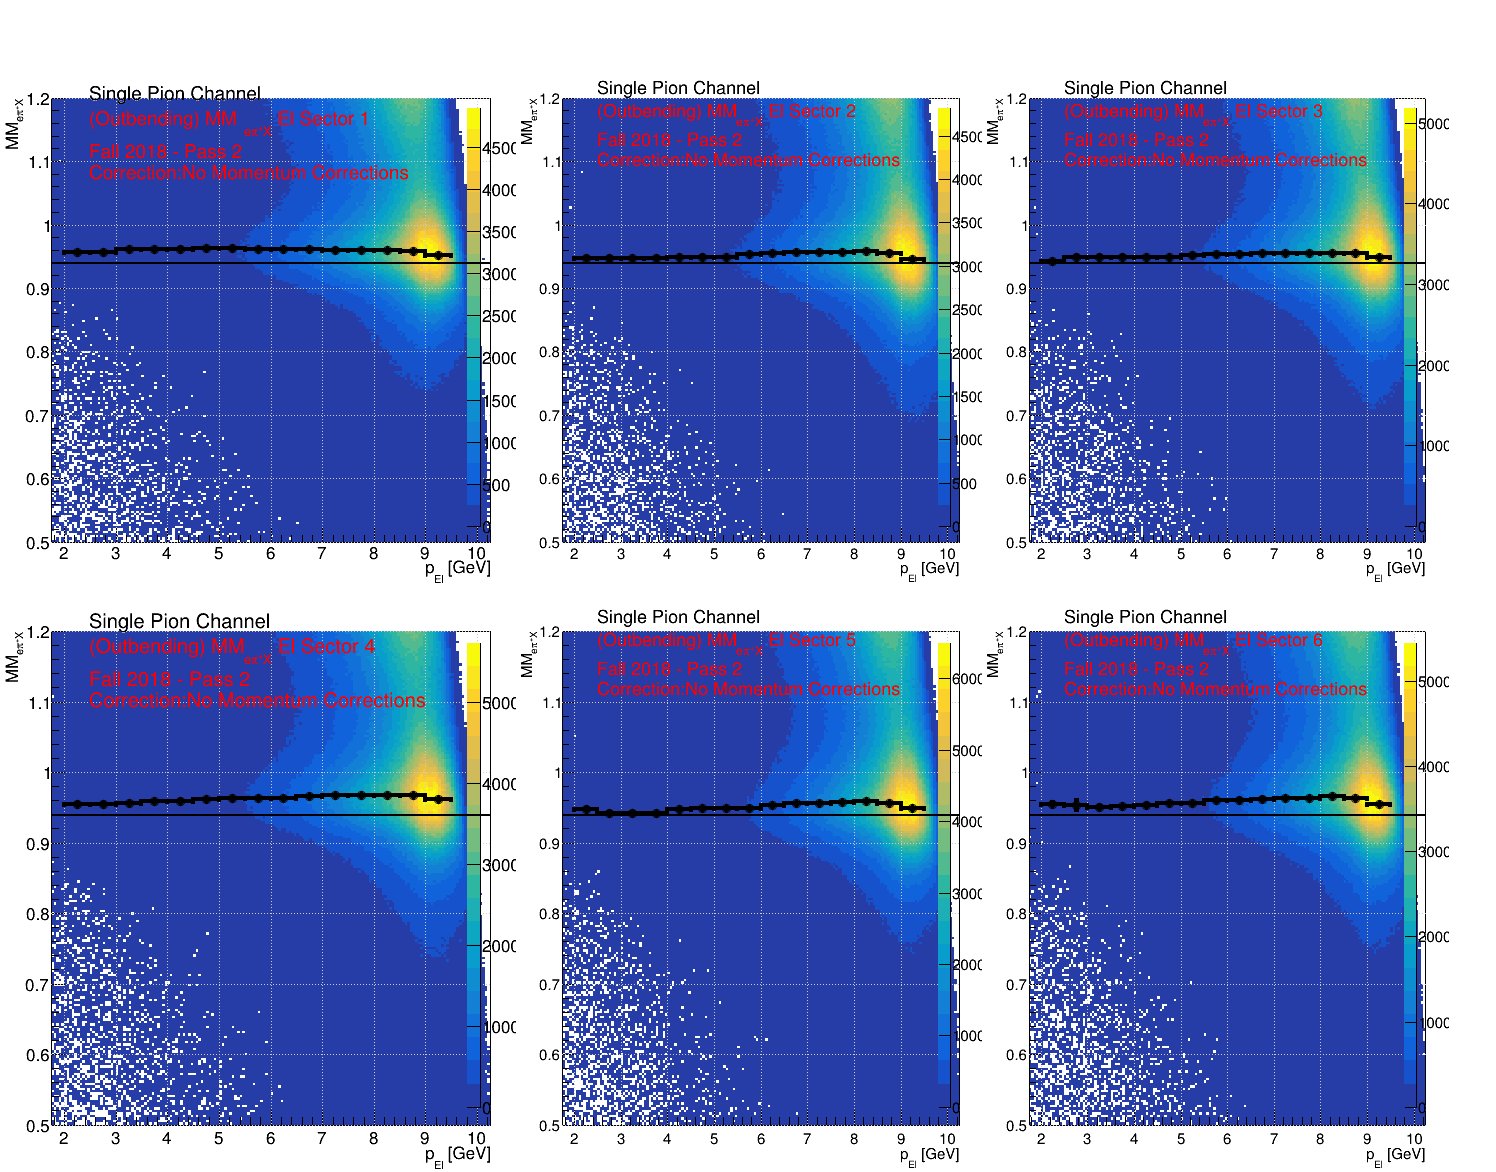

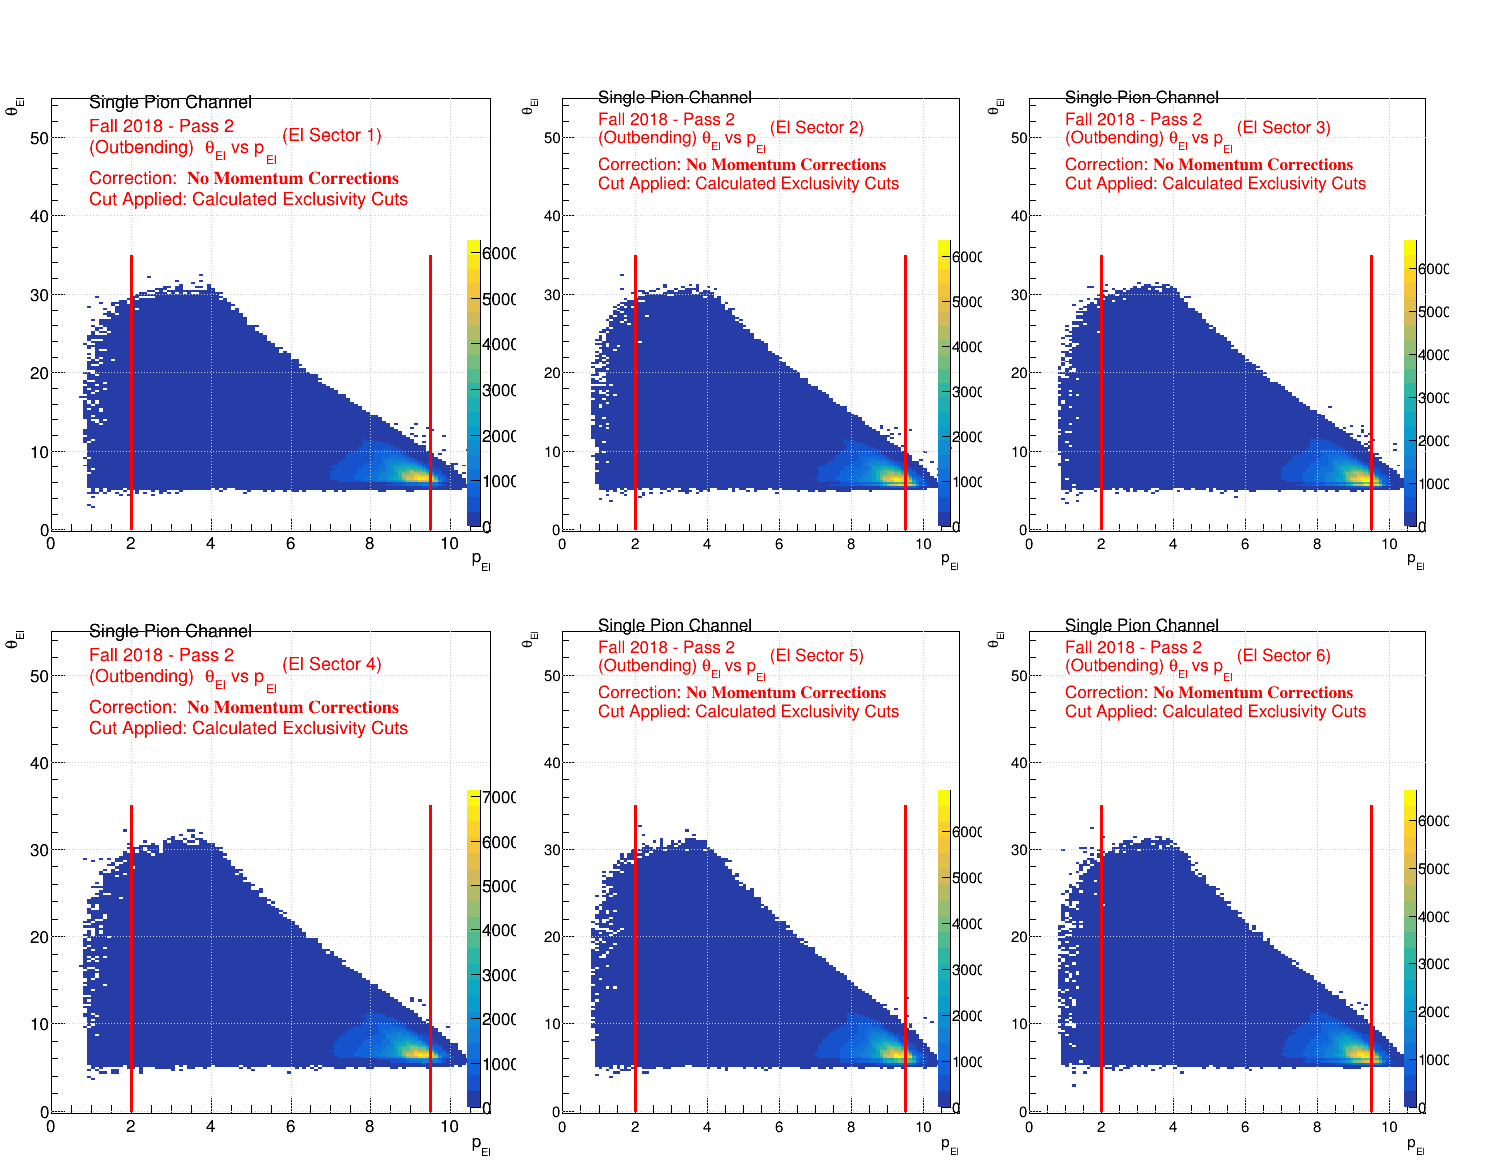

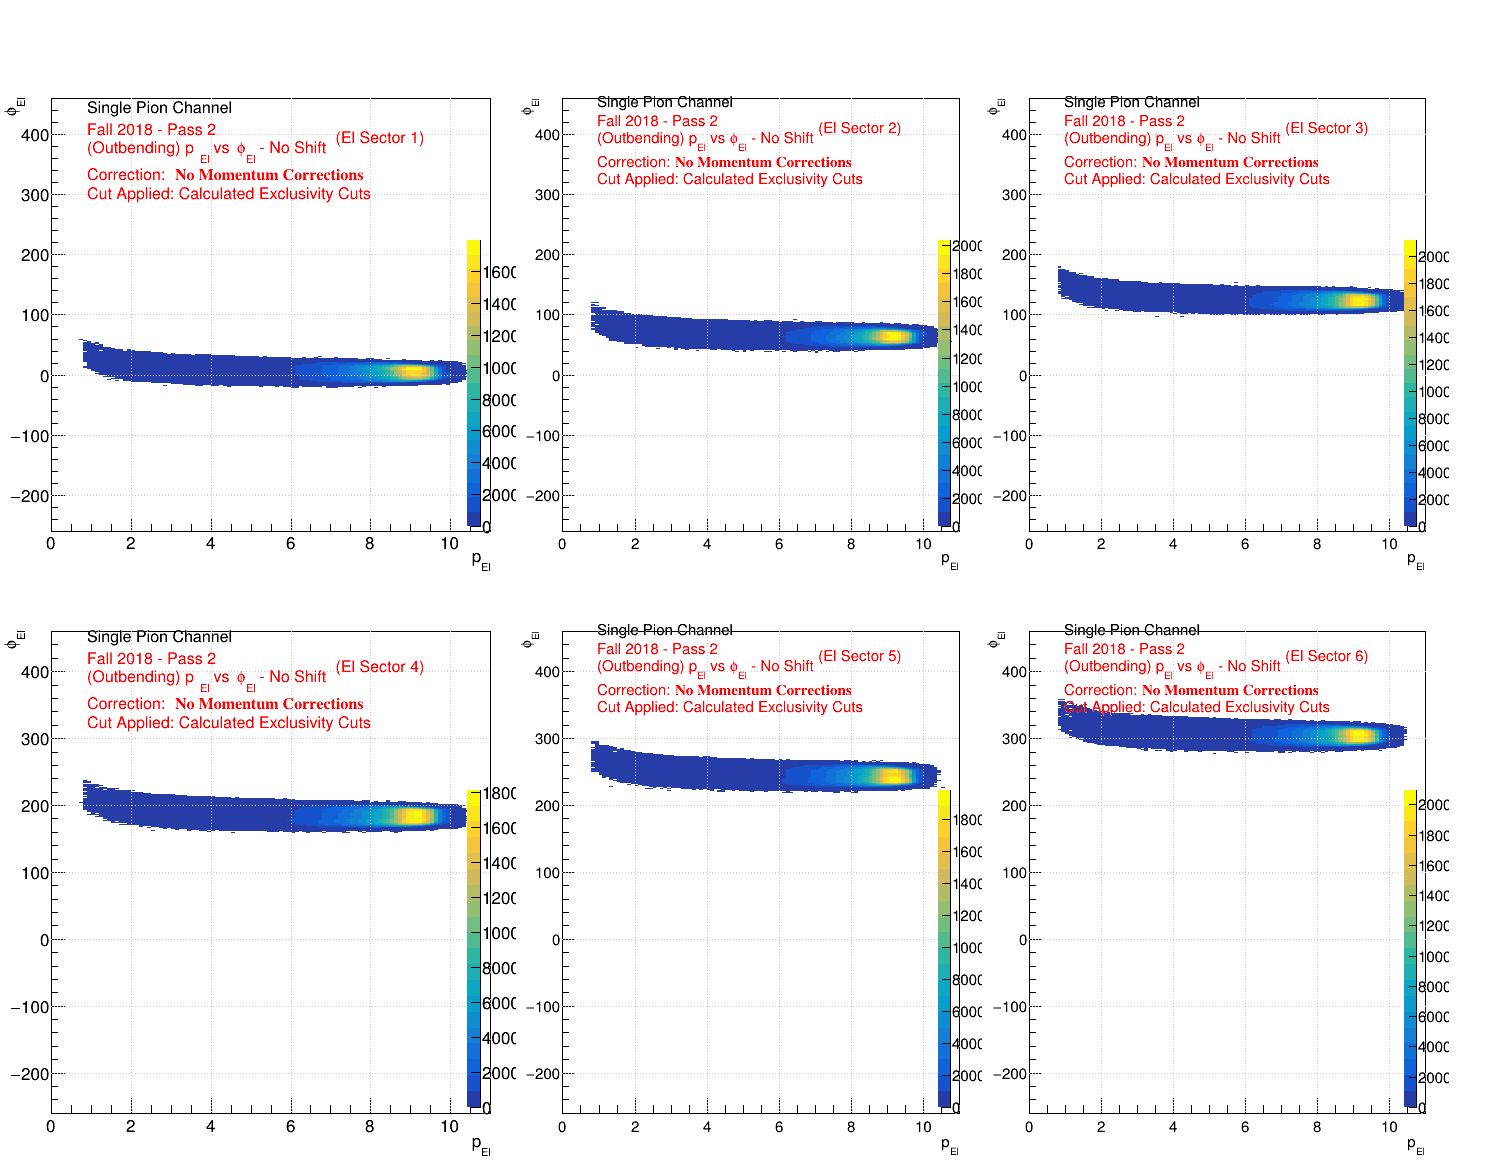

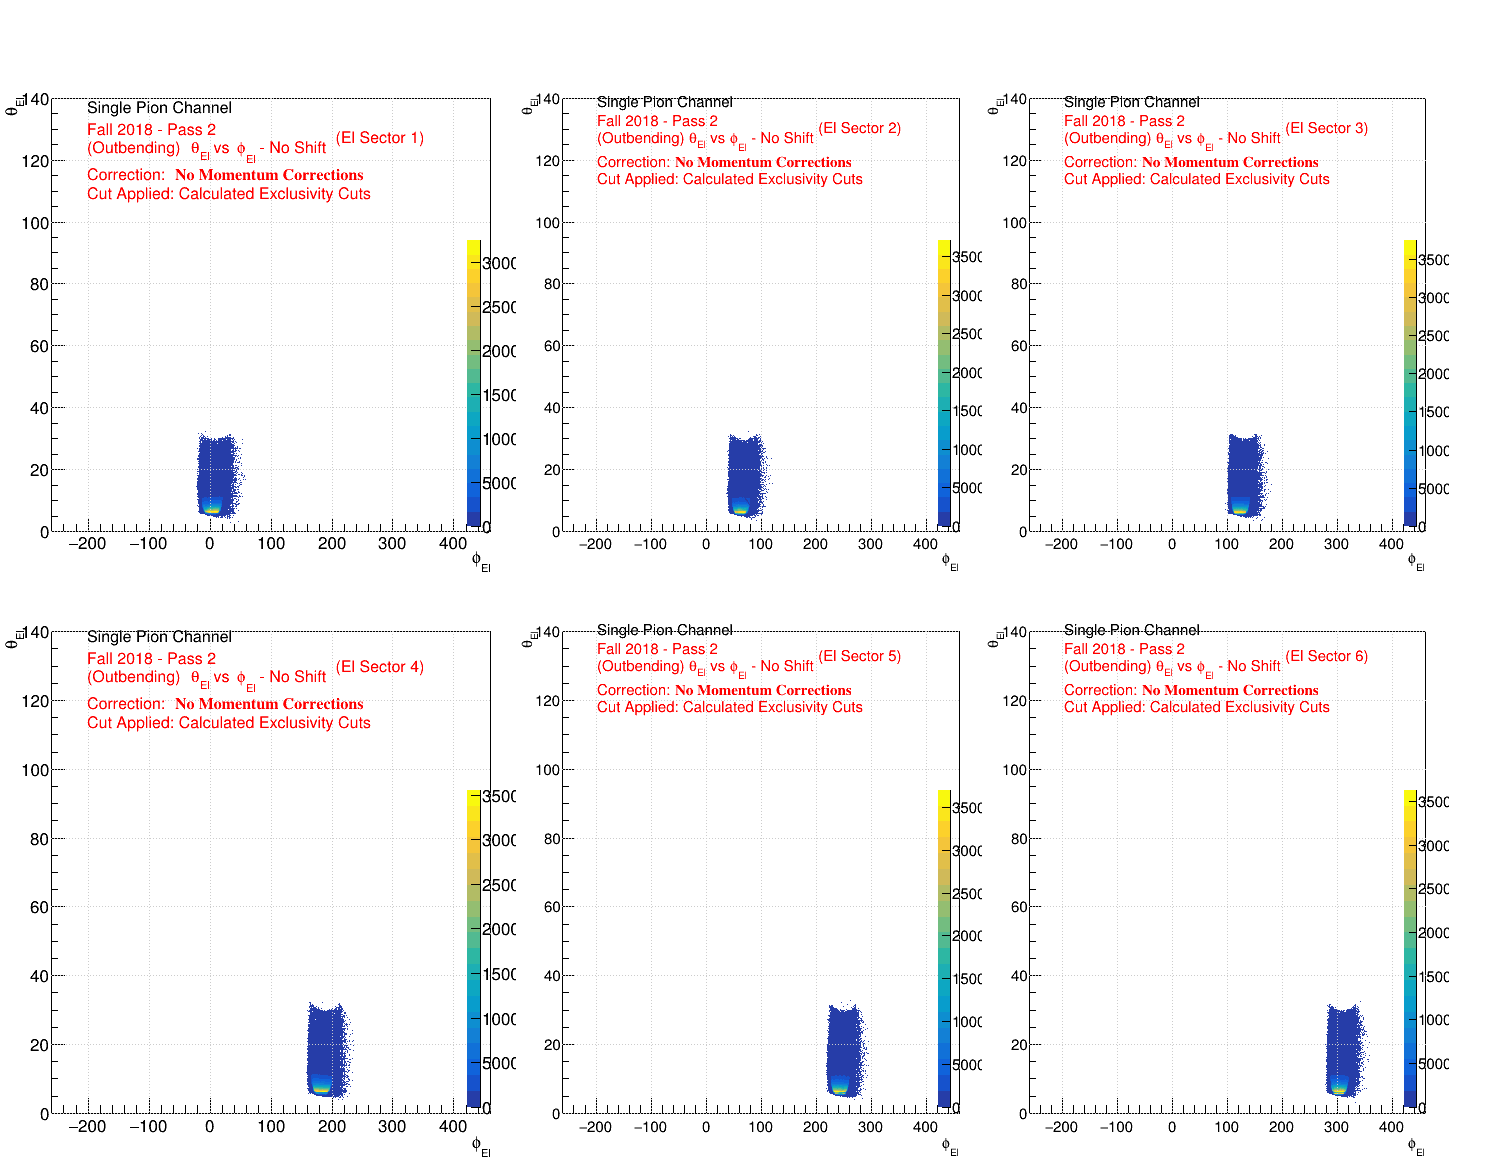

In [58]:
CheckDataFrameQ2 = 'n'
CheckDataFrameQ2 = 'y' # Used for searching with List_of_Locate_name (see below)
# CheckDataFrameQ2 = 'yf' # Prints full list of available histograms
# CheckDataFrameQ2 = 'ys' # Prints a reduced list of available histograms (same list as would be drawn if option 'y' was chosen)

Searching_Q = (CheckDataFrameQ2 in ['yf', 'ys'])

Run_1D_Q = True
# Run_1D_Q = False


Extra_Saving_Name = " (zoom)"

Extra_Saving_Name = ""


Print_Canvas_Q = 'n'
Print_Canvas_Q = 'y'

Print_MM_Together = "n"
Print_MM_Together = "y"



Get_WM_Cuts = "yes"
Get_WM_Cuts = "no"
# Get_WM_Cuts = "not_at_all"


Get_Dp_Cors_Master = "yes"
Get_Dp_Cors_Master = "no"


if(Print_Canvas_Q == 'y' and 'y' != CheckDataFrameQ2):
    Print_Canvas_Q = 'n'


max_print_allowed = 500 # Change this number to limit the number of canvases drawn (will stop drawing after this number is exceeded)



if(CheckDataFrameQ2 == 'yf'):
    List_of_Locate_name2 = ['']
else:
    List_of_Locate_name2 = List_of_Locate_name
    

Particle_Mom_List_Particle_Sec_List_Same_Q = "y"
# Particle_Mom_List_Particle_Sec_List_Same_Q = "n"

rdf_List, WM_Cuts_List, Correction_Fit_Line, Legend, List_of_WM_Peaks = {}, {}, {}, {}, {}

search_count = 0


if('y' in CheckDataFrameQ2):
    
    if(Print_Canvas_Q == 'y'):
        print("Printing requested histograms...\n")
        histo_search, canvas_search, stats_box_all, Histo_Title_New, Histo_WM_Cut_Up, Histo_WM_Cut_Down, histo_clone = {}, {}, {}, {}, {}, {}, {}

    for EvntType in EvntType_List:
        event_type = EvntType
        MM_type = "epipX" if("SP" in event_type) else "eppipX" if("DP" in event_type) else "eppi0X" if("P0" in event_type) else "epX" if("ES" in event_type) else "eX" if("EO" in event_type) else "ERROR"
        if(MM_type == "ERROR"):
            print("".join([color.RED, "ERROR IN MISSING MASS TYPE (", str(event_type),")", color.END]))
            continue
        for Bending_Type in Bending_Type_List:
            Selection_of_In_or_Out = Bending_Type
            for Data_Run in Data_Run_List:
                Selection_Data_Set = Data_Run
                rdf_List_Name = str((EvntType, Bending_Type, Data_Run))
                try:
                    print("\n\n\n\n\n")
                    rdf_List[str((EvntType, Bending_Type, Data_Run))] = DataFrame_Find(EvntType, In_or_Out=Bending_Type, Selection_Data_Set_In=Data_Run)
                    # event_type = EvntType
                    print("\n\n\n")
                except Exception as e:
                    print("".join([color.BOLD, "ERROR: ", color.RED, str(e), color.END, color.BOLD, "\nTRACEBACK:\n", color.RED, str(traceback.format_exc()), "\n", color.END]))
                    
                for Locate_Name_Full in List_of_Locate_name2:

                    Locate_name, Correction_Name_List_2, Sector_Number_List_2, Binning_Option_List_2, Region_Option_List_2, Particle_Mom_List_2, Particle_Sec_List_2, Extra_Cut_Option_2, D_Angle_Type_2, Get_Dp_Cors = Full_List_of_Histo_Options(Locate_Name_Full, Correction_Name_List, Sector_Number_List, Binning_Option_List, Region_Option_List, Particle_Mom_List, Particle_Sec_List, Extra_Cut_Option, D_Angle_Type, Get_Dp_Cors_Master)
                    
                    for Cut_Name in Extra_Cut_Option_2:
                    
                        for Correction_Name in Correction_Name_List_2:
                            
                            for Sector_Num in Sector_Number_List_2:

                                for ii in rdf_List[str((EvntType, Bending_Type, Data_Run))].GetListOfKeys():

                                    out_print = str(ii.GetName())
                                    # if("Dmom_pro" in out_print and "P0" == EvntType):
                                    #     print(out_print)
                                    # else:
                                    #     continue
                                    # if("Dmom_pel_Histo('mmEF_PipMMEF'" not in str(out_print)):
                                    #     continue
                                    
                                    if("Dmom_pro" in out_print and "Larger_Dp" in out_print):
                                        # print("skip alternative ∆P calculation")
                                        continue

                                    if(True in Continue_Loops(out_print, Cut_Name_In=Cut_Name, EVENTS=event_type)):
                                        # print(out_print)
                                        # print(Continue_Loops(out_print, Cut_Name_In=Cut_Name, EVENTS=event_type))
                                        continue

                                    if(True in Continue_Loops(out_print, Cut_Name_In=Cut_Name, Correction_Name_In=Correction_Name, EVENTS=event_type)):
                                        # print(out_print)
                                        # print(Continue_Loops(out_print, Cut_Name_In=Cut_Name, EVENTS=event_type))
                                        continue

                                    for DAngle_Type in D_Angle_Type_2:

                                        for Binning_Option in Binning_Option_List_2:

                                            for Region_Option in Region_Option_List_2:

                                                if(True in Continue_Loops(out_print, Cut_Name_In=Cut_Name, Correction_Name_In=Correction_Name, Binning_Option_In=Binning_Option, Region_Option_In=Region_Option, Searching_Q_In=Searching_Q, Region_Option_List_2_In=Region_Option_List_2, EVENTS=event_type)):
                                                    # print(out_print)
                                                    # print(Continue_Loops(out_print, Cut_Name_In=Cut_Name, EVENTS=event_type))
                                                    continue

                                                if("Dmom_pro" in out_print and Region_Option != "regall"):
                                                    # print("Not using phi bins for proton corrections...")
                                                    continue

                                                for Particle_Mom in Particle_Mom_List_2:

                                                    if("Dmom_pip"   in out_print and Particle_Mom != "pip" and "pip" not in Particle_Mom_List_2):
                                                        Particle_Mom = "pip"
                                                    elif("Dmom_pip" in out_print and Particle_Mom != "pip" and "pip"     in Particle_Mom_List_2):
                                                        continue

                                                    if("Dmom_pel"   in out_print and Particle_Mom != "el"  and "el"  not in Particle_Mom_List_2):
                                                        Particle_Mom = "el"
                                                    elif("Dmom_pel" in out_print and Particle_Mom != "el"  and "el"      in Particle_Mom_List_2):
                                                        continue

                                                    if("Dmom_pro"   in out_print and Particle_Mom != "pro" and "pro" not in Particle_Mom_List_2):
                                                        Particle_Mom = "pro"
                                                    elif("Dmom_pro" in out_print and Particle_Mom != "pro" and "pro"     in Particle_Mom_List_2):
                                                        continue


                                                    for Particle_Sec in Particle_Sec_List_2:

                                                        if("y" in Particle_Mom_List_Particle_Sec_List_Same_Q):
                                                            if("Dmom_pip"   in out_print and Particle_Sec != "pip" and "pip" not in Particle_Sec_List_2):
                                                                Particle_Sec = "pip"
                                                            elif("Dmom_pip" in out_print and Particle_Sec != "pip" and "pip"     in Particle_Sec_List_2):
                                                                continue

                                                            if("Dmom_pel"   in out_print and Particle_Sec != "el"  and "el"  not in Particle_Sec_List_2):
                                                                Particle_Sec = "el"
                                                            elif("Dmom_pel" in out_print and Particle_Sec != "el"  and "el"      in Particle_Sec_List_2):
                                                                continue

                                                            if("Dmom_pro"   in out_print and Particle_Sec != "pro" and "pro" not in Particle_Sec_List_2):
                                                                Particle_Sec = "pro"
                                                            elif("Dmom_pro" in out_print and Particle_Sec != "pro" and "pro"     in Particle_Sec_List_2):
                                                                continue

                                                        if(("y" in Particle_Mom_List_Particle_Sec_List_Same_Q and Particle_Mom != Particle_Sec) and not Searching_Q):
                                                            continue
                                                            
                                                        
                                                        Locate_Name_Canvas = ((((((Locate_name.replace("Correction_Name_List", Correction_Name)).replace("Binning_Option_List", str(Binning_Option))).replace("Region_Option_List", str(Region_Option)).replace("Particle_Mom_List", str(Particle_Mom))).replace("Particle_Sec_List", str(Particle_Sec)))).replace("Extra_Cut_Option", str(Cut_Name))).replace("D_Angle_Type", str(DAngle_Type))
                                                        Locate_Name_Sec    = (((((Locate_Name_Canvas.replace("Sector_Number_List", str(Sector_Num))).replace('El Sector 0', '')).replace('Pi+ Sector 0', '')).replace('Pro Sector 0', '')).replace("Extra_Cut_Option", str(Cut_Name))).replace("D_Angle_Type", str(DAngle_Type))

                                                        if(Condition_Check_Full(Locate_Name_Full, CheckDataFrameQ2, Locate_Name_Sec, out_print)):

#                                                             if((("Histo_P_v_Th_"     in str(out_print))  or ("Histo_P_v_Phi_"     in str(out_print))  or ("Histo_Th_v_Phi_"     in str(out_print))) and (Sector_Num not in [0, "All"])):
#                                                                 print("".join([color.RED, "Wrong Sector for histogram choice", color.END]))
#                                                                 continue
#                                                             if((("Histo_P_v_Th_" not in str(out_print)) and ("Histo_P_v_Phi_" not in str(out_print)) and ("Histo_Th_v_Phi_" not in str(out_print))) and (Sector_Num     in [0, "All"])):
#                                                                 print("".join([color.RED, "Wrong Sector for histogram choice", color.END]))
#                                                                 continue

                                                            search_count += 1
                                                            if(Get_Dp_Cors == "no"):
                                                                # print("".join(["Histo ", str(search_count), ") ", out_print, "   -----   object type: ", str(type(rdf_List[str((EvntType, Bending_Type, Data_Run))].Get(out_print)))]))
                                                                print("".join(["Histo ", str(search_count), ") ", out_print]))

            ##=========================================================##===================================##=========================================================##
            ##=========================================================##  Printing Results Output (Start)  ##=========================================================##
            ##=========================================================##===================================##=========================================================##

                                                            if((max_print_allowed <= search_count) and not Searching_Q):
                                                                print("\nWent Beyond the Maximum Number of Histograms to be Printed...\n\tPlease change 'max_print_allowed' to display more histograms")
                                                                break
                                                            
                                                            No_divide_condition = (Sector_Num in [0, "all"] or "Histo_P_v_Th_" in out_print or "Histo_P_v_Phi_" in out_print or "Histo_Th_v_Phi_" in out_print)
                                    
                                                            # if(No_divide_condition):
                                                            #     print(color.BOLD + color.GREEN + "TEST: " + str(out_print) + color.END)
                                                            
                                                            if(Print_Canvas_Q == 'y' and max_print_allowed > search_count):
                                                                # Divide_1 = 1 if(No_divide_condition) else 3
                                                                # Divide_2 = 1 if(No_divide_condition) else 2
                                                                # Canvas_Size_1 = 800 if(No_divide_condition) else 1500
                                                                # Canvas_Size_2 = 800 if(No_divide_condition) else 1200
                                                                Divide_1, Divide_2, Canvas_Size_1, Canvas_Size_2 = 3, 2 if(9 not in Sector_Number_List_2) else 3, 1500, 1200
                                                                if(Sector_Num in [0, "All"]):
                                                                    Divide_1, Divide_2, Canvas_Size_1, Canvas_Size_2 = 1, 1, 1500, 1200
                                                                Canvas_Search_Name = Locate_Name_Canvas if(Sector_Num != 0) else out_print
                                                                if(Print_MM_Together == "y" and "hmmCPARTall" in out_print and (Binning_Option != 1 or Region_Option != "regall")):
                                                                    Canvas_Search_Name = ((Locate_Name_Canvas.replace("reg1", "Region_Option_List")).replace("reg2", "Region_Option_List")).replace("reg3", "Region_Option_List")
                                                                    if(Sector_Num in [0, "all"]):
                                                                        Canvas_Search_Name = ((out_print.replace("reg1", "Region_Option_List")).replace("reg2", "Region_Option_List")).replace("reg3", "Region_Option_List")
                                                                        
                                                                        
                                                                multi_file_str = "".join(["_", EvntType, "_", str(Bending_Type).replace("bending", ""), "_", str(Data_Run)])
                                                                
                                                                canvas_name_full = "".join([Canvas_Search_Name, multi_file_str])
                                                                out_print_name = "".join([out_print, multi_file_str])

                                                                try:
                                                                    canvas_search[canvas_name_full]
                                                                except:
                                                                    if(print_method == "hor"):
                                                                        canvas_search[canvas_name_full] = ROOT.TCanvas(canvas_name_full, canvas_name_full, Canvas_Size_1, Canvas_Size_2)
                                                                        canvas_search[canvas_name_full].Divide(Divide_1, Divide_2, 0, 0)
                                                                    else:
                                                                        canvas_search[canvas_name_full] = ROOT.TCanvas(canvas_name_full, canvas_name_full, Canvas_Size_2, Canvas_Size_1)
                                                                        canvas_search[canvas_name_full].Divide(Divide_2, Divide_1, 0, 0)
                                                                    canvas_search[canvas_name_full].SetGrid()
                                                                    # canvas_search[canvas_name_full] = Canvas_Create(Name=canvas_name_full, Num_Columns=Divide_1, Num_Rows=Divide_2, Size_X=Canvas_Size_1, Size_Y=Canvas_Size_2, cd_Space=0)
                                                                    # canvas_search[canvas_name_full] = Canvas_Create(Name=canvas_name_full, Num_Columns=Divide_2, Num_Rows=Divide_2, Size_X=Canvas_Size_2, Size_Y=Canvas_Size_2, cd_Space=0)
                                                                    
                                                                    
                                                                Legend_Name = str(canvas_name_full).replace("Region_Option_List", "Integrated Regions" if(Region_Option == "regall") else "Individual Regions")
                                                                # Legend_Name = str(canvas_name_full).replace("Region_Option_List", Region_Option)
                                                                Legend[Legend_Name] = ROOT.TLegend(0.15, 0.25, 0.85, 0.1)

                                                                # ROOT.gStyle.SetOptFit(0)
                                                                ROOT.gStyle.SetOptFit(1)
                                                                ROOT.gStyle.SetOptStat("emr")
                                                                # ROOT.gStyle.SetOptStat(0)
                                                                ROOT.gStyle.SetTitleY(1)
                                                                ROOT.gStyle.SetTitleX(0.5)
                                                                ROOT.gStyle.SetLegendTextSize(0.0275)

                                                                # blank_Canvas = Canvas_Create(Name="test_blank_func", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)

                                                                # print("".join(["cd_num = ", str(1 if(Sector_Num in [0, "all"]) else Sector_Num), "\n"]))
                                                                histo_search[out_print_name], Histo_Title_New[out_print_name] = Find_And_Slice_Histo(RDF=rdf_List[str((EvntType, Bending_Type, Data_Run))], NAME=out_print, EVENT=EvntType, PARTICLE=Particle_Mom, BENDING=Bending_Type, Pass_Type=Data_Run)
                                                                
                                                                Histo_Title_New[out_print_name] = Histo_Title_New[out_print_name].replace("localelPhiS", "#phi_{El}")
                                                                histo_search[out_print_name].SetTitle(str(histo_search[out_print_name].GetTitle()).replace("localelPhiS", "#phi_{El}"))
                                                                histo_search[out_print_name].SetTitle(str(histo_search[out_print_name].GetTitle()).replace("Pi+", "#pi^{+}"))
                                                                
                                                                # print("(histo_search[out_print_name]).GetTitle() =", str(histo_search[out_print_name].GetTitle()))
                                                                histo_search[out_print_name].SetTitle(str(histo_search[out_print_name].GetTitle()).replace("El Cor (Quad - Quad Phi - With Elastic Cors) - #pi^{+} Cor (Quad - Quad Phi - With Elastic Cors)", "#splitline{El Cor (Quad - Quad Phi - With Elastic Cors)}{#pi^{+} Cor (Quad - Quad Phi - With Elastic Cors)}"))
                                                                histo_search[out_print_name].SetTitle(str(histo_search[out_print_name].GetTitle()).replace("El Cor (Quad - Quad Phi - With Elastic Cors) - No #pi^{+} Cor", "#splitline{El Cor (Quad - Quad Phi - With Elastic Cors)}{No #pi^{+} Cor}"))
                                                                # Tline_Simple = ROOT.TLine()
                                                                # Tline_Simple.SetLineColor(2)
                                                                # Tline_Simple.SetLineWidth(2)

                                                                # Fit_Pars, TLine_Simple_Pars = Fitting_Lines(out_print, event_type, Selection_of_In_or_Out, Particle_Mom, Data_Run)
                                                                Fit_Pars, TLine_Simple_Pars = Fitting_Lines(Histo_Type=out_print, Event_Type=event_type, Bending_Type=Selection_of_In_or_Out, Particle=Particle_Mom, DataSet=Data_Run, Sector=Sector_Num)
                                                                MinRange_Fit, MaxRange_Fit, Increment_Fit = Fit_Pars
                                                                Tline_Simple_X1, Tline_Simple_Y1, Tline_Simple_X2, Tline_Simple_Y2 = TLine_Simple_Pars

                                                                canvas_search[canvas_name_full].Draw()

                                                                if("hmmCPARTall" not in out_print):
                                                                    Draw_Canvas(canvas_search[canvas_name_full], 1 if(Sector_Num in [0, "all"]) else Sector_Num, 0.05, 0, -0.02, 0)
                                                                else:
                                                                    # Draw_Canvas(canvas_search[canvas_name_full], 1 if(Sector_Num == 0 or Sector_Num == "all") else Sector_Num, 0.05, 0, -0.02, -0.02)
                                                                    try:
                                                                        Draw_Canvas(canvas_search[canvas_name_full], Sector_Num, 0.05, 0, -0.02, -0.02)
                                                                    except:
                                                                        print("".join([color.RED, color.BOLD, "\nFailed Draw_Canvas.cd(Sector_Num)\n", color.END]))
                                                                        Draw_Canvas(canvas_search[canvas_name_full], 1, 0.05, 0, -0.02, -0.02)


            ##=========================================================##===================================##=========================================================##
            ##=========================================================##       Fitting 2D Histograms       ##=========================================================##
            ##=========================================================##===================================##=========================================================##

                                   ###############################################################################################################
                                   ##==================================#######################################==================================##
                                   ##==========##==========##==========##     Invariant Mass Histograms     ##==========##==========##==========##
                                   ##==================================#######################################==================================##
                                   ###############################################################################################################
                                                                if("HWC_Histo_All" in out_print and "SP" not in event_type):
                                                                    List_of_WM_Peaks[str((Cut_Name, Sector_Num))] = histo_search[out_print_name].FindPeak_x
                                                                    List_of_WM_Peaks[str((Cut_Name, Sector_Num, "Upper"))] = histo_search[out_print_name].FindPeak_Cut_Up
                                                                    List_of_WM_Peaks[str((Cut_Name, Sector_Num, "Lower"))] = histo_search[out_print_name].FindPeak_Cut_Down
                                                                    Upper_Cut_Func = ROOT.TF1("Upper_Cut_Func","[p0_Up] + [p1_Up]*x",     MinRange_Fit - 0.5*Increment_Fit, MaxRange_Fit + 0.5*Increment_Fit)
                                                                    Lower_Cut_Func = ROOT.TF1("Lower_Cut_Func","[p0_Down] + [p1_Down]*x", MinRange_Fit - 0.5*Increment_Fit, MaxRange_Fit + 0.5*Increment_Fit)
                                                                    Upper_Cut_Func.SetLineColor(root_color.Green)
                                                                    Lower_Cut_Func.SetLineColor(root_color.Green)
                                                                    Histo_WM_Cut_Up[str((out_print_name,     "up"))] = (histo_search[out_print_name].gr2_Cut_Range_Up).Clone()
                                                                    Histo_WM_Cut_Down[str((out_print_name, "down"))] = (histo_search[out_print_name].gr2_Cut_Range_Down).Clone()
                                                                    if("no" not in Get_WM_Cuts):
                                                                        Histo_WM_Cut_Up[str((out_print_name,     "up"))].Fit("Upper_Cut_Func", "RQ")
                                                                        Histo_WM_Cut_Down[str((out_print_name, "down"))].Fit("Lower_Cut_Func", "RQ")
                                                                        WM_Cuts_List[str((out_print_name, Particle_Mom, Sector_Num, "Function_Upper"))] = ROOT.TF1("".join(["WM_Fit_Line[", str((Particle_Mom, Sector_Num, "Function_Upper")) ,"]"]), "".join(["(", str(round(Histo_WM_Cut_Up[str((out_print_name, "up"))].GetFunction("Upper_Cut_Func").GetParameter(1), 6)), ")*x + (", str(round(Histo_WM_Cut_Up[str((out_print_name, "up"))].GetFunction("Upper_Cut_Func").GetParameter(0), 6)), ")"]), Tline_Simple_X1, Tline_Simple_X2)
                                                                        WM_Cuts_List[str((out_print_name, Particle_Mom, Sector_Num, "Function_Lower"))] = ROOT.TF1("".join(["WM_Fit_Line[", str((Particle_Mom, Sector_Num, "Function_Lower")) ,"]"]), "".join(["(", str(round(Histo_WM_Cut_Down[str((out_print_name, "down"))].GetFunction("Lower_Cut_Func").GetParameter(1), 6)), ")*x + (", str(round(Histo_WM_Cut_Down[str((out_print_name, "down"))].GetFunction("Lower_Cut_Func").GetParameter(0), 6)), ")"]), Tline_Simple_X1, Tline_Simple_X2)
                                                                    stats_box_all[str((out_print_name, "up"))] = Histo_WM_Cut_Up[str((out_print_name, "up"))].GetListOfFunctions().FindObject("stats")
                                                                    stats_box_all[str((out_print_name, "down"))] = Histo_WM_Cut_Down[str((out_print_name, "down"))].GetListOfFunctions().FindObject("stats")
                                                                    WM_Cuts_List[str((Particle_Mom, Sector_Num))] = [Histo_WM_Cut_Up[str((out_print_name, "up"))], Histo_WM_Cut_Down[str((out_print_name, "down"))]]
                                   ###############################################################################################################
                                   ##==================================#######################################==================================##
                                   ##==========##==========##==========##     Invariant Mass Histograms     ##==========##==========##==========##
                                   ##==================================#######################################==================================##
                                   ###############################################################################################################

            ##=========================================================##===================================##=========================================================##
            ##=========================================================##       Drawing 2D Histograms       ##=========================================================##
            ##=========================================================##===================================##=========================================================##

                                                                ROOT.gPad.SetLogz(0)

                                                                if(not (Print_MM_Together == "y" and "hmmCPARTall" in out_print and "regall" not in out_print)):
                        
                                                                    # if(print_method == "hor"):
                                                                    #     canvas_search[canvas_name_full].Divide(Divide_1, Divide_2, 0, 0)
                                                                    # else:
                                                                    #     canvas_search[canvas_name_full].Divide(Divide_2, Divide_1, 0, 0)
                                                                    # Draw_Canvas(canvas_search[canvas_name_full], 1 if(Sector_Num in [0, "all"]) else Sector_Num, 0.05, 0, -0.02, 0)
                                                
                        
                                                                    if("hmmCPARTall" in out_print and EvntType == "DP"):
#                                                                         histo_search[out_print_name].GetYaxis().SetRangeUser(-0.04, 0.08)
                                                                        histo_search[out_print_name].GetYaxis().SetRangeUser(-0.04, 0.06)
                                                                        histo_search[out_print_name].GetXaxis().SetRangeUser(0.4, 3)
                                                                        # print(histo_search[out_print_name].GetTitle())
                                        
                                                                    histo_search[out_print_name].Draw("colz" if("TH2D" in str(type(rdf_List[str((EvntType, Bending_Type, Data_Run))].Get(out_print)))) else "same")
                                                                    canvas_search[canvas_name_full].Modified()
                                                                    canvas_search[canvas_name_full].Update()

                                                                    # if("hmmCPARTall" not in out_print):
                                                                    palette_move(canvas_search[canvas_name_full], histo_search[out_print_name], 0, 0.005, -0.25 if("Dmom" not in out_print and "HWC_Histo_All" not in out_print and "hmmCPARTall" not in out_print) else 0, 0.01)
                                                                    # stats_box_all[out_print_name] = ""
                                                                    # statbox_move(histo_search[out_print_name], canvas_search["".join([Canvas_Search_Name, "_", EvntType, "_",  str(Bending_Type).replace("bending", ""), "_", str(Data_Run)])], stats_box_all[out_print_name], Sector_Num, "norm" if("Dmom" not in out_print and "HWC_Histo_All" not in out_print and "hmmCPARTall" not in out_print and "Histo_P_v_Th_" not in out_print and "Histo_P_v_Phi_" not in out_print and "Histo_Th_v_Phi_" not in out_print) else "off", 0.65, 0.65, 0.5, 0.5)
                                                                    # else:
                                                                    #     ROOT.gStyle.SetOptStat(0)
                                                                else:
                                                                    canvas_search[canvas_name_full].Modified()
                                                                    canvas_search[canvas_name_full].Update()

                                                                if("Histo_P_v_Th_" not in out_print and "Histo_P_v_Phi_" not in out_print and "Histo_Th_v_Phi_" not in out_print and not ("HWC_Histo_All" in out_print and "SP" in event_type)):
                                                                    try:
                                                                        # canvas_search["".join([Canvas_Search_Name, "_", EvntType, "_",  str(Bending_Type).replace("bending", ""), "_", str(Data_Run)])] = Canvas_Create(Name="".join([Canvas_Search_Name, "_", EvntType, "_",  str(Bending_Type).replace("bending", ""), "_", str(Data_Run)]), Num_Columns=3, Num_Rows=2, Size_X=600, Size_Y=800, cd_Space=0)
                                                                        # Draw_Canvas(canvas_search["".join([Canvas_Search_Name, "_", EvntType, "_",  str(Bending_Type).replace("bending", ""), "_", str(Data_Run)])], 1 if(Sector_Num in [0, "all"]) else Sector_Num, 0.05, 0, -0.02, -0.02)
                                                                        # print(Sector_Num)
                                                                        if(Print_MM_Together == "y" and "hmmCPARTall" in out_print and "regall" not in out_print):
                                                                            try:
                                                                                Legend[Legend_Name].SetNColumns(3)
                                                                                region_1_Name = (((out_print_name.replace("regall", "reg1")).replace("reg2", "reg1")).replace("reg3", "reg1")).replace("'1'", "'3'")
                                                                                try:
                                                                                    histo_search[region_1_Name].gr2.SetMarkerColor(1 if("mm0" not in Correction_Name) else 12)
                                                                                except:
                                                                                    try:
                                                                                        histo_search[region_1_Name] = Find_And_Slice_Histo(RDF=rdf_List[str((EvntType, Bending_Type, Data_Run))], NAME=(((out_print.replace("regall", "reg1")).replace("reg2", "reg1")).replace("reg3", "reg1")).replace("'1'", "'3'"), EVENT=EvntType, PARTICLE=Particle_Mom, BENDING=Bending_Type, OUT_Q="Histo", Pass_Type=Data_Run)
                                                                                    except Exception as e:
                                                                                        print("".join([color.RED, "\n\n", str(e), "\n\n", color.END]))
                                                                                histo_search[region_1_Name].gr2.SetMarkerColor(1 if("mm0" not in Correction_Name) else 12)
                                                                                histo_search[region_1_Name].gr2.SetLineColor(1   if("mm0" not in Correction_Name) else 12)
                                                                                histo_search[region_1_Name].gr2.SetMarkerStyle(1 if("mm0" in     Correction_Name) else 8)
                                                                                histo_search[region_1_Name].gr2.SetLineStyle(2   if("mm0" in     Correction_Name) else 47)
                                                                                histo_search[region_1_Name].gr2.SetLineWidth(2   if("mm0" not in Correction_Name) else 4)
                                                                                histo_search[region_1_Name].gr2.SetMarkerSize(3  if("mm0" in     Correction_Name) else 1)
                                                                                histo_search[region_1_Name].gr2.Draw("AP same"   if("mm0" not in Correction_Name) else "APL same")
                                                                                histo_search[region_1_Name].gr2.SetTitle("".join(["#splitline{", str(histo_search[out_print_name].GetTitle()), "}{All 3 #phi Bins  ", str(root_color.Bold), "{#scale[0.85]{(Central Bin - #color[3]{Positive Bin} - #color[2]{Negative Bin})}}}; ", str(histo_search[out_print_name].GetXaxis().GetTitle()), ";", str(histo_search[out_print_name].GetYaxis().GetTitle())]))
                                                                                if(EvntType == "SP"):
                                                                                    histo_search[region_1_Name].gr2.GetYaxis().SetRangeUser(0.88, 1)
                                                                                else:
                                                                                    histo_search[region_1_Name].gr2.GetYaxis().SetRangeUser((Tline_Simple_Y1 - 0.1) if(EvntType != "DP") else -0.05, (Tline_Simple_Y1 + 0.1) if(EvntType != "DP") else 0.1)

                                                                                region_2_Name = (((out_print_name.replace("regall", "reg2")).replace("reg1", "reg2")).replace("reg3", "reg2")).replace("'1'", "'3'")
                                                                                try:
                                                                                    histo_search[region_2_Name].gr2.SetMarkerColor(2 if("mm0" not in Correction_Name) else 46)
                                                                                except:
                                                                                    try:
                                                                                        histo_search[region_2_Name] = Find_And_Slice_Histo(RDF=rdf_List[str((EvntType, Bending_Type, Data_Run))], NAME=(((out_print.replace("regall", "reg2")).replace("reg1", "reg2")).replace("reg3", "reg2")).replace("'1'", "'3'"), EVENT=EvntType, PARTICLE=Particle_Mom, BENDING=Bending_Type, OUT_Q="Histo", Pass_Type=Data_Run)
                                                                                    except Exception as e:
                                                                                        print("".join([color.RED, "\n\n", str(e), "\n\n", color.END]))
                                                                                histo_search[region_2_Name].gr2.SetMarkerColor(2 if("mm0" not in Correction_Name) else 46)
                                                                                histo_search[region_2_Name].gr2.SetLineColor(2   if("mm0" not in Correction_Name) else 46)
                                                                                histo_search[region_2_Name].gr2.SetMarkerStyle(1 if("mm0" in     Correction_Name) else 8)
                                                                                histo_search[region_2_Name].gr2.SetLineStyle(2   if("mm0" in     Correction_Name) else 47)
                                                                                histo_search[region_2_Name].gr2.SetLineWidth(2   if("mm0" not in Correction_Name) else 4)
                                                                                histo_search[region_2_Name].gr2.SetMarkerSize(3  if("mm0" in     Correction_Name) else 1)
                                                                                histo_search[region_2_Name].gr2.Draw("P same"    if("mm0" not in Correction_Name) else "PL same")

                                                                                region_3_Name = (((out_print_name.replace("regall", "reg3")).replace("reg2", "reg3")).replace("reg1", "reg3")).replace("'1'", "'3'")
                                                                                try:
                                                                                    histo_search[region_3_Name].gr2.SetMarkerColor(3 if("mm0" not in Correction_Name) else 8)
                                                                                except:
                                                                                    try:
                                                                                        histo_search[region_3_Name] = Find_And_Slice_Histo(RDF=rdf_List[str((EvntType, Bending_Type, Data_Run))], NAME=(((out_print.replace("regall", "reg3")).replace("reg2", "reg3")).replace("reg1", "reg3")).replace("'1'", "'3'"), EVENT=EvntType, PARTICLE=Particle_Mom, BENDING=Bending_Type, OUT_Q="Histo", Pass_Type=Data_Run)
                                                                                    except Exception as e:
                                                                                        print("".join([color.RED, "\n\n", str(e), "\n\n", color.END]))
                                                                                histo_search[region_3_Name].gr2.SetMarkerColor(3 if("mm0" not in Correction_Name) else 8)
                                                                                histo_search[region_3_Name].gr2.SetLineColor(3   if("mm0" not in Correction_Name) else 8)
                                                                                histo_search[region_3_Name].gr2.SetMarkerStyle(1 if("mm0" in     Correction_Name) else 8)
                                                                                histo_search[region_3_Name].gr2.SetLineStyle(2   if("mm0" in     Correction_Name) else 47)
                                                                                histo_search[region_3_Name].gr2.SetLineWidth(2   if("mm0" not in Correction_Name) else 4)
                                                                                histo_search[region_3_Name].gr2.SetMarkerSize(3  if("mm0" in     Correction_Name) else 1)
                                                                                histo_search[region_3_Name].gr2.Draw("P same"    if("mm0" not in Correction_Name) else "PL same")

                                                                                Legend[Legend_Name].AddEntry(histo_search[region_1_Name].gr2, "".join(["#color[", str(1 if("mm0" not in Correction_Name) else 12), "]{#splitline{", "Corrected" if("mm0" not in Correction_Name) else "Uncorrected", "}{Central #phi Bin}}"]),  "p" if("mm0" not in Correction_Name) else "lp")
                                                                                Legend[Legend_Name].AddEntry(histo_search[region_2_Name].gr2, "".join(["#color[", str(2 if("mm0" not in Correction_Name) else 46), "]{#splitline{", "Corrected" if("mm0" not in Correction_Name) else "Uncorrected", "}{Negative #phi Bin}}"]), "p" if("mm0" not in Correction_Name) else "lp")
                                                                                Legend[Legend_Name].AddEntry(histo_search[region_3_Name].gr2, "".join(["#color[", str(3 if("mm0" not in Correction_Name) else 8),  "]{#splitline{", "Corrected" if("mm0" not in Correction_Name) else "Uncorrected", "}{Positive #phi Bin}}"]), "p" if("mm0" not in Correction_Name) else "lp")


                                                                                if(Sector_Num in [6, 0, "all"]):
                                                                                    # print("".join(["\n\nLegend name: ", Legend_Name]))
                                                                                    Draw_Canvas(canvas_search[canvas_name_full], 1 if(Sector_Num in [0, "all"]) else Sector_Num, 0.05, 0, -0.02, -0.02)
                                                                                    Legend[Legend_Name].Draw()

                                                                            except Exception as e:
                                                                                print("".join([color.RED, color.BOLD, "PHI BINNING ERROR: \n", str(e), "\n", color.END]))
                                                                                # Printing currently available points...
                                                                                histo_search[out_print_name].gr2.Draw("P same")
                                                                                Legend[Legend_Name].AddEntry(histo_search[out_print_name].gr2, "Corrected" if("mm0" not in Correction_Name) else "Uncorrected", "p" if("mm0" not in Correction_Name) else "lp")

                                                                        else:
                                                                            histo_search[out_print_name].gr2.SetMarkerColor(1)
                                                                            histo_search[out_print_name].gr2.SetLineColor(1)
                                                                            histo_search[out_print_name].gr2.SetMarkerStyle(8)
                                                                            histo_search[out_print_name].gr2.SetMarkerSize(1)
                                                                            histo_search[out_print_name].gr2.SetLineStyle(47)
                                                                            histo_search[out_print_name].gr2.SetLineWidth(2 if("mm0" not in Correction_Name) else 4)
                                                                            histo_search[out_print_name].gr2.Draw("P same")
                                                                            if("hmmCPARTall" in out_print): # and EvntType not in ["DP", "P0"]):
                                                                                Legend[Legend_Name].SetNColumns(3)
                                                                                Legend[Legend_Name].AddEntry(histo_search[out_print_name].gr2, "All Corrections" if(EvntType in ["DP"] and "Pro" in Correction_Name and "No_ELC" not in Correction_Name) else "Corrected" if("mm0" not in Correction_Name) else "Uncorrected", "p" if("mm0" not in Correction_Name) else "lp")
                                                                                if("mm0" not in Correction_Name):
                                                                                    if(event_type not in ["DP"]):
                                                                                        try:
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetMarkerColor(12)
                                                                                        except:
                                                                                            try:
                                                                                                histo_search[out_print_name.replace(Correction_Name, "mm0")] = Find_And_Slice_Histo(RDF=rdf_List[str((EvntType, Bending_Type, Data_Run))], NAME=out_print.replace(Correction_Name, "mm0"), EVENT=EvntType, PARTICLE=Particle_Mom, BENDING=Bending_Type, OUT_Q="Histo", Pass_Type=Data_Run)
                                                                                            except Exception as e:
                                                                                                print("".join([color.RED, "\n\n", str(e), "\n\n", color.END]))

                                                                                        if("E" not in event_type and event_type not in ["SP", "MC"]):
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetMarkerColor(7)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetLineColor(7)
                                                                                        else:
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetMarkerColor(12)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetLineColor(12)
                                                                                        histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetMarkerStyle(1)
                                                                                        histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetMarkerSize(1)
                                                                                        histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetLineStyle(2)
                                                                                        histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetLineWidth(4)

                                                                                        Draw_Canvas(canvas_search[canvas_name_full], 1 if(Sector_Num in [0, "all"]) else Sector_Num, 0.05, 0, -0.02, -0.02)
                                                                                        histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.Draw("PL same")
                                                                                        Legend[Legend_Name].AddEntry(histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2, "#color[4]{Energy Loss Only}" if(event_type not in ["ES", "SP", "MC"]) else "#color[12]{Uncorrected}", "lp")

                                                                                    if("E" not in event_type and event_type not in ["SP", "MC"]):
                                                                                        try:
                                                                                            try:
                                                                                                histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetMarkerColor(12)
                                                                                            except:
                                                                                                try:
                                                                                                    histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")] = Find_And_Slice_Histo(RDF=rdf_List[str((EvntType, Bending_Type, Data_Run))], NAME=out_print.replace(Correction_Name, "mm0_NoELC"), EVENT=EvntType, PARTICLE=Particle_Mom, BENDING=Bending_Type, OUT_Q="Histo", Pass_Type=Data_Run)
                                                                                                except Exception as e:
                                                                                                    print("".join([color.RED, "\n\n", str(e), "\n\n", color.END]))
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetMarkerColor(12)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetLineColor(12)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetMarkerStyle(1)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetMarkerSize(1)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetLineStyle(2)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetLineWidth(4)

                                                                                            Draw_Canvas(canvas_search[canvas_name_full], 1 if(Sector_Num in [0, "all"]) else Sector_Num, 0.05, 0, -0.02, -0.02)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.Draw("PL same")
                                                                                            Legend[Legend_Name].AddEntry(histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2, "#color[12]{Uncorrected}" if(event_type not in ["DP"]) else "#color[12]{#splitline{Uncorrected}{(No Mom/Energy Cors)}}", "lp")
                                                                                        except:
                                                                                            Legend[Legend_Name].SetNColumns(2)
                                                                                    else:
                                                                                        Legend[Legend_Name].SetNColumns(2)
                                                                                        
                                                                                    if(event_type in ["DP"] and Correction_Name not in ["mmEF_PipMMEF", "mmEF_PipMMEF_NoELC"]):
                                                                                        Legend[Legend_Name].SetNColumns(2)
                                                                                        try:
                                                                                            try:
                                                                                                histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetMarkerColor(3)
                                                                                                histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetMarkerColor(6)
                                                                                            except:
                                                                                                try:
                                                                                                    histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")]       = Find_And_Slice_Histo(RDF=rdf_List[str((EvntType, Bending_Type, Data_Run))], NAME=out_print.replace(Correction_Name, "mmEF_PipMMEF"),       EVENT=EvntType, PARTICLE=Particle_Mom, BENDING=Bending_Type, OUT_Q="Histo", Pass_Type=Data_Run)
                                                                                                    histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")] = Find_And_Slice_Histo(RDF=rdf_List[str((EvntType, Bending_Type, Data_Run))], NAME=out_print.replace(Correction_Name, "mmEF_PipMMEF_NoELC"), EVENT=EvntType, PARTICLE=Particle_Mom, BENDING=Bending_Type, OUT_Q="Histo", Pass_Type=Data_Run)
                                                                                                except Exception as e:
                                                                                                    print("".join([color.RED, "\n\n", str(e), "\n\n", color.END]))
#                                                                                             histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetMarkerColor(8)
#                                                                                             histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetLineColor(8)
#                                                                                             histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetMarkerStyle(3)# 33)
#                                                                                             histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetMarkerSize(1)
#                                                                                             histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetLineStyle(2)
#                                                                                             histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetLineWidth(3)

                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetMarkerColor(46)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetLineColor(46)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetMarkerStyle(3)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetMarkerSize(1)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetLineStyle(2)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetLineWidth(3)
                                                                                            
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetMarkerColor(6)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetLineColor(6)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetMarkerStyle(1)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetMarkerSize(1)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetLineStyle(2)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetLineWidth(4)

                                                                                            Draw_Canvas(canvas_search[canvas_name_full], 1 if(Sector_Num in [0, "all"]) else Sector_Num, 0.05, 0, -0.02, -0.02)
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.Draw("PL same")
                                                                                            histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.Draw("PL same")
                                                                                            histo_search[out_print_name].gr2.Draw("P same")
                                                                                            
#                                                                                             Legend[Legend_Name].AddEntry(histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2, "#color[8]{No Proton (Mom) Cors}", "lp")
                                                                                            Legend[Legend_Name].AddEntry(histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2, "#color[46]{No Proton (Mom) Cors}", "lp")
                                                                                            Legend[Legend_Name].AddEntry(histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2, "#color[6]{#splitline{No Proton Corrections}{(Energy/Mom)}}", "lp")
                                                                                        except:
                                                                                            Legend[Legend_Name].SetNColumns(2)
                                                                                    else:
                                                                                        Legend[Legend_Name].SetNColumns(2)
                                                                                        
                                                                                        

                                                                                    if(Sector_Num in [6, 0, "all"]):
                                                                                        print("".join(["\n\nLegend name: ", Legend_Name]))
                                                                                        Draw_Canvas(canvas_search[canvas_name_full], 1 if(Sector_Num in [0, "all"]) else Sector_Num, 0.05, 0, -0.02, -0.02)
                                                                                        Legend[Legend_Name].Draw()


                                                                        if("Dmom_" in str(out_print)):
                                                                            type_of_correction = "pol2"

                                                                            histo_clone[out_print_name] = histo_search[out_print_name].gr2.Clone()

                                                                            try:
                                                                                histo_clone[(out_print_name, "up")]   = histo_search[out_print_name].gr2_sigma_up.Clone()
                                                                                histo_clone[(out_print_name, "down")] = histo_search[out_print_name].gr2_sigma_down.Clone()
                                                                                histo_clone[(out_print_name, "up")].SetMarkerColor(root_color.Green)
                                                                                histo_clone[(out_print_name, "up")].SetLineColor(root_color.Green)
                                                                                histo_clone[(out_print_name, "down")].SetMarkerColor(root_color.Green)
                                                                                histo_clone[(out_print_name, "down")].SetLineColor(root_color.Green)

                                                                                histo_clone[(out_print_name, "up")].Draw("EP same")
                                                                                histo_clone[(out_print_name, "down")].Draw("EP same")

                                                                                canvas_search[canvas_name_full].Modified()
                                                                                canvas_search[canvas_name_full].Update()

                                                                                if("D_Angle_V3" in out_print):
                                                                                    Tline_Simple_Test_1 = ROOT.TLine()
                                                                                    Tline_Simple_Test_1.SetLineColor(2)
                                                                                    Tline_Simple_Test_1.SetLineWidth(2)

                                                                                    Tline_Simple_Test_1.DrawLine(5.5, 183, 9.6, 183)

                                                                                    Tline_Simple_Test_2 = ROOT.TLine()
                                                                                    Tline_Simple_Test_2.SetLineColor(2)
                                                                                    Tline_Simple_Test_2.SetLineWidth(2)

                                                                                    Tline_Simple_Test_2.DrawLine(5.5, 177, 9.6, 177)

                                                                            except Exception as e:
                                                                                print("".join([color.RED, color.BOLD, "Error with Sigmas (Angles)", color.END, "\n", str(e)]))

                                                                            if(Get_Dp_Cors == "yes"):
                                                                                Print_Correction_Function(histo_clone[out_print_name], "none", Correction_Name, Sector_Num, "el" if("Dmom_pel" in str(out_print)) else "pip" if("Dmom_pip" in str(out_print)) else "pro" if("Dmom_pro" in str(out_print)) else "error", "", type_of_correction)

                                                                        if("HWC_Histo_All" in out_print and "SP" != event_type):
                                                                            histo_search[out_print_name].gr2.SetMarkerColor(root_color.Red)
                                                                            if("not" not in Get_WM_Cuts):
                                                                                histo_search[out_print_name].gr2_Cut_Range_Up.SetMarkerColor(root_color.Green)
                                                                                histo_search[out_print_name].gr2_Cut_Range_Up.SetLineColor(root_color.Green)
                                                                                histo_search[out_print_name].gr2_Cut_Range_Down.SetMarkerColor(root_color.Green)
                                                                                histo_search[out_print_name].gr2_Cut_Range_Down.SetLineColor(root_color.Green)

                                                                                histo_search[out_print_name].gr2_Cut_Range_Up.Draw("P same")
                                                                                histo_search[out_print_name].gr2_Cut_Range_Down.Draw("P same")

                                                                    except Exception as e:
                                                                        print("".join([color.RED, color.BOLD, "\nFailed to print peak positions...\nERROR: ", color.END, str(e), "\n"]))

                                                                if("Histo_P_v_Th_" in out_print and "local" in out_print):
                                                                    histo_search[out_print_name].GetYaxis().SetRangeUser(-35, 45)
                                                                if("Histo_P_v_Th_" in out_print):# and 'Calculated Exclusivity Cuts' in out_print):
                                                                    
                                                                    Mom_Cut_Upper = 7.25 if(Particle_Mom == "pip") else (9.7 if("SP" not in event_type) else 9.5) if(Particle_Mom == "el") else 3.2  if(Particle_Mom == "pro") else 0
                                                                    Mom_Cut_Lower = 0.75 if(Particle_Mom == "pip") else (9.2 if("SP" not in event_type) else 2.0) if(Particle_Mom == "el") else 0.45 if(Particle_Mom == "pro") else 0
                                                                    
                                                                    if(("Spring" not in str(Data_Run)) and False):
                                                                        if(event_type not in ["DP", "P0"] or Particle_Mom != "el"):
                                                                            Tline_Simple_Cut_Upper = ROOT.TLine()
                                                                            Tline_Simple_Cut_Upper.SetLineWidth(3)
                                                                            Tline_Simple_Cut_Upper.SetLineColor(root_color.Red)
                                                                            Tline_Simple_Cut_Upper.DrawLine(Mom_Cut_Upper, 0, Mom_Cut_Upper, 33 if(Particle_Mom != "el") else 40)

                                                                            Tline_Simple_Cut_Lower = ROOT.TLine()
                                                                            Tline_Simple_Cut_Lower.SetLineWidth(3)
                                                                            Tline_Simple_Cut_Lower.SetLineColor(root_color.Red)
                                                                            Tline_Simple_Cut_Lower.DrawLine(Mom_Cut_Lower, 0, Mom_Cut_Lower, 40 if(Particle_Mom != "el") else 33)
                                                                    else:
                                                                        histo_search[out_print_name].GetYaxis().SetRangeUser(-35, 75 if(Particle_Mom != "el") else 55)
                                                                        if("Spring" in str(Data_Run)):
                                                                            Mom_Cut_Upper = 7.25 if(Particle_Mom == "pip") else (9.5 if("SP" not in event_type) else 9.0) if(Particle_Mom == "el") else 3.2  if(Particle_Mom == "pro") else 0
                                                                            Mom_Cut_Lower = 0.75 if(Particle_Mom == "pip") else (8.0 if("SP" not in event_type) else 2.0) if(Particle_Mom == "el") else 0.45 if(Particle_Mom == "pro") else 0
                                                                        else:
                                                                            Title_Temp = histo_search[out_print_name].GetTitle()
                                                                            # Title_Temp = Title_Temp.replace("Cut Applied: Calculated Exclusivity Cuts", "")
                                                                            # Title_Temp = Title_Temp.replace("- Shifted", "")
                                                                            histo_search[out_print_name].SetTitle(Title_Temp)
                                                                            
                                                                        if(event_type not in ["DP", "P0"] or Particle_Mom != "el"):
                                                                            Tline_Simple_Cut_Upper = ROOT.TLine()
                                                                            Tline_Simple_Cut_Upper.SetLineWidth(3)
                                                                            Tline_Simple_Cut_Upper.SetLineColor(root_color.Red)
                                                                            Tline_Simple_Cut_Upper.DrawLine(Mom_Cut_Upper, 0, Mom_Cut_Upper, 45 if(Particle_Mom != "el") else 35)

                                                                            Tline_Simple_Cut_Lower = ROOT.TLine()
                                                                            Tline_Simple_Cut_Lower.SetLineWidth(3)
                                                                            Tline_Simple_Cut_Lower.SetLineColor(root_color.Red)
                                                                            Tline_Simple_Cut_Lower.DrawLine(Mom_Cut_Lower, 0, Mom_Cut_Lower, 45 if(Particle_Mom != "el") else 35)

                                                                if("Histo_Th_v_Phi_" in out_print and "local" in out_print):
                                                                    histo_search[out_print_name].GetXaxis().SetRangeUser(-35, 45)
                                                                    
                                                                    if(("Spring" in str(Data_Run)) or True):
                                                                        Phi_Bin_ranges = 5 if(Particle_Mom == "el") else 10
                                                                        
                                                                        histo_search[out_print_name].GetXaxis().SetRangeUser(-35, 35)
                                                                        histo_search[out_print_name].GetYaxis().SetRangeUser(0,   60)
                                                                        
                                                                        Title_Temp = histo_search[out_print_name].GetTitle()
                                                                        # Title_Temp = Title_Temp.replace("Cut Applied: Calculated Exclusivity Cuts", "")
                                                                        # Title_Temp = Title_Temp.replace("- Shifted", "")
                                                                        histo_search[out_print_name].SetTitle(Title_Temp)
                                                                        
                                                                        Tline_Simple_Bin_Upper = ROOT.TLine()
                                                                        Tline_Simple_Bin_Upper.SetLineWidth(4)
                                                                        Tline_Simple_Bin_Upper.SetLineColor(root_color.Green)
                                                                        Tline_Simple_Bin_Upper.DrawLine(Phi_Bin_ranges,  0,  Phi_Bin_ranges, 40)

                                                                        Tline_Simple_Bin_Lower = ROOT.TLine()
                                                                        Tline_Simple_Bin_Lower.SetLineWidth(4)
                                                                        Tline_Simple_Bin_Lower.SetLineColor(root_color.Green)
                                                                        Tline_Simple_Bin_Lower.DrawLine(-Phi_Bin_ranges, 0, -Phi_Bin_ranges, 40)
                                                                        
                                                                        
                                                                        latex_Center_Title = "".join(["#splitline{Center Bin}{-",        str(Phi_Bin_ranges), "#circ < #phi_{", "#pi^{+}" if(Particle_Mom == "pip") else str(Particle_Mom), "} < ",  str(Phi_Bin_ranges), "#circ}"])
                                                                        latex_Lower_Title  = "".join(["#splitline{Negative Bin}{#phi_{",                                        "#pi^{+}" if(Particle_Mom == "pip") else str(Particle_Mom), "} < -", str(Phi_Bin_ranges), "#circ}"])
                                                                        latex_Upper_Title  = "".join(["#splitline{Positive Bin}{#phi_{",                                        "#pi^{+}" if(Particle_Mom == "pip") else str(Particle_Mom), "} > ",  str(Phi_Bin_ranges), "#circ}"])
                                                                        latex_Center = ROOT.TLatex()
                                                                        latex_Center.SetTextSize(0.025)
                                                                        latex_Center.SetTextAlign(12)
                                                                        latex_Center.DrawLatex(-4,                      3, latex_Center_Title)
                                                                        
                                                                        latex_Lower  = ROOT.TLatex()
                                                                        latex_Lower.SetTextSize(0.025)
                                                                        latex_Lower.SetTextAlign(12)
                                                                        latex_Lower.DrawLatex(-Phi_Bin_ranges - 9.25,  3, latex_Lower_Title)
                                                                        
                                                                        latex_Upper  = ROOT.TLatex()
                                                                        latex_Upper.SetTextSize(0.025)
                                                                        latex_Upper.SetTextAlign(12)
                                                                        latex_Upper.DrawLatex(Phi_Bin_ranges  + 1.25,  3, latex_Upper_Title)
                                                                    
                                                                    
                                                                    
#                                                                 if("Histo_Th_v_Phi_" in out_print):

#                                                                     Tline_Simple_Bin_Upper = ROOT.TLine()
#                                                                     Tline_Simple_Bin_Upper.SetLineWidth(4)
#                                                                     Tline_Simple_Bin_Upper.SetLineColor(root_color.Green)
#                                                                     Tline_Simple_Bin_Upper.DrawLine(5  if(Particle_Mom == "el") else  10, 0,  5 if(Particle_Mom == "el") else  10, 32)

#                                                                     Tline_Simple_Bin_Lower = ROOT.TLine()
#                                                                     Tline_Simple_Bin_Lower.SetLineWidth(4)
#                                                                     Tline_Simple_Bin_Lower.SetLineColor(root_color.Green)
#                                                                     Tline_Simple_Bin_Lower.DrawLine(-5 if(Particle_Mom == "el") else -10, 0, -5 if(Particle_Mom == "el") else -10, 32)
                                                                    
                                                                    
                                                                if("Histo_P_v_Phi_" in out_print and "local" in out_print):
                                                                    histo_search[out_print_name].GetYaxis().SetRangeUser(-100, 100)
                                                                    # if('Calculated Exclusivity Cuts' in out_print):

                                                                    Mom_Cut_Upper = 7.25 if(Particle_Mom == "pip") else (9.7 if("SP" not in event_type) else 9.5) if(Particle_Mom == "el") else 3.2  if(Particle_Mom == "pro") else 0
                                                                    Mom_Cut_Lower = 0.75 if(Particle_Mom == "pip") else (9.2 if("SP" not in event_type) else 2.0) if(Particle_Mom == "el") else 0.45 if(Particle_Mom == "pro") else 0
                                                                    
                                                                    if(("Spring" not in str(Data_Run)) and False):
                                                                        if(event_type not in ["DP", "P0"] or Particle_Mom != "el"):
                                                                            Tline_Simple_Cut_Upper = ROOT.TLine()
                                                                            Tline_Simple_Cut_Upper.SetLineWidth(3)
                                                                            Tline_Simple_Cut_Upper.SetLineColor(root_color.Red)
                                                                            Tline_Simple_Cut_Upper.DrawLine(Mom_Cut_Upper, -100, Mom_Cut_Upper, 70 if(Particle_Mom != "el") else 100)

                                                                            Tline_Simple_Cut_Lower = ROOT.TLine()
                                                                            Tline_Simple_Cut_Lower.SetLineWidth(3)
                                                                            Tline_Simple_Cut_Lower.SetLineColor(root_color.Red)
                                                                            Tline_Simple_Cut_Lower.DrawLine(Mom_Cut_Lower, -100, Mom_Cut_Lower, 100 if(Particle_Mom != "el") else 70)

                                                                        # Tline_Simple_Bin_Upper = ROOT.TLine()
                                                                        # Tline_Simple_Bin_Upper.SetLineWidth(4)
                                                                        # Tline_Simple_Bin_Upper.SetLineColor(root_color.Green)
                                                                        # Tline_Simple_Bin_Upper.DrawLine(0,  5 if(Particle_Mom == "el") else  10, 32,  5 if(Particle_Mom == "el") else 10)

                                                                        # Tline_Simple_Bin_Lower = ROOT.TLine()
                                                                        # Tline_Simple_Bin_Lower.SetLineWidth(4)
                                                                        # Tline_Simple_Bin_Lower.SetLineColor(root_color.Green)
                                                                        # Tline_Simple_Bin_Lower.DrawLine(0, -5 if(Particle_Mom == "el") else -10, 32, -5 if(Particle_Mom == "el") else -10)
                                                                    else:
                                                                        histo_search[out_print_name].GetYaxis().SetRangeUser(-40, 90 if(Particle_Mom != "el") else 80)
                                                                        if("Spring" in str(Data_Run)):
                                                                            Mom_Cut_Upper = 7.25 if(Particle_Mom == "pip") else (9.5 if("SP" not in event_type) else 9.0) if(Particle_Mom == "el") else 3.2  if(Particle_Mom == "pro") else 0
                                                                            Mom_Cut_Lower = 0.75 if(Particle_Mom == "pip") else (8.0 if("SP" not in event_type) else 2.0) if(Particle_Mom == "el") else 0.45 if(Particle_Mom == "pro") else 0
                                                                        else:
                                                                            Title_Temp = histo_search[out_print_name].GetTitle()
                                                                            # Title_Temp = Title_Temp.replace("Cut Applied: Calculated Exclusivity Cuts", "")
                                                                            # Title_Temp = Title_Temp.replace("- Shifted", "")
                                                                            histo_search[out_print_name].SetTitle(Title_Temp)
                                                                            
                                                                        if(event_type not in ["DP", "P0"] or Particle_Mom != "el"):
                                                                            Phi_Bin_ranges = 5 if(Particle_Mom == "el") else 10
                                                                            Tline_Simple_Bin_Upper = ROOT.TLine()
                                                                            Tline_Simple_Bin_Upper.SetLineWidth(3)
                                                                            Tline_Simple_Bin_Upper.SetLineColor(root_color.Green)
                                                                            Tline_Simple_Bin_Upper.DrawLine(0,  Phi_Bin_ranges, Mom_Cut_Upper,  Phi_Bin_ranges)

                                                                            Tline_Simple_Bin_Lower = ROOT.TLine()
                                                                            Tline_Simple_Bin_Lower.SetLineWidth(3)
                                                                            Tline_Simple_Bin_Lower.SetLineColor(root_color.Green)
                                                                            Tline_Simple_Bin_Lower.DrawLine(0, -Phi_Bin_ranges, Mom_Cut_Upper, -Phi_Bin_ranges)
                                                                            
                                                                            Tline_Simple_Cut_Upper = ROOT.TLine()
                                                                            Tline_Simple_Cut_Upper.SetLineWidth(3)
                                                                            Tline_Simple_Cut_Upper.SetLineColor(root_color.Red)
                                                                            Tline_Simple_Cut_Upper.DrawLine(Mom_Cut_Upper, -40, Mom_Cut_Upper, 40)

                                                                            Tline_Simple_Cut_Lower = ROOT.TLine()
                                                                            Tline_Simple_Cut_Lower.SetLineWidth(3)
                                                                            Tline_Simple_Cut_Lower.SetLineColor(root_color.Red)
                                                                            Tline_Simple_Cut_Lower.DrawLine(Mom_Cut_Lower, -40, Mom_Cut_Lower, 40)


                                                                if((("Histo_P_v_Th_" in out_print) or ("Histo_P_v_Phi_" in out_print)) and (Particle_Mom == "pro") and (event_type in ["P0"])):
                                                                    histo_search[out_print_name].GetXaxis().SetRangeUser(0, 6)

                                                                canvas_search[canvas_name_full].Modified()
                                                                canvas_search[canvas_name_full].Update()

                                                                # if("hmmCPARTall" not in out_print):
                                                                #     palette_move(canvas_search["".join([Canvas_Search_Name, "_", EvntType, "_",  str(Bending_Type).replace("bending", ""), "_", str(Data_Run)])], histo_search[out_print_name], 0, 0.005, -0.25 if("Dmom" not in out_print and "HWC_Histo_All" not in out_print and "hmmCPARTall" not in out_print) else 0, 0.01)
                                                                #     stats_box_all[out_print_name] = ""
                                                                #     statbox_move(histo_search[out_print_name], canvas_search["".join([Canvas_Search_Name, "_", EvntType, "_",  str(Bending_Type).replace("bending", ""), "_", str(Data_Run)])], stats_box_all[out_print_name], Sector_Num, "norm" if("Dmom" not in out_print and "HWC_Histo_All" not in out_print and "hmmCPARTall" not in out_print and "Histo_P_v_Th_" not in out_print and "Histo_P_v_Phi_" not in out_print and "Histo_Th_v_Phi_" not in out_print) else "off", 0.65, 0.65, 0.5, 0.5)
                                                                # else:
                                                                #     ROOT.gStyle.SetOptStat(0)

                                                                if("Histo_P_v_Th_" not in out_print and "Histo_P_v_Phi_" not in out_print and "Histo_Th_v_Phi_" not in out_print):
                                                                    try:
                                                                        Draw_Canvas(canvas_search[canvas_name_full], 1 if(Sector_Num in [0, "all"]) else Sector_Num, 0.05, 0, -0.02, -0.02)
                                                                        Tline_Simple = ROOT.TLine()
                                                                        Tline_Simple.SetLineWidth(2)
                                                                        Tline_Simple.SetLineColor(root_color.Black)
                                                                        Tline_Simple.DrawLine(Tline_Simple_X1, Tline_Simple_Y1, Tline_Simple_X2 + 0.5, Tline_Simple_Y2)
                                                                    except Exception as e:
                                                                        print("".join([color.RED, color.BOLD, "Error in drawing standard line...\nERROR: ", color.END, str(e)]))
                                                                        
                                                                else:
                                                                    ROOT.gStyle.SetTitleH(0)
#                                                                     print(ROOT.gStyle.GetTitleH())
#                                                                     # histo_search[out_print_name].SetTitle(str(histo_search[out_print_name].GetTitle()).replace("Cuts}}}", "Cuts}}"))
#                                                                     # histo_search[out_print_name].SetTitle(str(histo_search[out_print_name].GetTitle()).replace(" }}}}{Cut", " }}}}}{Cut"))
#                                                                     # # histo_search[out_print_name].SetTitle(str(histo_search[out_print_name].GetTitle()).replace("Channel}{#splitline{#color[2]{", "Channel}{#color[2]{"))
#                                                                     print(histo_search[out_print_name].GetTitle())

                                                                    canvas_search[canvas_name_full].Modified()
                                                                    canvas_search[canvas_name_full].Update()

                                                                # print("".join(["\nWould be saving: \n", color.BOLD, color.BLUE]) + str("".join([str(canvas_name_full).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), str(Extra_Saving_Name), ".png"])).replace(" ", "_") + color.END + "\n")
                                                                if(SaveResultsQ == 'yes'):
                                                                    canvas_search[canvas_name_full].SaveAs(("".join([str(canvas_name_full).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), str(Extra_Saving_Name), ".png"])).replace(" ", "_"))

            ##=========================================================##===================================##=========================================================##
            ##=========================================================##       Drawing 1D Histograms       ##=========================================================##
            ##=========================================================##===================================##=========================================================##

                                                                if("zoom" not in Extra_Saving_Name and Run_1D_Q and "Histo_P_v_Th_" not in out_print and "Histo_P_v_Phi_" not in out_print and "Histo_Th_v_Phi_" not in out_print and not ("HWC_Histo_All" in out_print and "SP" in event_type)):
                                                                    # blank_Canvas = Canvas_Create(Name="test_blank", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                                                                    try:
                                                                        # if(Sector_Num == Sector_Number_List_2[0]):
                                                                        Canvas_Name_1D = "".join([str(Canvas_Search_Name.replace("Region_Option_List", str(Region_Option))), str(multi_file_str)])#.replace("Sector_Number_List", "".join(["Sector_", str(Sector_Num)]))
                                                                        # print("".join([color.BOLD, color.GREEN, '\nout_print_name = \n\t', str(out_print_name), '\nCanvas_Search_Name = \n\t', str(Canvas_Search_Name), '\nCanvas_Name_1D = \n\t', str(Canvas_Name_1D), '\nSector_Num = \n\t', str(Sector_Num), "\n", color.END]))
                                            
                                                                        if(False or ((event_type in ["DP"]) and (Correction_Name not in ["mmEF_PipMMEF", "mm0_NoELC"]) and ("hmmCPARTall" in out_print))):
                                                                            try:
                                                                                Draw_1D_Histos_with_Canvas([histo_search[out_print_name], histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")], histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")], histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")]], canvas_search, Canvas_Name_1D, Sector_Num, SaveResultsQ)
                                                                            except Exception as e:
                                                                                print("".join([color.RED, color.BOLD, "ERROR IN INCLUDING THE EXTRA 1D HISTOGRAMS: ", str(e), color.END, color.RED, "\nTraceback: \n", color.END, str(traceback.format_exc())]))
                                                                                Draw_1D_Histos_with_Canvas(histo_search[out_print_name], canvas_search, Canvas_Name_1D, Sector_Num, SaveResultsQ)
#                                                                         else:
#                                                                             Draw_1D_Histos_with_Canvas(histo_search[out_print_name], canvas_search, Canvas_Name_1D, Sector_Num, SaveResultsQ)
                                                                        # blank_Canvas = Canvas_Create(Name="test_blank", Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
                                                                        break


                                                                    except:
                                                                        print("".join([color.BOLD, color.RED, "Failed to print 1D Histograms for: ", color.END, "histo_search[", str(out_print_name), "]\n", str(traceback.format_exc())]))



    print("".join(["\n\nTotal number found: ", color.BOLD, str(search_count), color.END]))
else:
    print("\nNot running this cell\n")
    
    
# if(List_of_WM_Peaks != {}):
#     try:
#         if("no" not in Get_WM_Cuts and Print_Canvas_Q == 'y'):
#             for Part in Particle_Mom_List:

#                 print("".join(["\n\n\n\nCuts for ", color.BOLD, Part, color.END, ":\n"]))

#                 print(""" 
#                     auto beam = ROOT::Math::PxPyPzMVector(0, 0, 10.6041, 0);
#                     auto targ = ROOT::Math::PxPyPzMVector(0, 0, 0, 0.938);
#                     auto ele = ROOT::Math::PxPyPzMVector(ex, ey, ez, 0);

#                     auto WM_Vector = beam + targ - ele;

#                     auto cut_up = 1.3;
#                     auto cut_down = 0.7;
#                 """)

#                 for Sec in Sector_Number_List:
#                     if(Sec == 0 or Sec == "all"):
#                         continue
#                     Print_Cut_Func(WM_Cuts_List[str((Part, Sec))][0], WM_Cuts_List[str((Part, Sec))][1], Part, Sec)

#                 print("""
#                     return (WM_Vector.M() < cut_up && WM_Vector.M() > cut_down);
#                 """)
#     except:
#         print(color.BOLD + "\nFailed to get the Invarient Mass Cuts\n" + color.END)
        
        
#     for Cut in Extra_Cut_Option:
#         if("Calculated Exclusivity" in Cut or "Invariant" in Cut):
#             continue
#         histo_title = "".join(["HWC_Histo_All_('mm0', SEC_NUM, '1', 'regall', 'el', 'el', '", str(Cut),"')"])
#         Cut_Final = ""
#         print("".join(["""
#         // For Invariant Mass Cut (Based on """, color.BOLD, color.BLUE, str(Cut) if(str(Cut) != "") else "No Additional Cuts", color.END, "):"]))
#         for sec_num in [1, 2, 3, 4, 5, 6]:
#             try:
#                 Cut_Final = Print_Cut_By_Points(histo_search[histo_title.replace("SEC_NUM", str(sec_num))], sec_num, "el", "WM", Cut_Final)
#             except Exception as e:
#                 print("".join([color.BOLD, color.RED, "ERROR: ", color.END, str(e)]))
#         print(Cut_Final)
#         print(color.RED + "\n===========================================================================\n" + color.END)

    
# for Extra_Cuts in D_Angle_Type:
#     # histo_title = "".join(["Dmom_Angle_Histo('mm0_NoELC', '', 'El Sector SEC_NUM', '1', 'regall', 'All Additional Cuts', '", str(Extra_Cuts), "')"])
#     # histo_title = "".join(["Dmom_Angle_Histo('mm0_NoELC', '', 'El Sector SEC_NUM', '1', 'regall', 'Extra Kinematic Cut', '", str(Extra_Cuts), "')"])
#     # histo_title = "".join(["Dmom_Angle_Histo('mm0_NoELC', '', 'El Sector SEC_NUM', '1', 'regall', 'Calculated Exclusivity Cuts', '", str(Extra_Cuts), "')"])
#     # histo_title = "".join(["Dmom_Angle_Histo('mm0_NoELC', '', 'El Sector SEC_NUM', '1', 'regall', ", "''" if("V3" in str(Extra_Cuts)) else "'Azimuthal Kinematic Cut'", ", '", str(Extra_Cuts), "')"])
#     histo_title = "".join(["Dmom_Angle_Histo('mm0', '', 'El Sector SEC_NUM', '1', 'regall', ", "''", ", '", str(Extra_Cuts), "')"])
#     print("".join(["    // For ", "∆Phi Cuts" if("V3" in Extra_Cuts) else "∆Theta Cuts", ":"]))
#     Cut_Final = ""
#     for sec_num in [1, 2, 3, 4, 5, 6]:
#         try:
#             Cut_Final = Print_Cut_By_Points(histo_search[histo_title.replace("SEC_NUM", str(sec_num))], sec_num, "el", "Phi" if("V3" in Extra_Cuts) else "Theta", Cut_Final)
#         except Exception as e:
#             print("".join([color.BOLD, color.RED, "ERROR: ", color.END, str(e)]))
#     print(Cut_Final)
    

    
try:
    alert()
except:
    print("\nAlert was not set before running this cell...\n")
    

In [36]:
Data_Run

'Fall2018_Pass2_Central'

In [37]:
# CheckDataFrameQ2 = 'n'
# CheckDataFrameQ2 = 'y' # Used for searching with List_of_Locate_name (see below)
# # CheckDataFrameQ2 = 'yf' # Prints full list of available histograms
# # CheckDataFrameQ2 = 'ys' # Prints a reduced list of available histograms (same list as would be drawn if option 'y' was chosen)

# Searching_Q = (CheckDataFrameQ2 == 'yf' or CheckDataFrameQ2 == 'ys')

# Run_1D_Q = True
# Run_1D_Q = False


# Extra_Saving_Name = " (zoom)"

# Extra_Saving_Name = ""


# Print_Canvas_Q = 'n'
# Print_Canvas_Q = 'y'

# Print_MM_Together = "n"
# Print_MM_Together = "y"



# Get_WM_Cuts = "yes"
# Get_WM_Cuts = "no"
# # Get_WM_Cuts = "not_at_all"


# Get_Dp_Cors_Master = "yes"
# Get_Dp_Cors_Master = "no"


# if(Print_Canvas_Q == 'y' and 'y' != CheckDataFrameQ2):
#     Print_Canvas_Q = 'n'


# max_print_allowed = 500 # Change this number to limit the number of canvases drawn (will stop drawing after this number is exceeded)



# if(CheckDataFrameQ2 == 'yf'):
#     List_of_Locate_name2 = ['']
# else:
#     List_of_Locate_name2 = List_of_Locate_name
    

# Particle_Mom_List_Particle_Sec_List_Same_Q = "y"
# # Particle_Mom_List_Particle_Sec_List_Same_Q = "n"

# rdf_List, WM_Cuts_List, Correction_Fit_Line, Legend, List_of_WM_Peaks = {}, {}, {}, {}, {}

# search_count = 0


# if('y' in CheckDataFrameQ2):
    
#     if(Print_Canvas_Q == 'y'):
#         print("Printing requested histograms...\n")
#         histo_search, canvas_search, stats_box_all, Histo_Title_New, Histo_WM_Cut_Up, Histo_WM_Cut_Down, histo_clone = {}, {}, {}, {}, {}, {}, {}

#     for EvntType in EvntType_List:
#         event_type = EvntType
#         MM_type = "epipX" if(event_type == "SP") else "eppipX" if(event_type == "DP") else "eppi0X" if(event_type == "P0") else "epX" if(event_type == "ES") else "eX" if(event_type == "EO") else "ERROR"
#         if(MM_type == "ERROR"):
#             print("".join([color.RED, "ERROR IN MISSING MASS TYPE (", str(event_type),")", color.END]))
#             continue
#         for Bending_Type in Bending_Type_List:
#             Selection_of_In_or_Out = Bending_Type
#             for Data_Run in Data_Run_List:
#                 Selection_Data_Set = Data_Run
#                 rdf_List_Name = str((EvntType, Bending_Type, Data_Run))
#                 try:
#                     print("\n\n\n\n\n")
#                     rdf_List[str((EvntType, Bending_Type, Data_Run))] = DataFrame_Find(EvntType, In_or_Out=Bending_Type, Selection_Data_Set_In=Data_Run)
#                     # event_type = EvntType
#                     print("\n\n\n")
#                 except Exception as e:
#                     print("".join([color.BOLD, "ERROR: ", color.RED, str(e), color.END, color.BOLD, "\nTRACEBACK:\n", color.RED, str(traceback.format_exc()), "\n", color.END]))
                    
#                 for Locate_Name_Full in List_of_Locate_name2:

#                     Locate_name, Correction_Name_List_2, Sector_Number_List_2, Binning_Option_List_2, Region_Option_List_2, Particle_Mom_List_2, Particle_Sec_List_2, Extra_Cut_Option_2, D_Angle_Type_2, Get_Dp_Cors = Full_List_of_Histo_Options(Locate_Name_Full, Correction_Name_List, Sector_Number_List, Binning_Option_List, Region_Option_List, Particle_Mom_List, Particle_Sec_List, Extra_Cut_Option, D_Angle_Type, Get_Dp_Cors_Master)

                    
#                     for Cut_Name in Extra_Cut_Option_2:
                    
#                         for Correction_Name in Correction_Name_List_2:
                            
                            
#                             for Sector_Num in Sector_Number_List_2:

#                                 for ii in rdf_List[str((EvntType, Bending_Type, Data_Run))].GetListOfKeys():

#                                     out_print = str(ii.GetName())
#                                     # if("Dmom_pro" in out_print and "P0" == EvntType):
#                                     #     print(out_print)
#                                     # else:
#                                     #     continue
#                                     # if("Dmom_pel_Histo('mmEF_PipMMEF'" not in str(out_print)):
#                                     #     continue

#                                     if(True in Continue_Loops(out_print, Cut_Name_In=Cut_Name, EVENTS=event_type)):
#                                         # print(out_print)
#                                         # print(Continue_Loops(out_print, Cut_Name_In=Cut_Name, EVENTS=event_type))
#                                         continue

#                                     if(True in Continue_Loops(out_print, Cut_Name_In=Cut_Name, Correction_Name_In=Correction_Name, EVENTS=event_type)):
#                                         # print(out_print)
#                                         # print(Continue_Loops(out_print, Cut_Name_In=Cut_Name, EVENTS=event_type))
#                                         continue

#                                     for DAngle_Type in D_Angle_Type_2:

#                                         for Binning_Option in Binning_Option_List_2:

#                                             for Region_Option in Region_Option_List_2:

#                                                 if(True in Continue_Loops(out_print, Cut_Name_In=Cut_Name, Correction_Name_In=Correction_Name, Binning_Option_In=Binning_Option, Region_Option_In=Region_Option, Searching_Q_In=Searching_Q, Region_Option_List_2_In=Region_Option_List_2, EVENTS=event_type)):
#                                                     # print(out_print)
#                                                     # print(Continue_Loops(out_print, Cut_Name_In=Cut_Name, EVENTS=event_type))
#                                                     continue

#                                                 if("Dmom_pro" in out_print and Region_Option != "regall"):
#                                                     # print("Not using phi bins for proton corrections...")
#                                                     continue

#                                                 for Particle_Mom in Particle_Mom_List_2:

#                                                     if("Dmom_pip" in out_print and Particle_Mom != "pip" and "pip" not in Particle_Mom_List_2):
#                                                         Particle_Mom = "pip"
#                                                     elif("Dmom_pip" in out_print and Particle_Mom != "pip" and "pip" in Particle_Mom_List_2):
#                                                         continue

#                                                     if("Dmom_pel" in out_print and Particle_Mom != "el" and "el" not in Particle_Mom_List_2):
#                                                         Particle_Mom = "el"
#                                                     elif("Dmom_pel" in out_print and Particle_Mom != "el" and "el" in Particle_Mom_List_2):
#                                                         continue

#                                                     if("Dmom_pro" in out_print and Particle_Mom != "pro" and "pro" not in Particle_Mom_List_2):
#                                                         Particle_Mom = "pro"
#                                                     elif("Dmom_pro" in out_print and Particle_Mom != "pro" and "pro" in Particle_Mom_List_2):
#                                                         continue


#                                                     for Particle_Sec in Particle_Sec_List_2:

#                                                         if("y" in Particle_Mom_List_Particle_Sec_List_Same_Q):
#                                                             if("Dmom_pip" in out_print and Particle_Sec != "pip" and "pip" not in Particle_Sec_List_2):
#                                                                 Particle_Sec = "pip"
#                                                             elif("Dmom_pip" in out_print and Particle_Sec != "pip" and "pip" in Particle_Sec_List_2):
#                                                                 continue

#                                                             if("Dmom_pel" in out_print and Particle_Sec != "el" and "el" not in Particle_Sec_List_2):
#                                                                 Particle_Sec = "el"
#                                                             elif("Dmom_pel" in out_print and Particle_Sec != "el" and "el" in Particle_Sec_List_2):
#                                                                 continue

#                                                             if("Dmom_pro" in out_print and Particle_Sec != "pro" and "pro" not in Particle_Sec_List_2):
#                                                                 Particle_Sec = "pro"
#                                                             elif("Dmom_pro" in out_print and Particle_Sec != "pro" and "pro" in Particle_Sec_List_2):
#                                                                 continue

#                                                         if(("y" in Particle_Mom_List_Particle_Sec_List_Same_Q and Particle_Mom != Particle_Sec) and not Searching_Q):
#                                                             continue


                                                        
#                                                         Locate_Name_Canvas = ((((((Locate_name.replace("Correction_Name_List", Correction_Name)).replace("Binning_Option_List", str(Binning_Option))).replace("Region_Option_List", str(Region_Option)).replace("Particle_Mom_List", str(Particle_Mom))).replace("Particle_Sec_List", str(Particle_Sec)))).replace("Extra_Cut_Option", str(Cut_Name))).replace("D_Angle_Type", str(DAngle_Type))
#                                                         Locate_Name_Sec = (((((Locate_Name_Canvas.replace("Sector_Number_List", str(Sector_Num))).replace('El Sector 0', '')).replace('Pi+ Sector 0', '')).replace('Pro Sector 0', '')).replace("Extra_Cut_Option", str(Cut_Name))).replace("D_Angle_Type", str(DAngle_Type))

#                                                         if(Condition_Check_Full(Locate_Name_Full, CheckDataFrameQ2, Locate_Name_Sec, out_print)):

#                                                             if((("Histo_P_v_Th_" in str(out_print)) or ("Histo_P_v_Phi_" in str(out_print)) or ("Histo_Th_v_Phi_" in str(out_print))) and (Sector_Num not in [0, "All"])):
#                                                                 print("".join([color.RED, "Wrong Sector for histogram choice", color.END]))
#                                                                 continue

#                                                             if((("Histo_P_v_Th_" not in str(out_print)) and ("Histo_P_v_Phi_" not in str(out_print)) and ("Histo_Th_v_Phi_" not in str(out_print))) and (Sector_Num in [0, "All"])):
#                                                                 print("".join([color.RED, "Wrong Sector for histogram choice", color.END]))
#                                                                 continue

#                                                             search_count += 1
#                                                             if(Get_Dp_Cors == "no"):
#                                                                 # print("".join(["Histo ", str(search_count), ") ", out_print, "   -----   object type: ", str(type(rdf_List[str((EvntType, Bending_Type, Data_Run))].Get(out_print)))]))
#                                                                 print("".join(["Histo ", str(search_count), ") ", out_print]))

#             ##=========================================================##===================================##=========================================================##
#             ##=========================================================##  Printing Results Output (Start)  ##=========================================================##
#             ##=========================================================##===================================##=========================================================##

#                                                             if((max_print_allowed <= search_count) and not Searching_Q):
#                                                                 print("\nWent Beyond the Maximum Number of Histograms to be Printed...\n\tPlease change 'max_print_allowed' to display more histograms")
#                                                                 break
                                                            
#                                                             No_divide_condition = (Sector_Num == 0 or Sector_Num == "all" or "Histo_P_v_Th_" in out_print or "Histo_P_v_Phi_" in out_print or "Histo_Th_v_Phi_" in out_print)
                                    
#                                                             # if(No_divide_condition):
#                                                             #     print(color.BOLD + color.GREEN + "TEST: " + str(out_print) + color.END)
                                                            
#                                                             if(Print_Canvas_Q == 'y' and max_print_allowed > search_count):
#                                                                 # Divide_1 = 1 if(No_divide_condition) else 3
#                                                                 # Divide_2 = 1 if(No_divide_condition) else 2
#                                                                 # Canvas_Size_1 = 800 if(No_divide_condition) else 1500
#                                                                 # Canvas_Size_2 = 800 if(No_divide_condition) else 1200
#                                                                 Divide_1, Divide_2, Canvas_Size_1, Canvas_Size_2 = 3, 2, 1500, 1200
#                                                                 if(Sector_Num in [0, "All"]):
#                                                                     Divide_1, Divide_2, Canvas_Size_1, Canvas_Size_2 = 1, 1, 1500, 1200
#                                                                 Canvas_Search_Name = Locate_Name_Canvas if(Sector_Num != 0) else out_print
#                                                                 if(Print_MM_Together == "y" and "hmmCPARTall" in out_print and (Binning_Option != 1 or Region_Option != "regall")):
#                                                                     Canvas_Search_Name = ((Locate_Name_Canvas.replace("reg1", "Region_Option_List")).replace("reg2", "Region_Option_List")).replace("reg3", "Region_Option_List")
#                                                                     if(Sector_Num == 0):
#                                                                         Canvas_Search_Name = ((out_print.replace("reg1", "Region_Option_List")).replace("reg2", "Region_Option_List")).replace("reg3", "Region_Option_List")
                                                                        
                                                                        
#                                                                 multi_file_str = "".join(["_", EvntType, "_", str(Bending_Type).replace("bending", ""), "_", str(Data_Run)])
                                                                
#                                                                 canvas_name_full = "".join([Canvas_Search_Name, multi_file_str])
#                                                                 out_print_name = "".join([out_print, multi_file_str])

#                                                                 try:
#                                                                     canvas_search[canvas_name_full]
#                                                                 except:
#                                                                     if(print_method == "hor"):
#                                                                         canvas_search[canvas_name_full] = ROOT.TCanvas(canvas_name_full, canvas_name_full, Canvas_Size_1, Canvas_Size_2)
#                                                                         canvas_search[canvas_name_full].Divide(Divide_1, Divide_2, 0, 0)
#                                                                     else:
#                                                                         canvas_search[canvas_name_full] = ROOT.TCanvas(canvas_name_full, canvas_name_full, Canvas_Size_2, Canvas_Size_1)
#                                                                         canvas_search[canvas_name_full].Divide(Divide_2, Divide_1, 0, 0)
#                                                                     canvas_search[canvas_name_full].SetGrid()
#                                                                     # canvas_search[canvas_name_full] = Canvas_Create(Name=canvas_name_full, Num_Columns=Divide_1, Num_Rows=Divide_2, Size_X=Canvas_Size_1, Size_Y=Canvas_Size_2, cd_Space=0)
#                                                                     # canvas_search[canvas_name_full] = Canvas_Create(Name=canvas_name_full, Num_Columns=Divide_2, Num_Rows=Divide_2, Size_X=Canvas_Size_2, Size_Y=Canvas_Size_2, cd_Space=0)

#                                                                 Legend_Name = str(canvas_name_full).replace("Region_Option_List", "Integrated Regions" if(Region_Option == "regall") else "Individual Regions")
#                                                                 # Legend_Name = str(canvas_name_full).replace("Region_Option_List", Region_Option)
#                                                                 Legend[Legend_Name] = ROOT.TLegend(0.15, 0.25, 0.85, 0.1)

#                                                                 # ROOT.gStyle.SetOptFit(0)
#                                                                 ROOT.gStyle.SetOptFit(1)
#                                                                 ROOT.gStyle.SetOptStat("emr")
#                                                                 # ROOT.gStyle.SetOptStat(0)
#                                                                 ROOT.gStyle.SetTitleY(1)
#                                                                 ROOT.gStyle.SetTitleX(0.5)
#                                                                 ROOT.gStyle.SetLegendTextSize(0.0275)

#                                                                 # blank_Canvas = Canvas_Create(Name="test_blank_func", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)

#                                                                 # print("".join(["cd_num = ", str(1 if(Sector_Num == 0 or Sector_Num == "all") else Sector_Num), "\n"]))
#                                                                 histo_search[out_print_name], Histo_Title_New[out_print_name] = Find_And_Slice_Histo(RDF=rdf_List[str((EvntType, Bending_Type, Data_Run))], NAME=out_print, EVENT=EvntType, PARTICLE=Particle_Mom, Pass_Type=Data_Run)

#                                                                 # Tline_Simple = ROOT.TLine()
#                                                                 # Tline_Simple.SetLineColor(2)
#                                                                 # Tline_Simple.SetLineWidth(2)

#                                                                 # Fit_Pars, TLine_Simple_Pars = Fitting_Lines(out_print, event_type, Selection_of_In_or_Out, Particle_Mom, Data_Run)
#                                                                 Fit_Pars, TLine_Simple_Pars = Fitting_Lines(Histo_Type=out_print, Event_Type=event_type, Bending_Type=Selection_of_In_or_Out, Particle=Particle_Mom, DataSet=Data_Run)
#                                                                 MinRange_Fit, MaxRange_Fit, Increment_Fit = Fit_Pars
#                                                                 Tline_Simple_X1, Tline_Simple_Y1, Tline_Simple_X2, Tline_Simple_Y2 = TLine_Simple_Pars

#                                                                 canvas_search[canvas_name_full].Draw()

#                                                                 if("hmmCPARTall" not in out_print):
#                                                                     Draw_Canvas(canvas_search[canvas_name_full], 1 if(Sector_Num == 0 or Sector_Num == "all") else Sector_Num, 0.05, 0, -0.02, 0)
#                                                                 else:
# #                                                                     Draw_Canvas(canvas_search[canvas_name_full], 1 if(Sector_Num == 0 or Sector_Num == "all") else Sector_Num, 0.05, 0, -0.02, -0.02)
#                                                                     try:
#                                                                         Draw_Canvas(canvas_search[canvas_name_full], Sector_Num, 0.05, 0, -0.02, -0.02)
#                                                                     except:
#                                                                         Draw_Canvas(canvas_search[canvas_name_full], 1, 0.05, 0, -0.02, -0.02)


#             ##=========================================================##===================================##=========================================================##
#             ##=========================================================##       Fitting 2D Histograms       ##=========================================================##
#             ##=========================================================##===================================##=========================================================##

#                                    ###############################################################################################################
#                                    ##==================================#######################################==================================##
#                                    ##==========##==========##==========##     Invariant Mass Histograms     ##==========##==========##==========##
#                                    ##==================================#######################################==================================##
#                                    ###############################################################################################################
#                                                                 if("HWC_Histo_All" in out_print and "SP" not in event_type):
#                                                                     List_of_WM_Peaks[str((Cut_Name, Sector_Num))] = histo_search[out_print_name].FindPeak_x
#                                                                     List_of_WM_Peaks[str((Cut_Name, Sector_Num, "Upper"))] = histo_search[out_print_name].FindPeak_Cut_Up
#                                                                     List_of_WM_Peaks[str((Cut_Name, Sector_Num, "Lower"))] = histo_search[out_print_name].FindPeak_Cut_Down
#                                                                     Upper_Cut_Func = ROOT.TF1("Upper_Cut_Func","[p0_Up] + [p1_Up]*x",     MinRange_Fit - 0.5*Increment_Fit, MaxRange_Fit + 0.5*Increment_Fit)
#                                                                     Lower_Cut_Func = ROOT.TF1("Lower_Cut_Func","[p0_Down] + [p1_Down]*x", MinRange_Fit - 0.5*Increment_Fit, MaxRange_Fit + 0.5*Increment_Fit)
#                                                                     Upper_Cut_Func.SetLineColor(root_color.Green)
#                                                                     Lower_Cut_Func.SetLineColor(root_color.Green)
#                                                                     Histo_WM_Cut_Up[str((out_print_name, "up"))] = (histo_search[out_print_name].gr2_Cut_Range_Up).Clone()
#                                                                     Histo_WM_Cut_Down[str((out_print_name, "down"))] = (histo_search[out_print_name].gr2_Cut_Range_Down).Clone()
#                                                                     if("no" not in Get_WM_Cuts):
#                                                                         Histo_WM_Cut_Up[str((out_print_name, "up"))].Fit("Upper_Cut_Func", "RQ")
#                                                                         Histo_WM_Cut_Down[str((out_print_name, "down"))].Fit("Lower_Cut_Func", "RQ")
#                                                                         WM_Cuts_List[str((out_print_name, Particle_Mom, Sector_Num, "Function_Upper"))] = ROOT.TF1("".join(["WM_Fit_Line[", str((Particle_Mom, Sector_Num, "Function_Upper")) ,"]"]), "".join(["(", str(round(Histo_WM_Cut_Up[str((out_print_name, "up"))].GetFunction("Upper_Cut_Func").GetParameter(1), 6)), ")*x + (", str(round(Histo_WM_Cut_Up[str((out_print_name, "up"))].GetFunction("Upper_Cut_Func").GetParameter(0), 6)), ")"]), Tline_Simple_X1, Tline_Simple_X2)
#                                                                         WM_Cuts_List[str((out_print_name, Particle_Mom, Sector_Num, "Function_Lower"))] = ROOT.TF1("".join(["WM_Fit_Line[", str((Particle_Mom, Sector_Num, "Function_Lower")) ,"]"]), "".join(["(", str(round(Histo_WM_Cut_Down[str((out_print_name, "down"))].GetFunction("Lower_Cut_Func").GetParameter(1), 6)), ")*x + (", str(round(Histo_WM_Cut_Down[str((out_print_name, "down"))].GetFunction("Lower_Cut_Func").GetParameter(0), 6)), ")"]), Tline_Simple_X1, Tline_Simple_X2)
#                                                                     stats_box_all[str((out_print_name, "up"))] = Histo_WM_Cut_Up[str((out_print_name, "up"))].GetListOfFunctions().FindObject("stats")
#                                                                     stats_box_all[str((out_print_name, "down"))] = Histo_WM_Cut_Down[str((out_print_name, "down"))].GetListOfFunctions().FindObject("stats")
#                                                                     WM_Cuts_List[str((Particle_Mom, Sector_Num))] = [Histo_WM_Cut_Up[str((out_print_name, "up"))], Histo_WM_Cut_Down[str((out_print_name, "down"))]]
#                                    ###############################################################################################################
#                                    ##==================================#######################################==================================##
#                                    ##==========##==========##==========##     Invariant Mass Histograms     ##==========##==========##==========##
#                                    ##==================================#######################################==================================##
#                                    ###############################################################################################################

#             ##=========================================================##===================================##=========================================================##
#             ##=========================================================##       Drawing 2D Histograms       ##=========================================================##
#             ##=========================================================##===================================##=========================================================##

#                                                                 ROOT.gPad.SetLogz(0)

#                                                                 if(not (Print_MM_Together == "y" and "hmmCPARTall" in out_print and "regall" not in out_print)):
                        
#                                                                     if("hmmCPARTall" in out_print and EvntType == "DP"):
#                                                                         histo_search[out_print_name].GetYaxis().SetRangeUser(-0.04, 0.1)
                                        
#                                                                     histo_search[out_print_name].Draw("colz" if("TH2D" in str(type(rdf_List[str((EvntType, Bending_Type, Data_Run))].Get(out_print)))) else "same")
#                                                                     canvas_search[canvas_name_full].Modified()
#                                                                     canvas_search[canvas_name_full].Update()

#                                                                     palette_move(canvas_search[canvas_name_full], histo_search[out_print_name], 0, 0.005, -0.25 if("Dmom" not in out_print and "HWC_Histo_All" not in out_print and "hmmCPARTall" not in out_print) else 0, 0.01)
#                                                                 else:
#                                                                     canvas_search[canvas_name_full].Modified()
#                                                                     canvas_search[canvas_name_full].Update()

#                                                                 if("Histo_P_v_Th_" not in out_print and "Histo_P_v_Phi_" not in out_print and "Histo_Th_v_Phi_" not in out_print and not ("HWC_Histo_All" in out_print and "SP" in event_type)):
#                                                                     try:
#                                                                         histo_search[out_print_name].gr2.SetMarkerColor(1)
#                                                                         histo_search[out_print_name].gr2.SetLineColor(1)
#                                                                         histo_search[out_print_name].gr2.SetMarkerStyle(8)
#                                                                         histo_search[out_print_name].gr2.SetMarkerSize(1)
#                                                                         histo_search[out_print_name].gr2.SetLineStyle(47)
#                                                                         histo_search[out_print_name].gr2.SetLineWidth(2 if("mm0" not in Correction_Name) else 4)
#                                                                         histo_search[out_print_name].gr2.Draw("P same")
#                                                                         if("hmmCPARTall" in out_print): # and EvntType not in ["DP", "P0"]):
#                                                                             Legend[Legend_Name].SetNColumns(3)
#                                                                             Legend[Legend_Name].AddEntry(histo_search[out_print_name].gr2, "Corrected" if("mm0" not in Correction_Name) else "Uncorrected", "p" if("mm0" not in Correction_Name) else "lp")
#                                                                             if("mm0" not in Correction_Name):
#                                                                                 if(event_type not in ["DP"]):
#                                                                                     try:
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetMarkerColor(12)
#                                                                                     except:
#                                                                                         try:
#                                                                                             histo_search[out_print_name.replace(Correction_Name, "mm0")] = Find_And_Slice_Histo(RDF=rdf_List[str((EvntType, Bending_Type, Data_Run))], NAME=out_print.replace(Correction_Name, "mm0"), EVENT=EvntType, PARTICLE=Particle_Mom, OUT_Q="Histo", Pass_Type=Data_Run)
#                                                                                         except Exception as e:
#                                                                                             print(color.RED + "\n\n" + str(e) + "\n\n" + color.END)

#                                                                                     if("E" not in event_type and event_type not in ["SP", "MC"]):
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetMarkerColor(7)
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetLineColor(7)
#                                                                                     else:
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetMarkerColor(12)
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetLineColor(12)
#                                                                                     histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetMarkerStyle(1)
#                                                                                     histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetMarkerSize(1)
#                                                                                     histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetLineStyle(2)
#                                                                                     histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.SetLineWidth(4)

#                                                                                     histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2.Draw("PL same")
#                                                                                     Legend[Legend_Name].AddEntry(histo_search[out_print_name.replace(Correction_Name, "mm0")].gr2, "#color[4]{Energy Loss Only}" if(event_type not in ["ES", "SP", "MC"]) else "#color[12]{Uncorrected}", "lp")

#                                                                                 if("E" not in event_type and event_type not in ["SP", "MC"]):
#                                                                                     try:
#                                                                                         try:
#                                                                                             histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetMarkerColor(12)
#                                                                                         except:
#                                                                                             try:
#                                                                                                 histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")] = Find_And_Slice_Histo(RDF=rdf_List[str((EvntType, Bending_Type, Data_Run))], NAME=out_print.replace(Correction_Name, "mm0_NoELC"), EVENT=EvntType, PARTICLE=Particle_Mom, OUT_Q="Histo", Pass_Type=Data_Run)
#                                                                                             except Exception as e:
#                                                                                                 print(color.RED + "\n\n" + str(e) + "\n\n" + color.END)
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetMarkerColor(12)
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetLineColor(12)
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetMarkerStyle(1)
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetMarkerSize(1)
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetLineStyle(2)
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.SetLineWidth(4)

#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2.Draw("PL same")
#                                                                                         Legend[Legend_Name].AddEntry(histo_search[out_print_name.replace(Correction_Name, "mm0_NoELC")].gr2, "#color[12]{Uncorrected}", "lp")
#                                                                                     except:
#                                                                                         Legend[Legend_Name].SetNColumns(2)
#                                                                                 else:
#                                                                                     Legend[Legend_Name].SetNColumns(2)

#                                                                                 if(event_type in ["DP"] and Correction_Name not in ["mmEF_PipMMEF", "mmEF_PipMMEF_NoELC"]):
#                                                                                     Legend[Legend_Name].SetNColumns(2)
#                                                                                     try:
#                                                                                         try:
#                                                                                             histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetMarkerColor(3)
#                                                                                             # histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetMarkerColor(6)
#                                                                                         except:
#                                                                                             try:
#                                                                                                 histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")] = Find_And_Slice_Histo(RDF=rdf_List[str((EvntType, Bending_Type, Data_Run))], NAME=out_print.replace(Correction_Name, "mmEF_PipMMEF"), EVENT=EvntType, PARTICLE=Particle_Mom, OUT_Q="Histo", Pass_Type=Data_Run)
#                                                                                                 # histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")] = Find_And_Slice_Histo(RDF=rdf_List[str((EvntType, Bending_Type, Data_Run))], NAME=out_print.replace(Correction_Name, "mmEF_PipMMEF_NoELC"), EVENT=EvntType, PARTICLE=Particle_Mom, OUT_Q="Histo", Pass_Type=Data_Run)
#                                                                                             except Exception as e:
#                                                                                                 print("".join([color.RED, "\n\n", str(e), "\n\n", color.END]))
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetMarkerColor(3)
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetLineColor(3)
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetMarkerStyle(1)
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetMarkerSize(1)
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetLineStyle(2)
#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.SetLineWidth(4)

#                                                                                         # histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetMarkerColor(6)
#                                                                                         # histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetLineColor(6)
#                                                                                         # histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetMarkerStyle(1)
#                                                                                         # histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetMarkerSize(1)
#                                                                                         # histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetLineStyle(2)
#                                                                                         # histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.SetLineWidth(4)

#                                                                                         histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2.Draw("PL same")
#                                                                                         # histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2.Draw("PL same")

#                                                                                         # Legend[Legend_Name].AddEntry(histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF_NoELC")].gr2, "#color[6]{No Proton Corrections}", "lp")
#                                                                                         Legend[Legend_Name].AddEntry(histo_search[out_print_name.replace(Correction_Name, "mmEF_PipMMEF")].gr2, "#color[3]{No Proton (Mom) Corrections}", "lp")
#                                                                                     except:
#                                                                                         Legend[Legend_Name].SetNColumns(2)
#                                                                                 else:
#                                                                                     Legend[Legend_Name].SetNColumns(2)



#                                                                                 if(Sector_Num in [6, 0, "all"]):
#                                                                                 #     print("".join(["\n\nLegend name: ", Legend_Name]))
#                                                                                     Draw_Canvas(canvas_search[canvas_name_full], 1 if(Sector_Num in [0, "all"]) else Sector_Num, 0.05, 0, -0.02, -0.02)
#                                                                                     Legend[Legend_Name].Draw()
#                                                                                 # else:
#                                                                                 #     print(Sector_Num)


#                                                                         if("Dmom_" in str(out_print)):
#                                                                             type_of_correction = "pol2"

#                                                                             histo_clone[out_print_name] = histo_search[out_print_name].gr2.Clone()

#                                                                             try:
#                                                                                 histo_clone[(out_print_name, "up")]   = histo_search[out_print_name].gr2_sigma_up.Clone()
#                                                                                 histo_clone[(out_print_name, "down")] = histo_search[out_print_name].gr2_sigma_down.Clone()
#                                                                                 histo_clone[(out_print_name, "up")].SetMarkerColor(root_color.Green)
#                                                                                 histo_clone[(out_print_name, "up")].SetLineColor(root_color.Green)
#                                                                                 histo_clone[(out_print_name, "down")].SetMarkerColor(root_color.Green)
#                                                                                 histo_clone[(out_print_name, "down")].SetLineColor(root_color.Green)

#                                                                                 histo_clone[(out_print_name, "up")].Draw("EP same")
#                                                                                 histo_clone[(out_print_name, "down")].Draw("EP same")

#                                                                                 canvas_search[canvas_name_full].Modified()
#                                                                                 canvas_search[canvas_name_full].Update()

#                                                                                 if("D_Angle_V3" in out_print):
#                                                                                     Tline_Simple_Test_1 = ROOT.TLine()
#                                                                                     Tline_Simple_Test_1.SetLineColor(2)
#                                                                                     Tline_Simple_Test_1.SetLineWidth(2)

#                                                                                     Tline_Simple_Test_1.DrawLine(5.5, 183, 9.6, 183)

#                                                                                     Tline_Simple_Test_2 = ROOT.TLine()
#                                                                                     Tline_Simple_Test_2.SetLineColor(2)
#                                                                                     Tline_Simple_Test_2.SetLineWidth(2)

#                                                                                     Tline_Simple_Test_2.DrawLine(5.5, 177, 9.6, 177)

#                                                                             except Exception as e:
#                                                                                 print(color.RED + color.BOLD + "Error with Sigmas (Angles)" + color.END)
#                                                                                 print(e)

#                                                                             if(Get_Dp_Cors == "yes"):
#                                                                                 Print_Correction_Function(histo_clone[out_print_name], "none", Correction_Name, Sector_Num, "el" if("Dmom_pel" in str(out_print)) else "pip" if("Dmom_pip" in str(out_print)) else "pro" if("Dmom_pro" in str(out_print)) else "error", "", type_of_correction)

#                                                                         if("HWC_Histo_All" in out_print and "SP" != event_type):
#                                                                             histo_search[out_print_name].gr2.SetMarkerColor(root_color.Red)
#                                                                             if("not" not in Get_WM_Cuts):
#                                                                                 histo_search[out_print_name].gr2_Cut_Range_Up.SetMarkerColor(root_color.Green)
#                                                                                 histo_search[out_print_name].gr2_Cut_Range_Up.SetLineColor(root_color.Green)
#                                                                                 histo_search[out_print_name].gr2_Cut_Range_Down.SetMarkerColor(root_color.Green)
#                                                                                 histo_search[out_print_name].gr2_Cut_Range_Down.SetLineColor(root_color.Green)

#                                                                                 histo_search[out_print_name].gr2_Cut_Range_Up.Draw("P same")
#                                                                                 histo_search[out_print_name].gr2_Cut_Range_Down.Draw("P same")

#                                                                     except Exception as e:
#                                                                         print(color.RED + color.BOLD + "\nFailed to print peak positions...\nERROR: " + color.END + str(e) + "\n")


#                                                                 canvas_search[canvas_name_full].Modified()
#                                                                 canvas_search[canvas_name_full].Update()



#                                                                 if("Histo_P_v_Th_" not in out_print and "Histo_P_v_Phi_" not in out_print and "Histo_Th_v_Phi_" not in out_print):
#                                                                     try:
#                                                                         Tline_Simple = ROOT.TLine()
#                                                                         Tline_Simple.SetLineWidth(2)
#                                                                         Tline_Simple.SetLineColor(root_color.Black)
#                                                                         Tline_Simple.DrawLine(Tline_Simple_X1, Tline_Simple_Y1, Tline_Simple_X2 + 0.5, Tline_Simple_Y2)
#                                                                     except Exception as e:
#                                                                         print(color.RED + color.BOLD + "Error in drawing standard line...\nERROR: " + color.END + str(e))
                                                                        
#                                                                 else:
#                                                                     ROOT.gStyle.SetTitleH(0)

#                                                                     canvas_search[canvas_name_full].Modified()
#                                                                     canvas_search[canvas_name_full].Update()

#                                                                 # print("".join(["\nWould be saving: \n", color.BOLD, color.BLUE]) + str("".join([str(canvas_name_full).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), str(Extra_Saving_Name), ".png"])).replace(" ", "_") + color.END + "\n")
#                                                                 if(SaveResultsQ == 'yes'):
#                                                                     canvas_search[canvas_name_full].SaveAs(("".join([str(canvas_name_full).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), str(Extra_Saving_Name), ".png"])).replace(" ", "_"))

#             ##=========================================================##===================================##=========================================================##
#             ##=========================================================##       Drawing 1D Histograms       ##=========================================================##
#             ##=========================================================##===================================##=========================================================##

#                                                                 if("zoom" not in Extra_Saving_Name and Run_1D_Q and "Histo_P_v_Th_" not in out_print and "Histo_P_v_Phi_" not in out_print and "Histo_Th_v_Phi_" not in out_print and not ("HWC_Histo_All" in out_print and "SP" in event_type)):
#                                                                     # blank_Canvas = Canvas_Create(Name="test_blank", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
#                                                                     try:
#                                                                         # if(Sector_Num == Sector_Number_List_2[0]):
#                                                                         Canvas_Name_1D = "".join([str(Canvas_Search_Name.replace("Region_Option_List", str(Region_Option))), str(multi_file_str)])#.replace("Sector_Number_List", "".join(["Sector_", str(Sector_Num)]))
#                                                                         # print("".join([color.BOLD, color.GREEN, '\nout_print_name = \n\t', str(out_print_name), '\nCanvas_Search_Name = \n\t', str(Canvas_Search_Name), '\nCanvas_Name_1D = \n\t', str(Canvas_Name_1D), '\nSector_Num = \n\t', str(Sector_Num), "\n", color.END]))
#                                                                         Draw_1D_Histos_with_Canvas(histo_search[out_print_name], canvas_search, Canvas_Name_1D, Sector_Num, SaveResultsQ)
#                                                                         # blank_Canvas = Canvas_Create(Name="test_blank", Num_Columns=3, Num_Rows=2, Size_X=1500, Size_Y=1200, cd_Space=0)
#                                                                         break


#                                                                     except:
#                                                                         print(color.BOLD + color.RED + "Failed to print 1D Histograms for: " + color.END + "histo_search[" + str(out_print_name) + "]\n")
#                                                                         print(traceback.format_exc())



#     print("".join(["\n\nTotal number found: ", color.BOLD, str(search_count), color.END]))
# else:
#     print("\nNot running this cell\n")
    
    
    

    
# try:
#     alert()
# except:
#     print("\nAlert was not set before running this cell...\n")
    

In [38]:
# fail

In [39]:
# Legend_test, canvas_test = {}, {}

# try:
#     MultiGraph_Test
# except:
#     print("Setting MultiGraph_Test")
#     MultiGraph_Test = {}
# # ROOT.TMultiGraph()

# # for ii in range(1, 7, 1):
# #     MultiGraph_Test[ii] = ROOT.TMultiGraph("".join(["Sector ", str(ii)]), "".join(["Sector ", str(ii)]))


# for region in Region_Option_List:

#     Legend_test[region] = ROOT.TLegend(0.125, 0.25, 0.925, 0.15)
#     Legend_test[region].SetNColumns(2)

#     canvas_test[region] = ROOT.TCanvas("Dmom_pel_Histo_Combined_" + str(region), "Dmom_pel_Histo_Combined_" + str(region), 1500, 1200)
#     canvas_test[region].Divide(3, 2, 0, 0)
#     canvas_test[region].SetGrid()

#     ROOT.gStyle.SetAxisColor(16,'xy')
#     # ROOT.gStyle.SetOptFit(0)
#     ROOT.gStyle.SetOptFit(1)
#     ROOT.gStyle.SetOptStat("emr")
#     # ROOT.gStyle.SetOptStat(0)
#     ROOT.gStyle.SetTitleY(1)
#     ROOT.gStyle.SetTitleX(0.5)
#     ROOT.gStyle.SetLegendTextSize(0.0275)

#     canvas_test[region].Draw()

#     for run in [1, 2]:
#         for ii in histo_search:

#             if(region not in str(ii) or ("regall" == region and ("reg1" in str(ii) or "reg2" in str(ii) or "reg3" in str(ii)))):
#                 continue

#             if(("SP" in ii) and (("mmF_PipMMF" not in ii and "mm0" not in ii) or "Basic" in ii)):
#                 continue
#             if(("EO" in ii) and (("mmF" not in ii and "mm0" not in ii) or "Basic" in ii)):
#                 continue
#                 # ii = ii.replace("SP", "EO")
#             # else:
#             #     ii = ii.replace("EO", "SP")

#             cd_num = 1 if("Sector 1" in ii) else 2 if("Sector 2" in ii) else 3 if("Sector 3" in ii) else 4 if("Sector 4" in ii) else 5 if("Sector 5" in ii) else 6 if("Sector 6" in ii) else 1

#             try:
#                 # Draw_Canvas(canvas_test, cd_num, 0.05, 0, -0.02, 0)

#                 if(run == 1):
#                     try:
#                         MultiGraph_Test[(region, cd_num)]
#                     except:
#                         MultiGraph_Test[(region, cd_num)] = ROOT.TMultiGraph("".join(["Sector ", str(cd_num), "_", str(region)]), "".join([histo_search[ii].GetTitle(), "; ", histo_search[ii].GetXaxis().GetTitle(), "; ", histo_search[ii].GetYaxis().GetTitle()]))
#                     # histo_search[ii].GetYaxis().SetRangeUser(-0.3, 0.5)
#                     # histo_search[ii].Draw("same")
#                     if("mm0" not in str(ii)):
#                         histo_search[ii].gr2.SetMarkerColor(root_color.Blue if("SP" in str(ii)) else root_color.Red)
#                         histo_search[ii].gr2.SetLineColor(root_color.Blue if("SP" in str(ii)) else root_color.Red)
#                     else:
#                         histo_search[ii].gr2.SetMarkerColor(root_color.Cyan if("SP" in str(ii)) else root_color.Rust)
#                         histo_search[ii].gr2.SetLineColor(root_color.Cyan if("SP" in str(ii)) else root_color.Rust)
#                         histo_search[ii].gr2.SetLineWidth(1)
#                         histo_search[ii].gr2.SetLineStyle(9)
#                         histo_search[ii].gr2.SetMarkerSize(1)
#                         histo_search[ii].gr2.SetMarkerStyle(21)
#                     histo_search[ii].gr2.GetXaxis().SetRangeUser(0, 11)
#                     MultiGraph_Test[(region, cd_num)].Add(histo_search[ii].gr2, "lp")
#                     if(cd_num == 1):
#                         if("mm0" not in str(ii)):
#                             Legend_test[region].AddEntry(histo_search[ii].gr2, "Single Pion" if("SP" in ii) else "Electron Only" if("EO" in ii) else "Elastic Scattering", "lp")
#                         else:
#                             Legend_test[region].AddEntry(histo_search[ii].gr2, "".join(["(Uncorrected) ", "Single Pion" if("SP" in ii) else "Electron Only" if("EO" in ii) else "Elastic Scattering"]), "lp")
#                 else:
#                     Draw_Canvas(canvas_test[region], cd_num, 0.05, 0, -0.02, 0)
#                     MultiGraph_Test[(region, cd_num)].GetXaxis().SetRangeUser(0, 11)
#                     MultiGraph_Test[(region, cd_num)].GetYaxis().SetRangeUser(-0.15, 0.15)
#                     MultiGraph_Test[(region, cd_num)].SetTitle("".join([histo_search[ii].GetTitle(), "; ", histo_search[ii].GetXaxis().GetTitle(), "; ", histo_search[ii].GetYaxis().GetTitle()]))
#                     MultiGraph_Test[(region, cd_num)].Draw("same")
#                     line_base = ROOT.TLine()
#                     line_base.SetLineColor(root_color.Black)
#                     line_base.SetLineWidth(2)
#                     line_base.DrawLine(1.5, 0, 10.4, 0)
#                     if(cd_num == 6):
#                         Legend_test[region].Draw("same")

#             except Exception as e:
#                 print(color.RED + color.BOLD + "ERROR: " + str(e) + color.END)

#         # print(str(ii))
#         # print(str(type(histo_search[ii].gr2)))


.

.

.

.

<!-- ## Full Electron Corrections (∆P) -->

In [40]:
# Tline_Simple_Baseline_Dp, Legend_test, canvas_test, Combined_Histo = {}, {}, {}, {}

# correction_type = "linear"
# correction_type = "quadratic"

# # try:
# #     MultiGraph_Test
# # except:
# #     print("Setting MultiGraph_Test")
# #     MultiGraph_Test = {}
# # # ROOT.TMultiGraph()

# # for ii in range(1, 7, 1):
# #     MultiGraph_Test[ii] = ROOT.TMultiGraph("".join(["Sector ", str(ii)]), "".join(["Sector ", str(ii)]))


# for Bending_Type in Bending_Type_List:
#     for Data_Run in Data_Run_List:
#         for region in Region_Option_List:
#             for ii in histo_search:
                
#                 if("Sector 1" not in str(ii)):
#                     continue

#                 ii_true = ii

#                 for sec in [1, 2, 3, 4, 5, 6]:

#                     ii = ii_true.replace("Sector 1", "".join(["Sector ", str(sec)]))
#                     # print(ii)

#                     cd_num = 1 if("Sector 1" in ii) else 2 if("Sector 2" in ii) else 3 if("Sector 3" in ii) else 4 if("Sector 4" in ii) else 5 if("Sector 5" in ii) else 6 if("Sector 6" in ii) else "error"

#                     if("Dmom_pel" not in str(ii) or cd_num == "error"):
#                         # print("Cut 1")
#                         continue

#                     if(region not in str(ii) or ("regall" == region and ("reg1" in str(ii) or "reg2" in str(ii) or "reg3" in str(ii)))):
#                         # print("Cut 2")
#                         continue

# #                     # if(("SP" in str(ii)) and (("mmF_PipMMF" not in str(ii) and "mm0" not in str(ii)) or "Basic" in str(ii))):
# #                     if(("SP" in str(ii)) and (("F_PipMMF" not in str(ii) and "mm0" not in str(ii)) or "Basic" in str(ii))):
# #                         continue

#                     if(("EO" in str(ii)) and (("mmF" not in str(ii) and "mmEF" not in str(ii) and "mm0" not in str(ii)) or "Basic" in str(ii))):
#                         # print("Cut 3")
#                         continue

#                     # if("mmEF" not in str(ii) or "PipMM" in str(ii)):
#                     #     # print("Cut 4")
#                     #     continue


#                     ii2 = ii
#                     if(("SP" in str(ii))):
#                         # ii2 = (ii.replace("mmF_PipMMF", "mmF")).replace("SP", "EO")
#                         ii2 = (ii.replace("F_PipMMF", "F")).replace("SP", "EO")
#                     else:
#                         # print("Cut 5")
#                         continue


#                     if("mm0" not in str(ii)):
#                         cor_Q = "".join(["Corrected", "".join([" (", "With Pion" if("PipMMF" in str(ii)) else "Without Pion" , " - Extended)" if("mmExF" in str(ii)) else " - With Elastic)" if("mmEF" in str(ii)) else ")"])])
#                     else:
#                         cor_Q = "Uncorrected"

#                     ref_can = "".join(["Dmom_pel_Histo_Combined_", str((region, cor_Q))])

#                     try:
#                         Legend_test[ref_can]
#                     except:
#                         Legend_test[ref_can] = ROOT.TLegend(0.485, 0.325, 0.85, 0.125)
#                         Legend_test[ref_can].SetNColumns(1)
#                     try:
#                         canvas_test[ref_can]
#                     except:
#                         if(print_method == "hor"):
#                             canvas_test[ref_can] = ROOT.TCanvas(ref_can, ref_can, 1500, 1200)
#                             canvas_test[ref_can].Divide(3, 2, 0, 0)
#                         else:
#                             canvas_test[ref_can] = ROOT.TCanvas(ref_can, ref_can, 900, 1200)
#                             canvas_test[ref_can].Divide(2, 3, 0, 0)
#                         canvas_test[ref_can].SetGrid()

#                         ROOT.gStyle.SetAxisColor(16,'xy')
#                         ROOT.gStyle.SetOptFit(1)
#                         ROOT.gStyle.SetOptStat("emr")
#                         # ROOT.gStyle.SetOptStat(0)
#                         ROOT.gStyle.SetTitleY(1)
#                         ROOT.gStyle.SetTitleX(0.5)
#                         ROOT.gStyle.SetLegendTextSize(0.0275)

#                         canvas_test[ref_can].Draw()

#                     # print(ii)
#                     # print(ii2)

#                     if(str(ii2) not in histo_search):
#                         print(color.RED + "Error: Missing histogram..." + color.END)

#             #         try:
#                     Draw_Canvas(canvas_test[ref_can], cd_num, 0.05, 0, -0.02, 0)

#         #             try:
#         #                 histo_search[ii2].gr2
#         #             except Exception as e1:
#         #                 try:
#         #                     histo_search[ii2] = Find_And_Slice_Histo(RDF=rdf_List[str(("EO", Bending_Type, Data_Run))], NAME=ii2, EVENT="EO", PARTICLE="el", OUT_Q="Histo")
#         #                 except Exception as e2:
#         #                     print("".join([color.RED, color.BOLD, "ERRORS IN ELECTRON ONLY FILE:\nError 1: \n", color.END, str(e1), color.RED, color.BOLD, "\nError 2: \n", color.END, str(e2), "\n"]))

#                     Combined_Title = Find_And_Slice_Histo(RDF=rdf_List[str(("SP", Bending_Type, Data_Run))], NAME=ii.replace("".join(["_SP", "_", str(Bending_Type).replace("bending", ""), "_", str(Data_Run)]), ""), EVENT="SP", PARTICLE="el", OUT_Q="Title")
#                     histo_search[ii].SetTitle(Combined_Title)
#                     histo_search[ii].gr2.SetTitle(Combined_Title)
#                     if(sec == 3 and region == 'reg3'):
#                         Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])] = Merge_Histos(histo_search[ii], histo_search[ii2].gr2, "Extend", Num_Overlap=1)
#                     else:
#                         Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])] = Merge_Histos(histo_search[ii], histo_search[ii2].gr2, "Extend")


#                     Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetYaxis().SetRangeUser(-0.15, 0.1)#-0.08, 0.1)
#                     Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].SetMarkerColor(root_color.Red if(cor_Q != "Uncorrected") else root_color.Rust)
#                     Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].SetLineColor(root_color.Red if(cor_Q != "Uncorrected") else root_color.Rust)

#                     Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].Draw("AP same")


#                     histo_search[ii].gr2.SetMarkerStyle(20)
#                     histo_search[ii].gr2.SetMarkerSize(1)
#                     histo_search[ii].gr2.SetMarkerColor(root_color.Blue if(cor_Q != "Uncorrected") else root_color.Cyan)
#                     histo_search[ii].gr2.SetLineColor(root_color.Blue if(cor_Q != "Uncorrected") else root_color.Cyan)

#                     histo_search[ii].gr2.Draw("P same")

#                     Tline_Simple_Baseline_Dp[ii] = ROOT.TLine()
#                     Tline_Simple_Baseline_Dp[ii].SetLineColor(root_color.Black)
#                     Tline_Simple_Baseline_Dp[ii].SetLineWidth(2)

#                     Tline_Simple_Baseline_Dp[ii].DrawLine(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetXaxis().GetXmin(), 0, Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetXaxis().GetXmax(), 0)

#                     if(cd_num == 6):
#                         Legend_test[ref_can].AddEntry(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])], "#splitline{Contributions from}{Electron Only Channel}", "pl")
#                         Legend_test[ref_can].AddEntry(histo_search[ii].gr2, "#splitline{Contributions from}{e#pi^{+}(N) Channel}", "pl")
#                         Legend_test[ref_can].Draw()

#                     fit_function = "pol1"
#                     if(correction_type == "linear"):
#                         fit_function = "pol1"
#                     if(correction_type == "quadratic"):
#                         fit_function = "pol2"


#                     fitting_line = ROOT.TF1("fit_function", "".join([fit_function, "(0)"]), 1.15*Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetXaxis().GetXmin(), 0.98*Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetXaxis().GetXmax())

#                     fitting_line.SetParameter(0, 0)
#                     fitting_line.SetParLimits(0, -1, 1)
#                     fitting_line.SetParameter(1, 0)
#                     fitting_line.SetParLimits(1, -10, 10)
#                     if(correction_type == "quadratic"):
#                         fitting_line.SetParameter(2, 0)
#                         fitting_line.SetParLimits(2, -10, 10)


#                     # print(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetTitle())
#                     Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].Fit(fitting_line, "RQ")

#                     statbox_move(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])], canvas_test[ref_can], Default_Stat_Obj={}, Sector=cd_num, Print_Method="norm", Y1_add=0.075, Y2_add=0.075, X1_add=0, X2_add=0)
#         #             Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetFunction(str("fit_function")).SetLineColor(root_color.Black)
#         #             Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].Fit(fit_function, "RQ")
#         #             Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetFunction(fit_function).SetLineColor(root_color.Black)

#                     if("regall" in ref_can):
#                         # print(correction_type)
#                         Print_Correction_Function(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])], "".join([str(ref_can), "_Sector_", str(cd_num)]), "mmF_PipMMF" if(cor_Q == "Corrected") else "mm0", cd_num, "el", region, correction_type, "Extended", Extra_Fit_Name="fit_function")


#         #         except Exception as e:
#         #             print(color.RED + color.BOLD + "ERROR: \n" + str(e) + color.END)
#         #                 if(run == 1):
#         #                     try:
#         #                         MultiGraph_Test[(region, cd_num)]
#         #                     except:
#         #                         MultiGraph_Test[(region, cd_num)] = ROOT.TMultiGraph("".join(["Sector ", str(cd_num), "_", str(region)]), "".join([histo_search[ii].GetTitle(), "; ", histo_search[ii].GetXaxis().GetTitle(), "; ", histo_search[ii].GetYaxis().GetTitle()]))
#         #                     # histo_search[ii].GetYaxis().SetRangeUser(-0.3, 0.5)
#         #                     # histo_search[ii].Draw("same")
#         #                     if("mm0" not in str(ii)):
#         #                         histo_search[ii].gr2.SetMarkerColor(root_color.Blue if("SP" in str(ii)) else root_color.Red)
#         #                         histo_search[ii].gr2.SetLineColor(root_color.Blue if("SP" in str(ii)) else root_color.Red)
#         #                     else:
#         #                         histo_search[ii].gr2.SetMarkerColor(root_color.Cyan if("SP" in str(ii)) else root_color.Rust)
#         #                         histo_search[ii].gr2.SetLineColor(root_color.Cyan if("SP" in str(ii)) else root_color.Rust)
#         #                         histo_search[ii].gr2.SetLineWidth(1)
#         #                         histo_search[ii].gr2.SetLineStyle(9)
#         #                         histo_search[ii].gr2.SetMarkerSize(1)
#         #                         histo_search[ii].gr2.SetMarkerStyle(21)
#         #                     histo_search[ii].gr2.GetXaxis().SetRangeUser(0, 11)
#         #                     MultiGraph_Test[(region, cd_num)].Add(histo_search[ii].gr2, "lp")
#         #                     if(cd_num == 1):
#         #                         if("mm0" not in str(ii)):
#         #                             Legend_test[region].AddEntry(histo_search[ii].gr2, "Single Pion" if("SP" in ii) else "Electron Only" if("EO" in ii) else "Elastic Scattering", "lp")
#         #                         else:
#         #                             Legend_test[region].AddEntry(histo_search[ii].gr2, "".join(["(Uncorrected) ", "Single Pion" if("SP" in ii) else "Electron Only" if("EO" in ii) else "Elastic Scattering"]), "lp")
#         #                 else:
#         #                     Draw_Canvas(canvas_test[region], cd_num, 0.05, 0, -0.02, 0)
#         #                     MultiGraph_Test[(region, cd_num)].GetXaxis().SetRangeUser(0, 11)
#         #                     MultiGraph_Test[(region, cd_num)].GetYaxis().SetRangeUser(-0.15, 0.15)
#         #                     MultiGraph_Test[(region, cd_num)].SetTitle("".join([histo_search[ii].GetTitle(), "; ", histo_search[ii].GetXaxis().GetTitle(), "; ", histo_search[ii].GetYaxis().GetTitle()]))
#         #                     MultiGraph_Test[(region, cd_num)].Draw("same")
#         #                     line_base = ROOT.TLine()
#         #                     line_base.SetLineColor(root_color.Black)
#         #                     line_base.SetLineWidth(2)
#         #                     line_base.DrawLine(1.5, 0, 10.4, 0)
#         #                     if(cd_num == 6):
#         #                         Legend_test[region].Draw("same")


#                     if(sec == 6):
#                         try:
#                             print(("".join([color.BLUE if(SaveResultsQ == 'yes') else color.BOLD, "\n\n\n\n\tSaving:\t" if(SaveResultsQ == 'yes') else "\n\n\tWould be saving:\t", ("".join([str(ref_can).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), "_", str(Selection_of_In_or_Out), "".join(["_", str(Extra_Saving_Name)]) if(str(Extra_Saving_Name) != "") else "", ".png"])).replace(" ", "_"), color.END])))
#                             if(SaveResultsQ == 'yes'):
#                                 canvas_test[ref_can].SaveAs(("".join([str(ref_can).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), "_", str(Selection_of_In_or_Out), "".join(["_", str(Extra_Saving_Name)]) if(str(Extra_Saving_Name) != "") else "", ".png"])).replace(" ", "_"))
#                         except:
#                             print("".join([color.RED, "\n\nSAVE ERROR: \n\t", str(traceback.format_exc()), "\n\n", color.END]))

#         #         # print(str(ii))
#         #         # print(str(type(histo_search[ii].gr2)))


# try:
#     alert()
# except:
#     print("\nAlert was not set before running this cell...\n")

## Conditions for Combining Histograms

In [41]:
def Correction_Histo_Loop_Conditions(histo_ID, CD_Check, Sector=1, Region="regall", Particle_Option="el", HistoType="Delta"):
    
    Continue_Conditions = ["Cut Conditions failed: "]
    
    try:
        if(cd_num == "error"):
            # print("Cut 1")
            Continue_Conditions.append("Cut 1")
            Continue_Conditions.append(True)
    except:
        print(color.RED + color.BOLD + str(traceback.format_exc()) + color.END)
    
    if("Dmom" in histo_ID or HistoType == "Delta"):
        # ∆P Cuts (Electron)
        if("Dmom_pel" not in str(histo_ID) and Particle_Option == "el"):
            # print("Cut: ELECTRON ONLY")
            Continue_Conditions.append("Cut: ELECTRON ONLY")
            Continue_Conditions.append(True)
        # ∆P Cuts (Pion)
        if("Dmom_pip" not in str(histo_ID) and Particle_Option == "pip"):
            # print("Cut: Pi+ ONLY")
            Continue_Conditions.append("Cut: Pi+ ONLY")
            Continue_Conditions.append(True)
        # ∆P Cuts (Proton)
        if("Dmom_pro" not in str(histo_ID) and Particle_Option == "pro"):
            # print("Cut: Pro ONLY")
            Continue_Conditions.append("Cut: Pro ONLY")
            Continue_Conditions.append(True)

        if(Region not in str(histo_ID) or (Particle_Option == "pip" and "regall" == Region and ("reg1" in str(histo_ID) or "reg2" in str(histo_ID) or "reg3" in str(histo_ID)))):
            # print("Cut: Region Cut")
            Continue_Conditions.append("Cut: Region Cut")
            Continue_Conditions.append(True)
            
        if("Dmom_pel" in str(histo_ID) and ("regall" not in str(histo_ID) or Region not in str(histo_ID))):
            # print("Cut: Region Cut (∆P_El)")
            Continue_Conditions.append("Cut: Region Cut (∆P_El)")
            Continue_Conditions.append(True)
            
    else:
        if(Particle_Option == "el" and Particle_Option not in str(histo_ID)):
            # print("Cut: MISSING ELECTRON PARTICLE")
            Continue_Conditions.append("Cut: MISSING ELECTRON PARTICLE")
            Continue_Conditions.append(True)
        if(Particle_Option == "pip" and Particle_Option not in str(histo_ID)):
            # print("Cut: MISSING Pi+ PARTICLE")
            Continue_Conditions.append("Cut: MISSING Pi+ PARTICLE")
            Continue_Conditions.append(True)
        if(Particle_Option == "pro" and Particle_Option not in str(histo_ID)):
            # print("Cut: MISSING Pro PARTICLE")
            Continue_Conditions.append("Cut: MISSING Pro PARTICLE")
            Continue_Conditions.append(True)
        if(Particle_Option not in str(histo_ID)):
            # print("Cut: MISSING PARTICLE (GENERAL)")
            Continue_Conditions.append("Cut: MISSING PARTICLE (GENERAL)")
            Continue_Conditions.append(True)
        if("reg1" not in str(histo_ID)):
            # print("Cut: Region Cut (Missing Mass)")
            Continue_Conditions.append("Cut: Region Cut (Missing Mass)")
            Continue_Conditions.append(True)        

    if(("EO" in str(histo_ID)) and ((("mmRP2" not in str(histo_ID)) and ("mmP2" not in str(histo_ID)) and ("mmF" not in str(histo_ID)) and ("mmEF" not in str(histo_ID)) and ("mm0" not in str(histo_ID))) or "Basic" in str(histo_ID))):
        # print("Cut: Correction Cuts (Elastic)")
        Continue_Conditions.append("Cut: Correction Cuts (Elastic)")
        Continue_Conditions.append(True)

    # if(("mmF" not in str(histo_ID) or "mmEF" not in str(histo_ID)) and "mm0" not in str(histo_ID)): #or "PipMM" in str(histo_ID)):
    #     # print("Cut: Correction Cuts")
    #     Continue_Conditions.append("Cut: Correction Cuts")
    #     Continue_Conditions.append(True)

    if("SP" not in str(histo_ID) and "DP" not in str(histo_ID)):
        # print("Cut: Single/Double Pion Cut")
        Continue_Conditions.append("Cut: Single/Double Pion Cut")
        Continue_Conditions.append(True)

        
    
    return Continue_Conditions

print("".join(["""
==============================================================================================================================================================
\n\t""", color.BOLD, color.BLUE, ".\n\n.\n\n.\n\n.\n\nDONE\n\n.\n\n.\n\n.\n\n.\n\n".replace("\n", "\n\t"), color.END, """
==============================================================================================================================================================
"""]))



	.
	
	.
	
	.
	
	.
	
	DONE
	
	.
	
	.
	
	.
	
	.
	
	



.

.

.

.

## Combined Corrections

In [42]:
Tline_Simple_Baseline_Dp, Legend_test, canvas_test, Combined_Histo = {}, {}, {}, {}

correction_type = "linear"
correction_type = "quadratic"
# correction_type = "complex_L"
# correction_type = "complex_Q"

try:
    for Data_Run in Data_Run_List:
        print("".join(["\n\n", color.BOLD, color.GREEN, "Data From: ", color.BLUE, str(Data_Run).replace("_", " "), color.END]))

        for Bending_Type in Bending_Type_List:
            print("".join(["\n\t", color.BOLD, color.GREEN, str(Bending_Type), " Corrections", color.END]))

            for Particle in Particle_Mom_List:
                print("".join(["\n\t", color.BOLD, color.GREEN, "∆P (", (str(Particle.replace("el", "El")).replace("pip", "Pi+")).replace("pro", "Pro"), ") Corrections\n", color.END]))

                for region in Region_Option_List:
                    for ii in histo_search:

                        if("Sector 1" not in str(ii)):
                            continue

                        ii_true = ii
                        
                        # print("\t", color.BOLD, ii_true, color.END)
                        if("Calculated Exclusivity Cuts" not in ii_true):
                            print(color.RED, ii_true, color.END, "is missing the exclusivity cuts...\n")
                            continue
                            
                        for sec in [1, 2, 3, 4, 5, 6]:

                            ii = ii_true.replace("Sector 1", "".join(["Sector ", str(sec)]))

                            cd_num = 1 if("Sector 1" in ii) else 2 if("Sector 2" in ii) else 3 if("Sector 3" in ii) else 4 if("Sector 4" in ii) else 5 if("Sector 5" in ii) else 6 if("Sector 6" in ii) else "error"
                            
                            if(True in Correction_Histo_Loop_Conditions(histo_ID=ii, CD_Check=cd_num, Sector=sec, Region=region, Particle_Option=Particle)):
                                # print(color.RED, str(ii), color.END)
                                # print(str(Correction_Histo_Loop_Conditions(histo_ID=ii, CD_Check=cd_num, Sector=sec, Region=region, Particle_Option=Particle)))
                                continue

                            ii2 = ii
#                             if("F_PipMM" not in str(ii)):
#                                 continue
                            
    
#                             if("Pass2" not in Data_Run):
                            if(("SP" in str(ii)) and (Particle == "el")):
                                # ii2 = (ii.replace("mmF_PipMMF", "mmF")).replace("SP", "EO")
                                ii2 = (ii.replace( "F_PipMMF",  "F")).replace("SP", "EO")
                                ii2 = (ii2.replace("F_PipMMEF", "F")).replace("SP", "EO")
                                if("EO" not in ii2):
                                    print("".join([color.RED, "\nERROR IN CHANNEL SELECTION...\n", color.END]))
                                
                            if("DP" in str(ii)):
                                # ii2 = (ii.replace("mmF_PipMMF", "mmF")).replace("SP", "EO")
                                ii2 = (ii.replace( "F_PipMMF",  "F")).replace("DP", "P0")
                                ii2 = (ii2.replace("F_PipMMEF", "F")).replace("DP", "P0")
                                if("P0" not in ii2):
                                    print("".join([color.RED, "\nERROR IN CHANNEL SELECTION...\n", color.END]))


                            if("mm0" not in str(ii)):
                                cor_Q = "".join(["Corrected", "".join([" (", "With (New) Pion" if("PipMMEF" in str(ii)) else "With (Old) Pion" if("PipMMF" in str(ii)) else "Without Pion" , " - Extended)" if("mmExF" in str(ii)) else " - With Elastic)" if("mmEF" in str(ii)) else ")"])])
                                if("ProMMpro" in str(ii) and "Pro" not in cor_Q and "Elastic" in cor_Q):
                                    # print(ii)
                                    cor_Q = "".join([cor_Q.replace("Elastic)", "".join(["Elastic - Proton Cor", " (Double)" if("pro_QEF" in str(ii)) else "", " - Energy Loss" if("_NoELC" not in str(ii)) else "", ")"]))])
                                    # print(cor_Q)
                                elif(("_NoELC" not in str(ii)) and (" - Energy Loss" not in cor_Q) and (Particle == "pro")):
                                    # print(ii)
                                    cor_Q = "".join([cor_Q.replace("Elastic)", "Elastic"), " - Energy Loss)"])
                                    # print(cor_Q)
                            else:
                                cor_Q = "Uncorrected"
                                
                            correction_Code_Name = "mm0" if("mm0" in str(ii)) else "mmEF" if("mmEF" in str(ii)) else "mmP2" if("mmP2" in str(ii)) else "mmRP2" if("mmRP2" in str(ii)) else "mmError"
                            correction_Code_Name = "".join([str(correction_Code_Name), "" if("_PipMM"    not in str(ii)) else "_PipMMEF"     if("PipMMEF"     in str(ii)) else "_PipMMP2"      if("PipMMP2"      in str(ii)) else "_PipMMError"])
                            correction_Code_Name = "".join([str(correction_Code_Name), "" if("_ProMMpro" not in str(ii)) else "_ProMMpro_EF" if("ProMMpro_EF" in str(ii)) else "_ProMMpro_REF" if("ProMMpro_REF" in str(ii)) else "_ProMMpro_LEF" if("ProMMpro_LEF" in str(ii)) else "_ProMMpro_QEF" if("ProMMpro_QEF" in str(ii)) else "_PipMMError"])
                            correction_Code_Name = "".join([str(correction_Code_Name), "" if("_NoELC"    not in str(ii)) else "_NoELC"])
                            
                            cor_Q = correction_Code_Name

                            ref_can = "".join(["Dmom_pel_Histo_Combined_" if(Particle == "el") else "Dmom_pip_Histo_Final_" if(Particle == "pip") else "Dmom_pro_Histo_Final_" if(Particle == "pro") else "ERROR", str((region, cor_Q, Bending_Type, Data_Run))])

                            try:
                                Legend_test[ref_can]
                            except:
                                Legend_test[ref_can] = ROOT.TLegend(0.485, 0.325, 0.85, 0.125)
                                Legend_test[ref_can].SetNColumns(1)
                            try:
                                canvas_test[ref_can]
                            except:
                                if(print_method == "hor"):
                                    canvas_test[ref_can] = ROOT.TCanvas(ref_can, ref_can, 1500, 1200)
                                    canvas_test[ref_can].Divide(3, 2, 0, 0)
                                else:
                                    canvas_test[ref_can] = ROOT.TCanvas(ref_can, ref_can, 900, 1200)
                                    canvas_test[ref_can].Divide(2, 3, 0, 0)
                                canvas_test[ref_can].SetGrid()

                                ROOT.gStyle.SetAxisColor(16,'xy')
                                ROOT.gStyle.SetOptFit(1)
                                ROOT.gStyle.SetOptStat("emr")
                                # ROOT.gStyle.SetOptStat(0)
                                ROOT.gStyle.SetTitleY(1)
                                ROOT.gStyle.SetTitleX(0.5)
                                ROOT.gStyle.SetLegendTextSize(0.0275)

                                canvas_test[ref_can].Draw()

                            # print(ii)
                            # print(ii2)

                            if(str(ii2) not in histo_search and Particle in ["el"]): # and Particle in ["el", "pro"]):
                                print(color.RED + "\nError: Missing histogram...\n" + color.END)


                            Draw_Canvas(canvas_test[ref_can], cd_num, 0.05, 0, -0.02, 0)


                            Combined_Title = Find_And_Slice_Histo(RDF=rdf_List[str(("SP" if("SP" in str(ii)) else "DP", Bending_Type, Data_Run))], NAME=ii.replace("".join(["_SP" if("SP" in str(ii)) else "_DP", "_", str(Bending_Type).replace("bending", ""), "_", str(Data_Run)]), ""), EVENT="SP" if("SP" in str(ii)) else "DP", PARTICLE=Particle, BENDING=Bending_Type, OUT_Q="Title", Pass_Type=Data_Run)
                            Combined_Title = Combined_Title.replace("Cut Applied: Calculated Exclusivity Cuts", "")
                            histo_search[ii].SetTitle(Combined_Title)
                            histo_search[ii].gr2.SetTitle(Combined_Title)
                            if(Particle == "el"):
                                if("In" in Bending_Type):
                                    if(sec == 3 and region == 'reg3'):
                                        Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])] = Merge_Histos(histo_search[ii], histo_search[ii2].gr2, "Extend", Num_Overlap=1)
                                    else:
                                        Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])] = Merge_Histos(histo_search[ii], histo_search[ii2].gr2, "Extend")
                                else:
                                    Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])]     = Merge_Histos(histo_search[ii], histo_search[ii2].gr2, "Extend", Num_Overlap=1)
                            elif(Particle == "pip"):
                                Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])] = histo_search[ii].gr2
                                Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetXaxis().SetTitle("p_{#pi^{+}}")
                                Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetYaxis().SetTitle("#Delta p_{#pi^{+}}")
                            elif(Particle == "pro"):
                                try:
                                    fail_manual
                                    Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])] = Merge_Histos(histo_search[ii].gr2, histo_search[ii2].gr2)
                                except:
                                    if("fail_manual" not in str(traceback.format_exc())):
                                        print("".join([color.BOLD, color.RED, "Error:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                                    Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])] = histo_search[ii].gr2
                                Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetXaxis().SetTitle("p_{Pro}")
                                Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetYaxis().SetTitle("#Delta p_{Pro}")
                                Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetXaxis().SetRangeUser(0, 3.5)

                                


#                             Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetYaxis().SetRangeUser(-0.15, 0.1)#-0.08, 0.1)
                            Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetYaxis().SetRangeUser(-0.1, 0.1)#-0.08, 0.1)
                            Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].SetMarkerColor(root_color.Red if(cor_Q != "Uncorrected") else root_color.Rust)
                            Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].SetLineColor(  root_color.Red if(cor_Q != "Uncorrected") else root_color.Rust)

                            Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].Draw("AP same")

                            if(Particle in ["el", "pro"]):
                                histo_search[ii].gr2.SetMarkerStyle(20)
                                histo_search[ii].gr2.SetMarkerSize(1)
                                histo_search[ii].gr2.SetMarkerColor(root_color.Blue if(cor_Q != "Uncorrected") else root_color.Cyan)
                                histo_search[ii].gr2.SetLineColor(  root_color.Blue if(cor_Q != "Uncorrected") else root_color.Cyan)

                                histo_search[ii].gr2.Draw("P same")

                            Tline_Simple_Baseline_Dp[ii] = ROOT.TLine()
                            Tline_Simple_Baseline_Dp[ii].SetLineColor(root_color.Black)
                            Tline_Simple_Baseline_Dp[ii].SetLineWidth(2)

                            Tline_Simple_Baseline_Dp[ii].DrawLine(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetXaxis().GetXmin(), 0, Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetXaxis().GetXmax(), 0)

                            if(cd_num == 6):
                                if("SP" in str(ii)):
                                    if(Particle == "el"):
                                        Legend_test[ref_can].AddEntry(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])], "#splitline{Contributions from}{Electron Only Channel}", "pl")
                                        Legend_test[ref_can].AddEntry(histo_search[ii].gr2, "#splitline{Contributions from}{e#pi^{+}(N) Channel}", "pl")
                                    else:
                                        Legend_test[ref_can].AddEntry(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])], "#splitline{Peaks from #Delta P Plots}{e#pi^{+}(N) Channel}", "pl")
                                elif("DP" in str(ii)):
                                    # Legend_test[ref_can].AddEntry(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])], "#splitline{Contributions from}{ep(#pi^{0}) Channel}", "pl")
                                    Legend_test[ref_can].AddEntry(histo_search[ii].gr2, "#splitline{Contributions from}{ep#pi^{+}(#pi^{-}) Channel}", "pl")
                                else:
                                    print("".join([color.RED, "\nUndefined Legend(?)\n", color.END]))
                                    
                                Legend_test[ref_can].Draw()

                            fit_function = "pol1"
                            if(correction_type == "linear"):
                                fit_function = "pol1"
                            if(correction_type == "quadratic"):
                                fit_function = "pol2"


                            min_fit_range = 1.15*Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetXaxis().GetXmin()
                            if(min_fit_range < 0):
                                min_fit_range = 0 if(Particle != "pro") else 0.25
                            # max_fit_range = 0.98*Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetXaxis().GetXmax()
                            max_fit_range = 0.9*Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetXaxis().GetXmax()
                            
                            # print("min_fit_range =", min_fit_range, "max_fit_range =", max_fit_range)
                            if(("Out" in Bending_Type) and ("el" in Particle)):
                                min_fit_range =  1.8
                                max_fit_range = 10.4
                            #     print("(New) min_fit_range =", min_fit_range, "max_fit_range =", max_fit_range)
                                
#                             if((correction_type == "complex_Q") and (sec in [5, 6])):
#                                 correction_type = "complex_L"

                            if(("Pass2" in Data_Run) and ("el" in Particle)):
                                min_fit_range = 2.0
                                max_fit_range = 9.5
                            if(("Pass2" in Data_Run) and ("pip" in Particle)):
                                max_fit_range = 0.95*Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetXaxis().GetXmax()
                
                            fitting_line = ROOT.TF1("fit_function", "".join([fit_function, "(0)"]), min_fit_range, max_fit_range)
                            if(Particle == "pro" and "complex" in correction_type):
                                min_fit_range = 0.4
#                                 switch_point = 1.15 if(sec in [3]) else 1.25 if(sec in [1, 2, 5]) else 0.95 if(sec in [6]) else 1.5
                                # switch_point = 1.25 if(sec in [1]) else 1.5 if(sec in [2]) else 1.05 if(sec in [3]) else 1.6 if(sec in [4]) else 1.3 if(sec in [5]) else 1.15 if(sec in [6]) else 1
                                switch_point = 1.275 if(sec in [1]) else 1.5 if(sec in [2]) else 1.05 if(sec in [3]) else 1.6 if(sec in [4]) else 1.3 if(sec in [5]) else 1.15 if(sec in [6]) else 1
                                switch_point = switch_point if(sec in [2, 3, 6]) else 1.4 if(sec in [1, 4]) else 1.5 if(sec in [5]) else switch_point
                                if(correction_type == "complex_L"):
                                    fitting_line = ROOT.TF1("pol2_then_pol1", "".join(["((1 + TMath::Sign(1, (x - ", str(switch_point), ")))/2)*([pl1]*x + [pl0]) + ((1 + TMath::Sign(1, -(x - ", str(switch_point), ")))/2)*([pq2]*(x - ", str(switch_point), ")*(x - ", str(switch_point), ") + [pq1]*(x - ", str(switch_point), ") + ([pl1]*", str(switch_point), " + [pl0]))"]), min_fit_range, max_fit_range)
                                else:
                                    fitting_line = ROOT.TF1("pol2_then_pol2", "".join(["((1 + TMath::Sign(1, -(x - ", str(switch_point), ")))/2)*([pf2]*x*x + [pf1]*x + [pf0]) + ((1 + TMath::Sign(1, (x - ", str(switch_point), ")))/2)*([ps2]*(x - ", str(switch_point), ")*(x - ", str(switch_point), ") + [ps1]*(x - ", str(switch_point), ") + ([pf2]*", str(switch_point), "*", str(switch_point), " + [pf1]*", str(switch_point), " + [pf0]))"]), min_fit_range, max_fit_range)
                            reg_color = root_color.Black if(region in ["regall", "reg1"]) else root_color.Red if(region == "reg2") else root_color.Green if(region == "reg3") else "error"

                            fitting_line.SetLineColor(reg_color)

                            fitting_line.SetParameter(0, 0)
                            fitting_line.SetParLimits(0, -1, 1)
                            fitting_line.SetParameter(1, 0)
                            fitting_line.SetParLimits(1, -10, 10)
                            if(correction_type == "quadratic"):
                                fitting_line.SetParameter(2, 0)
                                fitting_line.SetParLimits(2, -10, 10)


                            # print(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetTitle())
                            Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].Fit(fitting_line, "RQ")

                            statbox_move(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])], canvas_test[ref_can], Default_Stat_Obj={}, Sector=cd_num, Print_Method="norm", Y1_add=0.075, Y2_add=0.075, X1_add=0, X2_add=0)
                            # Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetFunction(str("fit_function")).SetLineColor(root_color.Black)
                            # Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].Fit(fit_function, "RQ")
                            # Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetFunction(fit_function).SetLineColor(root_color.Black)
                            
                            
#                             if(correction_type in ["linear", "quadratic"]):
#                                 cor_id_str = "".join(["// Sector ", str(sec) , " - Phi Region: ", "All" if("regall" in ref_can) else "Center" if("reg1" in ref_can) else "Negative" if("reg2" in ref_can) else "Positive" if("reg3" in ref_can) else "ERROR"])
#                                     print("".join(["""
#         // Sector """, str(sec) , " - Phi Region: ", "All" if("regall" in ref_can) else "Center" if("reg1" in ref_can) else "Negative" if("reg2" in ref_can) else "Positive" if("reg3" in ref_can) else "ERROR", """
#         dp = """,  " dp +" if(("mm0" not in str(ii) and not ("el" not in Particle and ))) else "", """ ((1 + TMath::Sign(1, -(pp - """, str(switch_point), ")))/2)*((", str(par_pf2), ")*pp*pp + (", str(par_pf1), ")*pp + (", str(par_pf0), ")) + ((1 + TMath::Sign(1, (pp - ", str(switch_point), ")))/2)*((", str(par_ps2), ")*(pp - ", str(switch_point), ")*(pp - ", str(switch_point), ") + (", str(par_ps1), ")*(pp - ", str(switch_point), ") + ((", str(par_pf2), ")*", str(switch_point), "*", str(switch_point), " + (", str(par_pf1), ")*", str(switch_point), " + (", str(par_pf2), """)));
#                                     """]))

                            try:
                                # if("regall" in ref_can and (correction_type != "complex" and cor_Q != "Uncorrected")):
                                if(("regall" in ref_can and (correction_type != "complex" and cor_Q != "Uncorrected")) or ("Out" in Bending_Type)):
                                    
                                    # Print_Correction_Function(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])], "".join([str(ref_can), "_Sector_", str(cd_num)]), "mm0" if(cor_Q == "Uncorrected") else "Corrected - New" if("mmEF" in str(ii)) else "Corrected", cd_num, Particle, region, correction_type, "Extended", Extra_Fit_Name="fit_function")
                                    Print_Correction_Function(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])], "".join([str(ref_can), "_Sector_", str(cd_num)]), str(correction_Code_Name), cd_num, Particle, region, correction_type, "Extended", Extra_Fit_Name="fit_function")
                                    
                                if(Particle == "pro" and (correction_type == "complex_Q")):
                                    
                                    par_pf2 = round(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetFunction("pol2_then_pol2").GetParameter("pf2"), 8)
                                    if(abs(par_pf2) < 0.01):
                                        par_pf2 = "{:.4e}".format(par_pf2)
                                    else:
                                        par_pf2 = round(par_pf2, 5)

                                    par_pf1 = round(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetFunction("pol2_then_pol2").GetParameter("pf1"), 8)
                                    if(abs(par_pf1) < 0.01):
                                        par_pf1 = "{:.4e}".format(par_pf1)
                                    else:
                                        par_pf1 = round(par_pf1, 5)
                                        
                                    par_pf0 = round(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetFunction("pol2_then_pol2").GetParameter("pf0"), 8)
                                    if(abs(par_pf0) < 0.01):
                                        par_pf0 = "{:.4e}".format(par_pf0)
                                    else:
                                        par_pf0 = round(par_pf0, 5)
                                        
                                    par_ps2 = round(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetFunction("pol2_then_pol2").GetParameter("ps2"), 8)
                                    if(abs(par_ps2) < 0.01):
                                        par_ps2 = "{:.4e}".format(par_ps2)
                                    else:
                                        par_ps2 = round(par_ps2, 5)
                                        
                                    par_ps1 = round(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetFunction("pol2_then_pol2").GetParameter("ps1"), 8)
                                    if(abs(par_ps1) < 0.01):
                                        par_ps1 = "{:.4e}".format(par_ps1)
                                    else:
                                        par_ps1 = round(par_ps1, 5)
                                        
                                    
                                    print("".join(["""

        // Sector """, str(sec) , """
        dp = """,  " dp +" if("ProMMpro" in str(ii)) else "", """ ((1 + TMath::Sign(1, -(pp - """, str(switch_point), ")))/2)*((", str(par_pf2), ")*pp*pp + (", str(par_pf1), ")*pp + (", str(par_pf0), ")) + ((1 + TMath::Sign(1, (pp - ", str(switch_point), ")))/2)*((", str(par_ps2), ")*(pp - ", str(switch_point), ")*(pp - ", str(switch_point), ") + (", str(par_ps1), ")*(pp - ", str(switch_point), ") + ((", str(par_pf2), ")*", str(switch_point), "*", str(switch_point), " + (", str(par_pf1), ")*", str(switch_point), " + (", str(par_pf2), """)));

                                    """]))
                                    
                                    
                                if(Particle == "pro" and (correction_type == "complex_L")):
                                    
                                    par_pl1 = round(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetFunction("pol2_then_pol1").GetParameter("pl1"), 8)
                                    if(abs(par_pl1) < 0.01):
                                        par_pl1 = "{:.4e}".format(par_pl1)
                                    else:
                                        par_pl1 = round(par_pl1, 5)

                                    par_pl0 = round(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetFunction("pol2_then_pol1").GetParameter("pl0"), 8)
                                    if(abs(par_pl0) < 0.01):
                                        par_pl0 = "{:.4e}".format(par_pl0)
                                    else:
                                        par_pl0 = round(par_pl0, 5)
                                        
                                    par_pq2 = round(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetFunction("pol2_then_pol1").GetParameter("pq2"), 8)
                                    if(abs(par_pq2) < 0.01):
                                        par_pq2 = "{:.4e}".format(par_pq2)
                                    else:
                                        par_pq2 = round(par_pq2, 5)
                                        
                                    par_pq1 = round(Combined_Histo["".join([str(ref_can), "_Sector_", str(cd_num)])].GetFunction("pol2_then_pol1").GetParameter("pq1"), 8)
                                    if(abs(par_pq1) < 0.01):
                                        par_pq1 = "{:.4e}".format(par_pq1)
                                    else:
                                        par_pq1 = round(par_pq1, 5)
            
                                        
                                    
                                    print("".join(["""

        // Sector """, str(sec) , """ (""", str(cor_Q), """)
        dp =""",  " dp +" if("ProMMpro" in str(ii)) else "", """ ((1 + TMath::Sign(1, (pp - """, str(switch_point), ")))/2)*((", str(par_pl1), ")*pp + (", str(par_pl0), ")) + ((1 + TMath::Sign(1, -(pp - ", str(switch_point), ")))/2)*((", str(par_pq2), ")*(pp - ", str(switch_point), ")*(pp - ", str(switch_point), ") + (", str(par_pq1), ")*(pp - ", str(switch_point), ") + ((", str(par_pl1), ")*", str(switch_point), " + (", str(par_pl0) ,""")));
                                    """]))
                                    
                                    
                            except:
                                print("".join([color.RED, "\nPRINTING ERROR: \n\t", str(traceback.format_exc()), "\n\n", color.END]))

                            if(sec == 6):
                                try:
                                    print(("".join([color.BLUE if(SaveResultsQ == 'yes') else color.BOLD, "\n\n\n\n\tSaving:\t" if(SaveResultsQ == 'yes') else "\n\n\tWould be saving:\t", ("".join([str(ref_can).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), "_", str(Selection_of_In_or_Out), "".join(["_", str(Extra_Saving_Name)]) if(str(Extra_Saving_Name) != "") else "", ".png"])).replace(" ", "_"), color.END])))
                                    if(SaveResultsQ == 'yes'):
                                        canvas_test[ref_can].SaveAs(("".join([str(ref_can).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), "_", str(Selection_of_In_or_Out), "".join(["_", str(Extra_Saving_Name)]) if(str(Extra_Saving_Name) != "") else "", ".png"])).replace(" ", "_"))
                                except:
                                    print("".join([color.RED, "\n\nSAVE ERROR: \n\t", str(traceback.format_exc()), "\n\n", color.END]))


                print("".join(["\n\n\n\n", color.GREEN, """
==============================================================================================================================================================
                """, color.END, "\n"]))
except:
    print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END, "\n"]))
    
try:
    alert()
except:
    print("\nAlert was not set before running this cell...\n")



Data From: Fall2018 Pass2 Central

	Outbending Corrections

	∆P (Pi+) Corrections






                



.

.

.

.

.

.

# Continuous Corrections

In [43]:
# for region in Region_Option_List:
#     for ii in histo_search:
#         if("Sector 1" not in str(ii)):
#             continue
#         ii_true = ii
#         for sec in [1]:
# #         for sec in [1, 2, 3, 4, 5, 6]:
#             ii = ii_true.replace("Sector 1", "".join(["Sector ", str(sec)]))
# #             cd_num = 1 if("Sector 1" in ii) else 2 if("Sector 2" in ii) else 3 if("Sector 3" in ii) else 4 if("Sector 4" in ii) else 5 if("Sector 5" in ii) else 6 if("Sector 6" in ii) else "error"
#             if("Dmom_pel" not in str(ii) or cd_num == "error"):
#                 continue
#             if(region not in str(ii) or ("regall" == region and ("reg1" in str(ii) or "reg2" in str(ii) or "reg3" in str(ii)))):
#                 continue
#             if(("SP" in str(ii)) and (("mmF_PipMMF" not in str(ii) and "mm0" not in str(ii)) or "Basic" in str(ii))):
#                 continue
#             if(("EO" in str(ii)) and (("mmF" not in str(ii) and "mm0" not in str(ii)) or "Basic" in str(ii))):
#                 continue

#             print(ii)
try:         
    print("".join(["Type of Momentum correction in use: ", color.BOLD, str(fit_function), color.END]))

    print("\n\n\n")

    canvas_phi, histo_phi = {}, {}
    for particle in Particle_Mom_List:
        for ii in Combined_Histo:
            sector = 1 if("Sector_1" in ii) else 2 if("Sector_2" in ii) else 3 if("Sector_3" in ii) else 4 if("Sector_4" in ii) else 5 if("Sector_5" in ii) else 6 if("Sector_6" in ii) else "ERROR"
            if("reg1" not in str(ii) or sector == "ERROR" or particle not in str(ii) or "Compare" in str(ii)):
                # print("ii =", ii)
                continue

            # print(color.BLUE + "\n" + str(ii) + "\n" + color.END)
            HistoBinC = Combined_Histo[ii]
            HistoBinN = Combined_Histo[ii.replace("reg1", "reg2")]
            HistoBinP = Combined_Histo[ii.replace("reg1", "reg3")]

            if(particle == "pip" and (("mm0" not in str(ii)) and ("mmEF" not in str(ii)) and ("mmP2" not in str(ii)) and ("mmRP2" not in str(ii)))):
                print(fail)
                continue
                
#             if("mmEF_MMPip" not in str(ii)):
#                 continue
            
            canvas_name = (ii.replace("reg1", "PHI")).replace("".join(["_Sector_", str(sector)]), "")

            # Cor_name = "Uncorrected" if("Uncorrected" in str(ii)) else "".join(["Corrected", " (", "With Pion" if("With Pion" in str(ii)) else "Without Pion", " - Extended)" if("Extended" in str(ii)) else " - With Elastic)" if("With Elastic" in str(ii)) else ")"])

            Cor_name = "Uncorrected" if("Uncorrected" in str(ii)) else "Corrected (Full Elastic)" if("mmEF_PipMMEF" in str(ii)) else "".join(["Corrected", "".join([" (", "With (New) Pion" if("With (New) Pion" in str(ii)) else "With (Old) Pion" if("With (Old) Pion" in str(ii)) else "Without Pion" , " - Extended)" if("Extended" in str(ii)) else " - With Elastic)" if("With Elastic" in str(ii)) else ")"])])
            
            Cor_name = "mmP2_PipMMP2 (Pass 2 Correction - With Pion)" if("mmP2_PipMMP2" in str(ii)) else "mmRP2_PipMMP2 (Pass 2 Refined Electron Correction - With Pion)" if("mmRP2_PipMMP2" in str(ii)) else "mmP2 (Pass 2 Correction)" if("mmP2" in str(ii)) else "mmRP2 (Refined Pass 2 Correction)" if("mmRP2" in str(ii)) else Cor_name

            # print("str(ii)  =", str(ii))
            # print("Cor_name =", str(Cor_name))
            # print("")
            
            print("".join(["if(sec == ", str(sector), "){"]))
            # canvas_phi, histo_phi = PhiCor_Function(canvas_name, HistoBinC, HistoBinN, HistoBinP, sector, Particle="el", LineOrQuad_Phi="pol2", LineOrQuad=fit_function, cCor_Phi=canvas_phi, gCor_Par=histo_phi, Extra_Fit_Name="fit_function", Correction="Uncorrected" if("Uncorrected" in ii) else "Corrected" if("Corrected" in ii) else "Error")
            canvas_phi, histo_phi = PhiCor_Function(canvas_name, HistoBinC, HistoBinN, HistoBinP, sector, Particle=particle, LineOrQuad_Phi="pol2", LineOrQuad=fit_function, cCor_Phi=canvas_phi, gCor_Par=histo_phi, Extra_Fit_Name="fit_function", Correction=Cor_name if(particle == "el") else Cor_name.replace("Without", "Uncorrected"))
            print("}")
            # canvas_phi[canvas_name].Draw()

            if(sector == 6):
                # print("\n\n\n")
                print("".join(["\n\n\n", color.BLUE, """
==============================================================================================================================================================
                """, color.END, "\n\n"]))



        print("\n\n\n\n\n\n\n\nDone\n")
        for ii2 in canvas_phi:
#             print(ii2)
            canvas_phi[ii2].Draw()

    # test = {}
    # for jj in histo_phi:
    # #     print(jj)
    #     test[jj] = Canvas_Create(jj, Num_Columns=1, Num_Rows=1, Size_X=620, Size_Y=610)
    #     test[jj].Draw()
    #     test[jj].cd(1)
    #     histo_phi[jj].Draw()
    # test = Canvas_Create("test", Num_Columns=2, Num_Rows=1, Size_X=620, Size_Y=610)
    # test.Draw()
    # test.cd(1)
    # histo_phi["(Dmom_pel_Histo_Combined_('PHI', 'Uncorrected')_Sector_1_pol2_pol1)_par1_1"].Draw()
    # test.cd(2)
    # histo_phi["(Dmom_pel_Histo_Combined_('PHI', 'Uncorrected')_Sector_1_pol2_pol1)_par0_1"].Draw()
except Exception as e:
    print("".join(["\n\n", color.RED, "ERROR: \n", str(e), color.END, "\n\n"]))
    print("".join([color.BOLD, color.RED, "ERROR (Traceback):\n", color.END, color.RED, str(traceback.format_exc()), color.END, "\n"]))



ERROR: 
name 'fit_function' is not defined


ERROR (Traceback):
Traceback (most recent call last):
  File "<ipython-input-43-10c9746c9944>", line 21, in <module>
    print("".join(["Type of Momentum correction in use: ", color.BOLD, str(fit_function), color.END]))
NameError: name 'fit_function' is not defined




In [44]:
try:
    for ref_can in canvas_phi:
        print(("".join([color.BLUE if(SaveResultsQ == 'yes') else color.BOLD, "\n\n\nSaving:\n\t" if(SaveResultsQ == 'yes') else "\nWould be saving:\n\t", ("".join([str(ref_can), ".png"])).replace(" ", "_"), color.END])))# ("".join([str(ref_can).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), ".png"])).replace(" ", "_"), color.END]))) #("".join([str(ref_can).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), "_", str(Selection_of_In_or_Out), "".join(["_", str(Extra_Saving_Name)]) if(str(Extra_Saving_Name) != "") else "", ".png"])).replace(" ", "_"), color.END])))
        if(SaveResultsQ == 'yes'):
            canvas_phi[ref_can].SaveAs("".join([str(ref_can), ".png"]))
            # canvas_test[ref_can].SaveAs(("".join([str(ref_can).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), "_", str(Selection_of_In_or_Out), "".join(["_", str(Extra_Saving_Name)]) if(str(Extra_Saving_Name) != "") else "", ".png"])).replace(" ", "_"))
except:
    print("".join([color.RED, "\n\nSAVE ERROR: \n\t", str(traceback.format_exc()), "\n\n", color.END]))




SAVE ERROR: 
	Traceback (most recent call last):
  File "<ipython-input-44-90d7a3d7ef48>", line 2, in <module>
    for ref_can in canvas_phi:
NameError: name 'canvas_phi' is not defined





In [45]:
Extra_Cut_Option_Compare = []
if(event_type == "ES"):
    Extra_Cut_Option_Compare = [['Azimuthal Kinematic Cut', 'Azimuthal and Polar Angle Cuts'], ['', 'Azimuthal Kinematic Cut'], ['', 'Azimuthal and Polar Angle Cuts']]
    # Extra_Cut_Option_Compare = [['', 'Azimuthal Kinematic Cut']]
elif(event_type == "EO"):
    # Extra_Cut_Option = ["", "Calculated Exclusivity Cuts", "Calculated Exclusivity Cuts (Based on Azimuthal Angle)", "Calculated Exclusivity Cuts (Based on Both Angles)"]
    for test1 in Extra_Cut_Option:
        for test2 in Extra_Cut_Option:
            if(test1 != test2 and [test2, test1] not in Extra_Cut_Option_Compare):
                Extra_Cut_Option_Compare.append([test1, test2])

                
if(Extra_Cut_Option_Compare != [] and List_of_WM_Peaks != {}):

    blue_limit = 2
    red_limit = 5
    print("")
    print("".join([color.BOLD, color.BLUE, "Blue text meaning: % difference in peaks is greater than ", str(blue_limit), "% of Cut 1's peak", color.END]))
    print("".join([color.BOLD, color.RED, "Red text meaning: % difference in peaks is greater than ", str(red_limit), "% of Cut 1's peak", color.END]))

    num_blue, num_red = 0, 0
    for Cut_Compare in Extra_Cut_Option_Compare:

        print(color.RED + "\n\n======================================================================================================================================================\n" + color.END)

        print("".join([color.BOLD, "\nComparison of Invariant Mass Peaks between: ", color.END, color.RED, str(Cut_Compare[0]) if(Cut_Compare[0] != "") else "No Cuts", color.END, " and ", color.RED, str(Cut_Compare[1]), color.END]))

        for Sector in [1, 2, 3, 4, 5, 6]:
            print("".join([color.BOLD, "\tSector ", str(Sector), ":", color.END]))
            peak_num = 0
            # print(List_of_WM_Peaks[str((Cut_Compare[0], Sector))])
            # print(List_of_WM_Peaks[str((Cut_Compare[1], Sector))])
            for Peaks in List_of_WM_Peaks[str((Cut_Compare[0], Sector))]:
                Upper_Cut_Num_0 = List_of_WM_Peaks[str((Cut_Compare[0], Sector, "Upper"))][peak_num]
                Upper_Cut_Num_1 = List_of_WM_Peaks[str((Cut_Compare[1], Sector, "Upper"))][peak_num]
                Lower_Cut_Num_0 = List_of_WM_Peaks[str((Cut_Compare[0], Sector, "Lower"))][peak_num]
                Lower_Cut_Num_1 = List_of_WM_Peaks[str((Cut_Compare[1], Sector, "Lower"))][peak_num]

                Dif_Cut_Upper = Upper_Cut_Num_1 - Upper_Cut_Num_0
                Dif_Cut_Lower = Lower_Cut_Num_1 - Lower_Cut_Num_0

                Percent_Dif_Cut_Upper = (Dif_Cut_Upper/Upper_Cut_Num_0)*100
                Percent_Dif_Cut_Lower = (Dif_Cut_Lower/Lower_Cut_Num_0)*100

                percent_dif = ((List_of_WM_Peaks[str((Cut_Compare[1], Sector))][peak_num] - Peaks)/(Peaks))*100

                limit_par = Percent_Dif_Cut_Upper

                color_condition = color.RED if(abs(limit_par) > red_limit) else color.BLUE if(abs(limit_par) > blue_limit) else ""

                if(color_condition == color.RED):
                    num_red += 1
                if(color_condition == color.BLUE):
                    num_blue += 1

                if(color_condition != ""):
                    print("".join([color_condition, "\n\t\tPeak ", str(peak_num + 1), " of Cut 1 = ", str(print_rounded_str(Peaks, 2)), color.END]))
                    print("".join([color_condition, "\t\tCut Upper 1 = ", str(print_rounded_str(Upper_Cut_Num_0, 2)), color.END]))
                    print("".join([color_condition, "\t\tCut Lower 1 = ", str(print_rounded_str(Lower_Cut_Num_0, 2)), color.END]))
                    print("".join([color_condition, "\t\tPeak ", str(peak_num + 1), " of Cut 2 = ", str(print_rounded_str(List_of_WM_Peaks[str((Cut_Compare[1], Sector))][peak_num], 2)), color.END]))
                    print("".join([color_condition, "\t\tCut Upper 2 = ", str(print_rounded_str(Upper_Cut_Num_1, 2)), color.END]))
                    print("".join([color_condition, "\t\tCut Lower 2 = ", str(print_rounded_str(Lower_Cut_Num_1, 2)), color.END]))

                    print("".join([color.BOLD, "\n\t\tDifference in Peak ", str(peak_num + 1), " = ", color.END, color_condition, str(print_rounded_str(List_of_WM_Peaks[str((Cut_Compare[1], Sector))][peak_num] - Peaks, 6)), color.END]))
                    print("".join(["\t\t\t% Difference = ", color_condition, str(print_rounded_str(((List_of_WM_Peaks[str((Cut_Compare[1], Sector))][peak_num] - Peaks)/(Peaks))*100, 4)), "%", color.END]))
                    print("".join([color.BOLD, "\t\t    Difference in Upper Cut ", str(peak_num + 1), " = ", color.END, color_condition, str(print_rounded_str(Dif_Cut_Upper, 6)), color.END]))
                    print("".join([color.BOLD, "\t\t\t% Difference in Upper Cut = ", color.END, color_condition, str(print_rounded_str(Percent_Dif_Cut_Upper, 6)), "%", color.END]))
                    print("".join([color.BOLD, "\t\t    Difference in Lower Cut ", str(peak_num + 1), " = ", color.END, color_condition, str(print_rounded_str(Dif_Cut_Lower, 6)), color.END]))
                    print("".join([color.BOLD, "\t\t\t% Difference in Lower Cut = ", color.END, color_condition, str(print_rounded_str(Percent_Dif_Cut_Lower, 6)), "%", color.END]))

                # print("".join(["\t\tDifference in Peak ", str(peak_num + 1), " = ", str(List_of_WM_Peaks[str((Cut_Compare[1], Sector))][peak_num] - Peaks)]))
                peak_num += 1

            print("\n")
            print(color.RED + "Number of red points = " + str(num_red) + color.END)
            print(color.BLUE + "Number of blue points = " + str(num_blue) + color.END)
            print("\n")

    print("\n\n")
    print(color.RED + "Total number of red points = " + str(num_red) + color.END)
    print(color.BLUE + "Total number of blue points = " + str(num_blue) + color.END)
else:
    print("Options choosen do not allow this cell to run...")

Options choosen do not allow this cell to run...


.

.

.

.

.

.

## Plotting Comparisons

### Correction Comparisons

In [46]:
try:
    Not_going_to_run_this_cell
    try:
        print("".join(["Multigraphs already defined are: \n", "\n".join(multigraph_check_2)]))
        for test in canvas_test:
            canvas_test[test].Draw()

    except Exception as e:
        print(e)
        multigraph_check_2 = {}


        correction_type = "linear"
        correction_type = "quadratic"

        for Data_Run in Data_Run_List:
            print("".join(["\n\n", color.BOLD, color.GREEN, "Data From: ", color.BLUE, str(Data_Run).replace("_", " "), color.END]))

            for Bending_Type in Bending_Type_List:
                print("".join(["\n\t", color.BOLD, color.GREEN, str(Bending_Type), " Corrections", color.END]))

                for Particle in Particle_Mom_List:
                    print("".join(["\n\t", color.BOLD, color.GREEN, "∆P (", (str(Particle.replace("el", "El")).replace("pip", "Pi+")).replace("pro", "Pro"), ") Corrections\n", color.END]))

                    for region in Region_Option_List:

                        for ii in histo_search:

                            if((region != "regall" and "Dmom" in str(ii)) or (region != "reg1" and "hmmCPARTall" in str(ii))):
                                continue

                            if("Dmom" in str(ii)):
                                print(ii)

                            if(("Sector 1" not in str(ii) and "Dmom" in str(ii)) or ("6" not in str(ii) and "Dmom" not in str(ii))):
                                continue
                                
                            if("Dmom_pel" in str(ii)):
                                print("Error in ∆P (el) plots...")
                                continue

                            ii_true = ii

                            for sec in [1, 2, 3, 4, 5, 6]:
    #                         for sec in [1]:

                                ii = ii_true.replace("Sector 1", "".join(["Sector ", str(sec)]))
                                cd_num = 1 if("Sector 1" in ii) else 2 if("Sector 2" in ii) else 3 if("Sector 3" in ii) else 4 if("Sector 4" in ii) else 5 if("Sector 5" in ii) else 6 if("Sector 6" in ii) else "error"

                                if("Dmom" not in str(ii)):
                                    ii = ii_true.replace("6", str(sec))
                                    cd_num = sec

                                # if(True in Correction_Histo_Loop_Conditions(histo_ID=ii, CD_Check=cd_num, Sector=sec, Region=region, Particle_Option=Particle, HistoType="all") or ("PipMM" not in str(ii))):
                                if(True in Correction_Histo_Loop_Conditions(histo_ID=ii, CD_Check=cd_num, Sector=sec, Region=region, Particle_Option=Particle, HistoType="all")):
                                    # print(ii)
                                    # print(str(Correction_Histo_Loop_Conditions(histo_ID=ii, CD_Check=cd_num, Sector=sec, Region=region, Particle_Option=Particle)))
                                    # if("Dmom" not in str(ii)):
                                    #     print(ii)
                                    #     print(str(Correction_Histo_Loop_Conditions(histo_ID=ii, CD_Check=cd_num, Sector=sec, Region=region, Particle_Option=Particle)))
                                    continue

                                # if("Dmom" not in str(ii)):
                                #     print(ii)

                                ii2 = ii
                                if(("SP" in str(ii)) and (Particle == "el") and ("Dmom" in str(ii))):
                                    ii2 = (ii.replace("F_PipMMF", "F")).replace("SP", "EO")
                                    ii2 = (ii2.replace("F_PipMMEF", "F")).replace("SP", "EO")


                                if("mm0" not in str(ii)):
                                    cor_Q = "".join(["Corrected", "".join([" (", "With (New) Pion" if("PipMMEF" in str(ii)) else "With (Old) Pion" if("PipMMF" in str(ii)) else "Without Pion" , " - Extended)" if("mmExF" in str(ii)) else " - With Elastic)" if("mmEF" in str(ii)) else ")"])])
                                else:
                                    cor_Q = "Uncorrected"
                                    print("Skipping uncorrected plots...")
                                    continue

                                cor_Q_2 = (cor_Q.replace(" - With Elastic", "")).replace("(Old)", "(New)")


                                if("Dmom" in str(ii)):
                                    ref_can = "".join(["Dmom_pel_Histo_Compare_" if(Particle == "el") else "Dmom_pip_Histo_Compare_" if(Particle == "pip") else "ERROR_PRO", str(("regall", cor_Q, Bending_Type, Data_Run))])
                                else:
                                    ref_can = "".join(["Missing_Mass_el_Histo_Compare_" if(Particle == "el") else "Missing_Mass_pip_Histo_Compare_" if(Particle == "pip") else "ERROR_PRO", str(("regall", cor_Q, Bending_Type, Data_Run, Particle))])

                                # try:
                                #     Legend_test[ref_can]
                                #     f
                                # except:
                                #     # Legend_test[ref_can] = ROOT.TLegend(0.485, 0.325, 0.85, 0.125)

                                Legend_test[ref_can] = ROOT.TLegend(0.485, 0.325, 0.85, 0.125)
                                Legend_test[ref_can].SetNColumns(1)

                                ref_canvas = ref_can.replace(cor_Q, cor_Q_2)

                                try:
                                    canvas_test[ref_canvas]
                                except:
                                    canvas_test[ref_canvas] = ROOT.TCanvas(ref_canvas, ref_canvas, 1800, 1200)
                                    canvas_test[ref_canvas].Divide(2, 1, 0.01, 0.01)
                                    canvas_test[ref_canvas].SetGrid()
                                    canvas_test[ref_canvas].SetFillStyle(400)

                                    ROOT.gStyle.SetAxisColor(16, 'xy')
                                    ROOT.gStyle.SetOptFit(1)
                                    ROOT.gStyle.SetOptStat("emr")
                                    # ROOT.gStyle.SetOptStat(0)
                                    ROOT.gStyle.SetTitleY(1)
                                    ROOT.gStyle.SetTitleX(0.5)
                                    ROOT.gStyle.SetLegendTextSize(0.0275)

                                    canvas_test[ref_canvas].cd(1).Divide(2, 3, 0.01, 0.01)
                                    canvas_test[ref_canvas].cd(1).SetFillStyle(400)
                                    canvas_test[ref_canvas].cd(2).Divide(2, 3, 0.01, 0.01)
                                    canvas_test[ref_canvas].cd(2).SetFillStyle(400)

                                canvas_test[ref_canvas].Draw()

                                # print(ii)
                                # print(ii2)

                                if(str(ii2) not in histo_search and Particle == "el" and "Dmom" in str(ii)):
                                    print(color.RED + "Error: Missing histogram..." + color.END)


                                Draw_Canvas(canvas_test[ref_canvas].cd(1 if("New" in cor_Q or "Elastic" in cor_Q) else 2), cd_num, 0.05, 0, -0.02, 0)

                                Combined_Title = Find_And_Slice_Histo(RDF=rdf_List[str(("SP", Bending_Type, Data_Run))], NAME=ii.replace("".join(["_SP", "_", str(Bending_Type).replace("bending", ""), "_", str(Data_Run)]), ""), EVENT="SP", PARTICLE=Particle, BENDING=Bending_Type, OUT_Q="Title", Pass_Type=Data_Run)
                                Combined_Title = Combined_Title.replace("Cut Applied: Calculated Exclusivity Cuts", "")

                                ii_True = ii
                                for reg in ["reg1", "reg2", "reg3"]:
                                    if("Dmom" in str(ii)):
                                        ii = ii_True.replace("'1', 'regall'", "".join(["'3', '", str(reg), "'"]))
                                    else:
                                        ii = ii_True.replace("'3', 'reg1'", "".join(["'3', '", str(reg), "'"]))

                                    histo_search[ii].SetTitle(Combined_Title)
                                    histo_search[ii].gr2.SetTitle(Combined_Title)

                                    Combined_Histo_Name = "".join([str(ref_can), "_Sector_", str(cd_num), "_", str(reg)])

                                    if(Particle == "el" and "Dmom" in str(ii)):
                                        if("In" in Bending_Type):
                                            if(sec == 3 and region == 'reg3'):
                                                Combined_Histo[Combined_Histo_Name] = Merge_Histos(histo_search[ii], histo_search[ii2].gr2, "Extend", Num_Overlap=1)
                                            else:
                                                Combined_Histo[Combined_Histo_Name] = Merge_Histos(histo_search[ii], histo_search[ii2].gr2, "Extend")
                                        else:
                                            Combined_Histo[Combined_Histo_Name]     = Merge_Histos(histo_search[ii], histo_search[ii2].gr2, "Extend", Num_Overlap=4)
                                    else:
                                        Combined_Histo[Combined_Histo_Name] = histo_search[ii].gr2

                                    if("Dmom" in str(ii)):
                                        Combined_Histo[Combined_Histo_Name].GetYaxis().SetRangeUser(-0.15, 0.1)#-0.08, 0.1)
                                        # Combined_Histo[Combined_Histo_Name].SetMarkerColor(root_color.Red if(cor_Q != "Uncorrected") else root_color.Rust)
                                        # Combined_Histo[Combined_Histo_Name].SetLineColor(root_color.Red if(cor_Q != "Uncorrected") else root_color.Rust)
                                    elif("hmmCPARTall" in str(ii)):
                                        Combined_Histo[Combined_Histo_Name].GetYaxis().SetRangeUser(0.88, 1)


                                    reg_color = root_color.Black if(reg in ["regall", "reg1"]) else root_color.Red if(reg == "reg2") else root_color.Green if(reg == "reg3") else "error"

                                    Combined_Histo[Combined_Histo_Name].SetMarkerColor(reg_color)
                                    Combined_Histo[Combined_Histo_Name].SetLineColor(reg_color)

                                    # if(cd_num == 6):
                                    if(Particle == "el" and "Dmom" in str(ii)):
                                        Legend_test[ref_can].AddEntry(Combined_Histo[Combined_Histo_Name], "#splitline{Contributions from}{Electron Only Channel}", "pl")
                                        Legend_test[ref_can].AddEntry(histo_search[ii].gr2, "#splitline{Contributions from}{e#pi^{+}(N) Channel}", "pl")
                                    else:
                                        # Legend_test[ref_can].AddEntry(Combined_Histo[Combined_Histo_Name], "".join(["#splitline{#splitline{Peaks from #Delta P Plots}{", str(cor_Q), "}}{", "Center" if("reg1" == reg) else "Negative" if("reg2" == reg) else "Positive" if("reg3" == reg) else "Error", " #phi Bin}"]), "pl")
                                        Legend_test[ref_can].AddEntry(Combined_Histo[Combined_Histo_Name], "".join(["Center" if("reg1" == reg) else "Negative" if("reg2" == reg) else "Positive" if("reg3" == reg) else "Error", " #phi Bin"]), "pl")


                                Combined_Histo_Name_reg1 = "".join([str(ref_can), "_Sector_", str(cd_num), "_reg1"])
                                Combined_Histo_Name_reg2 = "".join([str(ref_can), "_Sector_", str(cd_num), "_reg2"])
                                Combined_Histo_Name_reg3 = "".join([str(ref_can), "_Sector_", str(cd_num), "_reg3"])
                                Combined_Histo_Multi_Name = "".join([str(ref_can), "_Sector_", str(cd_num), "_Multi"])

                                try:
                                    print(multigraph_check[Combined_Histo_Multi_Name])
                                except:
                                    multigraph_check[Combined_Histo_Multi_Name] = "".join(["Multigraph is already defined for: ", str(Combined_Histo_Multi_Name)])
                                    Combined_Histo[Combined_Histo_Multi_Name] = ROOT.TMultiGraph(Combined_Histo_Multi_Name, "".join([Combined_Title, ";", str(Combined_Histo[Combined_Histo_Name_reg1].GetXaxis().GetTitle()), ";", str(Combined_Histo[Combined_Histo_Name_reg1].GetYaxis().GetTitle())]))
                                    Combined_Histo[Combined_Histo_Multi_Name].Add(Combined_Histo[Combined_Histo_Name_reg2])
                                    Combined_Histo[Combined_Histo_Multi_Name].Add(Combined_Histo[Combined_Histo_Name_reg3])
                                    Combined_Histo[Combined_Histo_Multi_Name].Add(Combined_Histo[Combined_Histo_Name_reg1])
                                    # Combined_Histo[Combined_Histo_Multi_Name].GetYaxis().SetRangeUser(-0.15 if("No #pi^{+} Cor" in Combined_Title) else -0.06, 0.1 if("No #pi^{+} Cor" in Combined_Title) else 0.06)
                                    if("Dmom" in str(ii)):
                                        Combined_Histo[Combined_Histo_Multi_Name].GetYaxis().SetRangeUser(-0.15, 0.1)
                                    elif("hmmCPARTall" in str(ii)):
                                        Combined_Histo[Combined_Histo_Multi_Name].GetYaxis().SetRangeUser(0.88, 1)
                                    Combined_Histo[Combined_Histo_Multi_Name].SetTitle(Combined_Title)
                                    Combined_Histo[Combined_Histo_Multi_Name].GetXaxis().SetTitle(Combined_Histo[Combined_Histo_Name_reg1].GetXaxis().GetTitle())
                                    Combined_Histo[Combined_Histo_Multi_Name].GetYaxis().SetTitle(Combined_Histo[Combined_Histo_Name_reg1].GetYaxis().GetTitle())

                                Combined_Histo[Combined_Histo_Multi_Name].Draw("AP" if(cor_Q != "Uncorrected") else "APL")
                                if("Dmom" in str(ii)):
                                    try:
                                        statbox_move(Combined_Histo[Combined_Histo_Name_reg2], canvas_test[ref_can.replace(cor_Q, "")], Default_Stat_Obj={}, Sector=cd_num, Print_Method="off", Y1_add=0.075, Y2_add=0.075, X1_add=0, X2_add=0)
                                        statbox_move(Combined_Histo[Combined_Histo_Name_reg3], canvas_test[ref_can.replace(cor_Q, "")], Default_Stat_Obj={}, Sector=cd_num, Print_Method="off", Y1_add=0.075, Y2_add=0.075, X1_add=0, X2_add=0)
                                        statbox_move(Combined_Histo[Combined_Histo_Name_reg1], canvas_test[ref_can.replace(cor_Q, "")], Default_Stat_Obj={}, Sector=cd_num, Print_Method="off", Y1_add=0.075, Y2_add=0.075, X1_add=0, X2_add=0)
                                    except:
                                        print("Error in statbox...")

                                canvas_test[ref_canvas].Modified()
                                canvas_test[ref_canvas].Update()
    #                             if(cd_num == 6):
                                Legend_test[ref_can].Draw()


                                Tline_Simple_Baseline_Dp[ii] = ROOT.TLine()
                                # Tline_Simple_Baseline_Dp[ii].SetLineColor(root_color.Black)
                                Tline_Simple_Baseline_Dp[ii].SetLineColor(12)
                                Tline_Simple_Baseline_Dp[ii].SetLineStyle(3)
                                Tline_Simple_Baseline_Dp[ii].SetLineWidth(3)

                                if("Dmom" in str(ii)):
                                    Tline_Simple_Baseline_Dp[ii].DrawLine(Combined_Histo[Combined_Histo_Name].GetXaxis().GetXmin(), 0, Combined_Histo[Combined_Histo_Name].GetXaxis().GetXmax(), 0)
                                elif("hmmCPARTall" in str(ii)):
                                    Tline_Simple_Baseline_Dp[ii].DrawLine(Combined_Histo[Combined_Histo_Name].GetXaxis().GetXmin(), 0.9396, Combined_Histo[Combined_Histo_Name].GetXaxis().GetXmax(), 0.9396)



                                if(sec == 6):
                                    try:
                                        # SaveResultsQ = 'yes'
                                        print(("".join([color.BLUE if(SaveResultsQ == 'yes') else color.BOLD, "\n\n\n\n\tSaving:\t" if(SaveResultsQ == 'yes') else "\n\n\tWould be saving:\t", ("".join([str(ref_can).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), "_", str(Selection_of_In_or_Out), "".join(["_", str(Extra_Saving_Name)]) if(str(Extra_Saving_Name) != "") else "", ".png"])).replace(" ", "_"), color.END])))
                                        if(SaveResultsQ == 'yes'):
                                            canvas_test[ref_canvas].SaveAs(("".join([str(ref_can).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), "_", str(Selection_of_In_or_Out), "".join(["_", str(Extra_Saving_Name)]) if(str(Extra_Saving_Name) != "") else "", ".png"])).replace(" ", "_"))
                                    except:
                                        print("".join([color.RED, "\n\nSAVE ERROR: \n\t", str(traceback.format_exc()), "\n\n", color.END]))


                    print("".join(["\n\n\n\n", color.GREEN, """
==============================================================================================================================================================
                    """, color.END, "\n"]))
except:
    print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END, "\n"]))
    
    
try:
    alert()
except:
    print("\nAlert was not set before running this cell...\n")

ERROR:
Traceback (most recent call last):
  File "<ipython-input-46-f695913cf7c9>", line 2, in <module>
    Not_going_to_run_this_cell
NameError: name 'Not_going_to_run_this_cell' is not defined




.

.

.

### Pass Comparisons

In [47]:
try:
    if("Spring2019_Pass1" in Data_Run_List and "Spring2019_Pass2" in Data_Run_List):
#     try:
#         f
#         print("".join(["Multigraphs already defined are: \n", "\n".join(multigraph_check_2)]))
#         for test in canvas_test:
#             canvas_test[test].Draw()
#     except Exception as e:
#         print(e)
        multigraph_check_2 = {}

        correction_type = "linear"
        correction_type = "quadratic"

        for Bending_Type in Bending_Type_List:
            print("".join(["\n\t", color.BOLD, color.GREEN, str(Bending_Type), " Corrections", color.END]))
            
            if("In" not in Bending_Type and "Out" in Bending_Type):
                print("".join([color.RED, color.BOLD, "\nOutbending Data is not yet available for Pass 2 (as of 11-11-2022)\n", color.END]))
                continue
                
            for Particle in Particle_Mom_List:
                print("".join(["\n\t", color.BOLD, color.GREEN, "∆P (", (str(Particle.replace("el", "El")).replace("pip", "Pi+")).replace("pro", "Pro"), ") Corrections\n", color.END]))

                for Data_Run in reversed(Data_Run_List):
                    print("".join(["\n\n", color.BOLD, color.GREEN, "Data From: ", color.BLUE, str(Data_Run).replace("_", " "), color.END]))
                    
                    if("Spring" not in Data_Run):
                        print("".join([color.RED, color.BOLD, "\nOnly Comparing Data from Pass 1 and 2 of Spring 2019 experiment (as of 11-11-2022)\n", color.END]))
                        continue

                    for region in Region_Option_List:

                        for ii in histo_search:

                            if((region != "regall" and "Dmom" in str(ii)) or (region != "reg1" and "hmmCPARTall" in str(ii))):
                                continue

                            if(("Sector 1" not in str(ii) and "Dmom" in str(ii)) or ("6" not in str(ii) and "Dmom" not in str(ii))):
                                continue
                                
                            if(Data_Run not in str(ii)):
                                continue
                            

                            ii_true = ii

                            for sec in [1, 2, 3, 4, 5, 6]:
                            # for sec in [1]:

                                ii = ii_true.replace("Sector 1", "".join(["Sector ", str(sec)]))
                                cd_num = 1 if("Sector 1" in ii) else 2 if("Sector 2" in ii) else 3 if("Sector 3" in ii) else 4 if("Sector 4" in ii) else 5 if("Sector 5" in ii) else 6 if("Sector 6" in ii) else "error"

                                if("Dmom" not in str(ii)):
                                    ii = ii_true.replace("6", str(sec))
                                    cd_num = sec

                                if(True in Correction_Histo_Loop_Conditions(histo_ID=ii, CD_Check=cd_num, Sector=sec, Region=region, Particle_Option=Particle, HistoType="all")):
                                    # print(ii)
                                    # print(str(Correction_Histo_Loop_Conditions(histo_ID=ii, CD_Check=cd_num, Sector=sec, Region=region, Particle_Option=Particle)))
                                    # if("Dmom" not in str(ii)):
                                    #     print(ii)
                                    #     print(str(Correction_Histo_Loop_Conditions(histo_ID=ii, CD_Check=cd_num, Sector=sec, Region=region, Particle_Option=Particle)))
                                    continue


                                ii2 = ii
                                if(("SP" in str(ii)) and (Particle == "el") and ("Dmom" in str(ii)) and Data_Run == "Fall2018"):
                                    # ii2 = (ii.replace("mmF_PipMMF", "mmF")).replace("SP", "EO")
                                    ii2 = (ii.replace("F_PipMMF", "F")).replace("SP", "EO")
                                    ii2 = (ii2.replace("F_PipMMEF", "F")).replace("SP", "EO")


                                if("mm0" not in str(ii)):
                                    cor_Q = "".join(["Corrected", "".join([" (", "With (New) Pion" if("PipMMEF" in str(ii)) else "With (Old) Pion" if("PipMMF" in str(ii)) else "Without Pion" , " - Extended)" if("mmExF" in str(ii)) else " - With Elastic)" if("mmEF" in str(ii)) else ")"])])
                                else:
                                    cor_Q = "Uncorrected"
#                                     print("Skipping uncorrected plots...")
#                                     continue

                                # cor_Q_2 = str("".join([str(cor_Q), " - Pass 2"])).replace(" - Pass 1", "")
                                # cor_Q_2 = "".join([str((cor_Q).replace(" - Pass 1", "")).replace(" - Pass 2", ""), (" - Pass 1" if("Pass1" in Data_Run) else " - Pass 2")])


                                if("Dmom" in str(ii)):
                                    ref_can = "".join(["Dmom_pel_Histo_Pass_Comparison_" if(Particle == "el") else "Dmom_pip_Histo_Pass_Comparison_" if(Particle == "pip") else "ERROR_PRO", str(("regall", cor_Q, Bending_Type))])
                                else:
                                    ref_can = "".join(["Missing_Mass_el_Histo_Pass_Comparison_" if(Particle == "el") else "Missing_Mass_pip_Histo_Pass_Comparison_" if(Particle == "pip") else "ERROR_PRO", str(("regall", cor_Q, Bending_Type, Particle))])


                                Legend_test[ref_can] = ROOT.TLegend(0.485, 0.325, 0.85, 0.125)
                                Legend_test[ref_can].SetNColumns(1)

                                ref_canvas = ref_can#.replace(cor_Q, cor_Q_2)

                                try:
                                    canvas_test[ref_canvas]
                                except:
                                    canvas_test[ref_canvas] = ROOT.TCanvas(ref_canvas, ref_canvas, 1800, 1200)
                                    canvas_test[ref_canvas].Divide(2, 1, 0.01, 0.01)
                                    canvas_test[ref_canvas].SetGrid()
                                    canvas_test[ref_canvas].SetFillStyle(400)

                                    ROOT.gStyle.SetAxisColor(16, 'xy')
                                    ROOT.gStyle.SetOptFit(1)
                                    ROOT.gStyle.SetOptStat("emr")
                                    # ROOT.gStyle.SetOptStat(0)
                                    ROOT.gStyle.SetTitleY(1)
                                    ROOT.gStyle.SetTitleX(0.5)
                                    ROOT.gStyle.SetLegendTextSize(0.0275)

                                    canvas_test[ref_canvas].cd(1).Divide(2, 3, 0.01, 0.01)
                                    canvas_test[ref_canvas].cd(1).SetFillStyle(400)
                                    canvas_test[ref_canvas].cd(2).Divide(2, 3, 0.01, 0.01)
                                    canvas_test[ref_canvas].cd(2).SetFillStyle(400)

                                canvas_test[ref_canvas].Draw()

                                # print(ii)
                                # print(ii2)

                                if(str(ii2) not in histo_search and Particle == "el" and "Dmom" in str(ii)):
                                    print(color.RED + "Error: Missing histogram..." + color.END)


                                cd_side = 1 if("Pass1" in Data_Run) else 2 if("Pass2" in Data_Run) else "error"
                                if(cd_side == "error"):
                                    print(color.RED + "\n\nERROR (cd_side)\n\n" + color.END)
                                    continue
                                    
                                Draw_Canvas(canvas_test[ref_canvas].cd(cd_side), cd_num, 0.05, 0, -0.02, 0)

                                Combined_Title = Find_And_Slice_Histo(RDF=rdf_List[str(("SP", Bending_Type, Data_Run))], NAME=ii.replace("".join(["_SP", "_In_", str(Data_Run)]), ""), EVENT="SP", PARTICLE=Particle, BENDING=Bending_Type, OUT_Q="Title", Pass_Type=Data_Run)
                                Combined_Title = Combined_Title.replace("Cut Applied: Calculated Exclusivity Cuts", "")
                                
                                if("Pass 1" not in Combined_Title and "Pass1" in Data_Run):
                                    print(color.RED + "\n\nERROR\n\n" + color.END)
                                if("Pass 2" not in Combined_Title and "Pass2" in Data_Run):
                                    print(color.RED + "\n\nERROR\n\n" + color.END)

                                ii_True = ii
                                for reg in ["reg1", "reg2", "reg3"]:
                                    if("Dmom" in str(ii) and (Particle != "el")):
                                        ii = ii_True.replace("'1', 'regall'", "".join(["'3', '", str(reg), "'"]))
                                    else:
                                        ii = ii_True.replace("'3', 'reg1'", "".join(["'3', '", str(reg), "'"]))

                                    histo_search[ii].SetTitle(Combined_Title)
                                    histo_search[ii].gr2.SetTitle(Combined_Title)

                                    Combined_Histo_Name = "".join([str(ref_can), "_Sector_", str(cd_num), "_", str(Data_Run), "_", str(reg)])

                                    if(Particle == "el" and "Dmom" in str(ii) and Data_Run == "Fall2018"):
                                        if("In" in Bending_Type):
                                            if(sec == 3 and region == 'reg3'):
                                                Combined_Histo[Combined_Histo_Name] = Merge_Histos(histo_search[ii], histo_search[ii2].gr2, "Extend", Num_Overlap=1)
                                            else:
                                                Combined_Histo[Combined_Histo_Name] = Merge_Histos(histo_search[ii], histo_search[ii2].gr2, "Extend")
                                        else:
                                            Combined_Histo[Combined_Histo_Name]     = Merge_Histos(histo_search[ii], histo_search[ii2].gr2, "Extend", Num_Overlap=4)
                                    else:
                                        Combined_Histo[Combined_Histo_Name] = histo_search[ii].gr2

                                    if("Dmom" in str(ii)):
                                        Combined_Histo[Combined_Histo_Name].GetYaxis().SetRangeUser(-0.15, 0.1)#-0.08, 0.1)
                                        # Combined_Histo[Combined_Histo_Name].SetMarkerColor(root_color.Red if(cor_Q != "Uncorrected") else root_color.Rust)
                                        # Combined_Histo[Combined_Histo_Name].SetLineColor(root_color.Red if(cor_Q != "Uncorrected") else root_color.Rust)
                                    elif("hmmCPARTall" in str(ii)):
                                        Combined_Histo[Combined_Histo_Name].GetYaxis().SetRangeUser(0.88, 1)


                                    # reg_color = root_color.Black if(reg in ["regall", "reg1"]) else root_color.Red if(reg == "reg2") else root_color.Green if(reg == "reg3") else "error"
                                    reg_color, line_style, marker_style = plot_colors(Region=reg, Correction=cor_Q, OutPut_Q="All")

                                    Combined_Histo[Combined_Histo_Name].SetLineColor(reg_color)
                                    Combined_Histo[Combined_Histo_Name].SetMarkerColor(reg_color)

                                    Combined_Histo[Combined_Histo_Name].SetLineStyle(line_style)
                                    Combined_Histo[Combined_Histo_Name].SetMarkerStyle(marker_style)


                                    # if(cd_num == 6):
                                    if(Particle == "el" and "Dmom" in str(ii)):
                                        Legend_test[ref_can].AddEntry(Combined_Histo[Combined_Histo_Name], "#splitline{Contributions from}{Electron Only Channel}", "pl")
                                        Legend_test[ref_can].AddEntry(histo_search[ii].gr2, "#splitline{Contributions from}{e#pi^{+}(N) Channel}", "pl")
                                    else:
                                        # Legend_test[ref_can].AddEntry(Combined_Histo[Combined_Histo_Name], "".join(["#splitline{#splitline{Peaks from #Delta P Plots}{", str(cor_Q), "}}{", "Center" if("reg1" == reg) else "Negative" if("reg2" == reg) else "Positive" if("reg3" == reg) else "Error", " #phi Bin}"]), "pl")
                                        Legend_test[ref_can].AddEntry(Combined_Histo[Combined_Histo_Name], "".join(["Center" if("reg1" == reg) else "Negative" if("reg2" == reg) else "Positive" if("reg3" == reg) else "Error", " #phi Bin"]), "pl")


                                Combined_Histo_Name_reg1 = "".join([str(ref_can), "_Sector_", str(cd_num), "_", str(Data_Run), "_reg1"])
                                Combined_Histo_Name_reg2 = "".join([str(ref_can), "_Sector_", str(cd_num), "_", str(Data_Run), "_reg2"])
                                Combined_Histo_Name_reg3 = "".join([str(ref_can), "_Sector_", str(cd_num), "_", str(Data_Run), "_reg3"])
                                Combined_Histo_Multi_Name = "".join([str(ref_can), "_Sector_", str(cd_num), "_", str(Data_Run), "_Multi"])

                                try:
                                    print(multigraph_check[Combined_Histo_Multi_Name])
                                except:
                                    multigraph_check[Combined_Histo_Multi_Name] = "".join(["Multigraph is already defined for: ", str(Combined_Histo_Multi_Name)])
                                    Combined_Histo[Combined_Histo_Multi_Name] = ROOT.TMultiGraph(Combined_Histo_Multi_Name, "".join([Combined_Title, ";", str(Combined_Histo[Combined_Histo_Name_reg1].GetXaxis().GetTitle()), ";", str(Combined_Histo[Combined_Histo_Name_reg1].GetYaxis().GetTitle())]))
                                    Combined_Histo[Combined_Histo_Multi_Name].Add(Combined_Histo[Combined_Histo_Name_reg2])
                                    Combined_Histo[Combined_Histo_Multi_Name].Add(Combined_Histo[Combined_Histo_Name_reg3])
                                    Combined_Histo[Combined_Histo_Multi_Name].Add(Combined_Histo[Combined_Histo_Name_reg1])
                                    # Combined_Histo[Combined_Histo_Multi_Name].GetYaxis().SetRangeUser(-0.15 if("No #pi^{+} Cor" in Combined_Title) else -0.06, 0.1 if("No #pi^{+} Cor" in Combined_Title) else 0.06)
                                    if("Dmom" in str(ii)):
                                        Combined_Histo[Combined_Histo_Multi_Name].GetYaxis().SetRangeUser(-0.15, 0.1)
                                    elif("hmmCPARTall" in str(ii)):
                                        Combined_Histo[Combined_Histo_Multi_Name].GetYaxis().SetRangeUser(0.88, 1)
                                    Combined_Histo[Combined_Histo_Multi_Name].SetTitle(Combined_Title)
                                    Combined_Histo[Combined_Histo_Multi_Name].GetXaxis().SetTitle(Combined_Histo[Combined_Histo_Name_reg1].GetXaxis().GetTitle())
                                    Combined_Histo[Combined_Histo_Multi_Name].GetYaxis().SetTitle(Combined_Histo[Combined_Histo_Name_reg1].GetYaxis().GetTitle())

                                Combined_Histo[Combined_Histo_Multi_Name].Draw("AP" if(cor_Q != "Uncorrected") else "APL")
                                if("Dmom" in str(ii)):
                                    try:
                                        statbox_move(Combined_Histo[Combined_Histo_Name_reg2], canvas_test[ref_can.replace(cor_Q, "")], Default_Stat_Obj={}, Sector=cd_num, Print_Method="off", Y1_add=0.075, Y2_add=0.075, X1_add=0, X2_add=0)
                                        statbox_move(Combined_Histo[Combined_Histo_Name_reg3], canvas_test[ref_can.replace(cor_Q, "")], Default_Stat_Obj={}, Sector=cd_num, Print_Method="off", Y1_add=0.075, Y2_add=0.075, X1_add=0, X2_add=0)
                                        statbox_move(Combined_Histo[Combined_Histo_Name_reg1], canvas_test[ref_can.replace(cor_Q, "")], Default_Stat_Obj={}, Sector=cd_num, Print_Method="off", Y1_add=0.075, Y2_add=0.075, X1_add=0, X2_add=0)
                                    except:
                                        print("Error in statbox...")

                                canvas_test[ref_canvas].Modified()
                                canvas_test[ref_canvas].Update()
    #                             if(cd_num == 6):
                                Legend_test[ref_can].Draw()


                                Tline_Simple_Baseline_Dp[ii] = ROOT.TLine()
                                # Tline_Simple_Baseline_Dp[ii].SetLineColor(root_color.Black)
                                Tline_Simple_Baseline_Dp[ii].SetLineColor(12)
                                Tline_Simple_Baseline_Dp[ii].SetLineStyle(3)
                                Tline_Simple_Baseline_Dp[ii].SetLineWidth(3)

                                if("Dmom" in str(ii)):
                                    Tline_Simple_Baseline_Dp[ii].DrawLine(Combined_Histo[Combined_Histo_Name].GetXaxis().GetXmin(), 0, Combined_Histo[Combined_Histo_Name].GetXaxis().GetXmax(), 0)
                                elif("hmmCPARTall" in str(ii)):
                                    Tline_Simple_Baseline_Dp[ii].DrawLine(Combined_Histo[Combined_Histo_Name].GetXaxis().GetXmin(), 0.9396, Combined_Histo[Combined_Histo_Name].GetXaxis().GetXmax(), 0.9396)



                                if(sec == 6):
                                    try:
                                        # SaveResultsQ = 'yes'
                                        print(("".join([color.BLUE if(SaveResultsQ == 'yes') else color.BOLD, "\n\n\n\n\tSaving:\t" if(SaveResultsQ == 'yes') else "\n\n\tWould be saving:\t", ("".join([str(ref_can).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), "_", str(Selection_of_In_or_Out), "".join(["_", str(Extra_Saving_Name)]) if(str(Extra_Saving_Name) != "") else "", ".png"])).replace(" ", "_"), color.END])))
                                        if(SaveResultsQ == 'yes'):
                                            canvas_test[ref_canvas].SaveAs(("".join([str(ref_can).replace(Correction_Name, corNameTitles(Correction_Name).replace("/", "_")), "_", str(Selection_of_In_or_Out), "".join(["_", str(Extra_Saving_Name)]) if(str(Extra_Saving_Name) != "") else "", ".png"])).replace(" ", "_"))
                                    except:
                                        print("".join([color.RED, "\n\nSAVE ERROR: \n\t", str(traceback.format_exc()), "\n\n", color.END]))


                    print("".join(["\n\n\n\n", color.GREEN, """
    ==============================================================================================================================================================
                    """, color.END, "\n"]))
    else:
        print(color.BOLD + "\n\nThis comparison has not been set...\n" + color.END)
except:
    print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END, "\n"]))



This comparison has not been set...



.

.

.

.

.

.

.

.

.

.

## Saving/Moving the Images Saved

In [48]:
if(SaveResultsQ == 'yes' and False):
    import shutil
    import os

    MovingToFolder = []


    print("\n")


    if(datetime_object_full.minute < 10):
        minuteTime = ''.join(['0', str(datetime_object_full.minute)])
    else:
        minuteTime = str(datetime_object_full.minute)


    if(datetime_object_full.hour > 12):
        timeClock = "".join([str(datetime_object_full.hour - 12), ":", str(minuteTime), " pm"])
    if(datetime_object_full.hour < 12):
        timeClock = "".join([str(datetime_object_full.hour), ":", str(minuteTime), " am"])
    if(datetime_object_full.hour == 0):
        timeClock = "".join(["12:", str(minuteTime), " am"])
    if(datetime_object_full.hour == 12):
        timeClock = "".join([str(datetime_object_full.hour), ":", str(minuteTime), " pm"])

        
        
    Save_info = "Pion Corrections V1"

    # destination = "".join([str(Selection_of_In_or_Out), " ", event_type, " ", MM_type, " Images from ", str(datetime_object_full.date()), " at ", str(timeClock)])
    # destination = "".join([str(Selection_of_In_or_Out), " Images from ", str(datetime_object_full.date()), " at ", str(timeClock)])
    destination = "".join([str(Selection_of_In_or_Out), " Images for ", str(Save_info)," from ", str(datetime_object_full.date()), " at ", str(timeClock)])
    # destination = "".join(["/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/All_Images/", (destination.replace(" ", "_")).replace(":", "-")])
    destination = "".join(["/w/hallb-scshelf2102/clas12/richcap/Exclusive_RG-A_Momentum_Corrections/All_Images/", (destination.replace(" ", "_")).replace(":", "-")])
    # destination = "".join(["/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/All_Images/Events_", event_type, "/", str(Selection_of_In_or_Out), "/", (destination.replace(" ", "_")).replace(":", "-")])
    
    
    os.mkdir(destination)


    for Entry in os.listdir():
        if('.png' in Entry or '.txt' in Entry):
            MovingToFolder.append(Entry)
            # print("\n"+Entry)

    print(MovingToFolder)

    for movingFiles in MovingToFolder:
        shutil.move(movingFiles, destination)


    print("Done")
else:
    print("These results are not currently being saved.")

These results are not currently being saved.


.

.

.

.

.

# Final Alert

The line below will produce a sound to notify you that the code is done running (but does not use a timer)

In [49]:
if(runAlert == 'yes' and final_Only != "yes"):
    
    alert()
    
else:
    print("Done")
    

In [50]:
if(final_Only == "yes"):
    import time
    from IPython.core.magics.execution import _format_time
    from IPython.display import display as d
    from IPython.display import Audio
    from IPython.core.display import HTML
    import numpy as np
    import logging as log

    def alert():
        # """ makes sound on client using javascript (works with remote server) """
        framerate = 44100
        duration=1
        freq=300
        t = np.linspace(0,duration,framerate*duration)
        data = np.sin(2*np.pi*freq*t)
        d(Audio(data,rate=framerate, autoplay=True))
    alert()

.

.

.

.

.

.

.

.